# Model the Problem!

In order to generate the images, i'm going to use a **cGAN: conditional Generative Adversarial Network**. 

In the [original GAN]() there is no control over generated images (the output is generated using noise as input). [cGANs](https://arxiv.org/abs/1411.1784) adapt this framework to incorporate an expected result in the output, this leads to the possibility of creating more controled GANs which is particularly useful for the current application (coloring).

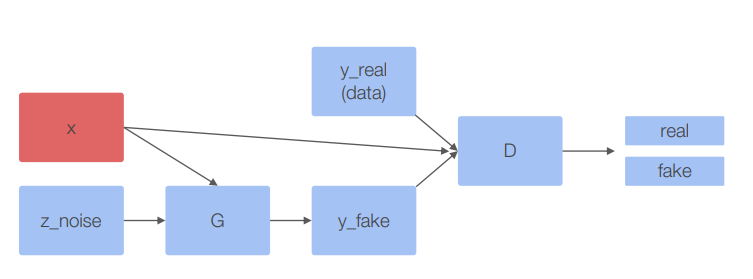

This way instead of using only noise as input, we can feed the network with the lineart image and the output will be that one but colored.

There are also some particular features of my implementation:
- **Convolutional Layers:** Used Conv2D layers as they have been used successfully in the image domain. Additionally, deconvolutions were used to make the output the same size as the input.
- **Residual Connections:** Information may be lost in the transformations inside the network and since in this problem the input (the lineart) is crucial for generating the output, residuals connections help to get the original image through the network and preserve the lineart when applying the colorization.
- **Label Smoothing:** Using smoother labels (0.1 and 0.9 instead of classical 0 and 1) seems to make networks more resistent to adversarial examples (as per [this paper](https://arxiv.org/abs/1606.03498)).



## Now Let's Get Ready

In [1]:
import tensorflow as tf

Check if it is using GPU (without GPU it is going to take forever :v)

In [ ]:
if not tf.test.gpu_device_name():
    warnings.warn('No GPU found.')
else:
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))

## Time to Train

The model is implemented in `cgan_model.py` file. We can call it from here while changing hyperparams

In [2]:
from cgan_model import *

c = CGAN(imgsize=256, batchsize=4, label_smoothing=0.1)

To train the model, having all the images under the `imgs` folder is enough. Additionally, the model code was built to save the current state of the model each 500 batches. This way it is possible to stop and continue training without losing much progress. 

In [ ]:
c.train()

 [*] Reading checkpoint...
Load failed
imgs\imgs1.jpg
saving img results/base.png
saving img results/base_line.jpg
saving img results/base_colors.jpg
0: [0 / 3270] d_loss 5.508024, g_loss 180.619949
saving img results/0.jpg
0: [1 / 3270] d_loss 15.005012, g_loss 86.421112
0: [2 / 3270] d_loss 13.411175, g_loss 213.354752
0: [3 / 3270] d_loss 13.576973, g_loss 58.664131
0: [4 / 3270] d_loss 2.838976, g_loss 94.285385
0: [5 / 3270] d_loss 19.506189, g_loss 113.713974
0: [6 / 3270] d_loss 17.475876, g_loss 121.125763
0: [7 / 3270] d_loss 10.649169, g_loss 53.977654
0: [8 / 3270] d_loss 4.209140, g_loss 46.087376
0: [9 / 3270] d_loss 39.656204, g_loss 160.798325
0: [10 / 3270] d_loss 3.759635, g_loss 61.835575
0: [11 / 3270] d_loss 6.351640, g_loss 89.154678
0: [12 / 3270] d_loss 13.304823, g_loss 70.808533
0: [13 / 3270] d_loss 32.299847, g_loss 196.761597
0: [14 / 3270] d_loss 29.936213, g_loss 55.420147
0: [15 / 3270] d_loss 17.785919, g_loss 32.580212
0: [16 / 3270] d_loss 69.315491, g

0: [159 / 3270] d_loss 14.107340, g_loss 45.153534
0: [160 / 3270] d_loss 19.325819, g_loss 29.415033
0: [161 / 3270] d_loss 9.035235, g_loss 37.663445
0: [162 / 3270] d_loss 7.143301, g_loss 24.206120
0: [163 / 3270] d_loss 23.201389, g_loss 15.948570
0: [164 / 3270] d_loss 15.602532, g_loss 19.491182
0: [165 / 3270] d_loss 13.489458, g_loss 36.420120
0: [166 / 3270] d_loss 35.583199, g_loss 45.568146
0: [167 / 3270] d_loss 25.844160, g_loss 26.780403
0: [168 / 3270] d_loss 59.420090, g_loss 17.989283
0: [169 / 3270] d_loss 33.819084, g_loss 20.629101
0: [170 / 3270] d_loss 19.674601, g_loss 42.333549
0: [171 / 3270] d_loss 27.829346, g_loss 28.864857
0: [172 / 3270] d_loss 24.529858, g_loss 36.009598
0: [173 / 3270] d_loss 26.649422, g_loss 40.502609
0: [174 / 3270] d_loss 16.656868, g_loss 30.076260
0: [175 / 3270] d_loss 19.971249, g_loss 22.246027
0: [176 / 3270] d_loss 10.595775, g_loss 18.370220
0: [177 / 3270] d_loss 15.645540, g_loss 19.187185
0: [178 / 3270] d_loss 15.668102,

0: [321 / 3270] d_loss 11.445417, g_loss 19.932068
0: [322 / 3270] d_loss 17.109459, g_loss 19.141556
0: [323 / 3270] d_loss 9.030863, g_loss 26.598665
0: [324 / 3270] d_loss 12.957039, g_loss 34.491989
0: [325 / 3270] d_loss 24.428114, g_loss 47.013657
0: [326 / 3270] d_loss 28.161896, g_loss 32.954453
0: [327 / 3270] d_loss 16.311350, g_loss 17.218441
0: [328 / 3270] d_loss 23.767530, g_loss 26.365376
0: [329 / 3270] d_loss 26.705427, g_loss 28.659115
0: [330 / 3270] d_loss 13.490326, g_loss 31.003361
0: [331 / 3270] d_loss 13.415584, g_loss 22.483158
0: [332 / 3270] d_loss 16.856644, g_loss 18.918201
0: [333 / 3270] d_loss 25.294449, g_loss 16.961843
0: [334 / 3270] d_loss 32.389473, g_loss 37.385136
0: [335 / 3270] d_loss 12.690649, g_loss 38.870033
0: [336 / 3270] d_loss 15.841654, g_loss 16.858248
0: [337 / 3270] d_loss 4.089247, g_loss 23.683592
0: [338 / 3270] d_loss 23.693932, g_loss 25.054348
0: [339 / 3270] d_loss 7.433364, g_loss 21.618818
0: [340 / 3270] d_loss 14.116432, 

0: [483 / 3270] d_loss 27.487022, g_loss 17.055426
0: [484 / 3270] d_loss 3.704692, g_loss 40.449921
0: [485 / 3270] d_loss 14.312641, g_loss 34.867290
0: [486 / 3270] d_loss 13.005382, g_loss 23.077463
0: [487 / 3270] d_loss 22.848013, g_loss 22.242218
0: [488 / 3270] d_loss 2.855299, g_loss 14.015483
0: [489 / 3270] d_loss 7.569815, g_loss 17.970345
0: [490 / 3270] d_loss 6.857565, g_loss 45.154854
0: [491 / 3270] d_loss 9.583307, g_loss 27.455154
0: [492 / 3270] d_loss 17.197435, g_loss 17.593845
0: [493 / 3270] d_loss 3.019009, g_loss 16.742821
0: [494 / 3270] d_loss 20.685753, g_loss 26.301220
0: [495 / 3270] d_loss 12.219088, g_loss 22.398739
0: [496 / 3270] d_loss 20.268555, g_loss 14.214170
0: [497 / 3270] d_loss 9.729015, g_loss 14.333101
0: [498 / 3270] d_loss 16.673199, g_loss 24.436211
0: [499 / 3270] d_loss 8.395550, g_loss 27.276258
0: [500 / 3270] d_loss 11.729806, g_loss 17.899527
saving img results/500.jpg
0: [501 / 3270] d_loss 14.273697, g_loss 32.259792
0: [502 / 32

0: [645 / 3270] d_loss 12.472721, g_loss 17.195583
0: [646 / 3270] d_loss 8.243647, g_loss 28.578411
0: [647 / 3270] d_loss 5.744195, g_loss 20.945610
0: [648 / 3270] d_loss 4.723320, g_loss 21.667534
0: [649 / 3270] d_loss 6.941098, g_loss 23.835865
0: [650 / 3270] d_loss 9.066784, g_loss 21.279755
0: [651 / 3270] d_loss 8.460096, g_loss 19.174101
0: [652 / 3270] d_loss 19.640192, g_loss 28.006863
0: [653 / 3270] d_loss 8.794607, g_loss 26.354118
0: [654 / 3270] d_loss 9.604378, g_loss 40.253441
0: [655 / 3270] d_loss 10.977791, g_loss 19.641396
0: [656 / 3270] d_loss 14.054346, g_loss 18.602861
0: [657 / 3270] d_loss 9.502174, g_loss 15.102638
0: [658 / 3270] d_loss 5.325497, g_loss 28.070211
0: [659 / 3270] d_loss 11.927135, g_loss 28.633520
0: [660 / 3270] d_loss 2.008730, g_loss 22.103472
0: [661 / 3270] d_loss 6.010667, g_loss 16.336391
0: [662 / 3270] d_loss 13.676987, g_loss 40.856327
0: [663 / 3270] d_loss 14.645509, g_loss 41.277794
0: [664 / 3270] d_loss 24.262955, g_loss 34

0: [806 / 3270] d_loss 6.357636, g_loss 30.142570
0: [807 / 3270] d_loss 8.878947, g_loss 13.298855
0: [808 / 3270] d_loss 22.002811, g_loss 18.486528
0: [809 / 3270] d_loss 15.590742, g_loss 25.237427
0: [810 / 3270] d_loss 15.992829, g_loss 19.850035
0: [811 / 3270] d_loss 14.287857, g_loss 15.731830
0: [812 / 3270] d_loss 14.333166, g_loss 22.573803
0: [813 / 3270] d_loss 7.440344, g_loss 29.844536
0: [814 / 3270] d_loss 17.228731, g_loss 19.693928
0: [815 / 3270] d_loss 9.036269, g_loss 11.459124
0: [816 / 3270] d_loss 13.827509, g_loss 23.642258
0: [817 / 3270] d_loss 5.709213, g_loss 28.803293
0: [818 / 3270] d_loss 9.372176, g_loss 21.273754
0: [819 / 3270] d_loss 11.358043, g_loss 13.024595
0: [820 / 3270] d_loss 9.467384, g_loss 18.184355
0: [821 / 3270] d_loss 13.926669, g_loss 17.958920
0: [822 / 3270] d_loss 14.790302, g_loss 23.480659
0: [823 / 3270] d_loss 6.328902, g_loss 35.950756
0: [824 / 3270] d_loss 13.869548, g_loss 17.975161
0: [825 / 3270] d_loss 7.084888, g_loss

0: [968 / 3270] d_loss 19.215378, g_loss 23.553349
0: [969 / 3270] d_loss 11.634943, g_loss 31.797234
0: [970 / 3270] d_loss 11.681653, g_loss 42.346184
0: [971 / 3270] d_loss 23.199120, g_loss 32.201851
0: [972 / 3270] d_loss 22.382828, g_loss 26.614653
0: [973 / 3270] d_loss 9.298721, g_loss 23.620102
0: [974 / 3270] d_loss 9.295668, g_loss 24.258476
0: [975 / 3270] d_loss 11.032825, g_loss 18.057835
0: [976 / 3270] d_loss 6.585500, g_loss 22.258286
0: [977 / 3270] d_loss 6.641274, g_loss 45.423061
0: [978 / 3270] d_loss 11.926123, g_loss 31.656151
0: [979 / 3270] d_loss 12.130376, g_loss 23.039013
0: [980 / 3270] d_loss 16.670296, g_loss 16.723591
0: [981 / 3270] d_loss 14.007656, g_loss 16.437634
0: [982 / 3270] d_loss 15.575136, g_loss 20.167662
0: [983 / 3270] d_loss 9.377739, g_loss 24.870514
0: [984 / 3270] d_loss 12.109663, g_loss 20.252548
0: [985 / 3270] d_loss 11.027446, g_loss 17.413349
0: [986 / 3270] d_loss 16.410057, g_loss 14.867385
0: [987 / 3270] d_loss 6.853522, g_l

0: [1127 / 3270] d_loss 7.805134, g_loss 15.293754
0: [1128 / 3270] d_loss 11.046332, g_loss 15.268396
0: [1129 / 3270] d_loss 4.618658, g_loss 15.355122
0: [1130 / 3270] d_loss 3.238682, g_loss 15.584143
0: [1131 / 3270] d_loss 7.300931, g_loss 12.350016
0: [1132 / 3270] d_loss 14.311018, g_loss 27.541248
0: [1133 / 3270] d_loss 7.411245, g_loss 15.576037
0: [1134 / 3270] d_loss 11.614690, g_loss 15.837454
0: [1135 / 3270] d_loss 8.659565, g_loss 13.482657
0: [1136 / 3270] d_loss 6.868610, g_loss 16.377384
0: [1137 / 3270] d_loss 7.081304, g_loss 22.719507
0: [1138 / 3270] d_loss 6.815007, g_loss 21.068272
0: [1139 / 3270] d_loss 8.609219, g_loss 40.258232
0: [1140 / 3270] d_loss 10.947768, g_loss 19.905792
0: [1141 / 3270] d_loss 6.539670, g_loss 21.143940
0: [1142 / 3270] d_loss 22.891960, g_loss 32.208717
0: [1143 / 3270] d_loss 3.922878, g_loss 30.049776
0: [1144 / 3270] d_loss 10.541550, g_loss 17.925102
0: [1145 / 3270] d_loss 3.628467, g_loss 19.818386
0: [1146 / 3270] d_loss 1

0: [1287 / 3270] d_loss 6.615317, g_loss 26.618082
0: [1288 / 3270] d_loss 11.152508, g_loss 24.684864
0: [1289 / 3270] d_loss 11.901945, g_loss 15.576681
0: [1290 / 3270] d_loss 9.176116, g_loss 16.292635
0: [1291 / 3270] d_loss 4.185146, g_loss 13.892643
0: [1292 / 3270] d_loss 9.278643, g_loss 18.579781
0: [1293 / 3270] d_loss 10.985149, g_loss 24.997498
0: [1294 / 3270] d_loss 14.550360, g_loss 18.138332
0: [1295 / 3270] d_loss 9.673117, g_loss 18.063467
0: [1296 / 3270] d_loss 14.754088, g_loss 27.738392
0: [1297 / 3270] d_loss 11.393804, g_loss 34.495163
0: [1298 / 3270] d_loss 9.140942, g_loss 14.696149
0: [1299 / 3270] d_loss 9.301653, g_loss 16.946960
0: [1300 / 3270] d_loss 13.368364, g_loss 16.446417
saving img results/1300.jpg
0: [1301 / 3270] d_loss 10.980371, g_loss 10.618064
0: [1302 / 3270] d_loss 11.390717, g_loss 13.658700
0: [1303 / 3270] d_loss 21.487318, g_loss 23.061853
0: [1304 / 3270] d_loss 8.569406, g_loss 32.270630
0: [1305 / 3270] d_loss 10.864527, g_loss 18

0: [1447 / 3270] d_loss 13.647124, g_loss 20.870800
0: [1448 / 3270] d_loss 5.791677, g_loss 15.463741
0: [1449 / 3270] d_loss 13.254757, g_loss 18.331179
0: [1450 / 3270] d_loss 3.934099, g_loss 25.305220
0: [1451 / 3270] d_loss 3.198347, g_loss 19.697649
0: [1452 / 3270] d_loss 5.604920, g_loss 46.961754
0: [1453 / 3270] d_loss 13.784708, g_loss 35.570618
0: [1454 / 3270] d_loss 15.804095, g_loss 27.268204
0: [1455 / 3270] d_loss 6.535474, g_loss 20.612995
0: [1456 / 3270] d_loss 5.844190, g_loss 18.195345
0: [1457 / 3270] d_loss 3.896888, g_loss 18.613918
0: [1458 / 3270] d_loss 16.910519, g_loss 20.558451
0: [1459 / 3270] d_loss 9.468529, g_loss 19.907347
0: [1460 / 3270] d_loss 11.290400, g_loss 22.805679
0: [1461 / 3270] d_loss 7.030996, g_loss 19.832617
0: [1462 / 3270] d_loss 5.871113, g_loss 16.045227
0: [1463 / 3270] d_loss 17.106411, g_loss 19.252306
0: [1464 / 3270] d_loss 3.527442, g_loss 28.997196
0: [1465 / 3270] d_loss 7.012089, g_loss 27.482285
0: [1466 / 3270] d_loss 

0: [1607 / 3270] d_loss 10.533705, g_loss 16.884453
0: [1608 / 3270] d_loss 8.820917, g_loss 19.964958
0: [1609 / 3270] d_loss 3.009785, g_loss 19.941706
0: [1610 / 3270] d_loss 6.538931, g_loss 15.670552
0: [1611 / 3270] d_loss 10.086229, g_loss 15.083330
0: [1612 / 3270] d_loss 7.673414, g_loss 29.820908
0: [1613 / 3270] d_loss 11.390199, g_loss 19.187323
0: [1614 / 3270] d_loss 7.668140, g_loss 19.198074
0: [1615 / 3270] d_loss 11.037418, g_loss 20.335695
0: [1616 / 3270] d_loss 9.120476, g_loss 22.299648
0: [1617 / 3270] d_loss 6.255243, g_loss 23.669909
0: [1618 / 3270] d_loss 13.402139, g_loss 25.444370
0: [1619 / 3270] d_loss 3.141611, g_loss 24.583303
0: [1620 / 3270] d_loss 8.410863, g_loss 12.515873
0: [1621 / 3270] d_loss 5.490483, g_loss 18.683638
0: [1622 / 3270] d_loss 11.620243, g_loss 15.923731
0: [1623 / 3270] d_loss 8.200630, g_loss 18.609138
0: [1624 / 3270] d_loss 3.619832, g_loss 21.921387
0: [1625 / 3270] d_loss 6.872365, g_loss 18.515390
0: [1626 / 3270] d_loss 8

0: [1767 / 3270] d_loss 3.906874, g_loss 21.721352
0: [1768 / 3270] d_loss 9.456388, g_loss 19.233252
0: [1769 / 3270] d_loss 7.568161, g_loss 15.343172
0: [1770 / 3270] d_loss 9.998522, g_loss 14.993557
0: [1771 / 3270] d_loss 8.887942, g_loss 23.024933
0: [1772 / 3270] d_loss 1.631401, g_loss 11.338367
0: [1773 / 3270] d_loss 9.701652, g_loss 11.554434
0: [1774 / 3270] d_loss 8.617582, g_loss 13.158295
0: [1775 / 3270] d_loss 10.689978, g_loss 16.066450
0: [1776 / 3270] d_loss 3.417548, g_loss 11.755296
0: [1777 / 3270] d_loss 8.901557, g_loss 18.886339
0: [1778 / 3270] d_loss 7.052372, g_loss 17.831356
0: [1779 / 3270] d_loss 9.763468, g_loss 15.667734
0: [1780 / 3270] d_loss 9.961001, g_loss 18.660881
0: [1781 / 3270] d_loss 6.289853, g_loss 20.140667
0: [1782 / 3270] d_loss 15.841743, g_loss 9.313672
0: [1783 / 3270] d_loss 9.221336, g_loss 12.364768
0: [1784 / 3270] d_loss 11.947990, g_loss 16.127140
0: [1785 / 3270] d_loss 3.696734, g_loss 16.751350
0: [1786 / 3270] d_loss 4.395

0: [1927 / 3270] d_loss 9.237876, g_loss 14.798218
0: [1928 / 3270] d_loss 7.120222, g_loss 14.651660
0: [1929 / 3270] d_loss 9.292046, g_loss 17.135431
0: [1930 / 3270] d_loss 8.423036, g_loss 13.370471
0: [1931 / 3270] d_loss 5.231817, g_loss 17.256441
0: [1932 / 3270] d_loss 7.544869, g_loss 25.188423
0: [1933 / 3270] d_loss 6.512318, g_loss 18.458090
0: [1934 / 3270] d_loss 2.362128, g_loss 17.950439
0: [1935 / 3270] d_loss 13.051615, g_loss 14.206995
0: [1936 / 3270] d_loss 9.134007, g_loss 25.580387
0: [1937 / 3270] d_loss 6.636462, g_loss 19.538132
0: [1938 / 3270] d_loss 12.537389, g_loss 15.221089
0: [1939 / 3270] d_loss 3.137648, g_loss 21.530636
0: [1940 / 3270] d_loss 2.963356, g_loss 18.934879
0: [1941 / 3270] d_loss 2.153514, g_loss 21.247387
0: [1942 / 3270] d_loss 4.864755, g_loss 16.610899
0: [1943 / 3270] d_loss 3.032275, g_loss 17.763866
0: [1944 / 3270] d_loss 6.043605, g_loss 25.938684
0: [1945 / 3270] d_loss 13.954860, g_loss 22.828043
0: [1946 / 3270] d_loss 14.4

0: [2087 / 3270] d_loss 8.831854, g_loss 19.403637
0: [2088 / 3270] d_loss 13.280547, g_loss 25.744970
0: [2089 / 3270] d_loss 4.316362, g_loss 20.489349
0: [2090 / 3270] d_loss 15.901082, g_loss 21.140522
0: [2091 / 3270] d_loss 7.056628, g_loss 18.137268
0: [2092 / 3270] d_loss 4.319270, g_loss 15.903246
0: [2093 / 3270] d_loss 3.707736, g_loss 27.248882
0: [2094 / 3270] d_loss 10.431315, g_loss 15.860682
0: [2095 / 3270] d_loss 6.292068, g_loss 15.032034
0: [2096 / 3270] d_loss 10.607742, g_loss 22.970387
0: [2097 / 3270] d_loss 6.412411, g_loss 16.620066
0: [2098 / 3270] d_loss 9.996627, g_loss 11.009113
0: [2099 / 3270] d_loss 8.032413, g_loss 26.719498
0: [2100 / 3270] d_loss 5.543835, g_loss 16.229649
saving img results/2100.jpg
0: [2101 / 3270] d_loss 10.739769, g_loss 22.145941
0: [2102 / 3270] d_loss 12.101859, g_loss 19.938719
0: [2103 / 3270] d_loss 8.703678, g_loss 19.108799
0: [2104 / 3270] d_loss 8.424210, g_loss 16.183361
0: [2105 / 3270] d_loss 6.605921, g_loss 13.5387

0: [2247 / 3270] d_loss 5.997152, g_loss 25.710125
0: [2248 / 3270] d_loss 10.740438, g_loss 15.045225
0: [2249 / 3270] d_loss 5.359405, g_loss 11.683109
0: [2250 / 3270] d_loss 3.675983, g_loss 12.733500
0: [2251 / 3270] d_loss 7.622046, g_loss 15.607211
0: [2252 / 3270] d_loss 3.592794, g_loss 23.108509
0: [2253 / 3270] d_loss 2.489899, g_loss 9.592079
0: [2254 / 3270] d_loss 7.741336, g_loss 18.741915
0: [2255 / 3270] d_loss 6.607982, g_loss 23.338257
0: [2256 / 3270] d_loss 3.572851, g_loss 10.779381
0: [2257 / 3270] d_loss 5.698276, g_loss 14.250104
0: [2258 / 3270] d_loss 13.239317, g_loss 14.779506
0: [2259 / 3270] d_loss 7.640965, g_loss 29.869474
0: [2260 / 3270] d_loss 7.454251, g_loss 15.423310
0: [2261 / 3270] d_loss 4.486564, g_loss 16.915926
0: [2262 / 3270] d_loss 6.219827, g_loss 22.473352
0: [2263 / 3270] d_loss 6.966459, g_loss 19.555311
0: [2264 / 3270] d_loss 4.900326, g_loss 20.044302
0: [2265 / 3270] d_loss 8.160438, g_loss 18.026905
0: [2266 / 3270] d_loss 3.0673

0: [2407 / 3270] d_loss 4.792508, g_loss 26.117489
0: [2408 / 3270] d_loss 9.359169, g_loss 21.193937
0: [2409 / 3270] d_loss 5.319822, g_loss 18.264118
0: [2410 / 3270] d_loss 4.024156, g_loss 12.540168
0: [2411 / 3270] d_loss 1.813223, g_loss 17.748066
0: [2412 / 3270] d_loss 8.682100, g_loss 12.550465
0: [2413 / 3270] d_loss 2.508370, g_loss 13.725295
0: [2414 / 3270] d_loss 6.709551, g_loss 11.452961
0: [2415 / 3270] d_loss 5.708632, g_loss 15.800593
0: [2416 / 3270] d_loss 4.726713, g_loss 18.891167
0: [2417 / 3270] d_loss 2.344064, g_loss 9.408863
0: [2418 / 3270] d_loss 1.457327, g_loss 14.435870
0: [2419 / 3270] d_loss 3.577564, g_loss 17.649260
0: [2420 / 3270] d_loss 4.586830, g_loss 17.530052
0: [2421 / 3270] d_loss 4.159235, g_loss 14.394470
0: [2422 / 3270] d_loss 7.226061, g_loss 19.062565
0: [2423 / 3270] d_loss 8.483507, g_loss 14.237263
0: [2424 / 3270] d_loss 2.696497, g_loss 20.754616
0: [2425 / 3270] d_loss 4.823684, g_loss 15.254977
0: [2426 / 3270] d_loss 3.990412

0: [2569 / 3270] d_loss 6.780712, g_loss 20.505753
0: [2570 / 3270] d_loss 2.710270, g_loss 20.983315
0: [2571 / 3270] d_loss 3.477245, g_loss 18.187588
0: [2572 / 3270] d_loss 4.899801, g_loss 17.068150
0: [2573 / 3270] d_loss 6.799249, g_loss 25.570314
0: [2574 / 3270] d_loss 5.396851, g_loss 15.412920
0: [2575 / 3270] d_loss 1.845163, g_loss 18.354795
0: [2576 / 3270] d_loss 3.044652, g_loss 21.133579
0: [2577 / 3270] d_loss 3.055740, g_loss 13.763361
0: [2578 / 3270] d_loss 4.116237, g_loss 14.784670
0: [2579 / 3270] d_loss 5.383562, g_loss 22.075039
0: [2580 / 3270] d_loss 3.684245, g_loss 14.748795
0: [2581 / 3270] d_loss 2.979646, g_loss 22.369999
0: [2582 / 3270] d_loss 6.540374, g_loss 21.115635
0: [2583 / 3270] d_loss 3.693392, g_loss 19.481213
0: [2584 / 3270] d_loss 2.182868, g_loss 18.615051
0: [2585 / 3270] d_loss 3.231070, g_loss 16.842342
0: [2586 / 3270] d_loss 3.597314, g_loss 22.885241
0: [2587 / 3270] d_loss 3.365586, g_loss 19.546581
0: [2588 / 3270] d_loss 6.25193

0: [2729 / 3270] d_loss 4.078608, g_loss 18.256828
0: [2730 / 3270] d_loss 8.746451, g_loss 16.551050
0: [2731 / 3270] d_loss 7.731635, g_loss 16.332546
0: [2732 / 3270] d_loss 3.603102, g_loss 16.962069
0: [2733 / 3270] d_loss 2.269122, g_loss 17.793453
0: [2734 / 3270] d_loss 2.847315, g_loss 12.876307
0: [2735 / 3270] d_loss 3.671255, g_loss 14.550327
0: [2736 / 3270] d_loss 12.173829, g_loss 13.063238
0: [2737 / 3270] d_loss 9.259849, g_loss 26.341156
0: [2738 / 3270] d_loss 9.227122, g_loss 19.058514
0: [2739 / 3270] d_loss 3.745577, g_loss 15.464461
0: [2740 / 3270] d_loss 2.742628, g_loss 13.004115
0: [2741 / 3270] d_loss 12.969447, g_loss 10.367324
0: [2742 / 3270] d_loss 5.006886, g_loss 20.052248
0: [2743 / 3270] d_loss 2.760849, g_loss 14.009661
0: [2744 / 3270] d_loss 7.375660, g_loss 17.960939
0: [2745 / 3270] d_loss 3.081790, g_loss 16.788643
0: [2746 / 3270] d_loss 6.429956, g_loss 15.261276
0: [2747 / 3270] d_loss 5.426177, g_loss 16.707184
0: [2748 / 3270] d_loss 5.564

0: [2891 / 3270] d_loss 1.365456, g_loss 17.284750
0: [2892 / 3270] d_loss 4.234735, g_loss 18.956863
0: [2893 / 3270] d_loss 4.484245, g_loss 14.407316
0: [2894 / 3270] d_loss 3.708787, g_loss 15.280407
0: [2895 / 3270] d_loss 1.425695, g_loss 17.684597
0: [2896 / 3270] d_loss 5.359199, g_loss 12.836016
0: [2897 / 3270] d_loss 2.343413, g_loss 16.779703
0: [2898 / 3270] d_loss 3.860458, g_loss 16.963345
0: [2899 / 3270] d_loss 5.391093, g_loss 14.200038
0: [2900 / 3270] d_loss 3.986075, g_loss 14.017049
saving img results/2900.jpg
0: [2901 / 3270] d_loss 3.678108, g_loss 11.346094
0: [2902 / 3270] d_loss 2.394891, g_loss 12.999381
0: [2903 / 3270] d_loss 4.263905, g_loss 18.310381
0: [2904 / 3270] d_loss 1.705988, g_loss 17.296978
0: [2905 / 3270] d_loss 2.172307, g_loss 10.999150
0: [2906 / 3270] d_loss 5.592146, g_loss 17.882946
0: [2907 / 3270] d_loss 3.933655, g_loss 14.559904
0: [2908 / 3270] d_loss 2.442889, g_loss 18.162117
0: [2909 / 3270] d_loss 2.210719, g_loss 12.146915
0: 

0: [3051 / 3270] d_loss 2.431419, g_loss 15.997308
0: [3052 / 3270] d_loss 2.350006, g_loss 14.644538
0: [3053 / 3270] d_loss 1.691073, g_loss 9.418959
0: [3054 / 3270] d_loss 3.483388, g_loss 14.364091
0: [3055 / 3270] d_loss 4.355068, g_loss 17.099617
0: [3056 / 3270] d_loss 4.257178, g_loss 13.079737
0: [3057 / 3270] d_loss 1.663051, g_loss 12.317642
0: [3058 / 3270] d_loss 3.469244, g_loss 12.880175
0: [3059 / 3270] d_loss 2.396885, g_loss 20.263239
0: [3060 / 3270] d_loss 1.385004, g_loss 15.246004
0: [3061 / 3270] d_loss 3.920608, g_loss 13.693031
0: [3062 / 3270] d_loss 3.583267, g_loss 11.360319
0: [3063 / 3270] d_loss 2.479897, g_loss 13.651938
0: [3064 / 3270] d_loss 5.505550, g_loss 16.347082
0: [3065 / 3270] d_loss 2.900390, g_loss 24.319939
0: [3066 / 3270] d_loss 5.676442, g_loss 17.550238
0: [3067 / 3270] d_loss 2.890916, g_loss 12.368455
0: [3068 / 3270] d_loss 3.047443, g_loss 13.564369
0: [3069 / 3270] d_loss 2.118161, g_loss 12.945716
0: [3070 / 3270] d_loss 4.500413

0: [3212 / 3270] d_loss 5.233487, g_loss 20.178024
0: [3213 / 3270] d_loss 6.584764, g_loss 18.782982
0: [3214 / 3270] d_loss 7.435104, g_loss 14.685364
0: [3215 / 3270] d_loss 7.870639, g_loss 15.387692
0: [3216 / 3270] d_loss 6.296913, g_loss 13.977489
0: [3217 / 3270] d_loss 6.197441, g_loss 15.377191
0: [3218 / 3270] d_loss 3.888464, g_loss 19.922571
0: [3219 / 3270] d_loss 1.008565, g_loss 15.513832
0: [3220 / 3270] d_loss 4.897755, g_loss 14.143565
0: [3221 / 3270] d_loss 3.573581, g_loss 13.605474
0: [3222 / 3270] d_loss 3.132418, g_loss 13.241376
0: [3223 / 3270] d_loss 5.535758, g_loss 18.424541
0: [3224 / 3270] d_loss 7.329322, g_loss 14.538254
0: [3225 / 3270] d_loss 1.833378, g_loss 17.719641
0: [3226 / 3270] d_loss 7.837201, g_loss 10.596363
0: [3227 / 3270] d_loss 5.492658, g_loss 11.120279
0: [3228 / 3270] d_loss 3.664139, g_loss 12.425245
0: [3229 / 3270] d_loss 7.023058, g_loss 14.286114
0: [3230 / 3270] d_loss 5.324405, g_loss 28.276388
0: [3231 / 3270] d_loss 5.23856

1: [107 / 3270] d_loss 5.752320, g_loss 13.580390
1: [108 / 3270] d_loss 3.911387, g_loss 13.662407
1: [109 / 3270] d_loss 2.399534, g_loss 16.039421
1: [110 / 3270] d_loss 4.995483, g_loss 9.840620
1: [111 / 3270] d_loss 6.384970, g_loss 11.088841
1: [112 / 3270] d_loss 1.956239, g_loss 18.251200
1: [113 / 3270] d_loss 1.562134, g_loss 13.401739
1: [114 / 3270] d_loss 3.616316, g_loss 13.542884
1: [115 / 3270] d_loss 2.011101, g_loss 12.149311
1: [116 / 3270] d_loss 1.671143, g_loss 16.192621
1: [117 / 3270] d_loss 5.830445, g_loss 16.223261
1: [118 / 3270] d_loss 5.118488, g_loss 14.070905
1: [119 / 3270] d_loss 2.229889, g_loss 12.969139
1: [120 / 3270] d_loss 4.458344, g_loss 13.836311
1: [121 / 3270] d_loss 3.726196, g_loss 13.526482
1: [122 / 3270] d_loss 3.625474, g_loss 12.137250
1: [123 / 3270] d_loss 2.159866, g_loss 18.086897
1: [124 / 3270] d_loss 1.430797, g_loss 18.771309
1: [125 / 3270] d_loss 1.721839, g_loss 12.237064
1: [126 / 3270] d_loss 3.046351, g_loss 15.373507
1

1: [271 / 3270] d_loss 3.727678, g_loss 14.950826
1: [272 / 3270] d_loss 4.082594, g_loss 24.974895
1: [273 / 3270] d_loss 1.586701, g_loss 22.105898
1: [274 / 3270] d_loss 1.900872, g_loss 14.867254
1: [275 / 3270] d_loss 4.854997, g_loss 16.247942
1: [276 / 3270] d_loss 3.008106, g_loss 14.095296
1: [277 / 3270] d_loss 3.518126, g_loss 12.669959
1: [278 / 3270] d_loss 1.851405, g_loss 10.502322
1: [279 / 3270] d_loss 2.325708, g_loss 15.828135
1: [280 / 3270] d_loss 3.496944, g_loss 20.169453
1: [281 / 3270] d_loss 2.930691, g_loss 13.621605
1: [282 / 3270] d_loss 2.492295, g_loss 14.464293
1: [283 / 3270] d_loss 4.379058, g_loss 11.471076
1: [284 / 3270] d_loss 4.548684, g_loss 15.680235
1: [285 / 3270] d_loss 4.282862, g_loss 19.081848
1: [286 / 3270] d_loss 3.564212, g_loss 21.436161
1: [287 / 3270] d_loss 6.154708, g_loss 13.223632
1: [288 / 3270] d_loss 4.202872, g_loss 20.344326
1: [289 / 3270] d_loss 4.885094, g_loss 19.511744
1: [290 / 3270] d_loss 5.409368, g_loss 22.517630


1: [435 / 3270] d_loss 1.917872, g_loss 16.669638
1: [436 / 3270] d_loss 3.128381, g_loss 15.428595
1: [437 / 3270] d_loss 4.340541, g_loss 12.945181
1: [438 / 3270] d_loss 2.291813, g_loss 14.279480
1: [439 / 3270] d_loss 5.160198, g_loss 19.460949
1: [440 / 3270] d_loss 2.231108, g_loss 14.409172
1: [441 / 3270] d_loss 2.601739, g_loss 13.219459
1: [442 / 3270] d_loss 2.208674, g_loss 12.679264
1: [443 / 3270] d_loss 10.806161, g_loss 17.242874
1: [444 / 3270] d_loss 3.362210, g_loss 12.990599
1: [445 / 3270] d_loss 3.645451, g_loss 13.485580
1: [446 / 3270] d_loss 1.988773, g_loss 14.511944
1: [447 / 3270] d_loss 2.654402, g_loss 13.026492
1: [448 / 3270] d_loss 6.483927, g_loss 14.695574
1: [449 / 3270] d_loss 2.135664, g_loss 12.589205
1: [450 / 3270] d_loss 2.923409, g_loss 13.548227
1: [451 / 3270] d_loss 2.367388, g_loss 10.857181
1: [452 / 3270] d_loss 1.579892, g_loss 14.904572
1: [453 / 3270] d_loss 2.591534, g_loss 15.227139
1: [454 / 3270] d_loss 4.502738, g_loss 16.948423

1: [599 / 3270] d_loss 2.051374, g_loss 16.826984
1: [600 / 3270] d_loss 2.854489, g_loss 13.558599
saving img results/100600.jpg
1: [601 / 3270] d_loss 4.845811, g_loss 18.217779
1: [602 / 3270] d_loss 8.648008, g_loss 18.722727
1: [603 / 3270] d_loss 5.916527, g_loss 14.998192
1: [604 / 3270] d_loss 2.898481, g_loss 17.119652
1: [605 / 3270] d_loss 3.775147, g_loss 12.515796
1: [606 / 3270] d_loss 2.008001, g_loss 16.559788
1: [607 / 3270] d_loss 5.603673, g_loss 13.507060
1: [608 / 3270] d_loss 6.039264, g_loss 26.369841
1: [609 / 3270] d_loss 3.663457, g_loss 18.065479
1: [610 / 3270] d_loss 5.266583, g_loss 19.644447
1: [611 / 3270] d_loss 4.516428, g_loss 15.711101
1: [612 / 3270] d_loss 2.092410, g_loss 16.525793
1: [613 / 3270] d_loss 8.610280, g_loss 12.897291
1: [614 / 3270] d_loss 2.779936, g_loss 15.053576
1: [615 / 3270] d_loss 7.063437, g_loss 13.210326
1: [616 / 3270] d_loss 4.705258, g_loss 15.892455
1: [617 / 3270] d_loss 2.317740, g_loss 12.813101
1: [618 / 3270] d_lo

1: [763 / 3270] d_loss 5.522230, g_loss 16.304371
1: [764 / 3270] d_loss 3.456347, g_loss 16.824394
1: [765 / 3270] d_loss 5.989367, g_loss 16.742279
1: [766 / 3270] d_loss 2.586362, g_loss 15.096133
1: [767 / 3270] d_loss 3.320445, g_loss 15.138372
1: [768 / 3270] d_loss 2.992275, g_loss 15.970736
1: [769 / 3270] d_loss 7.678732, g_loss 17.800819
1: [770 / 3270] d_loss 2.636844, g_loss 11.629066
1: [771 / 3270] d_loss 1.482350, g_loss 14.422942
1: [772 / 3270] d_loss 4.930041, g_loss 12.763056
1: [773 / 3270] d_loss 2.102079, g_loss 9.632664
1: [774 / 3270] d_loss 3.469020, g_loss 27.204479
1: [775 / 3270] d_loss 6.040688, g_loss 9.652952
1: [776 / 3270] d_loss 4.651493, g_loss 12.978495
1: [777 / 3270] d_loss 2.585121, g_loss 17.972237
1: [778 / 3270] d_loss 6.984105, g_loss 16.569153
1: [779 / 3270] d_loss 2.876984, g_loss 18.171619
1: [780 / 3270] d_loss 4.993200, g_loss 16.839397
1: [781 / 3270] d_loss 6.489842, g_loss 14.096855
1: [782 / 3270] d_loss 5.116527, g_loss 13.141603
1:

1: [927 / 3270] d_loss 6.638211, g_loss 14.107286
1: [928 / 3270] d_loss 4.031886, g_loss 15.596096
1: [929 / 3270] d_loss 3.844378, g_loss 14.325905
1: [930 / 3270] d_loss 4.150581, g_loss 15.445422
1: [931 / 3270] d_loss 3.704244, g_loss 17.729166
1: [932 / 3270] d_loss 3.466501, g_loss 9.327991
1: [933 / 3270] d_loss 2.813821, g_loss 15.771402
1: [934 / 3270] d_loss 2.851359, g_loss 13.794242
1: [935 / 3270] d_loss 2.967835, g_loss 12.465290
1: [936 / 3270] d_loss 7.756076, g_loss 13.094517
1: [937 / 3270] d_loss 7.489668, g_loss 14.038410
1: [938 / 3270] d_loss 4.600358, g_loss 12.663498
1: [939 / 3270] d_loss 3.189085, g_loss 17.924026
1: [940 / 3270] d_loss 3.763402, g_loss 16.583872
1: [941 / 3270] d_loss 4.507850, g_loss 12.774715
1: [942 / 3270] d_loss 1.991714, g_loss 20.981033
1: [943 / 3270] d_loss 1.316172, g_loss 13.775755
1: [944 / 3270] d_loss 2.533372, g_loss 13.213655
1: [945 / 3270] d_loss 6.289780, g_loss 20.541063
1: [946 / 3270] d_loss 4.036388, g_loss 11.190403
1

1: [1090 / 3270] d_loss 4.239754, g_loss 11.823023
1: [1091 / 3270] d_loss 2.967135, g_loss 13.910338
1: [1092 / 3270] d_loss 1.421121, g_loss 14.654600
1: [1093 / 3270] d_loss 5.953662, g_loss 12.673611
1: [1094 / 3270] d_loss 4.606899, g_loss 11.157101
1: [1095 / 3270] d_loss 3.794647, g_loss 12.200287
1: [1096 / 3270] d_loss 3.183276, g_loss 12.081722
1: [1097 / 3270] d_loss 1.925355, g_loss 11.892879
1: [1098 / 3270] d_loss 1.970118, g_loss 13.552161
1: [1099 / 3270] d_loss 6.941571, g_loss 13.013861
1: [1100 / 3270] d_loss 3.901832, g_loss 8.259963
saving img results/101100.jpg
1: [1101 / 3270] d_loss 5.979533, g_loss 12.490894
1: [1102 / 3270] d_loss 2.453609, g_loss 18.965019
1: [1103 / 3270] d_loss 5.692926, g_loss 15.500225
1: [1104 / 3270] d_loss 1.609187, g_loss 15.817288
1: [1105 / 3270] d_loss 5.221183, g_loss 10.402296
1: [1106 / 3270] d_loss 3.476543, g_loss 20.871237
1: [1107 / 3270] d_loss 1.696495, g_loss 17.613182
1: [1108 / 3270] d_loss 5.313400, g_loss 14.204346
1:

1: [1251 / 3270] d_loss 4.707893, g_loss 12.289186
1: [1252 / 3270] d_loss 5.704429, g_loss 11.340015
1: [1253 / 3270] d_loss 3.933343, g_loss 10.706821
1: [1254 / 3270] d_loss 1.892844, g_loss 17.621712
1: [1255 / 3270] d_loss 1.161412, g_loss 16.147760
1: [1256 / 3270] d_loss 3.919446, g_loss 16.219843
1: [1257 / 3270] d_loss 3.614992, g_loss 15.042016
1: [1258 / 3270] d_loss 5.404507, g_loss 12.527354
1: [1259 / 3270] d_loss 2.484575, g_loss 12.285543
1: [1260 / 3270] d_loss 2.046759, g_loss 11.400337
1: [1261 / 3270] d_loss 3.307231, g_loss 14.175498
1: [1262 / 3270] d_loss 5.038066, g_loss 16.462067
1: [1263 / 3270] d_loss 2.462219, g_loss 12.361227
1: [1264 / 3270] d_loss 3.811218, g_loss 14.786324
1: [1265 / 3270] d_loss 1.739547, g_loss 14.088902
1: [1266 / 3270] d_loss 5.883924, g_loss 18.359936
1: [1267 / 3270] d_loss 1.934423, g_loss 10.657343
1: [1268 / 3270] d_loss 3.289715, g_loss 14.011723
1: [1269 / 3270] d_loss 3.759592, g_loss 14.335011
1: [1270 / 3270] d_loss 3.26752

1: [1411 / 3270] d_loss 1.560835, g_loss 17.749407
1: [1412 / 3270] d_loss 2.931817, g_loss 14.048313
1: [1413 / 3270] d_loss 2.210315, g_loss 9.569417
1: [1414 / 3270] d_loss 1.574381, g_loss 11.487211
1: [1415 / 3270] d_loss 3.026457, g_loss 13.186699
1: [1416 / 3270] d_loss 5.335497, g_loss 16.028864
1: [1417 / 3270] d_loss 6.138090, g_loss 19.612057
1: [1418 / 3270] d_loss 5.132051, g_loss 25.327457
1: [1419 / 3270] d_loss 1.781867, g_loss 16.540363
1: [1420 / 3270] d_loss 2.349188, g_loss 12.986742
1: [1421 / 3270] d_loss 4.561014, g_loss 14.917358
1: [1422 / 3270] d_loss 3.311448, g_loss 14.808352
1: [1423 / 3270] d_loss 2.909399, g_loss 15.562500
1: [1424 / 3270] d_loss 2.353157, g_loss 22.582363
1: [1425 / 3270] d_loss 2.346287, g_loss 13.897854
1: [1426 / 3270] d_loss 2.279575, g_loss 19.849501
1: [1427 / 3270] d_loss 2.183407, g_loss 19.697142
1: [1428 / 3270] d_loss 6.894910, g_loss 13.441235
1: [1429 / 3270] d_loss 2.378164, g_loss 10.086067
1: [1430 / 3270] d_loss 3.633015

1: [1573 / 3270] d_loss 2.988603, g_loss 13.808883
1: [1574 / 3270] d_loss 4.086811, g_loss 15.540740
1: [1575 / 3270] d_loss 2.830575, g_loss 12.305172
1: [1576 / 3270] d_loss 2.077273, g_loss 11.450294
1: [1577 / 3270] d_loss 1.480102, g_loss 9.443641
1: [1578 / 3270] d_loss 2.482143, g_loss 23.209595
1: [1579 / 3270] d_loss 3.244271, g_loss 16.509109
1: [1580 / 3270] d_loss 1.956338, g_loss 13.866323
1: [1581 / 3270] d_loss 1.447955, g_loss 12.733657
1: [1582 / 3270] d_loss 8.820467, g_loss 13.289303
1: [1583 / 3270] d_loss 2.695263, g_loss 11.246639
1: [1584 / 3270] d_loss 7.127021, g_loss 8.121676
1: [1585 / 3270] d_loss 11.285986, g_loss 15.812133
1: [1586 / 3270] d_loss 4.186972, g_loss 13.722321
1: [1587 / 3270] d_loss 3.064315, g_loss 26.055685
1: [1588 / 3270] d_loss 6.253198, g_loss 13.924331
1: [1589 / 3270] d_loss 8.014317, g_loss 12.596160
1: [1590 / 3270] d_loss 6.612380, g_loss 8.164234
1: [1591 / 3270] d_loss 2.871804, g_loss 17.142773
1: [1592 / 3270] d_loss 4.690609,

1: [1734 / 3270] d_loss 1.799686, g_loss 17.547026
1: [1735 / 3270] d_loss 5.783691, g_loss 19.463781
1: [1736 / 3270] d_loss 3.246774, g_loss 14.062210
1: [1737 / 3270] d_loss 1.549740, g_loss 16.888472
1: [1738 / 3270] d_loss 2.645326, g_loss 14.291949
1: [1739 / 3270] d_loss 1.095684, g_loss 14.256633
1: [1740 / 3270] d_loss 2.581200, g_loss 11.511482
1: [1741 / 3270] d_loss 4.477632, g_loss 13.749441
1: [1742 / 3270] d_loss 1.146636, g_loss 13.202997
1: [1743 / 3270] d_loss 6.228451, g_loss 12.130998
1: [1744 / 3270] d_loss 1.431899, g_loss 16.113712
1: [1745 / 3270] d_loss 1.321081, g_loss 15.969262
1: [1746 / 3270] d_loss 5.514769, g_loss 22.216255
1: [1747 / 3270] d_loss 2.791641, g_loss 16.651863
1: [1748 / 3270] d_loss 4.992002, g_loss 21.798424
1: [1749 / 3270] d_loss 3.749727, g_loss 21.683594
1: [1750 / 3270] d_loss 4.674540, g_loss 11.867807
1: [1751 / 3270] d_loss 2.354266, g_loss 11.089746
1: [1752 / 3270] d_loss 3.707899, g_loss 14.552999
1: [1753 / 3270] d_loss 4.14527

1: [1895 / 3270] d_loss 2.828702, g_loss 15.203638
1: [1896 / 3270] d_loss 2.657856, g_loss 8.437379
1: [1897 / 3270] d_loss 4.833289, g_loss 17.553425
1: [1898 / 3270] d_loss 4.189395, g_loss 15.644500
1: [1899 / 3270] d_loss 2.167895, g_loss 14.866850
1: [1900 / 3270] d_loss 3.066656, g_loss 22.090334
saving img results/101900.jpg
1: [1901 / 3270] d_loss 8.854168, g_loss 14.780906
1: [1902 / 3270] d_loss 3.200206, g_loss 14.774296
1: [1903 / 3270] d_loss 4.722684, g_loss 15.706295
1: [1904 / 3270] d_loss 2.633399, g_loss 11.479525
1: [1905 / 3270] d_loss 3.718940, g_loss 20.423330
1: [1906 / 3270] d_loss 2.993272, g_loss 17.175442
1: [1907 / 3270] d_loss 4.633042, g_loss 16.187443
1: [1908 / 3270] d_loss 2.004069, g_loss 13.760851
1: [1909 / 3270] d_loss 1.753363, g_loss 16.084055
1: [1910 / 3270] d_loss 2.581172, g_loss 11.722604
1: [1911 / 3270] d_loss 3.996645, g_loss 17.508438
1: [1912 / 3270] d_loss 3.494205, g_loss 13.659734
1: [1913 / 3270] d_loss 3.592269, g_loss 16.193071
1:

1: [2055 / 3270] d_loss 2.439831, g_loss 11.165832
1: [2056 / 3270] d_loss 6.250861, g_loss 17.343924
1: [2057 / 3270] d_loss 4.517183, g_loss 13.110419
1: [2058 / 3270] d_loss 5.169832, g_loss 15.246087
1: [2059 / 3270] d_loss 1.232102, g_loss 8.969298
1: [2060 / 3270] d_loss 4.156499, g_loss 11.356266
1: [2061 / 3270] d_loss 1.463222, g_loss 17.271429
1: [2062 / 3270] d_loss 1.524965, g_loss 9.604166
1: [2063 / 3270] d_loss 3.753974, g_loss 10.919069
1: [2064 / 3270] d_loss 6.106041, g_loss 9.237690
1: [2065 / 3270] d_loss 2.049732, g_loss 13.131796
1: [2066 / 3270] d_loss 2.198339, g_loss 14.593653
1: [2067 / 3270] d_loss 6.076008, g_loss 12.684900
1: [2068 / 3270] d_loss 3.430274, g_loss 15.385978
1: [2069 / 3270] d_loss 3.103852, g_loss 18.730585
1: [2070 / 3270] d_loss 2.826442, g_loss 17.815216
1: [2071 / 3270] d_loss 4.880469, g_loss 12.894484
1: [2072 / 3270] d_loss 2.114856, g_loss 10.906233
1: [2073 / 3270] d_loss 2.018708, g_loss 19.910831
1: [2074 / 3270] d_loss 7.981226, 

1: [2215 / 3270] d_loss 5.739718, g_loss 15.581041
1: [2216 / 3270] d_loss 3.487088, g_loss 15.842193
1: [2217 / 3270] d_loss 3.287280, g_loss 14.715787
1: [2218 / 3270] d_loss 0.828460, g_loss 15.180869
1: [2219 / 3270] d_loss 1.401703, g_loss 11.490261
1: [2220 / 3270] d_loss 3.632372, g_loss 14.067963
1: [2221 / 3270] d_loss 1.918686, g_loss 15.283820
1: [2222 / 3270] d_loss 5.789852, g_loss 16.709831
1: [2223 / 3270] d_loss 7.079883, g_loss 11.974133
1: [2224 / 3270] d_loss 2.593232, g_loss 14.046323
1: [2225 / 3270] d_loss 1.188146, g_loss 14.147405
1: [2226 / 3270] d_loss 2.984643, g_loss 8.500311
1: [2227 / 3270] d_loss 1.408620, g_loss 16.517197
1: [2228 / 3270] d_loss 1.777998, g_loss 14.967730
1: [2229 / 3270] d_loss 2.227865, g_loss 13.989634
1: [2230 / 3270] d_loss 7.068032, g_loss 12.124241
1: [2231 / 3270] d_loss 2.519324, g_loss 15.016979
1: [2232 / 3270] d_loss 2.528695, g_loss 10.979839
1: [2233 / 3270] d_loss 3.665970, g_loss 13.092109
1: [2234 / 3270] d_loss 2.195178

1: [2377 / 3270] d_loss 7.067728, g_loss 15.427141
1: [2378 / 3270] d_loss 4.979860, g_loss 16.185844
1: [2379 / 3270] d_loss 14.820217, g_loss 12.032020
1: [2380 / 3270] d_loss 4.343769, g_loss 18.166620
1: [2381 / 3270] d_loss 5.832607, g_loss 11.839886
1: [2382 / 3270] d_loss 3.679669, g_loss 20.186218
1: [2383 / 3270] d_loss 2.469746, g_loss 24.029644
1: [2384 / 3270] d_loss 4.854580, g_loss 19.731768
1: [2385 / 3270] d_loss 4.376562, g_loss 10.828958
1: [2386 / 3270] d_loss 4.832631, g_loss 14.076659
1: [2387 / 3270] d_loss 2.997911, g_loss 12.661547
1: [2388 / 3270] d_loss 3.747257, g_loss 14.268984
1: [2389 / 3270] d_loss 2.337180, g_loss 13.627449
1: [2390 / 3270] d_loss 2.506451, g_loss 12.386395
1: [2391 / 3270] d_loss 4.425333, g_loss 13.505700
1: [2392 / 3270] d_loss 1.926248, g_loss 12.076329
1: [2393 / 3270] d_loss 2.328930, g_loss 16.842785
1: [2394 / 3270] d_loss 5.188382, g_loss 12.813182
1: [2395 / 3270] d_loss 1.090136, g_loss 10.969757
1: [2396 / 3270] d_loss 3.1734

1: [2537 / 3270] d_loss 4.321728, g_loss 12.001243
1: [2538 / 3270] d_loss 2.547106, g_loss 19.015516
1: [2539 / 3270] d_loss 2.175023, g_loss 10.408298
1: [2540 / 3270] d_loss 5.491857, g_loss 11.562463
1: [2541 / 3270] d_loss 2.631258, g_loss 10.699294
1: [2542 / 3270] d_loss 3.439354, g_loss 17.138317
1: [2543 / 3270] d_loss 2.675500, g_loss 12.730116
1: [2544 / 3270] d_loss 2.506651, g_loss 11.948231
1: [2545 / 3270] d_loss 7.919870, g_loss 12.368324
1: [2546 / 3270] d_loss 2.618423, g_loss 15.744207
1: [2547 / 3270] d_loss 2.900571, g_loss 13.633208
1: [2548 / 3270] d_loss 6.045351, g_loss 10.812325
1: [2549 / 3270] d_loss 2.577957, g_loss 13.827270
1: [2550 / 3270] d_loss 1.341152, g_loss 9.840803
1: [2551 / 3270] d_loss 2.526991, g_loss 10.510441
1: [2552 / 3270] d_loss 3.359052, g_loss 12.111775
1: [2553 / 3270] d_loss 1.695118, g_loss 11.408062
1: [2554 / 3270] d_loss 3.661692, g_loss 9.887736
1: [2555 / 3270] d_loss 1.253566, g_loss 11.481176
1: [2556 / 3270] d_loss 2.986711,

1: [2699 / 3270] d_loss 5.266207, g_loss 14.733729
1: [2700 / 3270] d_loss 1.011053, g_loss 13.691503
saving img results/102700.jpg
1: [2701 / 3270] d_loss 1.405239, g_loss 14.161787
1: [2702 / 3270] d_loss 2.575208, g_loss 14.768414
1: [2703 / 3270] d_loss 1.249160, g_loss 12.567039
1: [2704 / 3270] d_loss 2.208384, g_loss 12.477180
1: [2705 / 3270] d_loss 2.587528, g_loss 16.756805
1: [2706 / 3270] d_loss 3.612484, g_loss 19.125383
1: [2707 / 3270] d_loss 6.551484, g_loss 14.321568
1: [2708 / 3270] d_loss 5.404039, g_loss 11.919757
1: [2709 / 3270] d_loss 2.029783, g_loss 12.923606
1: [2710 / 3270] d_loss 3.334234, g_loss 10.712242
1: [2711 / 3270] d_loss 4.005365, g_loss 10.538671
1: [2712 / 3270] d_loss 2.966816, g_loss 13.016271
1: [2713 / 3270] d_loss 1.915808, g_loss 18.982498
1: [2714 / 3270] d_loss 3.808140, g_loss 12.376069
1: [2715 / 3270] d_loss 2.517370, g_loss 12.722064
1: [2716 / 3270] d_loss 1.811204, g_loss 14.419504
1: [2717 / 3270] d_loss 4.337805, g_loss 12.170776
1

1: [2859 / 3270] d_loss 2.919639, g_loss 19.571218
1: [2860 / 3270] d_loss 2.865154, g_loss 14.382128
1: [2861 / 3270] d_loss 3.878149, g_loss 15.842056
1: [2862 / 3270] d_loss 3.662354, g_loss 15.748122
1: [2863 / 3270] d_loss 1.870002, g_loss 12.694159
1: [2864 / 3270] d_loss 1.641977, g_loss 12.428804
1: [2865 / 3270] d_loss 3.591236, g_loss 18.404442
1: [2866 / 3270] d_loss 6.315359, g_loss 14.481640
1: [2867 / 3270] d_loss 2.853486, g_loss 13.093059
1: [2868 / 3270] d_loss 1.985405, g_loss 11.974803
1: [2869 / 3270] d_loss 1.895201, g_loss 15.642616
1: [2870 / 3270] d_loss 2.270376, g_loss 13.631838
1: [2871 / 3270] d_loss 1.227452, g_loss 14.952477
1: [2872 / 3270] d_loss 1.955098, g_loss 18.485786
1: [2873 / 3270] d_loss 5.925139, g_loss 14.455028
1: [2874 / 3270] d_loss 3.235259, g_loss 11.602330
1: [2875 / 3270] d_loss 3.869441, g_loss 13.389263
1: [2876 / 3270] d_loss 6.949446, g_loss 12.635687
1: [2877 / 3270] d_loss 3.474899, g_loss 16.350323
1: [2878 / 3270] d_loss 3.27523

1: [3019 / 3270] d_loss 4.009000, g_loss 13.888227
1: [3020 / 3270] d_loss 6.109998, g_loss 14.182906
1: [3021 / 3270] d_loss 3.867945, g_loss 19.711754
1: [3022 / 3270] d_loss 3.044510, g_loss 12.630251
1: [3023 / 3270] d_loss 1.285368, g_loss 13.784908
1: [3024 / 3270] d_loss 3.175762, g_loss 17.811825
1: [3025 / 3270] d_loss 4.408557, g_loss 17.053112
1: [3026 / 3270] d_loss 3.139820, g_loss 13.914569
1: [3027 / 3270] d_loss 9.265506, g_loss 13.510695
1: [3028 / 3270] d_loss 2.624003, g_loss 15.421168
1: [3029 / 3270] d_loss 3.273738, g_loss 19.471058
1: [3030 / 3270] d_loss 1.412117, g_loss 16.363514
1: [3031 / 3270] d_loss 4.794202, g_loss 16.240063
1: [3032 / 3270] d_loss 5.191809, g_loss 13.098519
1: [3033 / 3270] d_loss 3.378773, g_loss 16.733330
1: [3034 / 3270] d_loss 2.401336, g_loss 13.538044
1: [3035 / 3270] d_loss 7.507708, g_loss 11.939855
1: [3036 / 3270] d_loss 3.563175, g_loss 15.288825
1: [3037 / 3270] d_loss 4.651021, g_loss 14.268508
1: [3038 / 3270] d_loss 2.44506

1: [3180 / 3270] d_loss 4.471481, g_loss 15.389034
1: [3181 / 3270] d_loss 1.363838, g_loss 17.747076
1: [3182 / 3270] d_loss 3.651668, g_loss 16.479422
1: [3183 / 3270] d_loss 1.989313, g_loss 14.637484
1: [3184 / 3270] d_loss 2.271400, g_loss 10.674788
1: [3185 / 3270] d_loss 1.896845, g_loss 13.101504
1: [3186 / 3270] d_loss 4.030643, g_loss 15.871090
1: [3187 / 3270] d_loss 6.704053, g_loss 11.689203
1: [3188 / 3270] d_loss 3.033265, g_loss 14.024962
1: [3189 / 3270] d_loss 2.411290, g_loss 16.287224
1: [3190 / 3270] d_loss 1.332889, g_loss 12.569611
1: [3191 / 3270] d_loss 3.578326, g_loss 13.679646
1: [3192 / 3270] d_loss 3.564474, g_loss 14.439909
1: [3193 / 3270] d_loss 5.212949, g_loss 13.681215
1: [3194 / 3270] d_loss 3.289340, g_loss 13.822676
1: [3195 / 3270] d_loss 2.189978, g_loss 16.548925
1: [3196 / 3270] d_loss 2.267884, g_loss 13.774619
1: [3197 / 3270] d_loss 1.957749, g_loss 12.670857
1: [3198 / 3270] d_loss 5.578414, g_loss 22.273394
1: [3199 / 3270] d_loss 5.55985

2: [73 / 3270] d_loss 4.509037, g_loss 12.749961
2: [74 / 3270] d_loss 5.084428, g_loss 18.110512
2: [75 / 3270] d_loss 7.782969, g_loss 12.389437
2: [76 / 3270] d_loss 2.501726, g_loss 17.452255
2: [77 / 3270] d_loss 1.467851, g_loss 16.403683
2: [78 / 3270] d_loss 5.565943, g_loss 17.360710
2: [79 / 3270] d_loss 4.910512, g_loss 19.235229
2: [80 / 3270] d_loss 8.408257, g_loss 15.051336
2: [81 / 3270] d_loss 2.027666, g_loss 11.885246
2: [82 / 3270] d_loss 3.727699, g_loss 11.895112
2: [83 / 3270] d_loss 1.186006, g_loss 10.519612
2: [84 / 3270] d_loss 4.716313, g_loss 18.203367
2: [85 / 3270] d_loss 4.738390, g_loss 10.838444
2: [86 / 3270] d_loss 3.399743, g_loss 14.874317
2: [87 / 3270] d_loss 1.269394, g_loss 16.852013
2: [88 / 3270] d_loss 2.330226, g_loss 13.504230
2: [89 / 3270] d_loss 4.529419, g_loss 13.731286
2: [90 / 3270] d_loss 5.655321, g_loss 12.552320
2: [91 / 3270] d_loss 1.126358, g_loss 14.663484
2: [92 / 3270] d_loss 3.061708, g_loss 18.036764
2: [93 / 3270] d_los

2: [237 / 3270] d_loss 4.195290, g_loss 12.791273
2: [238 / 3270] d_loss 4.443520, g_loss 15.397677
2: [239 / 3270] d_loss 3.894349, g_loss 14.456205
2: [240 / 3270] d_loss 1.821045, g_loss 16.697618
2: [241 / 3270] d_loss 4.576334, g_loss 14.203707
2: [242 / 3270] d_loss 5.610592, g_loss 13.299105
2: [243 / 3270] d_loss 2.687077, g_loss 15.945213
2: [244 / 3270] d_loss 3.516406, g_loss 13.918549
2: [245 / 3270] d_loss 1.734837, g_loss 12.353781
2: [246 / 3270] d_loss 3.367266, g_loss 12.386501
2: [247 / 3270] d_loss 1.971486, g_loss 12.061512
2: [248 / 3270] d_loss 2.031039, g_loss 11.884664
2: [249 / 3270] d_loss 3.244897, g_loss 14.071312
2: [250 / 3270] d_loss 3.119103, g_loss 11.984715
2: [251 / 3270] d_loss 5.688042, g_loss 13.844218
2: [252 / 3270] d_loss 3.846559, g_loss 13.550224
2: [253 / 3270] d_loss 5.535109, g_loss 13.431558
2: [254 / 3270] d_loss 3.133893, g_loss 13.063702
2: [255 / 3270] d_loss 9.113310, g_loss 19.011301
2: [256 / 3270] d_loss 4.936780, g_loss 12.897079


2: [402 / 3270] d_loss 2.568120, g_loss 12.759478
2: [403 / 3270] d_loss 3.409468, g_loss 12.552065
2: [404 / 3270] d_loss 5.110152, g_loss 18.082209
2: [405 / 3270] d_loss 6.611755, g_loss 14.646576
2: [406 / 3270] d_loss 1.381361, g_loss 14.178394
2: [407 / 3270] d_loss 3.520341, g_loss 11.966961
2: [408 / 3270] d_loss 3.261613, g_loss 12.105637
2: [409 / 3270] d_loss 3.158653, g_loss 13.419067
2: [410 / 3270] d_loss 2.465256, g_loss 12.120287
2: [411 / 3270] d_loss 3.510604, g_loss 14.893398
2: [412 / 3270] d_loss 1.413321, g_loss 14.731167
2: [413 / 3270] d_loss 5.503188, g_loss 16.737734
2: [414 / 3270] d_loss 6.738947, g_loss 17.415846
2: [415 / 3270] d_loss 8.787120, g_loss 15.718330
2: [416 / 3270] d_loss 3.444331, g_loss 17.035854
2: [417 / 3270] d_loss 1.958382, g_loss 15.845492
2: [418 / 3270] d_loss 1.253156, g_loss 19.630487
2: [419 / 3270] d_loss 3.333787, g_loss 15.005269
2: [420 / 3270] d_loss 4.793611, g_loss 15.115232
2: [421 / 3270] d_loss 2.817640, g_loss 13.151235


2: [567 / 3270] d_loss 4.571057, g_loss 15.843817
2: [568 / 3270] d_loss 1.046881, g_loss 14.206752
2: [569 / 3270] d_loss 6.162829, g_loss 14.329803
2: [570 / 3270] d_loss 3.665731, g_loss 14.688663
2: [571 / 3270] d_loss 3.076600, g_loss 15.595247
2: [572 / 3270] d_loss 3.482989, g_loss 12.583523
2: [573 / 3270] d_loss 4.005775, g_loss 17.030672
2: [574 / 3270] d_loss 2.187124, g_loss 13.559036
2: [575 / 3270] d_loss 9.212369, g_loss 36.015495
2: [576 / 3270] d_loss 1.176800, g_loss 17.480301
2: [577 / 3270] d_loss 5.894618, g_loss 17.894445
2: [578 / 3270] d_loss 4.917565, g_loss 13.889065
2: [579 / 3270] d_loss 5.727624, g_loss 11.933904
2: [580 / 3270] d_loss 2.293469, g_loss 19.286371
2: [581 / 3270] d_loss 7.971307, g_loss 9.849568
2: [582 / 3270] d_loss 2.472625, g_loss 13.992813
2: [583 / 3270] d_loss 3.024071, g_loss 13.041537
2: [584 / 3270] d_loss 4.311226, g_loss 11.103298
2: [585 / 3270] d_loss 6.580344, g_loss 11.995679
2: [586 / 3270] d_loss 2.659520, g_loss 16.929392
2

2: [731 / 3270] d_loss 4.101762, g_loss 13.711852
2: [732 / 3270] d_loss 4.797143, g_loss 9.936279
2: [733 / 3270] d_loss 1.864896, g_loss 13.057978
2: [734 / 3270] d_loss 7.325304, g_loss 16.155209
2: [735 / 3270] d_loss 2.541221, g_loss 11.492960
2: [736 / 3270] d_loss 2.211995, g_loss 13.125295
2: [737 / 3270] d_loss 7.948555, g_loss 10.175493
2: [738 / 3270] d_loss 1.621535, g_loss 12.857506
2: [739 / 3270] d_loss 1.736635, g_loss 16.665316
2: [740 / 3270] d_loss 2.089553, g_loss 12.854491
2: [741 / 3270] d_loss 1.195096, g_loss 12.091961
2: [742 / 3270] d_loss 5.126585, g_loss 16.573147
2: [743 / 3270] d_loss 3.474340, g_loss 10.095451
2: [744 / 3270] d_loss 1.879535, g_loss 14.426727
2: [745 / 3270] d_loss 2.744212, g_loss 9.741436
2: [746 / 3270] d_loss 1.745223, g_loss 13.374667
2: [747 / 3270] d_loss 3.771259, g_loss 17.326521
2: [748 / 3270] d_loss 1.779233, g_loss 9.344196
2: [749 / 3270] d_loss 3.508137, g_loss 9.982322
2: [750 / 3270] d_loss 5.582302, g_loss 13.401765
2: [

2: [895 / 3270] d_loss 2.732136, g_loss 12.630669
2: [896 / 3270] d_loss 3.170804, g_loss 12.057654
2: [897 / 3270] d_loss 1.108903, g_loss 15.613951
2: [898 / 3270] d_loss 4.397571, g_loss 14.989126
2: [899 / 3270] d_loss 2.595491, g_loss 10.811115
2: [900 / 3270] d_loss 2.790404, g_loss 16.002871
saving img results/200900.jpg
2: [901 / 3270] d_loss 6.997509, g_loss 16.169022
2: [902 / 3270] d_loss 1.654938, g_loss 15.641409
2: [903 / 3270] d_loss 3.663063, g_loss 10.929515
2: [904 / 3270] d_loss 4.964772, g_loss 17.828905
2: [905 / 3270] d_loss 5.168520, g_loss 13.388953
2: [906 / 3270] d_loss 2.491870, g_loss 13.232942
2: [907 / 3270] d_loss 4.442450, g_loss 15.104325
2: [908 / 3270] d_loss 4.170430, g_loss 12.246658
2: [909 / 3270] d_loss 3.492724, g_loss 14.678223
2: [910 / 3270] d_loss 2.842165, g_loss 15.564989
2: [911 / 3270] d_loss 5.895730, g_loss 12.197973
2: [912 / 3270] d_loss 3.404665, g_loss 11.740523
2: [913 / 3270] d_loss 1.953557, g_loss 12.267310
2: [914 / 3270] d_lo

2: [1057 / 3270] d_loss 4.722877, g_loss 12.702580
2: [1058 / 3270] d_loss 8.155897, g_loss 12.801353
2: [1059 / 3270] d_loss 3.681087, g_loss 13.524570
2: [1060 / 3270] d_loss 7.818085, g_loss 16.276428
2: [1061 / 3270] d_loss 1.746468, g_loss 12.235888
2: [1062 / 3270] d_loss 1.321369, g_loss 9.242777
2: [1063 / 3270] d_loss 3.490424, g_loss 12.598692
2: [1064 / 3270] d_loss 6.632041, g_loss 10.417712
2: [1065 / 3270] d_loss 9.183688, g_loss 14.310462
2: [1066 / 3270] d_loss 2.988782, g_loss 11.502735
2: [1067 / 3270] d_loss 2.941720, g_loss 14.020660
2: [1068 / 3270] d_loss 4.408088, g_loss 16.987520
2: [1069 / 3270] d_loss 4.652109, g_loss 13.335179
2: [1070 / 3270] d_loss 2.139124, g_loss 13.699202
2: [1071 / 3270] d_loss 4.968238, g_loss 14.888044
2: [1072 / 3270] d_loss 4.387768, g_loss 14.379791
2: [1073 / 3270] d_loss 7.129748, g_loss 12.569225
2: [1074 / 3270] d_loss 2.099850, g_loss 12.661091
2: [1075 / 3270] d_loss 3.224465, g_loss 10.831924
2: [1076 / 3270] d_loss 3.061706

2: [1217 / 3270] d_loss 2.583735, g_loss 12.563663
2: [1218 / 3270] d_loss 4.377894, g_loss 12.019897
2: [1219 / 3270] d_loss 5.422787, g_loss 15.550457
2: [1220 / 3270] d_loss 1.752452, g_loss 11.290877
2: [1221 / 3270] d_loss 3.027487, g_loss 9.490902
2: [1222 / 3270] d_loss 2.442011, g_loss 13.845198
2: [1223 / 3270] d_loss 2.287218, g_loss 12.722027
2: [1224 / 3270] d_loss 2.400043, g_loss 11.014064
2: [1225 / 3270] d_loss 3.999418, g_loss 13.394876
2: [1226 / 3270] d_loss 2.370336, g_loss 12.778044
2: [1227 / 3270] d_loss 2.578953, g_loss 11.973649
2: [1228 / 3270] d_loss 1.801471, g_loss 13.640792
2: [1229 / 3270] d_loss 3.833447, g_loss 11.886132
2: [1230 / 3270] d_loss 7.169631, g_loss 17.648228
2: [1231 / 3270] d_loss 3.639038, g_loss 15.353445
2: [1232 / 3270] d_loss 5.502429, g_loss 16.074242
2: [1233 / 3270] d_loss 5.814207, g_loss 11.071681
2: [1234 / 3270] d_loss 1.650965, g_loss 11.816331
2: [1235 / 3270] d_loss 1.039610, g_loss 16.667105
2: [1236 / 3270] d_loss 1.400532

2: [1378 / 3270] d_loss 5.541040, g_loss 11.648232
2: [1379 / 3270] d_loss 1.794563, g_loss 17.686012
2: [1380 / 3270] d_loss 2.649423, g_loss 14.892451
2: [1381 / 3270] d_loss 2.702293, g_loss 14.396433
2: [1382 / 3270] d_loss 2.064223, g_loss 17.331390
2: [1383 / 3270] d_loss 11.141767, g_loss 20.991695
2: [1384 / 3270] d_loss 4.981604, g_loss 17.843739
2: [1385 / 3270] d_loss 5.435178, g_loss 15.275618
2: [1386 / 3270] d_loss 2.079361, g_loss 15.467115
2: [1387 / 3270] d_loss 4.629768, g_loss 13.085896
2: [1388 / 3270] d_loss 3.539419, g_loss 10.005274
2: [1389 / 3270] d_loss 3.525144, g_loss 14.479422
2: [1390 / 3270] d_loss 7.822607, g_loss 10.843633
2: [1391 / 3270] d_loss 2.884978, g_loss 9.417874
2: [1392 / 3270] d_loss 2.854257, g_loss 15.329380
2: [1393 / 3270] d_loss 4.564742, g_loss 11.634727
2: [1394 / 3270] d_loss 2.853365, g_loss 14.170040
2: [1395 / 3270] d_loss 10.146292, g_loss 17.067297
2: [1396 / 3270] d_loss 3.946658, g_loss 13.451140
2: [1397 / 3270] d_loss 4.4693

2: [1539 / 3270] d_loss 2.479472, g_loss 21.104881
2: [1540 / 3270] d_loss 3.277844, g_loss 13.917036
2: [1541 / 3270] d_loss 3.530096, g_loss 12.528905
2: [1542 / 3270] d_loss 6.367844, g_loss 16.863863
2: [1543 / 3270] d_loss 6.449524, g_loss 14.399490
2: [1544 / 3270] d_loss 1.351267, g_loss 19.601519
2: [1545 / 3270] d_loss 4.618243, g_loss 16.112782
2: [1546 / 3270] d_loss 3.067543, g_loss 14.172481
2: [1547 / 3270] d_loss 4.429882, g_loss 12.364354
2: [1548 / 3270] d_loss 9.600825, g_loss 14.416334
2: [1549 / 3270] d_loss 2.103087, g_loss 16.056591
2: [1550 / 3270] d_loss 2.324253, g_loss 14.154790
2: [1551 / 3270] d_loss 4.211822, g_loss 16.676178
2: [1552 / 3270] d_loss 2.550031, g_loss 15.042266
2: [1553 / 3270] d_loss 2.497914, g_loss 14.344513
2: [1554 / 3270] d_loss 4.863219, g_loss 19.389694
2: [1555 / 3270] d_loss 1.441413, g_loss 14.805251
2: [1556 / 3270] d_loss 2.568602, g_loss 18.377359
2: [1557 / 3270] d_loss 3.004306, g_loss 15.031420
2: [1558 / 3270] d_loss 4.03950

2: [1701 / 3270] d_loss 0.873958, g_loss 15.748036
2: [1702 / 3270] d_loss 1.353398, g_loss 13.152816
2: [1703 / 3270] d_loss 6.260682, g_loss 12.891432
2: [1704 / 3270] d_loss 4.636441, g_loss 15.463320
2: [1705 / 3270] d_loss 1.462477, g_loss 14.339498
2: [1706 / 3270] d_loss 3.779045, g_loss 18.087934
2: [1707 / 3270] d_loss 2.839216, g_loss 12.028306
2: [1708 / 3270] d_loss 3.076070, g_loss 12.159456
2: [1709 / 3270] d_loss 2.182712, g_loss 15.417850
2: [1710 / 3270] d_loss 5.901304, g_loss 12.478856
2: [1711 / 3270] d_loss 4.524635, g_loss 9.871847
2: [1712 / 3270] d_loss 1.718697, g_loss 17.544132
2: [1713 / 3270] d_loss 4.450674, g_loss 12.733368
2: [1714 / 3270] d_loss 1.548932, g_loss 15.747620
2: [1715 / 3270] d_loss 7.756358, g_loss 12.863451
2: [1716 / 3270] d_loss 5.793346, g_loss 14.574285
2: [1717 / 3270] d_loss 2.508140, g_loss 12.499084
2: [1718 / 3270] d_loss 1.669615, g_loss 11.822717
2: [1719 / 3270] d_loss 1.471419, g_loss 14.696748
2: [1720 / 3270] d_loss 4.930969

2: [1863 / 3270] d_loss 1.636199, g_loss 13.557741
2: [1864 / 3270] d_loss 4.316738, g_loss 13.040735
2: [1865 / 3270] d_loss 2.724496, g_loss 19.815006
2: [1866 / 3270] d_loss 7.409287, g_loss 16.277269
2: [1867 / 3270] d_loss 5.011354, g_loss 11.213851
2: [1868 / 3270] d_loss 4.805145, g_loss 13.912106
2: [1869 / 3270] d_loss 9.415125, g_loss 16.602579
2: [1870 / 3270] d_loss 5.707451, g_loss 11.445820
2: [1871 / 3270] d_loss 3.100389, g_loss 10.309701
2: [1872 / 3270] d_loss 2.977396, g_loss 12.769496
2: [1873 / 3270] d_loss 1.259027, g_loss 15.742324
2: [1874 / 3270] d_loss 5.664836, g_loss 16.941536
2: [1875 / 3270] d_loss 5.266982, g_loss 14.905926
2: [1876 / 3270] d_loss 1.913956, g_loss 12.074354
2: [1877 / 3270] d_loss 7.728028, g_loss 15.678412
2: [1878 / 3270] d_loss 1.395201, g_loss 15.556556
2: [1879 / 3270] d_loss 2.967438, g_loss 17.985132
2: [1880 / 3270] d_loss 4.270872, g_loss 14.099241
2: [1881 / 3270] d_loss 1.876741, g_loss 14.304590
2: [1882 / 3270] d_loss 4.06488

2: [2023 / 3270] d_loss 3.562895, g_loss 12.751650
2: [2024 / 3270] d_loss 15.231337, g_loss 19.788639
2: [2025 / 3270] d_loss 2.745455, g_loss 11.655770
2: [2026 / 3270] d_loss 1.684703, g_loss 16.595350
2: [2027 / 3270] d_loss 1.029750, g_loss 15.756087
2: [2028 / 3270] d_loss 8.203082, g_loss 17.521328
2: [2029 / 3270] d_loss 3.394191, g_loss 13.052242
2: [2030 / 3270] d_loss 2.827586, g_loss 16.721668
2: [2031 / 3270] d_loss 5.454805, g_loss 13.570208
2: [2032 / 3270] d_loss 2.456985, g_loss 15.465273
2: [2033 / 3270] d_loss 4.227159, g_loss 10.033696
2: [2034 / 3270] d_loss 5.518348, g_loss 17.238831
2: [2035 / 3270] d_loss 2.357819, g_loss 13.123719
2: [2036 / 3270] d_loss 4.248913, g_loss 15.313961
2: [2037 / 3270] d_loss 4.074806, g_loss 10.677849
2: [2038 / 3270] d_loss 3.503866, g_loss 12.093323
2: [2039 / 3270] d_loss 3.211808, g_loss 14.601540
2: [2040 / 3270] d_loss 4.719297, g_loss 9.946599
2: [2041 / 3270] d_loss 2.378075, g_loss 11.875390
2: [2042 / 3270] d_loss 1.50683

2: [2184 / 3270] d_loss 2.171671, g_loss 11.157145
2: [2185 / 3270] d_loss 3.570295, g_loss 12.679890
2: [2186 / 3270] d_loss 4.469237, g_loss 13.729175
2: [2187 / 3270] d_loss 1.356508, g_loss 15.250763
2: [2188 / 3270] d_loss 5.627355, g_loss 14.036347
2: [2189 / 3270] d_loss 4.765612, g_loss 14.921881
2: [2190 / 3270] d_loss 3.473904, g_loss 12.496438
2: [2191 / 3270] d_loss 3.970062, g_loss 8.683849
2: [2192 / 3270] d_loss 1.696048, g_loss 15.719546
2: [2193 / 3270] d_loss 7.839291, g_loss 16.098988
2: [2194 / 3270] d_loss 3.169047, g_loss 14.484135
2: [2195 / 3270] d_loss 1.547490, g_loss 16.189278
2: [2196 / 3270] d_loss 3.926686, g_loss 15.808777
2: [2197 / 3270] d_loss 3.197288, g_loss 15.533750
2: [2198 / 3270] d_loss 3.257001, g_loss 14.473475
2: [2199 / 3270] d_loss 4.423918, g_loss 16.580795
2: [2200 / 3270] d_loss 8.033233, g_loss 15.289139
saving img results/202200.jpg
2: [2201 / 3270] d_loss 2.622211, g_loss 10.171523
2: [2202 / 3270] d_loss 2.317325, g_loss 17.450060
2:

2: [2345 / 3270] d_loss 4.399035, g_loss 8.115019
2: [2346 / 3270] d_loss 1.418777, g_loss 10.813816
2: [2347 / 3270] d_loss 5.759664, g_loss 13.972795
2: [2348 / 3270] d_loss 2.042033, g_loss 14.625536
2: [2349 / 3270] d_loss 6.013929, g_loss 13.750387
2: [2350 / 3270] d_loss 1.717407, g_loss 10.978767
2: [2351 / 3270] d_loss 4.557247, g_loss 10.887226
2: [2352 / 3270] d_loss 2.784622, g_loss 10.704165
2: [2353 / 3270] d_loss 4.362198, g_loss 10.154039
2: [2354 / 3270] d_loss 2.656558, g_loss 11.254986
2: [2355 / 3270] d_loss 3.320529, g_loss 16.642899
2: [2356 / 3270] d_loss 2.184778, g_loss 14.742378
2: [2357 / 3270] d_loss 2.769616, g_loss 13.312346
2: [2358 / 3270] d_loss 1.301116, g_loss 11.157097
2: [2359 / 3270] d_loss 4.314621, g_loss 7.700257
2: [2360 / 3270] d_loss 5.141921, g_loss 9.341426
2: [2361 / 3270] d_loss 2.343506, g_loss 19.420103
2: [2362 / 3270] d_loss 3.197283, g_loss 13.430372
2: [2363 / 3270] d_loss 4.332783, g_loss 15.798357
2: [2364 / 3270] d_loss 3.131176, 

2: [2505 / 3270] d_loss 2.530797, g_loss 12.006958
2: [2506 / 3270] d_loss 3.582655, g_loss 8.381487
2: [2507 / 3270] d_loss 4.091060, g_loss 11.208877
2: [2508 / 3270] d_loss 1.204986, g_loss 21.753511
2: [2509 / 3270] d_loss 5.041143, g_loss 11.840505
2: [2510 / 3270] d_loss 3.884816, g_loss 11.017036
2: [2511 / 3270] d_loss 1.279843, g_loss 12.081062
2: [2512 / 3270] d_loss 1.712402, g_loss 13.724813
2: [2513 / 3270] d_loss 1.526095, g_loss 12.750608
2: [2514 / 3270] d_loss 1.341303, g_loss 11.771408
2: [2515 / 3270] d_loss 1.686806, g_loss 11.743230
2: [2516 / 3270] d_loss 2.710796, g_loss 11.539193
2: [2517 / 3270] d_loss 3.239272, g_loss 13.876100
2: [2518 / 3270] d_loss 1.350652, g_loss 13.211399
2: [2519 / 3270] d_loss 4.902863, g_loss 13.377484
2: [2520 / 3270] d_loss 2.312811, g_loss 16.159512
2: [2521 / 3270] d_loss 2.095612, g_loss 11.933964
2: [2522 / 3270] d_loss 1.396352, g_loss 14.252604
2: [2523 / 3270] d_loss 4.191405, g_loss 16.979637
2: [2524 / 3270] d_loss 4.253948

2: [2667 / 3270] d_loss 2.994740, g_loss 13.355494
2: [2668 / 3270] d_loss 5.832560, g_loss 13.276587
2: [2669 / 3270] d_loss 4.431579, g_loss 12.989614
2: [2670 / 3270] d_loss 3.703305, g_loss 12.190165
2: [2671 / 3270] d_loss 3.082027, g_loss 13.752565
2: [2672 / 3270] d_loss 2.739681, g_loss 8.778084
2: [2673 / 3270] d_loss 2.511868, g_loss 11.574535
2: [2674 / 3270] d_loss 3.128201, g_loss 14.065252
2: [2675 / 3270] d_loss 4.898161, g_loss 12.248631
2: [2676 / 3270] d_loss 1.687592, g_loss 16.578081
2: [2677 / 3270] d_loss 6.521444, g_loss 14.437693
2: [2678 / 3270] d_loss 1.192092, g_loss 15.136200
2: [2679 / 3270] d_loss 2.571561, g_loss 12.459817
2: [2680 / 3270] d_loss 1.088019, g_loss 13.163584
2: [2681 / 3270] d_loss 2.794617, g_loss 12.245418
2: [2682 / 3270] d_loss 1.816531, g_loss 17.607363
2: [2683 / 3270] d_loss 4.351407, g_loss 16.835552
2: [2684 / 3270] d_loss 2.033000, g_loss 12.194742
2: [2685 / 3270] d_loss 1.953645, g_loss 13.975805
2: [2686 / 3270] d_loss 5.113482

2: [2827 / 3270] d_loss 3.387624, g_loss 11.583669
2: [2828 / 3270] d_loss 1.652955, g_loss 12.910846
2: [2829 / 3270] d_loss 1.559495, g_loss 11.318709
2: [2830 / 3270] d_loss 1.676509, g_loss 11.508997
2: [2831 / 3270] d_loss 1.220802, g_loss 11.582193
2: [2832 / 3270] d_loss 5.268225, g_loss 14.248929
2: [2833 / 3270] d_loss 2.132910, g_loss 17.549997
2: [2834 / 3270] d_loss 1.068222, g_loss 14.033997
2: [2835 / 3270] d_loss 6.087597, g_loss 13.040682
2: [2836 / 3270] d_loss 4.811271, g_loss 9.217012
2: [2837 / 3270] d_loss 1.867948, g_loss 12.248131
2: [2838 / 3270] d_loss 7.200850, g_loss 13.158001
2: [2839 / 3270] d_loss 4.446907, g_loss 13.118680
2: [2840 / 3270] d_loss 3.906895, g_loss 11.485680
2: [2841 / 3270] d_loss 1.497843, g_loss 12.746781
2: [2842 / 3270] d_loss 3.170135, g_loss 13.036354
2: [2843 / 3270] d_loss 1.623045, g_loss 14.386281
2: [2844 / 3270] d_loss 2.510461, g_loss 12.519531
2: [2845 / 3270] d_loss 4.532882, g_loss 12.580131
2: [2846 / 3270] d_loss 3.069706

2: [2989 / 3270] d_loss 2.037156, g_loss 7.708322
2: [2990 / 3270] d_loss 4.099553, g_loss 12.533323
2: [2991 / 3270] d_loss 2.733383, g_loss 16.735886
2: [2992 / 3270] d_loss 3.890972, g_loss 19.351902
2: [2993 / 3270] d_loss 2.342096, g_loss 16.945217
2: [2994 / 3270] d_loss 4.543222, g_loss 13.523081
2: [2995 / 3270] d_loss 5.133572, g_loss 15.373011
2: [2996 / 3270] d_loss 3.262334, g_loss 8.947081
2: [2997 / 3270] d_loss 5.415392, g_loss 9.925002
2: [2998 / 3270] d_loss 3.502634, g_loss 11.400979
2: [2999 / 3270] d_loss 1.369098, g_loss 13.500227
2: [3000 / 3270] d_loss 1.822381, g_loss 13.829443
saving img results/203000.jpg
2: [3001 / 3270] d_loss 11.548970, g_loss 14.885121
2: [3002 / 3270] d_loss 4.672549, g_loss 12.937015
2: [3003 / 3270] d_loss 5.619584, g_loss 16.020710
2: [3004 / 3270] d_loss 5.208641, g_loss 15.505632
2: [3005 / 3270] d_loss 3.611820, g_loss 19.066536
2: [3006 / 3270] d_loss 4.955008, g_loss 15.119484
2: [3007 / 3270] d_loss 1.517017, g_loss 12.358121
2: 

2: [3149 / 3270] d_loss 4.793155, g_loss 15.340866
2: [3150 / 3270] d_loss 3.155386, g_loss 12.056744
2: [3151 / 3270] d_loss 2.702178, g_loss 9.559077
2: [3152 / 3270] d_loss 3.798998, g_loss 13.480557
2: [3153 / 3270] d_loss 8.806889, g_loss 10.027717
2: [3154 / 3270] d_loss 1.527854, g_loss 13.280956
2: [3155 / 3270] d_loss 4.811132, g_loss 14.034586
2: [3156 / 3270] d_loss 4.929298, g_loss 9.076504
2: [3157 / 3270] d_loss 6.359533, g_loss 11.561270
2: [3158 / 3270] d_loss 4.542088, g_loss 13.006838
2: [3159 / 3270] d_loss 3.827217, g_loss 14.099260
2: [3160 / 3270] d_loss 1.440912, g_loss 15.025217
2: [3161 / 3270] d_loss 5.519453, g_loss 10.875622
2: [3162 / 3270] d_loss 5.574830, g_loss 15.221773
2: [3163 / 3270] d_loss 3.508191, g_loss 14.342518
2: [3164 / 3270] d_loss 2.488178, g_loss 17.247541
2: [3165 / 3270] d_loss 7.490358, g_loss 7.143964
2: [3166 / 3270] d_loss 2.498774, g_loss 9.894363
2: [3167 / 3270] d_loss 2.222904, g_loss 10.236068
2: [3168 / 3270] d_loss 3.494563, g

3: [42 / 3270] d_loss 3.118446, g_loss 10.074219
3: [43 / 3270] d_loss 1.921669, g_loss 13.915808
3: [44 / 3270] d_loss 4.037918, g_loss 14.753221
3: [45 / 3270] d_loss 7.088215, g_loss 16.095247
3: [46 / 3270] d_loss 2.456773, g_loss 12.181810
3: [47 / 3270] d_loss 1.678957, g_loss 12.725512
3: [48 / 3270] d_loss 1.830342, g_loss 12.645917
3: [49 / 3270] d_loss 4.041719, g_loss 12.736097
3: [50 / 3270] d_loss 3.268190, g_loss 10.473501
3: [51 / 3270] d_loss 1.346005, g_loss 11.106350
3: [52 / 3270] d_loss 1.794454, g_loss 10.146632
3: [53 / 3270] d_loss 1.501978, g_loss 13.944025
3: [54 / 3270] d_loss 5.421082, g_loss 11.143799
3: [55 / 3270] d_loss 2.410083, g_loss 15.885025
3: [56 / 3270] d_loss 2.695268, g_loss 11.947294
3: [57 / 3270] d_loss 2.512764, g_loss 9.659042
3: [58 / 3270] d_loss 1.866288, g_loss 11.130190
3: [59 / 3270] d_loss 2.168367, g_loss 17.629988
3: [60 / 3270] d_loss 1.455904, g_loss 12.575715
3: [61 / 3270] d_loss 3.404193, g_loss 12.849218
3: [62 / 3270] d_loss

3: [207 / 3270] d_loss 1.383868, g_loss 14.329676
3: [208 / 3270] d_loss 2.345201, g_loss 10.345018
3: [209 / 3270] d_loss 3.496379, g_loss 9.625472
3: [210 / 3270] d_loss 3.191549, g_loss 7.801668
3: [211 / 3270] d_loss 2.666745, g_loss 11.643153
3: [212 / 3270] d_loss 1.707970, g_loss 10.893475
3: [213 / 3270] d_loss 4.160888, g_loss 9.043003
3: [214 / 3270] d_loss 2.516641, g_loss 10.327330
3: [215 / 3270] d_loss 1.702392, g_loss 9.912971
3: [216 / 3270] d_loss 1.332825, g_loss 11.292916
3: [217 / 3270] d_loss 10.456049, g_loss 11.629345
3: [218 / 3270] d_loss 2.486593, g_loss 13.446386
3: [219 / 3270] d_loss 2.236084, g_loss 10.287674
3: [220 / 3270] d_loss 4.712234, g_loss 11.559714
3: [221 / 3270] d_loss 3.606773, g_loss 14.712341
3: [222 / 3270] d_loss 1.345774, g_loss 10.744782
3: [223 / 3270] d_loss 2.028270, g_loss 12.564619
3: [224 / 3270] d_loss 2.185119, g_loss 13.415034
3: [225 / 3270] d_loss 1.450203, g_loss 10.266671
3: [226 / 3270] d_loss 2.067694, g_loss 13.995148
3: 

3: [371 / 3270] d_loss 4.286182, g_loss 16.814411
3: [372 / 3270] d_loss 4.162601, g_loss 18.615730
3: [373 / 3270] d_loss 2.412051, g_loss 14.355327
3: [374 / 3270] d_loss 1.624019, g_loss 12.179218
3: [375 / 3270] d_loss 3.330518, g_loss 11.466770
3: [376 / 3270] d_loss 2.232759, g_loss 15.679728
3: [377 / 3270] d_loss 1.710318, g_loss 14.377613
3: [378 / 3270] d_loss 2.214889, g_loss 11.399692
3: [379 / 3270] d_loss 1.265935, g_loss 10.520068
3: [380 / 3270] d_loss 1.899202, g_loss 13.765508
3: [381 / 3270] d_loss 3.675861, g_loss 11.023213
3: [382 / 3270] d_loss 2.896722, g_loss 15.774904
3: [383 / 3270] d_loss 2.243756, g_loss 16.913750
3: [384 / 3270] d_loss 3.384843, g_loss 11.778917
3: [385 / 3270] d_loss 1.082765, g_loss 11.675606
3: [386 / 3270] d_loss 3.818379, g_loss 12.300039
3: [387 / 3270] d_loss 2.685425, g_loss 8.523411
3: [388 / 3270] d_loss 2.383680, g_loss 17.620117
3: [389 / 3270] d_loss 1.535990, g_loss 14.492790
3: [390 / 3270] d_loss 2.489012, g_loss 15.081821
3

3: [535 / 3270] d_loss 3.716132, g_loss 11.373878
3: [536 / 3270] d_loss 1.708969, g_loss 12.222234
3: [537 / 3270] d_loss 6.070691, g_loss 20.118233
3: [538 / 3270] d_loss 2.187968, g_loss 25.026447
3: [539 / 3270] d_loss 2.651231, g_loss 12.967874
3: [540 / 3270] d_loss 2.325081, g_loss 12.728201
3: [541 / 3270] d_loss 3.008513, g_loss 12.384770
3: [542 / 3270] d_loss 1.731684, g_loss 10.205491
3: [543 / 3270] d_loss 1.836546, g_loss 15.059588
3: [544 / 3270] d_loss 3.399399, g_loss 15.847176
3: [545 / 3270] d_loss 5.117404, g_loss 11.621284
3: [546 / 3270] d_loss 3.834134, g_loss 16.626619
3: [547 / 3270] d_loss 1.486826, g_loss 12.894157
3: [548 / 3270] d_loss 4.339532, g_loss 12.865636
3: [549 / 3270] d_loss 2.814260, g_loss 13.014829
3: [550 / 3270] d_loss 3.124265, g_loss 13.210634
3: [551 / 3270] d_loss 2.659846, g_loss 11.231558
3: [552 / 3270] d_loss 5.251528, g_loss 15.796989
3: [553 / 3270] d_loss 3.060008, g_loss 13.597651
3: [554 / 3270] d_loss 1.463075, g_loss 13.413270


3: [699 / 3270] d_loss 1.121184, g_loss 10.790256
3: [700 / 3270] d_loss 2.013197, g_loss 13.075021
saving img results/300700.jpg
3: [701 / 3270] d_loss 1.936099, g_loss 9.525895
3: [702 / 3270] d_loss 1.399147, g_loss 14.826539
3: [703 / 3270] d_loss 1.985094, g_loss 10.588400
3: [704 / 3270] d_loss 2.613690, g_loss 13.937787
3: [705 / 3270] d_loss 3.547292, g_loss 12.043439
3: [706 / 3270] d_loss 4.250225, g_loss 14.690413
3: [707 / 3270] d_loss 2.305489, g_loss 15.592043
3: [708 / 3270] d_loss 1.588765, g_loss 13.622848
3: [709 / 3270] d_loss 1.470388, g_loss 14.776964
3: [710 / 3270] d_loss 2.288804, g_loss 13.494053
3: [711 / 3270] d_loss 1.879184, g_loss 10.565377
3: [712 / 3270] d_loss 2.426650, g_loss 8.893950
3: [713 / 3270] d_loss 1.685104, g_loss 13.942041
3: [714 / 3270] d_loss 3.452749, g_loss 11.653997
3: [715 / 3270] d_loss 1.050215, g_loss 14.423635
3: [716 / 3270] d_loss 3.392634, g_loss 10.741410
3: [717 / 3270] d_loss 1.614218, g_loss 14.311969
3: [718 / 3270] d_loss

3: [864 / 3270] d_loss 2.746678, g_loss 15.493116
3: [865 / 3270] d_loss 5.114286, g_loss 17.359686
3: [866 / 3270] d_loss 5.768609, g_loss 16.829412
3: [867 / 3270] d_loss 2.423434, g_loss 14.133516
3: [868 / 3270] d_loss 5.126697, g_loss 15.378929
3: [869 / 3270] d_loss 1.594728, g_loss 14.570272
3: [870 / 3270] d_loss 2.076117, g_loss 17.548397
3: [871 / 3270] d_loss 2.682255, g_loss 11.885626
3: [872 / 3270] d_loss 2.226490, g_loss 15.920397
3: [873 / 3270] d_loss 3.293286, g_loss 13.757484
3: [874 / 3270] d_loss 4.967790, g_loss 14.194002
3: [875 / 3270] d_loss 3.973257, g_loss 16.131582
3: [876 / 3270] d_loss 1.860793, g_loss 7.577644
3: [877 / 3270] d_loss 4.368895, g_loss 9.143888
3: [878 / 3270] d_loss 4.103137, g_loss 9.856635
3: [879 / 3270] d_loss 3.816339, g_loss 9.779627
3: [880 / 3270] d_loss 4.865832, g_loss 11.461583
3: [881 / 3270] d_loss 4.748151, g_loss 12.004475
3: [882 / 3270] d_loss 1.655165, g_loss 14.838605
3: [883 / 3270] d_loss 2.474959, g_loss 15.797015
3: [

3: [1027 / 3270] d_loss 1.169203, g_loss 14.572991
3: [1028 / 3270] d_loss 1.807850, g_loss 12.024682
3: [1029 / 3270] d_loss 1.144618, g_loss 15.148479
3: [1030 / 3270] d_loss 2.743772, g_loss 12.465850
3: [1031 / 3270] d_loss 2.998373, g_loss 9.955480
3: [1032 / 3270] d_loss 3.476013, g_loss 10.188148
3: [1033 / 3270] d_loss 2.831578, g_loss 16.416807
3: [1034 / 3270] d_loss 4.487151, g_loss 13.084657
3: [1035 / 3270] d_loss 3.882811, g_loss 10.238865
3: [1036 / 3270] d_loss 6.259087, g_loss 14.441247
3: [1037 / 3270] d_loss 3.626613, g_loss 13.481481
3: [1038 / 3270] d_loss 4.209738, g_loss 12.335313
3: [1039 / 3270] d_loss 3.704014, g_loss 9.769230
3: [1040 / 3270] d_loss 3.028513, g_loss 14.059727
3: [1041 / 3270] d_loss 4.473378, g_loss 12.556464
3: [1042 / 3270] d_loss 2.262171, g_loss 11.769303
3: [1043 / 3270] d_loss 3.350015, g_loss 12.206141
3: [1044 / 3270] d_loss 2.455466, g_loss 14.793462
3: [1045 / 3270] d_loss 3.896628, g_loss 11.126797
3: [1046 / 3270] d_loss 1.711319,

3: [1189 / 3270] d_loss 1.910004, g_loss 11.977424
3: [1190 / 3270] d_loss 3.320001, g_loss 15.233910
3: [1191 / 3270] d_loss 1.349165, g_loss 16.246708
3: [1192 / 3270] d_loss 4.681823, g_loss 11.308605
3: [1193 / 3270] d_loss 2.489538, g_loss 13.771533
3: [1194 / 3270] d_loss 1.214433, g_loss 14.834028
3: [1195 / 3270] d_loss 3.077916, g_loss 11.796564
3: [1196 / 3270] d_loss 2.069229, g_loss 15.915229
3: [1197 / 3270] d_loss 4.109365, g_loss 13.245369
3: [1198 / 3270] d_loss 3.410253, g_loss 12.821279
3: [1199 / 3270] d_loss 2.880756, g_loss 15.381233
3: [1200 / 3270] d_loss 2.306844, g_loss 12.249079
saving img results/301200.jpg
3: [1201 / 3270] d_loss 2.155789, g_loss 10.790044
3: [1202 / 3270] d_loss 3.299987, g_loss 14.136303
3: [1203 / 3270] d_loss 2.994717, g_loss 12.622323
3: [1204 / 3270] d_loss 5.194387, g_loss 13.036794
3: [1205 / 3270] d_loss 3.280351, g_loss 13.771326
3: [1206 / 3270] d_loss 1.371840, g_loss 11.406096
3: [1207 / 3270] d_loss 4.637568, g_loss 11.887531
3

3: [1349 / 3270] d_loss 2.608232, g_loss 13.579274
3: [1350 / 3270] d_loss 3.907668, g_loss 13.415002
3: [1351 / 3270] d_loss 2.156665, g_loss 12.687345
3: [1352 / 3270] d_loss 6.141310, g_loss 14.738123
3: [1353 / 3270] d_loss 1.453083, g_loss 16.064423
3: [1354 / 3270] d_loss 4.918922, g_loss 14.460383
3: [1355 / 3270] d_loss 7.028020, g_loss 16.417126
3: [1356 / 3270] d_loss 2.910377, g_loss 16.259045
3: [1357 / 3270] d_loss 2.929927, g_loss 7.289070
3: [1358 / 3270] d_loss 3.361300, g_loss 18.048603
3: [1359 / 3270] d_loss 4.753300, g_loss 12.449435
3: [1360 / 3270] d_loss 1.591920, g_loss 9.971307
3: [1361 / 3270] d_loss 2.930259, g_loss 11.872149
3: [1362 / 3270] d_loss 2.334764, g_loss 15.119101
3: [1363 / 3270] d_loss 2.204182, g_loss 20.935520
3: [1364 / 3270] d_loss 1.183436, g_loss 12.449863
3: [1365 / 3270] d_loss 5.035614, g_loss 13.172007
3: [1366 / 3270] d_loss 4.466083, g_loss 21.378288
3: [1367 / 3270] d_loss 2.284936, g_loss 12.473869
3: [1368 / 3270] d_loss 3.809212,

3: [1509 / 3270] d_loss 4.813610, g_loss 9.185597
3: [1510 / 3270] d_loss 1.795928, g_loss 12.485409
3: [1511 / 3270] d_loss 5.396274, g_loss 13.891066
3: [1512 / 3270] d_loss 1.328306, g_loss 11.069345
3: [1513 / 3270] d_loss 2.928271, g_loss 11.397484
3: [1514 / 3270] d_loss 2.786704, g_loss 11.150768
3: [1515 / 3270] d_loss 3.787533, g_loss 14.272257
3: [1516 / 3270] d_loss 1.338851, g_loss 12.200102
3: [1517 / 3270] d_loss 2.257519, g_loss 16.372881
3: [1518 / 3270] d_loss 1.103368, g_loss 15.400515
3: [1519 / 3270] d_loss 2.589333, g_loss 12.310044
3: [1520 / 3270] d_loss 3.648639, g_loss 12.497188
3: [1521 / 3270] d_loss 2.423838, g_loss 9.819380
3: [1522 / 3270] d_loss 3.171656, g_loss 9.081492
3: [1523 / 3270] d_loss 6.593674, g_loss 8.096571
3: [1524 / 3270] d_loss 7.670568, g_loss 15.925497
3: [1525 / 3270] d_loss 3.980225, g_loss 10.644690
3: [1526 / 3270] d_loss 3.864652, g_loss 11.645349
3: [1527 / 3270] d_loss 1.845734, g_loss 11.428311
3: [1528 / 3270] d_loss 2.961799, g

3: [1671 / 3270] d_loss 2.156327, g_loss 11.353048
3: [1672 / 3270] d_loss 4.355870, g_loss 9.422401
3: [1673 / 3270] d_loss 1.390259, g_loss 9.715185
3: [1674 / 3270] d_loss 2.614204, g_loss 13.335672
3: [1675 / 3270] d_loss 3.590419, g_loss 11.866412
3: [1676 / 3270] d_loss 2.735543, g_loss 20.261593
3: [1677 / 3270] d_loss 1.504881, g_loss 13.336803
3: [1678 / 3270] d_loss 1.983355, g_loss 14.859886
3: [1679 / 3270] d_loss 7.817873, g_loss 11.956777
3: [1680 / 3270] d_loss 4.003420, g_loss 11.931403
3: [1681 / 3270] d_loss 1.281551, g_loss 16.282024
3: [1682 / 3270] d_loss 3.950343, g_loss 11.085791
3: [1683 / 3270] d_loss 4.002617, g_loss 10.453659
3: [1684 / 3270] d_loss 4.548359, g_loss 11.636331
3: [1685 / 3270] d_loss 2.393920, g_loss 11.574048
3: [1686 / 3270] d_loss 1.615082, g_loss 13.297523
3: [1687 / 3270] d_loss 1.351205, g_loss 9.357053
3: [1688 / 3270] d_loss 1.051132, g_loss 11.949120
3: [1689 / 3270] d_loss 2.524241, g_loss 14.959761
3: [1690 / 3270] d_loss 2.599742, 

3: [1831 / 3270] d_loss 1.445732, g_loss 11.686799
3: [1832 / 3270] d_loss 3.940828, g_loss 10.663871
3: [1833 / 3270] d_loss 1.909151, g_loss 12.525683
3: [1834 / 3270] d_loss 2.169844, g_loss 10.321094
3: [1835 / 3270] d_loss 1.268422, g_loss 15.447453
3: [1836 / 3270] d_loss 2.360746, g_loss 14.291521
3: [1837 / 3270] d_loss 2.862640, g_loss 11.219531
3: [1838 / 3270] d_loss 2.984154, g_loss 13.100231
3: [1839 / 3270] d_loss 1.719547, g_loss 15.197909
3: [1840 / 3270] d_loss 2.561850, g_loss 16.246223
3: [1841 / 3270] d_loss 1.295446, g_loss 13.097027
3: [1842 / 3270] d_loss 3.461984, g_loss 16.203682
3: [1843 / 3270] d_loss 3.194438, g_loss 13.370970
3: [1844 / 3270] d_loss 1.910095, g_loss 12.208812
3: [1845 / 3270] d_loss 2.728158, g_loss 14.163686
3: [1846 / 3270] d_loss 4.988214, g_loss 15.161074
3: [1847 / 3270] d_loss 2.866667, g_loss 18.514709
3: [1848 / 3270] d_loss 2.117668, g_loss 12.691216
3: [1849 / 3270] d_loss 2.426387, g_loss 13.410044
3: [1850 / 3270] d_loss 4.83490

3: [1993 / 3270] d_loss 1.864945, g_loss 13.818681
3: [1994 / 3270] d_loss 7.090817, g_loss 11.096883
3: [1995 / 3270] d_loss 2.262824, g_loss 9.382674
3: [1996 / 3270] d_loss 5.400835, g_loss 13.649621
3: [1997 / 3270] d_loss 1.806278, g_loss 16.843985
3: [1998 / 3270] d_loss 4.918443, g_loss 10.944725
3: [1999 / 3270] d_loss 2.666770, g_loss 12.961053
3: [2000 / 3270] d_loss 2.102758, g_loss 10.385798
saving img results/302000.jpg
3: [2001 / 3270] d_loss 2.787095, g_loss 12.789621
3: [2002 / 3270] d_loss 1.660363, g_loss 15.582357
3: [2003 / 3270] d_loss 2.002447, g_loss 13.694427
3: [2004 / 3270] d_loss 2.093245, g_loss 9.897256
3: [2005 / 3270] d_loss 3.403780, g_loss 9.360153
3: [2006 / 3270] d_loss 2.375103, g_loss 14.490854
3: [2007 / 3270] d_loss 4.141088, g_loss 9.972280
3: [2008 / 3270] d_loss 3.345148, g_loss 11.237122
3: [2009 / 3270] d_loss 4.530357, g_loss 9.491119
3: [2010 / 3270] d_loss 3.613999, g_loss 13.263687
3: [2011 / 3270] d_loss 3.507060, g_loss 11.419859
3: [20

3: [2155 / 3270] d_loss 5.411936, g_loss 11.519006
3: [2156 / 3270] d_loss 6.774509, g_loss 15.778584
3: [2157 / 3270] d_loss 1.513242, g_loss 11.975407
3: [2158 / 3270] d_loss 2.815043, g_loss 8.719719
3: [2159 / 3270] d_loss 2.058579, g_loss 9.447716
3: [2160 / 3270] d_loss 2.368769, g_loss 13.436272
3: [2161 / 3270] d_loss 0.856405, g_loss 13.591415
3: [2162 / 3270] d_loss 1.389290, g_loss 15.520198
3: [2163 / 3270] d_loss 5.924293, g_loss 13.111266
3: [2164 / 3270] d_loss 1.250342, g_loss 11.278136
3: [2165 / 3270] d_loss 1.447117, g_loss 9.650200
3: [2166 / 3270] d_loss 3.619007, g_loss 9.262652
3: [2167 / 3270] d_loss 1.421879, g_loss 11.178961
3: [2168 / 3270] d_loss 3.940738, g_loss 12.688935
3: [2169 / 3270] d_loss 1.689545, g_loss 11.474420
3: [2170 / 3270] d_loss 2.210078, g_loss 12.312469
3: [2171 / 3270] d_loss 1.804032, g_loss 13.488692
3: [2172 / 3270] d_loss 2.907184, g_loss 11.411572
3: [2173 / 3270] d_loss 5.236168, g_loss 14.994841
3: [2174 / 3270] d_loss 1.240134, g

3: [2315 / 3270] d_loss 2.758841, g_loss 15.972179
3: [2316 / 3270] d_loss 3.662809, g_loss 9.571750
3: [2317 / 3270] d_loss 3.151542, g_loss 17.485439
3: [2318 / 3270] d_loss 4.808717, g_loss 9.998652
3: [2319 / 3270] d_loss 4.852048, g_loss 11.088748
3: [2320 / 3270] d_loss 3.645994, g_loss 14.874954
3: [2321 / 3270] d_loss 1.901001, g_loss 14.446540
3: [2322 / 3270] d_loss 6.730962, g_loss 12.980445
3: [2323 / 3270] d_loss 8.474550, g_loss 14.108761
3: [2324 / 3270] d_loss 3.555604, g_loss 7.288942
3: [2325 / 3270] d_loss 2.296205, g_loss 11.204450
3: [2326 / 3270] d_loss 4.227553, g_loss 12.021141
3: [2327 / 3270] d_loss 1.508118, g_loss 9.360806
3: [2328 / 3270] d_loss 1.657304, g_loss 11.205420
3: [2329 / 3270] d_loss 1.755167, g_loss 10.076488
3: [2330 / 3270] d_loss 2.242295, g_loss 8.588594
3: [2331 / 3270] d_loss 6.222118, g_loss 11.496620
3: [2332 / 3270] d_loss 6.585042, g_loss 14.453879
3: [2333 / 3270] d_loss 2.643479, g_loss 14.832258
3: [2334 / 3270] d_loss 2.233640, g_

3: [2476 / 3270] d_loss 2.754677, g_loss 15.636766
3: [2477 / 3270] d_loss 1.784351, g_loss 10.817023
3: [2478 / 3270] d_loss 2.192979, g_loss 16.420856
3: [2479 / 3270] d_loss 3.365454, g_loss 13.042466
3: [2480 / 3270] d_loss 3.786409, g_loss 13.050797
3: [2481 / 3270] d_loss 4.721608, g_loss 13.770886
3: [2482 / 3270] d_loss 4.426477, g_loss 11.911723
3: [2483 / 3270] d_loss 1.747573, g_loss 9.165792
3: [2484 / 3270] d_loss 1.834762, g_loss 12.768685
3: [2485 / 3270] d_loss 1.233412, g_loss 12.824241
3: [2486 / 3270] d_loss 2.855769, g_loss 14.002311
3: [2487 / 3270] d_loss 4.818669, g_loss 13.923273
3: [2488 / 3270] d_loss 5.295609, g_loss 11.005587
3: [2489 / 3270] d_loss 1.377444, g_loss 10.460974
3: [2490 / 3270] d_loss 2.561218, g_loss 10.071382
3: [2491 / 3270] d_loss 4.813173, g_loss 14.410248
3: [2492 / 3270] d_loss 3.001680, g_loss 15.621505
3: [2493 / 3270] d_loss 2.287005, g_loss 12.655482
3: [2494 / 3270] d_loss 2.411703, g_loss 11.797538
3: [2495 / 3270] d_loss 3.853471

3: [2638 / 3270] d_loss 2.338497, g_loss 8.908691
3: [2639 / 3270] d_loss 3.198459, g_loss 13.155890
3: [2640 / 3270] d_loss 2.494258, g_loss 11.676972
3: [2641 / 3270] d_loss 6.184471, g_loss 30.043243
3: [2642 / 3270] d_loss 7.858081, g_loss 21.327932
3: [2643 / 3270] d_loss 11.133354, g_loss 19.455639
3: [2644 / 3270] d_loss 6.535688, g_loss 14.696850
3: [2645 / 3270] d_loss 4.706620, g_loss 11.392479
3: [2646 / 3270] d_loss 3.998196, g_loss 12.972268
3: [2647 / 3270] d_loss 2.964316, g_loss 9.924069
3: [2648 / 3270] d_loss 3.364753, g_loss 20.506828
3: [2649 / 3270] d_loss 5.160882, g_loss 19.592001
3: [2650 / 3270] d_loss 3.251134, g_loss 17.056854
3: [2651 / 3270] d_loss 10.174395, g_loss 17.157707
3: [2652 / 3270] d_loss 2.241457, g_loss 19.036734
3: [2653 / 3270] d_loss 5.403401, g_loss 11.486639
3: [2654 / 3270] d_loss 2.841035, g_loss 8.791227
3: [2655 / 3270] d_loss 4.476766, g_loss 8.003799
3: [2656 / 3270] d_loss 2.525012, g_loss 11.712854
3: [2657 / 3270] d_loss 3.773702,

3: [2800 / 3270] d_loss 2.136790, g_loss 11.751705
saving img results/302800.jpg
3: [2801 / 3270] d_loss 2.859781, g_loss 15.869654
3: [2802 / 3270] d_loss 7.583619, g_loss 14.134596
3: [2803 / 3270] d_loss 1.940226, g_loss 19.196777
3: [2804 / 3270] d_loss 3.515461, g_loss 13.647182
3: [2805 / 3270] d_loss 3.911614, g_loss 13.162066
3: [2806 / 3270] d_loss 2.066421, g_loss 6.082787
3: [2807 / 3270] d_loss 1.866905, g_loss 9.099408
3: [2808 / 3270] d_loss 3.287703, g_loss 10.061431
3: [2809 / 3270] d_loss 3.730065, g_loss 15.918262
3: [2810 / 3270] d_loss 5.743649, g_loss 14.293150
3: [2811 / 3270] d_loss 6.667186, g_loss 19.443420
3: [2812 / 3270] d_loss 4.673132, g_loss 12.449866
3: [2813 / 3270] d_loss 5.186744, g_loss 9.137414
3: [2814 / 3270] d_loss 1.934216, g_loss 11.454025
3: [2815 / 3270] d_loss 1.465824, g_loss 12.775352
3: [2816 / 3270] d_loss 2.017485, g_loss 10.609801
3: [2817 / 3270] d_loss 1.841329, g_loss 11.588278
3: [2818 / 3270] d_loss 2.948154, g_loss 11.672648
3: [

3: [2961 / 3270] d_loss 3.728380, g_loss 13.164545
3: [2962 / 3270] d_loss 1.970584, g_loss 10.693627
3: [2963 / 3270] d_loss 2.039987, g_loss 11.365870
3: [2964 / 3270] d_loss 2.468447, g_loss 11.402983
3: [2965 / 3270] d_loss 1.675347, g_loss 10.997373
3: [2966 / 3270] d_loss 2.784742, g_loss 9.030416
3: [2967 / 3270] d_loss 2.580058, g_loss 15.878511
3: [2968 / 3270] d_loss 1.689202, g_loss 9.736378
3: [2969 / 3270] d_loss 2.924240, g_loss 8.843930
3: [2970 / 3270] d_loss 1.481994, g_loss 11.069345
3: [2971 / 3270] d_loss 5.174238, g_loss 10.245239
3: [2972 / 3270] d_loss 1.363724, g_loss 11.741816
3: [2973 / 3270] d_loss 5.611653, g_loss 12.999172
3: [2974 / 3270] d_loss 2.180395, g_loss 12.804174
3: [2975 / 3270] d_loss 2.594080, g_loss 13.224733
3: [2976 / 3270] d_loss 2.936552, g_loss 11.665268
3: [2977 / 3270] d_loss 1.931964, g_loss 10.783604
3: [2978 / 3270] d_loss 2.485145, g_loss 11.931258
3: [2979 / 3270] d_loss 3.201785, g_loss 13.552367
3: [2980 / 3270] d_loss 1.460499, 

3: [3121 / 3270] d_loss 3.123469, g_loss 12.537853
3: [3122 / 3270] d_loss 2.744391, g_loss 10.466654
3: [3123 / 3270] d_loss 1.132507, g_loss 11.801725
3: [3124 / 3270] d_loss 3.159822, g_loss 12.218405
3: [3125 / 3270] d_loss 1.093028, g_loss 16.127874
3: [3126 / 3270] d_loss 3.446585, g_loss 12.887251
3: [3127 / 3270] d_loss 6.948074, g_loss 11.894798
3: [3128 / 3270] d_loss 4.154330, g_loss 8.887794
3: [3129 / 3270] d_loss 2.187075, g_loss 13.617380
3: [3130 / 3270] d_loss 4.549654, g_loss 12.457278
3: [3131 / 3270] d_loss 1.500360, g_loss 18.191755
3: [3132 / 3270] d_loss 2.773244, g_loss 11.964946
3: [3133 / 3270] d_loss 2.852812, g_loss 14.045561
3: [3134 / 3270] d_loss 0.940849, g_loss 16.127275
3: [3135 / 3270] d_loss 3.725380, g_loss 16.846317
3: [3136 / 3270] d_loss 2.626146, g_loss 14.358482
3: [3137 / 3270] d_loss 3.707509, g_loss 9.962660
3: [3138 / 3270] d_loss 1.536549, g_loss 15.888859
3: [3139 / 3270] d_loss 1.384089, g_loss 12.051343
3: [3140 / 3270] d_loss 1.535869,

4: [13 / 3270] d_loss 3.055111, g_loss 12.147179
4: [14 / 3270] d_loss 2.031672, g_loss 10.986169
4: [15 / 3270] d_loss 1.341381, g_loss 11.688766
4: [16 / 3270] d_loss 1.620187, g_loss 18.208864
4: [17 / 3270] d_loss 2.141612, g_loss 10.208687
4: [18 / 3270] d_loss 3.126445, g_loss 14.309979
4: [19 / 3270] d_loss 2.370258, g_loss 15.675875
4: [20 / 3270] d_loss 2.334555, g_loss 13.086804
4: [21 / 3270] d_loss 3.020396, g_loss 11.886802
4: [22 / 3270] d_loss 1.914058, g_loss 12.905853
4: [23 / 3270] d_loss 2.904297, g_loss 14.255122
4: [24 / 3270] d_loss 2.178106, g_loss 11.594234
4: [25 / 3270] d_loss 1.644148, g_loss 8.247367
4: [26 / 3270] d_loss 2.310595, g_loss 8.305404
4: [27 / 3270] d_loss 1.875809, g_loss 16.233988
4: [28 / 3270] d_loss 1.364590, g_loss 15.355164
4: [29 / 3270] d_loss 3.189301, g_loss 11.091528
4: [30 / 3270] d_loss 2.787673, g_loss 13.025881
4: [31 / 3270] d_loss 2.175030, g_loss 14.039731
4: [32 / 3270] d_loss 2.258602, g_loss 12.664120
4: [33 / 3270] d_loss 

4: [179 / 3270] d_loss 3.876468, g_loss 13.775757
4: [180 / 3270] d_loss 1.593906, g_loss 14.233852
4: [181 / 3270] d_loss 3.930315, g_loss 12.039510
4: [182 / 3270] d_loss 1.565957, g_loss 11.249054
4: [183 / 3270] d_loss 1.217540, g_loss 9.971608
4: [184 / 3270] d_loss 3.665861, g_loss 14.231088
4: [185 / 3270] d_loss 12.857325, g_loss 13.003454
4: [186 / 3270] d_loss 1.983647, g_loss 12.838177
4: [187 / 3270] d_loss 2.447671, g_loss 11.690785
4: [188 / 3270] d_loss 2.128379, g_loss 11.774590
4: [189 / 3270] d_loss 1.457242, g_loss 8.177917
4: [190 / 3270] d_loss 4.947577, g_loss 15.874580
4: [191 / 3270] d_loss 4.744250, g_loss 14.085337
4: [192 / 3270] d_loss 4.912053, g_loss 11.679745
4: [193 / 3270] d_loss 3.031449, g_loss 12.395812
4: [194 / 3270] d_loss 3.365924, g_loss 12.531191
4: [195 / 3270] d_loss 1.205772, g_loss 12.050971
4: [196 / 3270] d_loss 3.847363, g_loss 8.947354
4: [197 / 3270] d_loss 2.397482, g_loss 11.684559
4: [198 / 3270] d_loss 3.460792, g_loss 16.681238
4:

4: [343 / 3270] d_loss 2.084596, g_loss 13.756931
4: [344 / 3270] d_loss 3.685153, g_loss 12.269007
4: [345 / 3270] d_loss 3.087322, g_loss 12.434261
4: [346 / 3270] d_loss 3.469074, g_loss 9.669965
4: [347 / 3270] d_loss 2.163064, g_loss 10.841763
4: [348 / 3270] d_loss 2.757313, g_loss 10.438723
4: [349 / 3270] d_loss 2.520355, g_loss 14.222210
4: [350 / 3270] d_loss 1.500890, g_loss 9.772738
4: [351 / 3270] d_loss 2.386462, g_loss 18.219543
4: [352 / 3270] d_loss 2.228967, g_loss 11.092838
4: [353 / 3270] d_loss 3.135346, g_loss 11.165024
4: [354 / 3270] d_loss 2.619953, g_loss 10.861831
4: [355 / 3270] d_loss 4.851408, g_loss 14.591969
4: [356 / 3270] d_loss 3.850550, g_loss 11.030103
4: [357 / 3270] d_loss 2.308150, g_loss 16.351307
4: [358 / 3270] d_loss 3.126290, g_loss 11.258641
4: [359 / 3270] d_loss 3.150638, g_loss 12.677330
4: [360 / 3270] d_loss 4.043951, g_loss 12.635078
4: [361 / 3270] d_loss 3.092064, g_loss 10.503709
4: [362 / 3270] d_loss 1.266722, g_loss 11.599000
4:

4: [507 / 3270] d_loss 2.628469, g_loss 15.155930
4: [508 / 3270] d_loss 3.304665, g_loss 13.052670
4: [509 / 3270] d_loss 1.601026, g_loss 14.658157
4: [510 / 3270] d_loss 3.053884, g_loss 11.424384
4: [511 / 3270] d_loss 2.798636, g_loss 9.160718
4: [512 / 3270] d_loss 1.488255, g_loss 10.791769
4: [513 / 3270] d_loss 1.426910, g_loss 8.437028
4: [514 / 3270] d_loss 1.136900, g_loss 14.046952
4: [515 / 3270] d_loss 5.638419, g_loss 7.393176
4: [516 / 3270] d_loss 4.028657, g_loss 11.500387
4: [517 / 3270] d_loss 5.607557, g_loss 12.236145
4: [518 / 3270] d_loss 2.180121, g_loss 13.837570
4: [519 / 3270] d_loss 3.682170, g_loss 13.859701
4: [520 / 3270] d_loss 3.466757, g_loss 13.396317
4: [521 / 3270] d_loss 2.203580, g_loss 10.913614
4: [522 / 3270] d_loss 1.585330, g_loss 11.397450
4: [523 / 3270] d_loss 3.141234, g_loss 16.009159
4: [524 / 3270] d_loss 2.024428, g_loss 13.013608
4: [525 / 3270] d_loss 2.676391, g_loss 16.409243
4: [526 / 3270] d_loss 4.955225, g_loss 13.967121
4: 

4: [671 / 3270] d_loss 1.733697, g_loss 7.923039
4: [672 / 3270] d_loss 5.032187, g_loss 7.873399
4: [673 / 3270] d_loss 5.247935, g_loss 11.853355
4: [674 / 3270] d_loss 3.767701, g_loss 11.027994
4: [675 / 3270] d_loss 2.817679, g_loss 11.590982
4: [676 / 3270] d_loss 2.538568, g_loss 13.230396
4: [677 / 3270] d_loss 1.643094, g_loss 12.851482
4: [678 / 3270] d_loss 2.572480, g_loss 11.063686
4: [679 / 3270] d_loss 4.826138, g_loss 11.194773
4: [680 / 3270] d_loss 4.596816, g_loss 12.382607
4: [681 / 3270] d_loss 2.298965, g_loss 11.021354
4: [682 / 3270] d_loss 7.139789, g_loss 13.265871
4: [683 / 3270] d_loss 2.415177, g_loss 11.684696
4: [684 / 3270] d_loss 4.049855, g_loss 11.434304
4: [685 / 3270] d_loss 1.834287, g_loss 9.290728
4: [686 / 3270] d_loss 1.787711, g_loss 10.561147
4: [687 / 3270] d_loss 3.083927, g_loss 9.737095
4: [688 / 3270] d_loss 1.946931, g_loss 10.082806
4: [689 / 3270] d_loss 2.140411, g_loss 8.775041
4: [690 / 3270] d_loss 1.638397, g_loss 12.579255
4: [6

4: [835 / 3270] d_loss 3.136127, g_loss 14.040363
4: [836 / 3270] d_loss 1.753679, g_loss 9.989462
4: [837 / 3270] d_loss 1.812652, g_loss 11.700364
4: [838 / 3270] d_loss 6.180680, g_loss 11.420641
4: [839 / 3270] d_loss 3.520162, g_loss 9.034531
4: [840 / 3270] d_loss 5.457195, g_loss 8.591420
4: [841 / 3270] d_loss 2.185436, g_loss 11.735413
4: [842 / 3270] d_loss 1.437618, g_loss 11.049339
4: [843 / 3270] d_loss 1.955125, g_loss 14.223546
4: [844 / 3270] d_loss 3.577613, g_loss 13.990097
4: [845 / 3270] d_loss 1.559914, g_loss 17.458019
4: [846 / 3270] d_loss 3.861855, g_loss 12.725396
4: [847 / 3270] d_loss 3.019345, g_loss 7.378185
4: [848 / 3270] d_loss 1.408630, g_loss 13.236184
4: [849 / 3270] d_loss 3.536633, g_loss 10.559908
4: [850 / 3270] d_loss 1.913664, g_loss 8.204010
4: [851 / 3270] d_loss 2.738359, g_loss 12.679418
4: [852 / 3270] d_loss 2.639064, g_loss 11.380341
4: [853 / 3270] d_loss 1.439293, g_loss 14.494978
4: [854 / 3270] d_loss 2.465158, g_loss 13.496407
4: [8

4: [1001 / 3270] d_loss 1.952273, g_loss 10.536823
4: [1002 / 3270] d_loss 3.241668, g_loss 9.259120
4: [1003 / 3270] d_loss 8.855927, g_loss 13.548410
4: [1004 / 3270] d_loss 5.351382, g_loss 10.930471
4: [1005 / 3270] d_loss 3.105897, g_loss 11.873892
4: [1006 / 3270] d_loss 3.477169, g_loss 10.186016
4: [1007 / 3270] d_loss 2.361540, g_loss 7.624038
4: [1008 / 3270] d_loss 1.378882, g_loss 12.039762
4: [1009 / 3270] d_loss 4.359442, g_loss 11.968365
4: [1010 / 3270] d_loss 1.727108, g_loss 10.906487
4: [1011 / 3270] d_loss 4.607902, g_loss 16.047752
4: [1012 / 3270] d_loss 4.461684, g_loss 9.780729
4: [1013 / 3270] d_loss 1.495003, g_loss 11.040824
4: [1014 / 3270] d_loss 1.835903, g_loss 18.584961
4: [1015 / 3270] d_loss 3.661029, g_loss 12.678479
4: [1016 / 3270] d_loss 2.490575, g_loss 15.422740
4: [1017 / 3270] d_loss 2.230297, g_loss 10.561314
4: [1018 / 3270] d_loss 1.761797, g_loss 8.730032
4: [1019 / 3270] d_loss 3.084099, g_loss 13.130265
4: [1020 / 3270] d_loss 2.877572, g

4: [1163 / 3270] d_loss 3.628704, g_loss 9.448325
4: [1164 / 3270] d_loss 1.577989, g_loss 13.159957
4: [1165 / 3270] d_loss 2.630160, g_loss 9.587718
4: [1166 / 3270] d_loss 1.786424, g_loss 10.502545
4: [1167 / 3270] d_loss 3.696105, g_loss 8.950928
4: [1168 / 3270] d_loss 3.118804, g_loss 5.341081
4: [1169 / 3270] d_loss 1.807462, g_loss 7.485086
4: [1170 / 3270] d_loss 2.071121, g_loss 7.943822
4: [1171 / 3270] d_loss 5.454282, g_loss 9.472387
4: [1172 / 3270] d_loss 1.878422, g_loss 15.103710
4: [1173 / 3270] d_loss 1.407549, g_loss 15.871649
4: [1174 / 3270] d_loss 1.776647, g_loss 8.630420
4: [1175 / 3270] d_loss 5.811659, g_loss 13.321318
4: [1176 / 3270] d_loss 4.752155, g_loss 18.110815
4: [1177 / 3270] d_loss 3.699938, g_loss 12.588750
4: [1178 / 3270] d_loss 1.644978, g_loss 13.059542
4: [1179 / 3270] d_loss 3.070799, g_loss 16.354378
4: [1180 / 3270] d_loss 1.470140, g_loss 11.474079
4: [1181 / 3270] d_loss 2.896592, g_loss 11.891436
4: [1182 / 3270] d_loss 1.832748, g_los

4: [1325 / 3270] d_loss 2.272840, g_loss 9.814304
4: [1326 / 3270] d_loss 1.982352, g_loss 15.038424
4: [1327 / 3270] d_loss 2.589882, g_loss 7.644875
4: [1328 / 3270] d_loss 1.673040, g_loss 11.427425
4: [1329 / 3270] d_loss 3.102426, g_loss 9.659199
4: [1330 / 3270] d_loss 2.517339, g_loss 9.989496
4: [1331 / 3270] d_loss 1.077959, g_loss 13.724977
4: [1332 / 3270] d_loss 3.437633, g_loss 16.145901
4: [1333 / 3270] d_loss 2.762640, g_loss 11.739777
4: [1334 / 3270] d_loss 1.114179, g_loss 13.653966
4: [1335 / 3270] d_loss 1.573794, g_loss 9.551376
4: [1336 / 3270] d_loss 1.598526, g_loss 15.202534
4: [1337 / 3270] d_loss 2.805782, g_loss 11.261230
4: [1338 / 3270] d_loss 3.094854, g_loss 10.303744
4: [1339 / 3270] d_loss 2.167901, g_loss 8.934984
4: [1340 / 3270] d_loss 2.667092, g_loss 11.979471
4: [1341 / 3270] d_loss 2.123496, g_loss 10.298203
4: [1342 / 3270] d_loss 6.000370, g_loss 12.370910
4: [1343 / 3270] d_loss 3.618690, g_loss 20.278719
4: [1344 / 3270] d_loss 2.240532, g_l

4: [1487 / 3270] d_loss 2.079863, g_loss 13.944416
4: [1488 / 3270] d_loss 4.052590, g_loss 15.331997
4: [1489 / 3270] d_loss 1.471651, g_loss 12.058822
4: [1490 / 3270] d_loss 2.021527, g_loss 8.280450
4: [1491 / 3270] d_loss 3.630507, g_loss 12.224843
4: [1492 / 3270] d_loss 3.642349, g_loss 16.705305
4: [1493 / 3270] d_loss 2.083714, g_loss 21.545334
4: [1494 / 3270] d_loss 3.243693, g_loss 11.903303
4: [1495 / 3270] d_loss 5.229965, g_loss 15.385191
4: [1496 / 3270] d_loss 2.096218, g_loss 11.015907
4: [1497 / 3270] d_loss 1.506123, g_loss 9.234114
4: [1498 / 3270] d_loss 1.890482, g_loss 13.664516
4: [1499 / 3270] d_loss 2.867604, g_loss 16.391047
4: [1500 / 3270] d_loss 2.652265, g_loss 9.913029
saving img results/401500.jpg
4: [1501 / 3270] d_loss 2.200722, g_loss 10.653079
4: [1502 / 3270] d_loss 3.276936, g_loss 13.323224
4: [1503 / 3270] d_loss 2.252103, g_loss 18.499464
4: [1504 / 3270] d_loss 1.860698, g_loss 10.605676
4: [1505 / 3270] d_loss 3.985606, g_loss 12.118337
4: [

4: [1649 / 3270] d_loss 3.259490, g_loss 16.409988
4: [1650 / 3270] d_loss 3.753762, g_loss 14.200137
4: [1651 / 3270] d_loss 4.729851, g_loss 9.589713
4: [1652 / 3270] d_loss 2.239321, g_loss 13.602844
4: [1653 / 3270] d_loss 1.834048, g_loss 12.407141
4: [1654 / 3270] d_loss 1.474879, g_loss 9.765717
4: [1655 / 3270] d_loss 1.774359, g_loss 11.444642
4: [1656 / 3270] d_loss 4.658847, g_loss 15.338951
4: [1657 / 3270] d_loss 1.464848, g_loss 9.999659
4: [1658 / 3270] d_loss 2.416761, g_loss 7.685631
4: [1659 / 3270] d_loss 3.630420, g_loss 9.765491
4: [1660 / 3270] d_loss 3.111477, g_loss 11.460233
4: [1661 / 3270] d_loss 5.021560, g_loss 11.034937
4: [1662 / 3270] d_loss 1.661923, g_loss 10.984219
4: [1663 / 3270] d_loss 2.408518, g_loss 10.504778
4: [1664 / 3270] d_loss 1.928299, g_loss 13.977409
4: [1665 / 3270] d_loss 2.161335, g_loss 8.955597
4: [1666 / 3270] d_loss 2.118409, g_loss 11.711802
4: [1667 / 3270] d_loss 4.648571, g_loss 11.878301
4: [1668 / 3270] d_loss 1.687796, g_l

4: [1811 / 3270] d_loss 1.344475, g_loss 11.542157
4: [1812 / 3270] d_loss 2.659839, g_loss 11.696358
4: [1813 / 3270] d_loss 1.662034, g_loss 8.847941
4: [1814 / 3270] d_loss 2.670141, g_loss 12.767518
4: [1815 / 3270] d_loss 2.066597, g_loss 13.300798
4: [1816 / 3270] d_loss 1.901945, g_loss 11.222543
4: [1817 / 3270] d_loss 4.207391, g_loss 10.046189
4: [1818 / 3270] d_loss 2.906933, g_loss 13.255072
4: [1819 / 3270] d_loss 1.982607, g_loss 10.823783
4: [1820 / 3270] d_loss 3.870258, g_loss 11.519724
4: [1821 / 3270] d_loss 2.464178, g_loss 10.993006
4: [1822 / 3270] d_loss 1.499511, g_loss 10.718369
4: [1823 / 3270] d_loss 3.516772, g_loss 10.661089
4: [1824 / 3270] d_loss 1.663465, g_loss 10.807633
4: [1825 / 3270] d_loss 1.339248, g_loss 10.562699
4: [1826 / 3270] d_loss 2.167990, g_loss 12.904260
4: [1827 / 3270] d_loss 3.326603, g_loss 19.779716
4: [1828 / 3270] d_loss 2.404630, g_loss 14.057987
4: [1829 / 3270] d_loss 1.166082, g_loss 13.846727
4: [1830 / 3270] d_loss 2.256122

4: [1973 / 3270] d_loss 2.711440, g_loss 9.287070
4: [1974 / 3270] d_loss 1.195087, g_loss 13.242185
4: [1975 / 3270] d_loss 2.108773, g_loss 13.009935
4: [1976 / 3270] d_loss 2.804432, g_loss 12.930487
4: [1977 / 3270] d_loss 1.070868, g_loss 13.662847
4: [1978 / 3270] d_loss 3.039746, g_loss 13.689367
4: [1979 / 3270] d_loss 1.528687, g_loss 12.555323
4: [1980 / 3270] d_loss 1.989486, g_loss 14.140129
4: [1981 / 3270] d_loss 5.053903, g_loss 12.556286
4: [1982 / 3270] d_loss 5.579522, g_loss 10.898357
4: [1983 / 3270] d_loss 3.102983, g_loss 9.799727
4: [1984 / 3270] d_loss 2.434979, g_loss 12.323144
4: [1985 / 3270] d_loss 2.649436, g_loss 12.677017
4: [1986 / 3270] d_loss 3.324185, g_loss 10.384798
4: [1987 / 3270] d_loss 2.048290, g_loss 16.269938
4: [1988 / 3270] d_loss 2.458913, g_loss 12.996042
4: [1989 / 3270] d_loss 3.412152, g_loss 10.474988
4: [1990 / 3270] d_loss 2.755299, g_loss 8.826212
4: [1991 / 3270] d_loss 1.473416, g_loss 7.725405
4: [1992 / 3270] d_loss 1.985739, g

4: [2135 / 3270] d_loss 1.787158, g_loss 13.157634
4: [2136 / 3270] d_loss 4.314687, g_loss 15.150195
4: [2137 / 3270] d_loss 1.647601, g_loss 9.252737
4: [2138 / 3270] d_loss 2.368135, g_loss 10.350590
4: [2139 / 3270] d_loss 3.624965, g_loss 11.848642
4: [2140 / 3270] d_loss 1.433003, g_loss 11.572263
4: [2141 / 3270] d_loss 3.858009, g_loss 8.144283
4: [2142 / 3270] d_loss 1.605597, g_loss 9.137510
4: [2143 / 3270] d_loss 3.075543, g_loss 13.928881
4: [2144 / 3270] d_loss 3.791915, g_loss 16.116219
4: [2145 / 3270] d_loss 1.241196, g_loss 10.982200
4: [2146 / 3270] d_loss 1.212068, g_loss 13.616216
4: [2147 / 3270] d_loss 2.335744, g_loss 13.831307
4: [2148 / 3270] d_loss 2.059129, g_loss 6.156836
4: [2149 / 3270] d_loss 1.922457, g_loss 9.083277
4: [2150 / 3270] d_loss 2.047334, g_loss 9.728186
4: [2151 / 3270] d_loss 3.094626, g_loss 15.811109
4: [2152 / 3270] d_loss 2.889193, g_loss 7.433034
4: [2153 / 3270] d_loss 3.504501, g_loss 8.651243
4: [2154 / 3270] d_loss 1.329982, g_los

4: [2296 / 3270] d_loss 2.507025, g_loss 8.329946
4: [2297 / 3270] d_loss 3.078815, g_loss 12.838881
4: [2298 / 3270] d_loss 2.045979, g_loss 6.213798
4: [2299 / 3270] d_loss 1.893036, g_loss 11.303305
4: [2300 / 3270] d_loss 1.716531, g_loss 10.392444
saving img results/402300.jpg
4: [2301 / 3270] d_loss 1.715919, g_loss 16.354059
4: [2302 / 3270] d_loss 1.092253, g_loss 11.815103
4: [2303 / 3270] d_loss 1.353222, g_loss 9.192466
4: [2304 / 3270] d_loss 3.585832, g_loss 14.899682
4: [2305 / 3270] d_loss 4.881492, g_loss 11.428898
4: [2306 / 3270] d_loss 1.728370, g_loss 9.129234
4: [2307 / 3270] d_loss 1.895107, g_loss 10.965133
4: [2308 / 3270] d_loss 4.176398, g_loss 14.123220
4: [2309 / 3270] d_loss 1.705472, g_loss 9.267494
4: [2310 / 3270] d_loss 1.594717, g_loss 9.939661
4: [2311 / 3270] d_loss 2.461819, g_loss 13.648875
4: [2312 / 3270] d_loss 6.250877, g_loss 8.996578
4: [2313 / 3270] d_loss 2.559730, g_loss 12.986251
4: [2314 / 3270] d_loss 2.143072, g_loss 11.375992
4: [2315

4: [2457 / 3270] d_loss 1.750527, g_loss 8.809709
4: [2458 / 3270] d_loss 1.617568, g_loss 11.397713
4: [2459 / 3270] d_loss 1.670296, g_loss 9.682071
4: [2460 / 3270] d_loss 4.246023, g_loss 13.794119
4: [2461 / 3270] d_loss 1.988363, g_loss 9.657555
4: [2462 / 3270] d_loss 1.874900, g_loss 13.876686
4: [2463 / 3270] d_loss 3.803806, g_loss 8.926621
4: [2464 / 3270] d_loss 1.493219, g_loss 13.684845
4: [2465 / 3270] d_loss 1.775110, g_loss 11.886137
4: [2466 / 3270] d_loss 1.333376, g_loss 10.477626
4: [2467 / 3270] d_loss 2.388018, g_loss 13.369274
4: [2468 / 3270] d_loss 1.723299, g_loss 15.328008
4: [2469 / 3270] d_loss 1.725226, g_loss 12.915442
4: [2470 / 3270] d_loss 1.959878, g_loss 9.598434
4: [2471 / 3270] d_loss 2.462152, g_loss 14.811072
4: [2472 / 3270] d_loss 3.074853, g_loss 11.590322
4: [2473 / 3270] d_loss 1.343249, g_loss 10.505994
4: [2474 / 3270] d_loss 2.371861, g_loss 11.099318
4: [2475 / 3270] d_loss 2.800637, g_loss 13.844347
4: [2476 / 3270] d_loss 3.331966, g_

4: [2619 / 3270] d_loss 2.771482, g_loss 13.030437
4: [2620 / 3270] d_loss 1.942978, g_loss 11.575741
4: [2621 / 3270] d_loss 2.174293, g_loss 11.813314
4: [2622 / 3270] d_loss 1.682474, g_loss 10.044429
4: [2623 / 3270] d_loss 2.696815, g_loss 7.046435
4: [2624 / 3270] d_loss 3.189269, g_loss 12.421341
4: [2625 / 3270] d_loss 1.680391, g_loss 11.777487
4: [2626 / 3270] d_loss 2.720426, g_loss 9.672453
4: [2627 / 3270] d_loss 1.741277, g_loss 10.325798
4: [2628 / 3270] d_loss 2.642062, g_loss 10.054882
4: [2629 / 3270] d_loss 1.936287, g_loss 7.350000
4: [2630 / 3270] d_loss 1.845699, g_loss 13.227680
4: [2631 / 3270] d_loss 3.445349, g_loss 13.081967
4: [2632 / 3270] d_loss 2.681862, g_loss 14.485163
4: [2633 / 3270] d_loss 3.467475, g_loss 17.529177
4: [2634 / 3270] d_loss 1.783937, g_loss 14.093622
4: [2635 / 3270] d_loss 2.951942, g_loss 13.387594
4: [2636 / 3270] d_loss 1.907731, g_loss 8.010647
4: [2637 / 3270] d_loss 3.099439, g_loss 14.525722
4: [2638 / 3270] d_loss 1.646977, g

4: [2781 / 3270] d_loss 1.542145, g_loss 11.716655
4: [2782 / 3270] d_loss 2.898642, g_loss 7.381578
4: [2783 / 3270] d_loss 4.434101, g_loss 9.186289
4: [2784 / 3270] d_loss 4.177978, g_loss 11.404404
4: [2785 / 3270] d_loss 1.634118, g_loss 9.104048
4: [2786 / 3270] d_loss 2.251454, g_loss 8.392464
4: [2787 / 3270] d_loss 2.148888, g_loss 9.667735
4: [2788 / 3270] d_loss 2.264268, g_loss 10.938056
4: [2789 / 3270] d_loss 5.469768, g_loss 10.283641
4: [2790 / 3270] d_loss 2.907394, g_loss 12.321355
4: [2791 / 3270] d_loss 2.497951, g_loss 16.116701
4: [2792 / 3270] d_loss 3.974749, g_loss 12.740957
4: [2793 / 3270] d_loss 3.387899, g_loss 10.419910
4: [2794 / 3270] d_loss 1.996598, g_loss 15.085558
4: [2795 / 3270] d_loss 2.054967, g_loss 18.177788
4: [2796 / 3270] d_loss 3.851846, g_loss 11.813932
4: [2797 / 3270] d_loss 4.052474, g_loss 10.743843
4: [2798 / 3270] d_loss 1.850345, g_loss 11.630922
4: [2799 / 3270] d_loss 3.105563, g_loss 16.215494
4: [2800 / 3270] d_loss 2.350999, g_

4: [2943 / 3270] d_loss 2.325798, g_loss 11.572793
4: [2944 / 3270] d_loss 1.821192, g_loss 9.433588
4: [2945 / 3270] d_loss 3.510117, g_loss 10.513823
4: [2946 / 3270] d_loss 1.370710, g_loss 15.419771
4: [2947 / 3270] d_loss 2.099238, g_loss 10.405790
4: [2948 / 3270] d_loss 1.291480, g_loss 12.197591
4: [2949 / 3270] d_loss 2.035427, g_loss 13.887836
4: [2950 / 3270] d_loss 3.153889, g_loss 12.221321
4: [2951 / 3270] d_loss 3.355815, g_loss 13.759327
4: [2952 / 3270] d_loss 1.285254, g_loss 11.004086
4: [2953 / 3270] d_loss 2.523918, g_loss 14.313498
4: [2954 / 3270] d_loss 2.296814, g_loss 12.546650
4: [2955 / 3270] d_loss 1.189997, g_loss 12.639050
4: [2956 / 3270] d_loss 3.235828, g_loss 12.484402
4: [2957 / 3270] d_loss 1.507818, g_loss 8.804200
4: [2958 / 3270] d_loss 1.683856, g_loss 12.273958
4: [2959 / 3270] d_loss 1.694171, g_loss 10.366326
4: [2960 / 3270] d_loss 1.974880, g_loss 9.582891
4: [2961 / 3270] d_loss 1.468544, g_loss 11.771845
4: [2962 / 3270] d_loss 1.826326, 

4: [3105 / 3270] d_loss 6.190159, g_loss 13.419038
4: [3106 / 3270] d_loss 2.123305, g_loss 10.917028
4: [3107 / 3270] d_loss 2.832631, g_loss 14.766696
4: [3108 / 3270] d_loss 2.798190, g_loss 10.693043
4: [3109 / 3270] d_loss 1.574433, g_loss 8.006592
4: [3110 / 3270] d_loss 1.192195, g_loss 13.232115
4: [3111 / 3270] d_loss 1.782784, g_loss 13.272699
4: [3112 / 3270] d_loss 2.436352, g_loss 13.308912
4: [3113 / 3270] d_loss 4.189513, g_loss 12.540830
4: [3114 / 3270] d_loss 2.212996, g_loss 14.599467
4: [3115 / 3270] d_loss 1.288545, g_loss 10.006224
4: [3116 / 3270] d_loss 1.822895, g_loss 12.704954
4: [3117 / 3270] d_loss 1.568438, g_loss 11.971936
4: [3118 / 3270] d_loss 2.810711, g_loss 12.278749
4: [3119 / 3270] d_loss 2.557623, g_loss 10.248864
4: [3120 / 3270] d_loss 1.394359, g_loss 9.192716
4: [3121 / 3270] d_loss 3.126564, g_loss 11.404982
4: [3122 / 3270] d_loss 2.036485, g_loss 8.309778
4: [3123 / 3270] d_loss 2.272690, g_loss 11.999777
4: [3124 / 3270] d_loss 2.624359, 

4: [3266 / 3270] d_loss 2.776216, g_loss 10.092767
4: [3267 / 3270] d_loss 2.052189, g_loss 14.191327
4: [3268 / 3270] d_loss 1.641002, g_loss 13.466665
4: [3269 / 3270] d_loss 1.927346, g_loss 7.000486
5: [0 / 3270] d_loss 1.725506, g_loss 11.731894
saving img results/500000.jpg
5: [1 / 3270] d_loss 2.174640, g_loss 12.923905
5: [2 / 3270] d_loss 2.727717, g_loss 11.616127
5: [3 / 3270] d_loss 3.638439, g_loss 10.968341
5: [4 / 3270] d_loss 1.220526, g_loss 14.998485
5: [5 / 3270] d_loss 2.263064, g_loss 12.609427
5: [6 / 3270] d_loss 1.593958, g_loss 10.843653
5: [7 / 3270] d_loss 2.400036, g_loss 15.309544
5: [8 / 3270] d_loss 1.301486, g_loss 12.409789
5: [9 / 3270] d_loss 1.697471, g_loss 19.889215
5: [10 / 3270] d_loss 1.711870, g_loss 16.047312
5: [11 / 3270] d_loss 2.313899, g_loss 13.528379
5: [12 / 3270] d_loss 2.177782, g_loss 10.326077
5: [13 / 3270] d_loss 2.254840, g_loss 10.484267
5: [14 / 3270] d_loss 3.095821, g_loss 10.779747
5: [15 / 3270] d_loss 3.214998, g_loss 11.

5: [163 / 3270] d_loss 2.921817, g_loss 8.932590
5: [164 / 3270] d_loss 1.313643, g_loss 8.967142
5: [165 / 3270] d_loss 1.955028, g_loss 6.629560
5: [166 / 3270] d_loss 3.312988, g_loss 10.241010
5: [167 / 3270] d_loss 1.878889, g_loss 11.840575
5: [168 / 3270] d_loss 1.172226, g_loss 9.219498
5: [169 / 3270] d_loss 2.336428, g_loss 7.842026
5: [170 / 3270] d_loss 2.642665, g_loss 15.061506
5: [171 / 3270] d_loss 3.848505, g_loss 9.719131
5: [172 / 3270] d_loss 1.825562, g_loss 9.371352
5: [173 / 3270] d_loss 1.676481, g_loss 12.585922
5: [174 / 3270] d_loss 1.113825, g_loss 13.955242
5: [175 / 3270] d_loss 1.848036, g_loss 11.841007
5: [176 / 3270] d_loss 3.812058, g_loss 12.026020
5: [177 / 3270] d_loss 2.380572, g_loss 12.117343
5: [178 / 3270] d_loss 3.612700, g_loss 13.634635
5: [179 / 3270] d_loss 2.393477, g_loss 12.456841
5: [180 / 3270] d_loss 2.666240, g_loss 13.066710
5: [181 / 3270] d_loss 1.364372, g_loss 10.838358
5: [182 / 3270] d_loss 1.828468, g_loss 13.123332
5: [183

5: [327 / 3270] d_loss 1.985469, g_loss 10.575183
5: [328 / 3270] d_loss 2.281990, g_loss 14.348883
5: [329 / 3270] d_loss 3.681176, g_loss 10.773714
5: [330 / 3270] d_loss 1.866903, g_loss 9.173533
5: [331 / 3270] d_loss 2.260483, g_loss 8.648696
5: [332 / 3270] d_loss 3.344602, g_loss 11.665287
5: [333 / 3270] d_loss 1.364327, g_loss 9.862257
5: [334 / 3270] d_loss 1.088801, g_loss 14.098678
5: [335 / 3270] d_loss 2.007183, g_loss 11.432398
5: [336 / 3270] d_loss 1.381361, g_loss 10.138700
5: [337 / 3270] d_loss 1.627954, g_loss 13.163147
5: [338 / 3270] d_loss 1.445812, g_loss 10.959554
5: [339 / 3270] d_loss 1.631844, g_loss 9.616840
5: [340 / 3270] d_loss 1.464135, g_loss 9.977520
5: [341 / 3270] d_loss 1.576168, g_loss 10.659297
5: [342 / 3270] d_loss 1.431833, g_loss 11.606764
5: [343 / 3270] d_loss 1.375958, g_loss 11.035972
5: [344 / 3270] d_loss 1.435766, g_loss 10.832597
5: [345 / 3270] d_loss 1.978578, g_loss 12.735620
5: [346 / 3270] d_loss 1.752824, g_loss 9.031332
5: [34

5: [493 / 3270] d_loss 4.692161, g_loss 13.351679
5: [494 / 3270] d_loss 2.697139, g_loss 7.692232
5: [495 / 3270] d_loss 2.593520, g_loss 10.776494
5: [496 / 3270] d_loss 2.551390, g_loss 8.305682
5: [497 / 3270] d_loss 1.947670, g_loss 8.424435
5: [498 / 3270] d_loss 1.066394, g_loss 10.874422
5: [499 / 3270] d_loss 1.136620, g_loss 10.181655
5: [500 / 3270] d_loss 1.800485, g_loss 12.354370
saving img results/500500.jpg
5: [501 / 3270] d_loss 1.437015, g_loss 15.052695
5: [502 / 3270] d_loss 1.213851, g_loss 12.695900
5: [503 / 3270] d_loss 1.944345, g_loss 11.780392
5: [504 / 3270] d_loss 1.491406, g_loss 8.918195
5: [505 / 3270] d_loss 3.349008, g_loss 14.611662
5: [506 / 3270] d_loss 1.456903, g_loss 12.596161
5: [507 / 3270] d_loss 1.235453, g_loss 14.505763
5: [508 / 3270] d_loss 1.821712, g_loss 11.045769
5: [509 / 3270] d_loss 1.993218, g_loss 12.875964
5: [510 / 3270] d_loss 1.155766, g_loss 11.536768
5: [511 / 3270] d_loss 1.543338, g_loss 8.706524
5: [512 / 3270] d_loss 1.

5: [658 / 3270] d_loss 2.114552, g_loss 8.850412
5: [659 / 3270] d_loss 1.727622, g_loss 12.283719
5: [660 / 3270] d_loss 2.132969, g_loss 12.358723
5: [661 / 3270] d_loss 1.839498, g_loss 11.902506
5: [662 / 3270] d_loss 2.551316, g_loss 16.063835
5: [663 / 3270] d_loss 1.517161, g_loss 14.022644
5: [664 / 3270] d_loss 1.326083, g_loss 11.953354
5: [665 / 3270] d_loss 1.589259, g_loss 15.544413
5: [666 / 3270] d_loss 4.045918, g_loss 18.043797
5: [667 / 3270] d_loss 4.653164, g_loss 10.013713
5: [668 / 3270] d_loss 1.537895, g_loss 9.054394
5: [669 / 3270] d_loss 2.484086, g_loss 11.777330
5: [670 / 3270] d_loss 2.691430, g_loss 10.760395
5: [671 / 3270] d_loss 1.708381, g_loss 9.837119
5: [672 / 3270] d_loss 1.843070, g_loss 8.518239
5: [673 / 3270] d_loss 1.594464, g_loss 10.060366
5: [674 / 3270] d_loss 2.988657, g_loss 8.168303
5: [675 / 3270] d_loss 1.253043, g_loss 10.975380
5: [676 / 3270] d_loss 1.407174, g_loss 12.007418
5: [677 / 3270] d_loss 2.010482, g_loss 14.578031
5: [6

5: [823 / 3270] d_loss 1.419222, g_loss 16.348396
5: [824 / 3270] d_loss 1.433513, g_loss 10.718075
5: [825 / 3270] d_loss 1.224330, g_loss 14.669264
5: [826 / 3270] d_loss 2.341169, g_loss 9.898879
5: [827 / 3270] d_loss 1.723636, g_loss 8.849101
5: [828 / 3270] d_loss 1.162813, g_loss 11.573612
5: [829 / 3270] d_loss 1.414201, g_loss 11.137834
5: [830 / 3270] d_loss 1.683927, g_loss 6.886619
5: [831 / 3270] d_loss 2.604805, g_loss 11.199715
5: [832 / 3270] d_loss 1.476462, g_loss 10.319732
5: [833 / 3270] d_loss 1.588626, g_loss 10.199921
5: [834 / 3270] d_loss 1.290203, g_loss 8.578797
5: [835 / 3270] d_loss 1.566139, g_loss 12.541343
5: [836 / 3270] d_loss 1.653851, g_loss 9.466393
5: [837 / 3270] d_loss 1.179228, g_loss 9.800900
5: [838 / 3270] d_loss 1.235471, g_loss 11.071839
5: [839 / 3270] d_loss 1.526782, g_loss 9.322472
5: [840 / 3270] d_loss 3.016768, g_loss 9.149457
5: [841 / 3270] d_loss 4.669142, g_loss 10.853674
5: [842 / 3270] d_loss 1.467751, g_loss 11.678530
5: [843 

5: [989 / 3270] d_loss 1.256880, g_loss 9.989222
5: [990 / 3270] d_loss 1.399980, g_loss 9.077145
5: [991 / 3270] d_loss 5.029653, g_loss 9.189748
5: [992 / 3270] d_loss 1.160608, g_loss 12.962551
5: [993 / 3270] d_loss 1.423062, g_loss 13.963576
5: [994 / 3270] d_loss 1.365804, g_loss 11.455287
5: [995 / 3270] d_loss 1.679390, g_loss 10.422827
5: [996 / 3270] d_loss 1.908208, g_loss 11.654828
5: [997 / 3270] d_loss 1.219049, g_loss 9.265877
5: [998 / 3270] d_loss 1.327979, g_loss 8.273560
5: [999 / 3270] d_loss 1.484880, g_loss 10.183836
5: [1000 / 3270] d_loss 1.005126, g_loss 10.465497
saving img results/501000.jpg
5: [1001 / 3270] d_loss 1.339289, g_loss 10.711833
5: [1002 / 3270] d_loss 1.240894, g_loss 9.646967
5: [1003 / 3270] d_loss 1.626748, g_loss 14.030588
5: [1004 / 3270] d_loss 1.513292, g_loss 8.902971
5: [1005 / 3270] d_loss 1.332590, g_loss 12.110102
5: [1006 / 3270] d_loss 1.686780, g_loss 8.617313
5: [1007 / 3270] d_loss 1.485725, g_loss 8.072334
5: [1008 / 3270] d_lo

5: [1151 / 3270] d_loss 2.183461, g_loss 10.844801
5: [1152 / 3270] d_loss 1.377952, g_loss 9.508952
5: [1153 / 3270] d_loss 1.457070, g_loss 12.516163
5: [1154 / 3270] d_loss 1.886161, g_loss 8.398725
5: [1155 / 3270] d_loss 1.332887, g_loss 9.969690
5: [1156 / 3270] d_loss 1.107750, g_loss 10.686765
5: [1157 / 3270] d_loss 1.560645, g_loss 7.954755
5: [1158 / 3270] d_loss 1.492173, g_loss 12.610381
5: [1159 / 3270] d_loss 1.223979, g_loss 11.901406
5: [1160 / 3270] d_loss 1.429125, g_loss 9.130800
5: [1161 / 3270] d_loss 1.319744, g_loss 12.678805
5: [1162 / 3270] d_loss 1.291479, g_loss 11.096403
5: [1163 / 3270] d_loss 1.799256, g_loss 9.413769
5: [1164 / 3270] d_loss 1.617791, g_loss 11.967077
5: [1165 / 3270] d_loss 1.608222, g_loss 10.002819
5: [1166 / 3270] d_loss 1.160951, g_loss 11.030628
5: [1167 / 3270] d_loss 1.313894, g_loss 10.032854
5: [1168 / 3270] d_loss 1.615081, g_loss 5.423093
5: [1169 / 3270] d_loss 1.225351, g_loss 8.723362
5: [1170 / 3270] d_loss 1.728672, g_los

5: [1313 / 3270] d_loss 1.328119, g_loss 8.911705
5: [1314 / 3270] d_loss 1.196241, g_loss 12.790045
5: [1315 / 3270] d_loss 1.269088, g_loss 14.645795
5: [1316 / 3270] d_loss 1.499723, g_loss 9.397773
5: [1317 / 3270] d_loss 1.558697, g_loss 11.212269
5: [1318 / 3270] d_loss 1.454552, g_loss 9.146957
5: [1319 / 3270] d_loss 2.035595, g_loss 8.928594
5: [1320 / 3270] d_loss 2.006695, g_loss 9.047132
5: [1321 / 3270] d_loss 1.678018, g_loss 8.220960
5: [1322 / 3270] d_loss 1.048871, g_loss 12.973265
5: [1323 / 3270] d_loss 1.178496, g_loss 11.108436
5: [1324 / 3270] d_loss 1.431726, g_loss 11.168022
5: [1325 / 3270] d_loss 1.160798, g_loss 10.662244
5: [1326 / 3270] d_loss 1.296536, g_loss 12.889631
5: [1327 / 3270] d_loss 1.512255, g_loss 7.121690
5: [1328 / 3270] d_loss 1.119190, g_loss 12.710717
5: [1329 / 3270] d_loss 1.302892, g_loss 8.503268
5: [1330 / 3270] d_loss 1.223436, g_loss 10.478538
5: [1331 / 3270] d_loss 1.369641, g_loss 12.708354
5: [1332 / 3270] d_loss 1.225356, g_los

5: [1475 / 3270] d_loss 1.613086, g_loss 12.975290
5: [1476 / 3270] d_loss 1.269004, g_loss 11.426310
5: [1477 / 3270] d_loss 1.518814, g_loss 9.329586
5: [1478 / 3270] d_loss 2.032671, g_loss 15.576666
5: [1479 / 3270] d_loss 1.924749, g_loss 13.328193
5: [1480 / 3270] d_loss 1.141454, g_loss 10.999556
5: [1481 / 3270] d_loss 1.603012, g_loss 9.995171
5: [1482 / 3270] d_loss 1.279579, g_loss 18.095108
5: [1483 / 3270] d_loss 1.918635, g_loss 13.646061
5: [1484 / 3270] d_loss 0.970742, g_loss 12.400190
5: [1485 / 3270] d_loss 1.124129, g_loss 7.891666
5: [1486 / 3270] d_loss 2.066617, g_loss 12.815234
5: [1487 / 3270] d_loss 1.968205, g_loss 12.927332
5: [1488 / 3270] d_loss 1.366023, g_loss 15.084683
5: [1489 / 3270] d_loss 1.370539, g_loss 11.856058
5: [1490 / 3270] d_loss 1.183425, g_loss 8.400282
5: [1491 / 3270] d_loss 1.621539, g_loss 11.325636
5: [1492 / 3270] d_loss 1.105908, g_loss 16.091463
5: [1493 / 3270] d_loss 1.506270, g_loss 20.363522
5: [1494 / 3270] d_loss 1.557559, g

5: [1637 / 3270] d_loss 1.096702, g_loss 15.821939
5: [1638 / 3270] d_loss 0.869232, g_loss 14.977515
5: [1639 / 3270] d_loss 1.316298, g_loss 10.080682
5: [1640 / 3270] d_loss 1.901512, g_loss 10.483612
5: [1641 / 3270] d_loss 1.108178, g_loss 12.468815
5: [1642 / 3270] d_loss 2.209742, g_loss 10.691160
5: [1643 / 3270] d_loss 1.851982, g_loss 9.383912
5: [1644 / 3270] d_loss 1.891905, g_loss 8.218134
5: [1645 / 3270] d_loss 1.399808, g_loss 11.841854
5: [1646 / 3270] d_loss 1.202179, g_loss 12.684449
5: [1647 / 3270] d_loss 1.520007, g_loss 9.134537
5: [1648 / 3270] d_loss 1.522522, g_loss 9.676469
5: [1649 / 3270] d_loss 1.430200, g_loss 15.675879
5: [1650 / 3270] d_loss 1.122332, g_loss 13.836929
5: [1651 / 3270] d_loss 2.844594, g_loss 9.016117
5: [1652 / 3270] d_loss 1.800879, g_loss 14.181919
5: [1653 / 3270] d_loss 1.588775, g_loss 12.665079
5: [1654 / 3270] d_loss 1.319855, g_loss 9.363646
5: [1655 / 3270] d_loss 1.264118, g_loss 11.648727
5: [1656 / 3270] d_loss 1.037618, g_l

5: [1799 / 3270] d_loss 1.384874, g_loss 10.401504
5: [1800 / 3270] d_loss 1.134533, g_loss 11.390099
saving img results/501800.jpg
5: [1801 / 3270] d_loss 1.253714, g_loss 12.009943
5: [1802 / 3270] d_loss 2.385556, g_loss 12.899922
5: [1803 / 3270] d_loss 1.452649, g_loss 11.623169
5: [1804 / 3270] d_loss 1.497343, g_loss 11.197479
5: [1805 / 3270] d_loss 1.605093, g_loss 7.089049
5: [1806 / 3270] d_loss 0.958889, g_loss 13.041671
5: [1807 / 3270] d_loss 1.358401, g_loss 10.580750
5: [1808 / 3270] d_loss 1.756906, g_loss 7.399338
5: [1809 / 3270] d_loss 2.075950, g_loss 7.312369
5: [1810 / 3270] d_loss 1.291525, g_loss 10.330776
5: [1811 / 3270] d_loss 0.966234, g_loss 11.087250
5: [1812 / 3270] d_loss 1.149746, g_loss 11.353231
5: [1813 / 3270] d_loss 0.975168, g_loss 10.286530
5: [1814 / 3270] d_loss 1.364156, g_loss 11.297962
5: [1815 / 3270] d_loss 1.086270, g_loss 16.616550
5: [1816 / 3270] d_loss 1.728595, g_loss 10.908537
5: [1817 / 3270] d_loss 1.275464, g_loss 9.421000
5: [1

5: [1961 / 3270] d_loss 1.322420, g_loss 12.399966
5: [1962 / 3270] d_loss 1.515978, g_loss 8.808534
5: [1963 / 3270] d_loss 1.689020, g_loss 13.867414
5: [1964 / 3270] d_loss 1.337351, g_loss 13.243824
5: [1965 / 3270] d_loss 1.229571, g_loss 16.108225
5: [1966 / 3270] d_loss 1.239428, g_loss 10.980113
5: [1967 / 3270] d_loss 1.483562, g_loss 11.446351
5: [1968 / 3270] d_loss 1.502732, g_loss 10.132390
5: [1969 / 3270] d_loss 1.245323, g_loss 12.015308
5: [1970 / 3270] d_loss 1.504095, g_loss 10.448437
5: [1971 / 3270] d_loss 1.616233, g_loss 11.998553
5: [1972 / 3270] d_loss 1.817611, g_loss 11.870995
5: [1973 / 3270] d_loss 1.516156, g_loss 9.426481
5: [1974 / 3270] d_loss 1.002412, g_loss 12.807151
5: [1975 / 3270] d_loss 1.001710, g_loss 13.598223
5: [1976 / 3270] d_loss 1.191478, g_loss 11.895967
5: [1977 / 3270] d_loss 1.041269, g_loss 13.208454
5: [1978 / 3270] d_loss 1.963372, g_loss 9.620321
5: [1979 / 3270] d_loss 1.666181, g_loss 12.041412
5: [1980 / 3270] d_loss 1.426555, 

5: [2123 / 3270] d_loss 2.020834, g_loss 10.543256
5: [2124 / 3270] d_loss 1.562486, g_loss 12.922051
5: [2125 / 3270] d_loss 1.443801, g_loss 11.159938
5: [2126 / 3270] d_loss 1.366445, g_loss 9.289439
5: [2127 / 3270] d_loss 1.347775, g_loss 9.376192
5: [2128 / 3270] d_loss 1.327841, g_loss 12.402417
5: [2129 / 3270] d_loss 2.208852, g_loss 5.535636
5: [2130 / 3270] d_loss 1.858497, g_loss 13.180531
5: [2131 / 3270] d_loss 1.490482, g_loss 9.434356
5: [2132 / 3270] d_loss 1.321376, g_loss 7.183665
5: [2133 / 3270] d_loss 1.027690, g_loss 11.912421
5: [2134 / 3270] d_loss 1.084306, g_loss 9.260809
5: [2135 / 3270] d_loss 1.892148, g_loss 12.160210
5: [2136 / 3270] d_loss 1.320050, g_loss 13.389815
5: [2137 / 3270] d_loss 1.364824, g_loss 9.834394
5: [2138 / 3270] d_loss 1.213058, g_loss 11.937812
5: [2139 / 3270] d_loss 1.801555, g_loss 10.959998
5: [2140 / 3270] d_loss 1.425797, g_loss 9.232337
5: [2141 / 3270] d_loss 1.461252, g_loss 10.021236
5: [2142 / 3270] d_loss 1.743118, g_los

5: [2285 / 3270] d_loss 1.647015, g_loss 9.882274
5: [2286 / 3270] d_loss 1.514434, g_loss 9.291831
5: [2287 / 3270] d_loss 1.248666, g_loss 10.679370
5: [2288 / 3270] d_loss 2.037975, g_loss 8.939618
5: [2289 / 3270] d_loss 1.541905, g_loss 11.625954
5: [2290 / 3270] d_loss 1.433859, g_loss 10.381012
5: [2291 / 3270] d_loss 1.175213, g_loss 9.449449
5: [2292 / 3270] d_loss 1.860900, g_loss 8.131969
5: [2293 / 3270] d_loss 1.558350, g_loss 8.992999
5: [2294 / 3270] d_loss 1.722839, g_loss 10.401493
5: [2295 / 3270] d_loss 1.792622, g_loss 12.431499
5: [2296 / 3270] d_loss 1.527026, g_loss 8.484043
5: [2297 / 3270] d_loss 1.527044, g_loss 13.623843
5: [2298 / 3270] d_loss 1.714342, g_loss 5.546238
5: [2299 / 3270] d_loss 1.426060, g_loss 9.505919
5: [2300 / 3270] d_loss 1.188208, g_loss 8.892138
saving img results/502300.jpg
5: [2301 / 3270] d_loss 1.211380, g_loss 10.423556
5: [2302 / 3270] d_loss 0.993015, g_loss 11.426807
5: [2303 / 3270] d_loss 1.100951, g_loss 8.980293
5: [2304 / 3

5: [2446 / 3270] d_loss 1.397250, g_loss 10.150369
5: [2447 / 3270] d_loss 0.951184, g_loss 11.417508
5: [2448 / 3270] d_loss 0.932770, g_loss 11.153209
5: [2449 / 3270] d_loss 1.525988, g_loss 12.564802
5: [2450 / 3270] d_loss 1.289274, g_loss 11.069869
5: [2451 / 3270] d_loss 1.294701, g_loss 11.881670
5: [2452 / 3270] d_loss 1.314560, g_loss 10.638391
5: [2453 / 3270] d_loss 1.871727, g_loss 9.657202
5: [2454 / 3270] d_loss 1.316865, g_loss 11.178972
5: [2455 / 3270] d_loss 1.455199, g_loss 11.688493
5: [2456 / 3270] d_loss 1.427980, g_loss 10.930391
5: [2457 / 3270] d_loss 1.652125, g_loss 9.228092
5: [2458 / 3270] d_loss 1.333992, g_loss 12.448339
5: [2459 / 3270] d_loss 2.051068, g_loss 10.510799
5: [2460 / 3270] d_loss 1.356584, g_loss 12.189505
5: [2461 / 3270] d_loss 1.500210, g_loss 8.285636
5: [2462 / 3270] d_loss 1.422562, g_loss 13.761939
5: [2463 / 3270] d_loss 2.111035, g_loss 7.845263
5: [2464 / 3270] d_loss 1.241634, g_loss 13.667982
5: [2465 / 3270] d_loss 1.232556, g

5: [2607 / 3270] d_loss 1.099941, g_loss 11.338042
5: [2608 / 3270] d_loss 1.102625, g_loss 13.682331
5: [2609 / 3270] d_loss 1.606006, g_loss 7.573294
5: [2610 / 3270] d_loss 1.494858, g_loss 8.733841
5: [2611 / 3270] d_loss 1.213075, g_loss 13.419216
5: [2612 / 3270] d_loss 1.484745, g_loss 9.019162
5: [2613 / 3270] d_loss 1.258059, g_loss 8.729254
5: [2614 / 3270] d_loss 1.229327, g_loss 8.841669
5: [2615 / 3270] d_loss 1.343010, g_loss 8.672472
5: [2616 / 3270] d_loss 1.249562, g_loss 9.942080
5: [2617 / 3270] d_loss 1.189888, g_loss 11.036173
5: [2618 / 3270] d_loss 1.033530, g_loss 19.032194
5: [2619 / 3270] d_loss 1.654045, g_loss 10.667587
5: [2620 / 3270] d_loss 1.523157, g_loss 10.042510
5: [2621 / 3270] d_loss 1.056236, g_loss 11.852997
5: [2622 / 3270] d_loss 1.315846, g_loss 8.763522
5: [2623 / 3270] d_loss 1.293716, g_loss 6.360818
5: [2624 / 3270] d_loss 1.457309, g_loss 13.813616
5: [2625 / 3270] d_loss 1.591369, g_loss 10.283385
5: [2626 / 3270] d_loss 1.344600, g_loss

5: [2769 / 3270] d_loss 1.316553, g_loss 7.847572
5: [2770 / 3270] d_loss 1.367032, g_loss 11.288084
5: [2771 / 3270] d_loss 1.632249, g_loss 6.472396
5: [2772 / 3270] d_loss 1.278129, g_loss 11.796128
5: [2773 / 3270] d_loss 1.362933, g_loss 9.832019
5: [2774 / 3270] d_loss 1.142150, g_loss 12.401960
5: [2775 / 3270] d_loss 1.104769, g_loss 13.985906
5: [2776 / 3270] d_loss 1.268774, g_loss 7.946443
5: [2777 / 3270] d_loss 1.253008, g_loss 11.847865
5: [2778 / 3270] d_loss 1.369628, g_loss 10.199237
5: [2779 / 3270] d_loss 1.501465, g_loss 10.597356
5: [2780 / 3270] d_loss 1.469625, g_loss 11.174767
5: [2781 / 3270] d_loss 1.440091, g_loss 11.403605
5: [2782 / 3270] d_loss 1.298921, g_loss 7.565198
5: [2783 / 3270] d_loss 1.333278, g_loss 9.233096
5: [2784 / 3270] d_loss 1.399032, g_loss 10.424794
5: [2785 / 3270] d_loss 1.741699, g_loss 8.756293
5: [2786 / 3270] d_loss 1.204595, g_loss 10.340754
5: [2787 / 3270] d_loss 1.424711, g_loss 9.731521
5: [2788 / 3270] d_loss 1.248117, g_los

5: [2931 / 3270] d_loss 1.083849, g_loss 10.767991
5: [2932 / 3270] d_loss 1.410456, g_loss 11.401554
5: [2933 / 3270] d_loss 1.599987, g_loss 12.328495
5: [2934 / 3270] d_loss 0.976691, g_loss 12.283542
5: [2935 / 3270] d_loss 2.093263, g_loss 8.135066
5: [2936 / 3270] d_loss 1.707427, g_loss 8.475328
5: [2937 / 3270] d_loss 1.935810, g_loss 12.961131
5: [2938 / 3270] d_loss 1.494413, g_loss 11.041558
5: [2939 / 3270] d_loss 1.232299, g_loss 11.424948
5: [2940 / 3270] d_loss 1.747492, g_loss 11.952126
5: [2941 / 3270] d_loss 0.922794, g_loss 12.483471
5: [2942 / 3270] d_loss 1.491672, g_loss 10.511071
5: [2943 / 3270] d_loss 1.244271, g_loss 10.454350
5: [2944 / 3270] d_loss 1.579154, g_loss 8.410645
5: [2945 / 3270] d_loss 1.264594, g_loss 9.625602
5: [2946 / 3270] d_loss 1.023299, g_loss 13.471891
5: [2947 / 3270] d_loss 1.682620, g_loss 9.011041
5: [2948 / 3270] d_loss 1.584829, g_loss 12.897598
5: [2949 / 3270] d_loss 1.075984, g_loss 13.685505
5: [2950 / 3270] d_loss 0.929559, g_

5: [3093 / 3270] d_loss 0.965219, g_loss 13.387695
5: [3094 / 3270] d_loss 1.418055, g_loss 8.696079
5: [3095 / 3270] d_loss 1.101983, g_loss 12.883423
5: [3096 / 3270] d_loss 1.263773, g_loss 11.199377
5: [3097 / 3270] d_loss 1.329338, g_loss 9.999783
5: [3098 / 3270] d_loss 0.903195, g_loss 13.986780
5: [3099 / 3270] d_loss 1.873410, g_loss 9.782537
5: [3100 / 3270] d_loss 1.821950, g_loss 10.568847
saving img results/503100.jpg
5: [3101 / 3270] d_loss 1.324075, g_loss 14.364167
5: [3102 / 3270] d_loss 2.015794, g_loss 10.390449
5: [3103 / 3270] d_loss 1.125929, g_loss 11.431271
5: [3104 / 3270] d_loss 1.473126, g_loss 11.311911
5: [3105 / 3270] d_loss 1.522181, g_loss 9.769258
5: [3106 / 3270] d_loss 1.274283, g_loss 11.486114
5: [3107 / 3270] d_loss 1.430592, g_loss 14.821972
5: [3108 / 3270] d_loss 1.677921, g_loss 10.331367
5: [3109 / 3270] d_loss 1.371083, g_loss 8.096666
5: [3110 / 3270] d_loss 1.115205, g_loss 12.161234
5: [3111 / 3270] d_loss 0.891123, g_loss 11.986853
5: [31

5: [3255 / 3270] d_loss 1.472141, g_loss 9.581574
5: [3256 / 3270] d_loss 1.354806, g_loss 16.275192
5: [3257 / 3270] d_loss 1.978045, g_loss 10.281907
5: [3258 / 3270] d_loss 1.768160, g_loss 9.947220
5: [3259 / 3270] d_loss 1.708244, g_loss 11.083838
5: [3260 / 3270] d_loss 1.136852, g_loss 12.446462
5: [3261 / 3270] d_loss 1.094797, g_loss 12.836214
5: [3262 / 3270] d_loss 1.165195, g_loss 11.103136
5: [3263 / 3270] d_loss 0.996336, g_loss 10.964424
5: [3264 / 3270] d_loss 1.354946, g_loss 7.592024
5: [3265 / 3270] d_loss 1.134238, g_loss 11.845865
5: [3266 / 3270] d_loss 1.379432, g_loss 10.617569
5: [3267 / 3270] d_loss 1.261449, g_loss 12.958768
5: [3268 / 3270] d_loss 1.070965, g_loss 11.886450
5: [3269 / 3270] d_loss 1.655501, g_loss 9.111794
6: [0 / 3270] d_loss 2.059111, g_loss 9.020885
saving img results/600000.jpg
6: [1 / 3270] d_loss 1.331488, g_loss 11.684764
6: [2 / 3270] d_loss 1.271027, g_loss 13.297050
6: [3 / 3270] d_loss 1.751297, g_loss 10.903294
6: [4 / 3270] d_lo

6: [151 / 3270] d_loss 1.508393, g_loss 12.083539
6: [152 / 3270] d_loss 1.340976, g_loss 10.794882
6: [153 / 3270] d_loss 1.388117, g_loss 6.591515
6: [154 / 3270] d_loss 1.369802, g_loss 6.320874
6: [155 / 3270] d_loss 1.442528, g_loss 11.176275
6: [156 / 3270] d_loss 1.494474, g_loss 14.101542
6: [157 / 3270] d_loss 2.345697, g_loss 10.349564
6: [158 / 3270] d_loss 1.578160, g_loss 7.834585
6: [159 / 3270] d_loss 1.496168, g_loss 12.018846
6: [160 / 3270] d_loss 1.100964, g_loss 13.416449
6: [161 / 3270] d_loss 1.129982, g_loss 10.961456
6: [162 / 3270] d_loss 1.254966, g_loss 10.301010
6: [163 / 3270] d_loss 1.520720, g_loss 8.988097
6: [164 / 3270] d_loss 1.431159, g_loss 9.563563
6: [165 / 3270] d_loss 1.641159, g_loss 7.086391
6: [166 / 3270] d_loss 1.147075, g_loss 11.027342
6: [167 / 3270] d_loss 1.286174, g_loss 10.921787
6: [168 / 3270] d_loss 1.342225, g_loss 8.036915
6: [169 / 3270] d_loss 1.430084, g_loss 8.594555
6: [170 / 3270] d_loss 1.186183, g_loss 14.362027
6: [171 

6: [315 / 3270] d_loss 1.171201, g_loss 10.358380
6: [316 / 3270] d_loss 1.783925, g_loss 13.304006
6: [317 / 3270] d_loss 1.445584, g_loss 7.931282
6: [318 / 3270] d_loss 1.491697, g_loss 9.031625
6: [319 / 3270] d_loss 1.188525, g_loss 7.822055
6: [320 / 3270] d_loss 0.977803, g_loss 10.853460
6: [321 / 3270] d_loss 1.718349, g_loss 6.824473
6: [322 / 3270] d_loss 1.606606, g_loss 9.139865
6: [323 / 3270] d_loss 1.421145, g_loss 10.502397
6: [324 / 3270] d_loss 1.164114, g_loss 10.728613
6: [325 / 3270] d_loss 1.499842, g_loss 16.283667
6: [326 / 3270] d_loss 1.578539, g_loss 8.981204
6: [327 / 3270] d_loss 1.617423, g_loss 7.395568
6: [328 / 3270] d_loss 2.038968, g_loss 14.691189
6: [329 / 3270] d_loss 1.719911, g_loss 9.904948
6: [330 / 3270] d_loss 1.440555, g_loss 10.768158
6: [331 / 3270] d_loss 1.634164, g_loss 8.278075
6: [332 / 3270] d_loss 1.310779, g_loss 10.595860
6: [333 / 3270] d_loss 1.382000, g_loss 9.811799
6: [334 / 3270] d_loss 1.073154, g_loss 14.288100
6: [335 / 

6: [481 / 3270] d_loss 1.343319, g_loss 9.114538
6: [482 / 3270] d_loss 1.361498, g_loss 10.369055
6: [483 / 3270] d_loss 1.321638, g_loss 10.443436
6: [484 / 3270] d_loss 1.479793, g_loss 15.629379
6: [485 / 3270] d_loss 1.559740, g_loss 8.982274
6: [486 / 3270] d_loss 1.260996, g_loss 8.218928
6: [487 / 3270] d_loss 1.328078, g_loss 8.787312
6: [488 / 3270] d_loss 1.220977, g_loss 9.594783
6: [489 / 3270] d_loss 1.526823, g_loss 9.445596
6: [490 / 3270] d_loss 1.432518, g_loss 10.370075
6: [491 / 3270] d_loss 1.278401, g_loss 11.806096
6: [492 / 3270] d_loss 1.573991, g_loss 9.828032
6: [493 / 3270] d_loss 1.246633, g_loss 10.688999
6: [494 / 3270] d_loss 1.670745, g_loss 6.262099
6: [495 / 3270] d_loss 1.345249, g_loss 9.620399
6: [496 / 3270] d_loss 1.370048, g_loss 8.255760
6: [497 / 3270] d_loss 1.316813, g_loss 8.006295
6: [498 / 3270] d_loss 1.112702, g_loss 10.540083
6: [499 / 3270] d_loss 1.294589, g_loss 10.238733
6: [500 / 3270] d_loss 1.037400, g_loss 11.145897
saving img 

6: [645 / 3270] d_loss 1.042997, g_loss 8.983550
6: [646 / 3270] d_loss 1.622172, g_loss 12.369343
6: [647 / 3270] d_loss 1.308764, g_loss 13.115929
6: [648 / 3270] d_loss 0.852663, g_loss 15.000742
6: [649 / 3270] d_loss 1.038747, g_loss 12.335074
6: [650 / 3270] d_loss 1.415262, g_loss 11.041325
6: [651 / 3270] d_loss 1.219105, g_loss 11.154331
6: [652 / 3270] d_loss 1.024117, g_loss 15.218154
6: [653 / 3270] d_loss 1.822605, g_loss 7.939968
6: [654 / 3270] d_loss 1.689529, g_loss 17.106731
6: [655 / 3270] d_loss 2.426569, g_loss 12.348506
6: [656 / 3270] d_loss 1.239198, g_loss 10.862311
6: [657 / 3270] d_loss 1.355121, g_loss 10.195389
6: [658 / 3270] d_loss 1.462657, g_loss 9.400528
6: [659 / 3270] d_loss 1.146117, g_loss 13.034247
6: [660 / 3270] d_loss 1.914166, g_loss 12.079796
6: [661 / 3270] d_loss 1.324618, g_loss 11.764765
6: [662 / 3270] d_loss 1.453146, g_loss 14.276294
6: [663 / 3270] d_loss 0.941964, g_loss 15.877805
6: [664 / 3270] d_loss 1.535924, g_loss 11.077283
6: 

6: [809 / 3270] d_loss 1.336662, g_loss 12.042876
6: [810 / 3270] d_loss 0.946238, g_loss 13.837297
6: [811 / 3270] d_loss 0.975503, g_loss 12.787871
6: [812 / 3270] d_loss 1.246349, g_loss 11.737312
6: [813 / 3270] d_loss 1.641374, g_loss 8.925539
6: [814 / 3270] d_loss 1.121121, g_loss 9.836514
6: [815 / 3270] d_loss 1.853947, g_loss 8.201185
6: [816 / 3270] d_loss 1.306021, g_loss 12.408444
6: [817 / 3270] d_loss 0.918529, g_loss 13.919537
6: [818 / 3270] d_loss 1.782664, g_loss 9.065031
6: [819 / 3270] d_loss 1.894246, g_loss 9.937057
6: [820 / 3270] d_loss 1.336814, g_loss 10.873610
6: [821 / 3270] d_loss 1.033620, g_loss 9.882062
6: [822 / 3270] d_loss 1.393128, g_loss 6.767061
6: [823 / 3270] d_loss 1.089301, g_loss 17.405331
6: [824 / 3270] d_loss 2.067256, g_loss 9.927329
6: [825 / 3270] d_loss 1.327446, g_loss 14.659413
6: [826 / 3270] d_loss 2.054982, g_loss 9.441670
6: [827 / 3270] d_loss 1.706705, g_loss 8.418303
6: [828 / 3270] d_loss 1.151908, g_loss 10.708202
6: [829 / 

6: [974 / 3270] d_loss 1.403441, g_loss 9.715259
6: [975 / 3270] d_loss 1.317315, g_loss 7.936962
6: [976 / 3270] d_loss 1.265434, g_loss 9.199538
6: [977 / 3270] d_loss 1.633442, g_loss 6.182380
6: [978 / 3270] d_loss 1.066852, g_loss 15.033609
6: [979 / 3270] d_loss 0.893122, g_loss 12.297816
6: [980 / 3270] d_loss 1.273336, g_loss 10.685276
6: [981 / 3270] d_loss 1.223606, g_loss 10.479688
6: [982 / 3270] d_loss 1.115632, g_loss 10.574567
6: [983 / 3270] d_loss 1.244684, g_loss 12.296400
6: [984 / 3270] d_loss 1.209206, g_loss 12.107326
6: [985 / 3270] d_loss 1.211927, g_loss 12.273548
6: [986 / 3270] d_loss 1.086121, g_loss 9.529133
6: [987 / 3270] d_loss 0.901408, g_loss 10.704171
6: [988 / 3270] d_loss 1.670392, g_loss 13.020192
6: [989 / 3270] d_loss 2.922986, g_loss 10.123962
6: [990 / 3270] d_loss 1.363576, g_loss 9.104260
6: [991 / 3270] d_loss 2.732648, g_loss 9.759218
6: [992 / 3270] d_loss 1.250203, g_loss 13.284552
6: [993 / 3270] d_loss 1.381319, g_loss 14.231527
6: [994

6: [1137 / 3270] d_loss 1.149874, g_loss 11.659704
6: [1138 / 3270] d_loss 1.360649, g_loss 9.502874
6: [1139 / 3270] d_loss 1.593910, g_loss 15.021559
6: [1140 / 3270] d_loss 1.529845, g_loss 11.594107
6: [1141 / 3270] d_loss 1.567275, g_loss 13.816671
6: [1142 / 3270] d_loss 1.893417, g_loss 15.024121
6: [1143 / 3270] d_loss 1.116189, g_loss 8.980231
6: [1144 / 3270] d_loss 0.830637, g_loss 12.852219
6: [1145 / 3270] d_loss 1.023062, g_loss 12.842761
6: [1146 / 3270] d_loss 1.124570, g_loss 11.544626
6: [1147 / 3270] d_loss 1.227980, g_loss 11.719409
6: [1148 / 3270] d_loss 1.032146, g_loss 13.560660
6: [1149 / 3270] d_loss 1.457449, g_loss 7.054338
6: [1150 / 3270] d_loss 1.889941, g_loss 13.404910
6: [1151 / 3270] d_loss 2.007456, g_loss 11.085792
6: [1152 / 3270] d_loss 1.295812, g_loss 8.770891
6: [1153 / 3270] d_loss 1.259960, g_loss 10.590200
6: [1154 / 3270] d_loss 1.527583, g_loss 9.204844
6: [1155 / 3270] d_loss 1.237129, g_loss 9.479295
6: [1156 / 3270] d_loss 1.211212, g_l

6: [1299 / 3270] d_loss 1.773784, g_loss 9.619344
6: [1300 / 3270] d_loss 1.373748, g_loss 10.745952
saving img results/601300.jpg
6: [1301 / 3270] d_loss 1.537011, g_loss 6.533172
6: [1302 / 3270] d_loss 1.629295, g_loss 10.897808
6: [1303 / 3270] d_loss 1.603912, g_loss 8.593934
6: [1304 / 3270] d_loss 0.983457, g_loss 11.583200
6: [1305 / 3270] d_loss 1.117428, g_loss 13.621895
6: [1306 / 3270] d_loss 1.217918, g_loss 13.377913
6: [1307 / 3270] d_loss 1.002789, g_loss 14.507416
6: [1308 / 3270] d_loss 0.902188, g_loss 12.545251
6: [1309 / 3270] d_loss 1.664633, g_loss 15.389845
6: [1310 / 3270] d_loss 1.707070, g_loss 10.522208
6: [1311 / 3270] d_loss 1.228943, g_loss 9.887022
6: [1312 / 3270] d_loss 1.927931, g_loss 14.979953
6: [1313 / 3270] d_loss 1.543098, g_loss 9.164149
6: [1314 / 3270] d_loss 1.031914, g_loss 12.994113
6: [1315 / 3270] d_loss 1.375614, g_loss 14.204594
6: [1316 / 3270] d_loss 1.445728, g_loss 9.413493
6: [1317 / 3270] d_loss 1.309740, g_loss 10.833609
6: [131

6: [1461 / 3270] d_loss 1.481238, g_loss 12.931015
6: [1462 / 3270] d_loss 1.088559, g_loss 14.771788
6: [1463 / 3270] d_loss 1.067975, g_loss 13.680056
6: [1464 / 3270] d_loss 1.089736, g_loss 13.819620
6: [1465 / 3270] d_loss 1.334328, g_loss 12.378915
6: [1466 / 3270] d_loss 1.821135, g_loss 9.833379
6: [1467 / 3270] d_loss 1.700644, g_loss 11.608894
6: [1468 / 3270] d_loss 1.141348, g_loss 13.801719
6: [1469 / 3270] d_loss 1.825274, g_loss 11.587598
6: [1470 / 3270] d_loss 1.691240, g_loss 8.706764
6: [1471 / 3270] d_loss 2.288469, g_loss 8.561401
6: [1472 / 3270] d_loss 1.781054, g_loss 9.858377
6: [1473 / 3270] d_loss 1.554478, g_loss 9.329804
6: [1474 / 3270] d_loss 1.473715, g_loss 14.136438
6: [1475 / 3270] d_loss 1.345958, g_loss 12.801988
6: [1476 / 3270] d_loss 1.043236, g_loss 11.105759
6: [1477 / 3270] d_loss 1.387210, g_loss 10.468236
6: [1478 / 3270] d_loss 1.032390, g_loss 14.425808
6: [1479 / 3270] d_loss 1.336140, g_loss 11.669646
6: [1480 / 3270] d_loss 1.247612, g_

6: [1623 / 3270] d_loss 0.952874, g_loss 12.792929
6: [1624 / 3270] d_loss 1.058304, g_loss 12.850564
6: [1625 / 3270] d_loss 1.187173, g_loss 12.693391
6: [1626 / 3270] d_loss 1.664357, g_loss 11.523108
6: [1627 / 3270] d_loss 1.518187, g_loss 10.117953
6: [1628 / 3270] d_loss 0.976691, g_loss 13.886757
6: [1629 / 3270] d_loss 1.822256, g_loss 10.156853
6: [1630 / 3270] d_loss 1.269420, g_loss 13.173092
6: [1631 / 3270] d_loss 1.577542, g_loss 9.366033
6: [1632 / 3270] d_loss 1.831777, g_loss 14.171342
6: [1633 / 3270] d_loss 1.644434, g_loss 11.192413
6: [1634 / 3270] d_loss 1.199316, g_loss 10.495487
6: [1635 / 3270] d_loss 1.082696, g_loss 12.148402
6: [1636 / 3270] d_loss 1.109565, g_loss 11.041022
6: [1637 / 3270] d_loss 0.907882, g_loss 14.360791
6: [1638 / 3270] d_loss 0.763516, g_loss 14.373746
6: [1639 / 3270] d_loss 1.381301, g_loss 10.780730
6: [1640 / 3270] d_loss 1.610437, g_loss 10.452643
6: [1641 / 3270] d_loss 1.418370, g_loss 11.078374
6: [1642 / 3270] d_loss 1.555678

6: [1785 / 3270] d_loss 1.346627, g_loss 8.593194
6: [1786 / 3270] d_loss 1.567702, g_loss 8.051544
6: [1787 / 3270] d_loss 1.164668, g_loss 12.401511
6: [1788 / 3270] d_loss 1.195481, g_loss 9.493096
6: [1789 / 3270] d_loss 1.248488, g_loss 8.322765
6: [1790 / 3270] d_loss 1.080045, g_loss 11.172548
6: [1791 / 3270] d_loss 1.118742, g_loss 8.539024
6: [1792 / 3270] d_loss 1.345273, g_loss 10.712531
6: [1793 / 3270] d_loss 1.691518, g_loss 11.192070
6: [1794 / 3270] d_loss 1.517464, g_loss 13.662067
6: [1795 / 3270] d_loss 1.666461, g_loss 9.422574
6: [1796 / 3270] d_loss 1.408699, g_loss 8.821566
6: [1797 / 3270] d_loss 1.652642, g_loss 11.069880
6: [1798 / 3270] d_loss 1.533767, g_loss 7.462268
6: [1799 / 3270] d_loss 1.506076, g_loss 9.350230
6: [1800 / 3270] d_loss 1.242085, g_loss 11.163546
saving img results/601800.jpg
6: [1801 / 3270] d_loss 1.306974, g_loss 11.234519
6: [1802 / 3270] d_loss 2.126773, g_loss 11.428555
6: [1803 / 3270] d_loss 1.080331, g_loss 11.375528
6: [1804 /

6: [1947 / 3270] d_loss 1.497043, g_loss 12.375358
6: [1948 / 3270] d_loss 1.247084, g_loss 7.523539
6: [1949 / 3270] d_loss 1.416960, g_loss 9.163334
6: [1950 / 3270] d_loss 1.293772, g_loss 9.514298
6: [1951 / 3270] d_loss 1.365297, g_loss 10.043386
6: [1952 / 3270] d_loss 0.867980, g_loss 13.451676
6: [1953 / 3270] d_loss 0.994011, g_loss 15.898771
6: [1954 / 3270] d_loss 1.696639, g_loss 8.154252
6: [1955 / 3270] d_loss 1.287965, g_loss 12.902239
6: [1956 / 3270] d_loss 1.362699, g_loss 14.488357
6: [1957 / 3270] d_loss 1.451430, g_loss 11.972780
6: [1958 / 3270] d_loss 1.684544, g_loss 8.020090
6: [1959 / 3270] d_loss 2.301822, g_loss 14.786785
6: [1960 / 3270] d_loss 1.055921, g_loss 13.139868
6: [1961 / 3270] d_loss 2.229029, g_loss 12.295743
6: [1962 / 3270] d_loss 1.524781, g_loss 7.717776
6: [1963 / 3270] d_loss 2.080837, g_loss 14.870792
6: [1964 / 3270] d_loss 1.743951, g_loss 13.477198
6: [1965 / 3270] d_loss 1.548178, g_loss 14.727072
6: [1966 / 3270] d_loss 0.970058, g_l

6: [2109 / 3270] d_loss 1.174409, g_loss 9.903778
6: [2110 / 3270] d_loss 1.307610, g_loss 8.700591
6: [2111 / 3270] d_loss 1.199438, g_loss 10.353584
6: [2112 / 3270] d_loss 1.288177, g_loss 12.451067
6: [2113 / 3270] d_loss 1.152339, g_loss 13.084655
6: [2114 / 3270] d_loss 1.077796, g_loss 10.806210
6: [2115 / 3270] d_loss 1.216799, g_loss 11.296200
6: [2116 / 3270] d_loss 1.276763, g_loss 11.145046
6: [2117 / 3270] d_loss 0.987998, g_loss 11.866367
6: [2118 / 3270] d_loss 1.889754, g_loss 8.361250
6: [2119 / 3270] d_loss 2.033306, g_loss 9.844741
6: [2120 / 3270] d_loss 2.005374, g_loss 10.002893
6: [2121 / 3270] d_loss 1.452003, g_loss 10.214687
6: [2122 / 3270] d_loss 1.726731, g_loss 10.084534
6: [2123 / 3270] d_loss 1.621906, g_loss 10.399126
6: [2124 / 3270] d_loss 1.195331, g_loss 11.974463
6: [2125 / 3270] d_loss 1.559629, g_loss 9.861233
6: [2126 / 3270] d_loss 1.355826, g_loss 9.064483
6: [2127 / 3270] d_loss 1.352753, g_loss 8.647053
6: [2128 / 3270] d_loss 1.249176, g_lo

6: [2271 / 3270] d_loss 1.198155, g_loss 10.646216
6: [2272 / 3270] d_loss 1.225117, g_loss 16.644329
6: [2273 / 3270] d_loss 1.763797, g_loss 8.145786
6: [2274 / 3270] d_loss 1.386200, g_loss 9.499763
6: [2275 / 3270] d_loss 1.269144, g_loss 12.749414
6: [2276 / 3270] d_loss 1.249010, g_loss 8.697529
6: [2277 / 3270] d_loss 1.201064, g_loss 9.327776
6: [2278 / 3270] d_loss 1.209802, g_loss 10.115890
6: [2279 / 3270] d_loss 1.374136, g_loss 9.024318
6: [2280 / 3270] d_loss 1.193772, g_loss 11.151787
6: [2281 / 3270] d_loss 1.359557, g_loss 11.414126
6: [2282 / 3270] d_loss 1.044582, g_loss 11.964828
6: [2283 / 3270] d_loss 1.002359, g_loss 14.875379
6: [2284 / 3270] d_loss 1.030465, g_loss 9.344301
6: [2285 / 3270] d_loss 1.491963, g_loss 9.014018
6: [2286 / 3270] d_loss 1.957646, g_loss 9.684646
6: [2287 / 3270] d_loss 1.505472, g_loss 9.252170
6: [2288 / 3270] d_loss 1.702738, g_loss 8.731897
6: [2289 / 3270] d_loss 1.836559, g_loss 12.513115
6: [2290 / 3270] d_loss 1.970354, g_loss 

6: [2433 / 3270] d_loss 1.722461, g_loss 10.011849
6: [2434 / 3270] d_loss 1.584381, g_loss 10.262574
6: [2435 / 3270] d_loss 2.043684, g_loss 8.456730
6: [2436 / 3270] d_loss 1.464236, g_loss 11.855659
6: [2437 / 3270] d_loss 1.302985, g_loss 12.261003
6: [2438 / 3270] d_loss 1.279864, g_loss 9.476620
6: [2439 / 3270] d_loss 1.237683, g_loss 8.540551
6: [2440 / 3270] d_loss 1.229370, g_loss 10.522394
6: [2441 / 3270] d_loss 1.490197, g_loss 12.948606
6: [2442 / 3270] d_loss 1.343369, g_loss 9.506322
6: [2443 / 3270] d_loss 0.902763, g_loss 16.884029
6: [2444 / 3270] d_loss 1.018591, g_loss 11.579572
6: [2445 / 3270] d_loss 1.306222, g_loss 16.092371
6: [2446 / 3270] d_loss 1.335703, g_loss 9.536184
6: [2447 / 3270] d_loss 1.030473, g_loss 10.671769
6: [2448 / 3270] d_loss 0.993004, g_loss 11.181221
6: [2449 / 3270] d_loss 2.052596, g_loss 12.742163
6: [2450 / 3270] d_loss 1.415996, g_loss 12.102151
6: [2451 / 3270] d_loss 1.546227, g_loss 11.043336
6: [2452 / 3270] d_loss 1.684125, g_

6: [2595 / 3270] d_loss 1.772978, g_loss 9.729055
6: [2596 / 3270] d_loss 1.301692, g_loss 8.727116
6: [2597 / 3270] d_loss 1.094185, g_loss 11.374040
6: [2598 / 3270] d_loss 1.295093, g_loss 9.077065
6: [2599 / 3270] d_loss 1.300606, g_loss 12.326310
6: [2600 / 3270] d_loss 0.933556, g_loss 13.563400
saving img results/602600.jpg
6: [2601 / 3270] d_loss 1.152097, g_loss 13.192905
6: [2602 / 3270] d_loss 1.298558, g_loss 13.376273
6: [2603 / 3270] d_loss 0.951691, g_loss 14.202110
6: [2604 / 3270] d_loss 1.209256, g_loss 8.304304
6: [2605 / 3270] d_loss 1.095944, g_loss 10.191772
6: [2606 / 3270] d_loss 1.450740, g_loss 8.951406
6: [2607 / 3270] d_loss 1.052554, g_loss 9.813084
6: [2608 / 3270] d_loss 1.229889, g_loss 12.301082
6: [2609 / 3270] d_loss 1.318608, g_loss 8.359936
6: [2610 / 3270] d_loss 1.318342, g_loss 8.373406
6: [2611 / 3270] d_loss 1.333750, g_loss 12.233954
6: [2612 / 3270] d_loss 1.335795, g_loss 8.700840
6: [2613 / 3270] d_loss 1.208346, g_loss 8.255256
6: [2614 / 

6: [2757 / 3270] d_loss 1.117850, g_loss 11.041322
6: [2758 / 3270] d_loss 1.439865, g_loss 8.758466
6: [2759 / 3270] d_loss 1.069492, g_loss 15.818464
6: [2760 / 3270] d_loss 1.159872, g_loss 10.039095
6: [2761 / 3270] d_loss 1.220911, g_loss 10.047651
6: [2762 / 3270] d_loss 1.700999, g_loss 12.673596
6: [2763 / 3270] d_loss 2.225173, g_loss 9.897215
6: [2764 / 3270] d_loss 1.961668, g_loss 10.689207
6: [2765 / 3270] d_loss 1.764918, g_loss 6.684113
6: [2766 / 3270] d_loss 1.527219, g_loss 8.450897
6: [2767 / 3270] d_loss 1.241538, g_loss 10.189683
6: [2768 / 3270] d_loss 1.366527, g_loss 8.059895
6: [2769 / 3270] d_loss 1.377449, g_loss 7.642394
6: [2770 / 3270] d_loss 1.208096, g_loss 10.512606
6: [2771 / 3270] d_loss 1.452162, g_loss 6.761499
6: [2772 / 3270] d_loss 1.177851, g_loss 11.263905
6: [2773 / 3270] d_loss 1.115913, g_loss 9.701058
6: [2774 / 3270] d_loss 1.198044, g_loss 13.003429
6: [2775 / 3270] d_loss 1.061485, g_loss 12.843082
6: [2776 / 3270] d_loss 1.344206, g_los

6: [2918 / 3270] d_loss 1.350197, g_loss 8.622952
6: [2919 / 3270] d_loss 1.679916, g_loss 9.776710
6: [2920 / 3270] d_loss 0.963914, g_loss 14.523213
6: [2921 / 3270] d_loss 0.825930, g_loss 10.553526
6: [2922 / 3270] d_loss 1.410399, g_loss 9.940640
6: [2923 / 3270] d_loss 1.518323, g_loss 8.344892
6: [2924 / 3270] d_loss 1.236490, g_loss 11.215018
6: [2925 / 3270] d_loss 1.932131, g_loss 8.850190
6: [2926 / 3270] d_loss 2.060714, g_loss 11.502990
6: [2927 / 3270] d_loss 1.296335, g_loss 12.025871
6: [2928 / 3270] d_loss 1.190869, g_loss 10.817975
6: [2929 / 3270] d_loss 1.201118, g_loss 10.504655
6: [2930 / 3270] d_loss 1.516622, g_loss 11.714720
6: [2931 / 3270] d_loss 1.012593, g_loss 11.116026
6: [2932 / 3270] d_loss 1.314137, g_loss 10.668606
6: [2933 / 3270] d_loss 1.532739, g_loss 11.492335
6: [2934 / 3270] d_loss 1.178781, g_loss 12.493051
6: [2935 / 3270] d_loss 1.918492, g_loss 8.169911
6: [2936 / 3270] d_loss 1.884820, g_loss 9.265641
6: [2937 / 3270] d_loss 2.038248, g_lo

6: [3079 / 3270] d_loss 1.478000, g_loss 8.377798
6: [3080 / 3270] d_loss 1.255560, g_loss 12.071044
6: [3081 / 3270] d_loss 1.584160, g_loss 9.298618
6: [3082 / 3270] d_loss 1.186550, g_loss 13.730246
6: [3083 / 3270] d_loss 1.376124, g_loss 8.379128
6: [3084 / 3270] d_loss 1.087343, g_loss 12.774322
6: [3085 / 3270] d_loss 1.491760, g_loss 9.775670
6: [3086 / 3270] d_loss 1.246794, g_loss 9.967186
6: [3087 / 3270] d_loss 0.950617, g_loss 12.477720
6: [3088 / 3270] d_loss 1.686325, g_loss 13.133004
6: [3089 / 3270] d_loss 1.285543, g_loss 9.412824
6: [3090 / 3270] d_loss 1.554214, g_loss 14.112484
6: [3091 / 3270] d_loss 1.619448, g_loss 10.064644
6: [3092 / 3270] d_loss 1.432254, g_loss 8.084750
6: [3093 / 3270] d_loss 1.898420, g_loss 14.671926
6: [3094 / 3270] d_loss 1.738860, g_loss 9.054946
6: [3095 / 3270] d_loss 1.233764, g_loss 10.635139
6: [3096 / 3270] d_loss 1.171505, g_loss 12.468002
6: [3097 / 3270] d_loss 1.183661, g_loss 9.883574
6: [3098 / 3270] d_loss 1.173385, g_loss

6: [3241 / 3270] d_loss 1.234416, g_loss 11.746635
6: [3242 / 3270] d_loss 0.990020, g_loss 14.343705
6: [3243 / 3270] d_loss 2.236266, g_loss 9.467679
6: [3244 / 3270] d_loss 1.643761, g_loss 9.486985
6: [3245 / 3270] d_loss 1.177596, g_loss 12.068077
6: [3246 / 3270] d_loss 1.659529, g_loss 9.052000
6: [3247 / 3270] d_loss 0.982308, g_loss 9.629175
6: [3248 / 3270] d_loss 1.815428, g_loss 14.766050
6: [3249 / 3270] d_loss 1.338169, g_loss 9.621506
6: [3250 / 3270] d_loss 1.629216, g_loss 6.294951
6: [3251 / 3270] d_loss 1.640538, g_loss 13.413857
6: [3252 / 3270] d_loss 1.373496, g_loss 10.720378
6: [3253 / 3270] d_loss 1.201832, g_loss 10.662539
6: [3254 / 3270] d_loss 0.981875, g_loss 10.832100
6: [3255 / 3270] d_loss 1.344841, g_loss 8.928303
6: [3256 / 3270] d_loss 0.811928, g_loss 14.487055
6: [3257 / 3270] d_loss 1.277457, g_loss 12.045456
6: [3258 / 3270] d_loss 1.368450, g_loss 9.630953
6: [3259 / 3270] d_loss 1.585483, g_loss 12.302061
6: [3260 / 3270] d_loss 1.356128, g_los

7: [137 / 3270] d_loss 1.716823, g_loss 8.681002
7: [138 / 3270] d_loss 1.664323, g_loss 8.894869
7: [139 / 3270] d_loss 1.443783, g_loss 8.923616
7: [140 / 3270] d_loss 1.147008, g_loss 11.060198
7: [141 / 3270] d_loss 1.276105, g_loss 10.042833
7: [142 / 3270] d_loss 0.864857, g_loss 15.899454
7: [143 / 3270] d_loss 2.044797, g_loss 8.149619
7: [144 / 3270] d_loss 1.775286, g_loss 7.417572
7: [145 / 3270] d_loss 1.401179, g_loss 8.941110
7: [146 / 3270] d_loss 2.266570, g_loss 9.049329
7: [147 / 3270] d_loss 1.217006, g_loss 11.064352
7: [148 / 3270] d_loss 1.465860, g_loss 11.084416
7: [149 / 3270] d_loss 1.134871, g_loss 10.297979
7: [150 / 3270] d_loss 1.360099, g_loss 11.640216
7: [151 / 3270] d_loss 2.146171, g_loss 12.874852
7: [152 / 3270] d_loss 1.465860, g_loss 11.290027
7: [153 / 3270] d_loss 1.478827, g_loss 6.469283
7: [154 / 3270] d_loss 1.951681, g_loss 6.657268
7: [155 / 3270] d_loss 1.546712, g_loss 9.571462
7: [156 / 3270] d_loss 1.364272, g_loss 12.885249
7: [157 / 

7: [301 / 3270] d_loss 1.656109, g_loss 6.972958
7: [302 / 3270] d_loss 1.176349, g_loss 11.632057
7: [303 / 3270] d_loss 1.180456, g_loss 11.217054
7: [304 / 3270] d_loss 1.418118, g_loss 9.296992
7: [305 / 3270] d_loss 1.166138, g_loss 12.502609
7: [306 / 3270] d_loss 1.363982, g_loss 9.365172
7: [307 / 3270] d_loss 1.466422, g_loss 7.571856
7: [308 / 3270] d_loss 0.944649, g_loss 11.977498
7: [309 / 3270] d_loss 1.214377, g_loss 10.707293
7: [310 / 3270] d_loss 1.023306, g_loss 13.652803
7: [311 / 3270] d_loss 1.275863, g_loss 10.394033
7: [312 / 3270] d_loss 1.677338, g_loss 10.146562
7: [313 / 3270] d_loss 1.187650, g_loss 13.434995
7: [314 / 3270] d_loss 1.142195, g_loss 8.853588
7: [315 / 3270] d_loss 1.138362, g_loss 10.657310
7: [316 / 3270] d_loss 1.588561, g_loss 14.727962
7: [317 / 3270] d_loss 1.532176, g_loss 8.120370
7: [318 / 3270] d_loss 1.367526, g_loss 8.556365
7: [319 / 3270] d_loss 1.068970, g_loss 9.673467
7: [320 / 3270] d_loss 1.006096, g_loss 11.385910
7: [321 

7: [467 / 3270] d_loss 1.423222, g_loss 7.316729
7: [468 / 3270] d_loss 1.321476, g_loss 12.900431
7: [469 / 3270] d_loss 2.359925, g_loss 8.738086
7: [470 / 3270] d_loss 1.362541, g_loss 13.910248
7: [471 / 3270] d_loss 1.148716, g_loss 12.018983
7: [472 / 3270] d_loss 1.342241, g_loss 8.443195
7: [473 / 3270] d_loss 1.526151, g_loss 14.847050
7: [474 / 3270] d_loss 1.321430, g_loss 11.253325
7: [475 / 3270] d_loss 1.339103, g_loss 9.718483
7: [476 / 3270] d_loss 1.248211, g_loss 9.391281
7: [477 / 3270] d_loss 0.997711, g_loss 13.608091
7: [478 / 3270] d_loss 1.260682, g_loss 14.008204
7: [479 / 3270] d_loss 1.377037, g_loss 10.701172
7: [480 / 3270] d_loss 1.430254, g_loss 9.762135
7: [481 / 3270] d_loss 1.268859, g_loss 8.845468
7: [482 / 3270] d_loss 1.414788, g_loss 10.857473
7: [483 / 3270] d_loss 1.907894, g_loss 11.416250
7: [484 / 3270] d_loss 0.953309, g_loss 14.404605
7: [485 / 3270] d_loss 1.342518, g_loss 9.399170
7: [486 / 3270] d_loss 1.706425, g_loss 7.936611
7: [487 /

7: [631 / 3270] d_loss 1.459654, g_loss 8.206760
7: [632 / 3270] d_loss 1.220524, g_loss 12.835518
7: [633 / 3270] d_loss 1.257508, g_loss 13.274769
7: [634 / 3270] d_loss 1.157234, g_loss 14.163262
7: [635 / 3270] d_loss 1.284868, g_loss 12.673967
7: [636 / 3270] d_loss 1.314610, g_loss 9.019234
7: [637 / 3270] d_loss 1.205241, g_loss 10.271833
7: [638 / 3270] d_loss 1.623960, g_loss 8.466629
7: [639 / 3270] d_loss 1.918886, g_loss 6.919178
7: [640 / 3270] d_loss 1.537758, g_loss 7.635062
7: [641 / 3270] d_loss 1.067718, g_loss 9.358253
7: [642 / 3270] d_loss 0.951420, g_loss 12.206661
7: [643 / 3270] d_loss 1.031839, g_loss 11.749123
7: [644 / 3270] d_loss 1.089388, g_loss 9.573653
7: [645 / 3270] d_loss 1.208948, g_loss 9.073608
7: [646 / 3270] d_loss 1.549955, g_loss 12.693123
7: [647 / 3270] d_loss 1.166606, g_loss 12.320813
7: [648 / 3270] d_loss 0.988142, g_loss 13.517221
7: [649 / 3270] d_loss 1.058207, g_loss 13.884959
7: [650 / 3270] d_loss 1.768893, g_loss 11.053146
7: [651 

7: [797 / 3270] d_loss 0.979144, g_loss 10.851723
7: [798 / 3270] d_loss 1.113455, g_loss 11.234975
7: [799 / 3270] d_loss 1.223432, g_loss 8.019066
7: [800 / 3270] d_loss 1.410960, g_loss 11.184277
saving img results/700800.jpg
7: [801 / 3270] d_loss 1.184713, g_loss 11.140932
7: [802 / 3270] d_loss 1.226933, g_loss 12.952625
7: [803 / 3270] d_loss 1.023936, g_loss 9.902042
7: [804 / 3270] d_loss 1.043730, g_loss 15.161134
7: [805 / 3270] d_loss 0.999060, g_loss 11.324779
7: [806 / 3270] d_loss 1.376462, g_loss 8.040356
7: [807 / 3270] d_loss 1.741948, g_loss 10.889959
7: [808 / 3270] d_loss 2.128937, g_loss 12.703917
7: [809 / 3270] d_loss 1.166888, g_loss 11.184504
7: [810 / 3270] d_loss 0.927036, g_loss 13.801183
7: [811 / 3270] d_loss 1.172613, g_loss 12.837070
7: [812 / 3270] d_loss 1.273654, g_loss 11.788870
7: [813 / 3270] d_loss 1.538419, g_loss 8.911783
7: [814 / 3270] d_loss 1.379549, g_loss 10.346544
7: [815 / 3270] d_loss 2.028162, g_loss 7.807179
7: [816 / 3270] d_loss 1.

7: [961 / 3270] d_loss 1.896082, g_loss 11.401322
7: [962 / 3270] d_loss 1.182238, g_loss 9.418976
7: [963 / 3270] d_loss 1.666077, g_loss 7.551479
7: [964 / 3270] d_loss 0.918183, g_loss 13.236469
7: [965 / 3270] d_loss 1.311402, g_loss 14.731124
7: [966 / 3270] d_loss 1.768938, g_loss 8.543503
7: [967 / 3270] d_loss 1.096730, g_loss 12.125765
7: [968 / 3270] d_loss 1.395274, g_loss 18.607443
7: [969 / 3270] d_loss 1.935955, g_loss 11.762038
7: [970 / 3270] d_loss 1.160565, g_loss 8.731619
7: [971 / 3270] d_loss 1.533464, g_loss 10.629290
7: [972 / 3270] d_loss 1.293570, g_loss 10.228504
7: [973 / 3270] d_loss 1.906554, g_loss 7.353536
7: [974 / 3270] d_loss 1.364642, g_loss 9.644623
7: [975 / 3270] d_loss 1.261061, g_loss 8.116082
7: [976 / 3270] d_loss 1.262763, g_loss 9.092328
7: [977 / 3270] d_loss 1.608064, g_loss 6.949527
7: [978 / 3270] d_loss 1.373068, g_loss 14.944588
7: [979 / 3270] d_loss 1.127637, g_loss 12.637545
7: [980 / 3270] d_loss 1.556833, g_loss 10.665693
7: [981 /

7: [1123 / 3270] d_loss 1.878011, g_loss 10.959816
7: [1124 / 3270] d_loss 1.581651, g_loss 13.254708
7: [1125 / 3270] d_loss 1.276103, g_loss 8.956152
7: [1126 / 3270] d_loss 1.096685, g_loss 10.991001
7: [1127 / 3270] d_loss 1.076258, g_loss 10.427511
7: [1128 / 3270] d_loss 1.835329, g_loss 9.575578
7: [1129 / 3270] d_loss 1.378792, g_loss 11.249944
7: [1130 / 3270] d_loss 1.545302, g_loss 8.191386
7: [1131 / 3270] d_loss 1.460456, g_loss 8.869806
7: [1132 / 3270] d_loss 1.560988, g_loss 7.663127
7: [1133 / 3270] d_loss 1.248341, g_loss 10.654004
7: [1134 / 3270] d_loss 1.557760, g_loss 7.807105
7: [1135 / 3270] d_loss 1.913382, g_loss 7.258174
7: [1136 / 3270] d_loss 1.353995, g_loss 9.352445
7: [1137 / 3270] d_loss 1.128793, g_loss 10.571045
7: [1138 / 3270] d_loss 1.203642, g_loss 10.057798
7: [1139 / 3270] d_loss 1.261991, g_loss 14.191241
7: [1140 / 3270] d_loss 1.724912, g_loss 9.987680
7: [1141 / 3270] d_loss 1.664310, g_loss 12.800329
7: [1142 / 3270] d_loss 1.518241, g_loss

7: [1285 / 3270] d_loss 1.434210, g_loss 9.813240
7: [1286 / 3270] d_loss 1.666146, g_loss 8.061144
7: [1287 / 3270] d_loss 1.327809, g_loss 12.414478
7: [1288 / 3270] d_loss 1.760473, g_loss 8.986713
7: [1289 / 3270] d_loss 1.360861, g_loss 10.727888
7: [1290 / 3270] d_loss 1.751315, g_loss 10.305949
7: [1291 / 3270] d_loss 1.283985, g_loss 9.434007
7: [1292 / 3270] d_loss 1.213588, g_loss 11.636128
7: [1293 / 3270] d_loss 1.016201, g_loss 11.311467
7: [1294 / 3270] d_loss 1.408920, g_loss 10.299668
7: [1295 / 3270] d_loss 1.837995, g_loss 13.557999
7: [1296 / 3270] d_loss 1.574496, g_loss 8.592056
7: [1297 / 3270] d_loss 0.965365, g_loss 15.298304
7: [1298 / 3270] d_loss 1.658444, g_loss 10.881559
7: [1299 / 3270] d_loss 1.930904, g_loss 9.508722
7: [1300 / 3270] d_loss 1.244967, g_loss 11.272061
saving img results/701300.jpg
7: [1301 / 3270] d_loss 1.393508, g_loss 6.256667
7: [1302 / 3270] d_loss 1.164346, g_loss 9.769689
7: [1303 / 3270] d_loss 1.379439, g_loss 8.700046
7: [1304 /

7: [1446 / 3270] d_loss 1.180394, g_loss 11.793236
7: [1447 / 3270] d_loss 1.193998, g_loss 10.055156
7: [1448 / 3270] d_loss 1.525666, g_loss 10.957382
7: [1449 / 3270] d_loss 1.433678, g_loss 12.924790
7: [1450 / 3270] d_loss 1.129571, g_loss 11.537581
7: [1451 / 3270] d_loss 1.455299, g_loss 11.860423
7: [1452 / 3270] d_loss 3.144825, g_loss 16.587399
7: [1453 / 3270] d_loss 3.607490, g_loss 12.062481
7: [1454 / 3270] d_loss 1.681728, g_loss 10.673655
7: [1455 / 3270] d_loss 2.634609, g_loss 14.371342
7: [1456 / 3270] d_loss 1.128803, g_loss 13.787598
7: [1457 / 3270] d_loss 2.277309, g_loss 10.572449
7: [1458 / 3270] d_loss 1.269102, g_loss 12.719585
7: [1459 / 3270] d_loss 1.062794, g_loss 12.977564
7: [1460 / 3270] d_loss 1.179735, g_loss 10.610003
7: [1461 / 3270] d_loss 1.090080, g_loss 12.163230
7: [1462 / 3270] d_loss 1.193125, g_loss 13.993008
7: [1463 / 3270] d_loss 1.256611, g_loss 12.601452
7: [1464 / 3270] d_loss 1.497047, g_loss 12.721192
7: [1465 / 3270] d_loss 1.26267

7: [1607 / 3270] d_loss 1.260269, g_loss 9.943470
7: [1608 / 3270] d_loss 0.923558, g_loss 12.192191
7: [1609 / 3270] d_loss 1.291847, g_loss 11.135836
7: [1610 / 3270] d_loss 1.162240, g_loss 9.489641
7: [1611 / 3270] d_loss 1.356282, g_loss 9.670948
7: [1612 / 3270] d_loss 1.045512, g_loss 11.788962
7: [1613 / 3270] d_loss 1.349253, g_loss 10.384422
7: [1614 / 3270] d_loss 1.203955, g_loss 11.487730
7: [1615 / 3270] d_loss 1.268749, g_loss 9.413431
7: [1616 / 3270] d_loss 1.645784, g_loss 9.578532
7: [1617 / 3270] d_loss 1.187037, g_loss 13.181821
7: [1618 / 3270] d_loss 1.106586, g_loss 15.965569
7: [1619 / 3270] d_loss 1.245585, g_loss 16.502104
7: [1620 / 3270] d_loss 2.424493, g_loss 8.913945
7: [1621 / 3270] d_loss 1.425805, g_loss 12.545631
7: [1622 / 3270] d_loss 1.620000, g_loss 10.643285
7: [1623 / 3270] d_loss 1.220118, g_loss 12.401681
7: [1624 / 3270] d_loss 1.047603, g_loss 13.723843
7: [1625 / 3270] d_loss 1.268917, g_loss 12.315462
7: [1626 / 3270] d_loss 2.081436, g_l

7: [1769 / 3270] d_loss 1.581531, g_loss 10.952854
7: [1770 / 3270] d_loss 1.717477, g_loss 10.224014
7: [1771 / 3270] d_loss 1.380089, g_loss 9.046159
7: [1772 / 3270] d_loss 1.453563, g_loss 8.773454
7: [1773 / 3270] d_loss 1.212406, g_loss 7.634783
7: [1774 / 3270] d_loss 1.460773, g_loss 7.482965
7: [1775 / 3270] d_loss 1.258768, g_loss 8.586096
7: [1776 / 3270] d_loss 1.551565, g_loss 8.397075
7: [1777 / 3270] d_loss 1.415460, g_loss 11.887335
7: [1778 / 3270] d_loss 1.297833, g_loss 9.332927
7: [1779 / 3270] d_loss 1.494247, g_loss 12.070160
7: [1780 / 3270] d_loss 1.252344, g_loss 8.422320
7: [1781 / 3270] d_loss 1.560111, g_loss 6.629764
7: [1782 / 3270] d_loss 1.312346, g_loss 6.592943
7: [1783 / 3270] d_loss 1.452058, g_loss 10.474877
7: [1784 / 3270] d_loss 1.684560, g_loss 8.558735
7: [1785 / 3270] d_loss 1.293368, g_loss 8.033336
7: [1786 / 3270] d_loss 1.547279, g_loss 7.782236
7: [1787 / 3270] d_loss 1.076836, g_loss 12.399755
7: [1788 / 3270] d_loss 1.564942, g_loss 8.8

7: [1931 / 3270] d_loss 1.196999, g_loss 11.658144
7: [1932 / 3270] d_loss 0.819177, g_loss 10.811187
7: [1933 / 3270] d_loss 1.539595, g_loss 9.566486
7: [1934 / 3270] d_loss 1.172598, g_loss 11.780378
7: [1935 / 3270] d_loss 1.708702, g_loss 10.712955
7: [1936 / 3270] d_loss 1.386485, g_loss 12.118786
7: [1937 / 3270] d_loss 1.280272, g_loss 10.928643
7: [1938 / 3270] d_loss 1.278182, g_loss 9.566045
7: [1939 / 3270] d_loss 0.863708, g_loss 14.434541
7: [1940 / 3270] d_loss 1.618152, g_loss 10.191241
7: [1941 / 3270] d_loss 1.362426, g_loss 11.572803
7: [1942 / 3270] d_loss 1.313931, g_loss 9.363142
7: [1943 / 3270] d_loss 0.743342, g_loss 13.760821
7: [1944 / 3270] d_loss 1.327312, g_loss 11.071815
7: [1945 / 3270] d_loss 2.076245, g_loss 11.231793
7: [1946 / 3270] d_loss 1.863037, g_loss 8.862952
7: [1947 / 3270] d_loss 1.551391, g_loss 11.370989
7: [1948 / 3270] d_loss 1.295436, g_loss 7.775311
7: [1949 / 3270] d_loss 1.290093, g_loss 8.331505
7: [1950 / 3270] d_loss 1.141994, g_l

7: [2094 / 3270] d_loss 1.457318, g_loss 7.853805
7: [2095 / 3270] d_loss 1.498126, g_loss 9.745613
7: [2096 / 3270] d_loss 1.759631, g_loss 6.162184
7: [2097 / 3270] d_loss 1.656741, g_loss 9.542977
7: [2098 / 3270] d_loss 1.287394, g_loss 7.319170
7: [2099 / 3270] d_loss 1.602805, g_loss 11.144134
7: [2100 / 3270] d_loss 1.501253, g_loss 7.484209
saving img results/702100.jpg
7: [2101 / 3270] d_loss 1.891389, g_loss 11.406866
7: [2102 / 3270] d_loss 1.182283, g_loss 10.179281
7: [2103 / 3270] d_loss 0.762835, g_loss 12.529233
7: [2104 / 3270] d_loss 1.528693, g_loss 7.975885
7: [2105 / 3270] d_loss 1.311286, g_loss 9.375617
7: [2106 / 3270] d_loss 1.343584, g_loss 11.323812
7: [2107 / 3270] d_loss 1.714938, g_loss 11.047319
7: [2108 / 3270] d_loss 1.318266, g_loss 10.778081
7: [2109 / 3270] d_loss 1.138777, g_loss 9.328594
7: [2110 / 3270] d_loss 1.094622, g_loss 8.433068
7: [2111 / 3270] d_loss 1.153473, g_loss 11.415525
7: [2112 / 3270] d_loss 1.281803, g_loss 12.708845
7: [2113 / 

7: [2255 / 3270] d_loss 1.372578, g_loss 13.660327
7: [2256 / 3270] d_loss 1.593018, g_loss 7.549731
7: [2257 / 3270] d_loss 1.401670, g_loss 13.188088
7: [2258 / 3270] d_loss 1.204812, g_loss 9.944089
7: [2259 / 3270] d_loss 1.050991, g_loss 14.248491
7: [2260 / 3270] d_loss 1.358771, g_loss 11.110353
7: [2261 / 3270] d_loss 1.072052, g_loss 15.480814
7: [2262 / 3270] d_loss 1.334312, g_loss 13.417300
7: [2263 / 3270] d_loss 1.398043, g_loss 11.916550
7: [2264 / 3270] d_loss 1.392082, g_loss 15.912972
7: [2265 / 3270] d_loss 1.801972, g_loss 13.328285
7: [2266 / 3270] d_loss 1.421082, g_loss 7.334759
7: [2267 / 3270] d_loss 1.988976, g_loss 11.989443
7: [2268 / 3270] d_loss 1.345409, g_loss 10.850615
7: [2269 / 3270] d_loss 1.288733, g_loss 9.299252
7: [2270 / 3270] d_loss 1.534086, g_loss 12.922426
7: [2271 / 3270] d_loss 1.172394, g_loss 10.540436
7: [2272 / 3270] d_loss 1.220663, g_loss 15.577421
7: [2273 / 3270] d_loss 1.630033, g_loss 8.515846
7: [2274 / 3270] d_loss 1.308310, g_

7: [2417 / 3270] d_loss 1.338898, g_loss 7.683856
7: [2418 / 3270] d_loss 1.183514, g_loss 10.998238
7: [2419 / 3270] d_loss 1.303774, g_loss 13.571315
7: [2420 / 3270] d_loss 1.287686, g_loss 12.976222
7: [2421 / 3270] d_loss 1.459404, g_loss 11.418990
7: [2422 / 3270] d_loss 1.168309, g_loss 12.660112
7: [2423 / 3270] d_loss 1.390705, g_loss 9.021236
7: [2424 / 3270] d_loss 0.937338, g_loss 12.320943
7: [2425 / 3270] d_loss 1.524587, g_loss 7.824894
7: [2426 / 3270] d_loss 1.150432, g_loss 14.523001
7: [2427 / 3270] d_loss 1.311969, g_loss 9.537202
7: [2428 / 3270] d_loss 1.375808, g_loss 9.042555
7: [2429 / 3270] d_loss 1.301374, g_loss 5.918963
7: [2430 / 3270] d_loss 1.370350, g_loss 10.238113
7: [2431 / 3270] d_loss 1.754731, g_loss 9.703859
7: [2432 / 3270] d_loss 1.233034, g_loss 9.202774
7: [2433 / 3270] d_loss 1.523010, g_loss 9.646025
7: [2434 / 3270] d_loss 1.369921, g_loss 8.753949
7: [2435 / 3270] d_loss 1.626960, g_loss 8.074115
7: [2436 / 3270] d_loss 1.359143, g_loss 1

7: [2579 / 3270] d_loss 1.384345, g_loss 13.027958
7: [2580 / 3270] d_loss 2.123197, g_loss 9.449718
7: [2581 / 3270] d_loss 2.261314, g_loss 15.897866
7: [2582 / 3270] d_loss 0.857958, g_loss 15.734785
7: [2583 / 3270] d_loss 2.207947, g_loss 9.832298
7: [2584 / 3270] d_loss 1.757644, g_loss 11.094852
7: [2585 / 3270] d_loss 1.021015, g_loss 12.069593
7: [2586 / 3270] d_loss 0.910430, g_loss 17.032770
7: [2587 / 3270] d_loss 1.096699, g_loss 15.234464
7: [2588 / 3270] d_loss 1.771299, g_loss 10.091771
7: [2589 / 3270] d_loss 1.195646, g_loss 13.321281
7: [2590 / 3270] d_loss 1.052596, g_loss 17.184605
7: [2591 / 3270] d_loss 1.309037, g_loss 14.956439
7: [2592 / 3270] d_loss 1.850267, g_loss 15.676196
7: [2593 / 3270] d_loss 1.921238, g_loss 9.885029
7: [2594 / 3270] d_loss 2.496583, g_loss 14.243108
7: [2595 / 3270] d_loss 1.777030, g_loss 9.663540
7: [2596 / 3270] d_loss 1.229307, g_loss 8.655747
7: [2597 / 3270] d_loss 1.217456, g_loss 11.973977
7: [2598 / 3270] d_loss 1.305425, g_

7: [2741 / 3270] d_loss 1.265011, g_loss 8.977541
7: [2742 / 3270] d_loss 1.090794, g_loss 12.042963
7: [2743 / 3270] d_loss 1.162059, g_loss 11.443424
7: [2744 / 3270] d_loss 1.002316, g_loss 13.578149
7: [2745 / 3270] d_loss 1.591419, g_loss 9.355445
7: [2746 / 3270] d_loss 1.247645, g_loss 9.767216
7: [2747 / 3270] d_loss 1.405286, g_loss 12.129088
7: [2748 / 3270] d_loss 1.062121, g_loss 12.659257
7: [2749 / 3270] d_loss 1.445378, g_loss 8.702372
7: [2750 / 3270] d_loss 1.020645, g_loss 12.674408
7: [2751 / 3270] d_loss 1.319833, g_loss 10.962626
7: [2752 / 3270] d_loss 1.569651, g_loss 9.167267
7: [2753 / 3270] d_loss 0.951072, g_loss 12.104786
7: [2754 / 3270] d_loss 0.885278, g_loss 13.657226
7: [2755 / 3270] d_loss 1.153806, g_loss 9.343145
7: [2756 / 3270] d_loss 1.108732, g_loss 9.854755
7: [2757 / 3270] d_loss 1.155078, g_loss 10.072676
7: [2758 / 3270] d_loss 1.431111, g_loss 8.019618
7: [2759 / 3270] d_loss 0.983291, g_loss 16.209476
7: [2760 / 3270] d_loss 1.416025, g_los

7: [2903 / 3270] d_loss 1.816864, g_loss 8.313467
7: [2904 / 3270] d_loss 1.456141, g_loss 14.379178
7: [2905 / 3270] d_loss 1.289923, g_loss 8.394508
7: [2906 / 3270] d_loss 1.136621, g_loss 11.149310
7: [2907 / 3270] d_loss 1.171802, g_loss 9.472518
7: [2908 / 3270] d_loss 1.153957, g_loss 12.268890
7: [2909 / 3270] d_loss 1.275878, g_loss 10.050241
7: [2910 / 3270] d_loss 1.522681, g_loss 12.555044
7: [2911 / 3270] d_loss 1.802330, g_loss 8.226377
7: [2912 / 3270] d_loss 1.150054, g_loss 9.682607
7: [2913 / 3270] d_loss 0.989357, g_loss 14.615827
7: [2914 / 3270] d_loss 1.474500, g_loss 9.058452
7: [2915 / 3270] d_loss 1.091647, g_loss 8.531538
7: [2916 / 3270] d_loss 1.730419, g_loss 9.034211
7: [2917 / 3270] d_loss 1.619661, g_loss 10.839222
7: [2918 / 3270] d_loss 1.229970, g_loss 8.447093
7: [2919 / 3270] d_loss 1.293025, g_loss 8.876711
7: [2920 / 3270] d_loss 0.898567, g_loss 13.659751
7: [2921 / 3270] d_loss 0.937716, g_loss 10.014738
7: [2922 / 3270] d_loss 1.212545, g_loss 

7: [3065 / 3270] d_loss 1.099616, g_loss 15.055836
7: [3066 / 3270] d_loss 1.131005, g_loss 9.882896
7: [3067 / 3270] d_loss 1.125974, g_loss 10.151073
7: [3068 / 3270] d_loss 1.069322, g_loss 9.126850
7: [3069 / 3270] d_loss 1.427056, g_loss 10.900149
7: [3070 / 3270] d_loss 1.559734, g_loss 9.521173
7: [3071 / 3270] d_loss 1.039447, g_loss 10.214147
7: [3072 / 3270] d_loss 1.761401, g_loss 10.140136
7: [3073 / 3270] d_loss 1.406895, g_loss 12.250305
7: [3074 / 3270] d_loss 1.420735, g_loss 8.453404
7: [3075 / 3270] d_loss 0.969220, g_loss 11.886184
7: [3076 / 3270] d_loss 1.384706, g_loss 9.573473
7: [3077 / 3270] d_loss 1.258176, g_loss 14.761662
7: [3078 / 3270] d_loss 1.551242, g_loss 8.803432
7: [3079 / 3270] d_loss 1.533659, g_loss 8.659071
7: [3080 / 3270] d_loss 1.300721, g_loss 11.242809
7: [3081 / 3270] d_loss 1.755197, g_loss 8.655328
7: [3082 / 3270] d_loss 1.012718, g_loss 14.600722
7: [3083 / 3270] d_loss 1.220605, g_loss 8.615341
7: [3084 / 3270] d_loss 1.227636, g_loss

7: [3227 / 3270] d_loss 1.354645, g_loss 7.102258
7: [3228 / 3270] d_loss 0.983218, g_loss 10.393401
7: [3229 / 3270] d_loss 1.809018, g_loss 9.031604
7: [3230 / 3270] d_loss 1.206789, g_loss 11.655172
7: [3231 / 3270] d_loss 1.138235, g_loss 11.921860
7: [3232 / 3270] d_loss 1.186720, g_loss 10.318331
7: [3233 / 3270] d_loss 2.251981, g_loss 11.378375
7: [3234 / 3270] d_loss 1.675883, g_loss 8.349400
7: [3235 / 3270] d_loss 1.409290, g_loss 13.321847
7: [3236 / 3270] d_loss 1.333691, g_loss 10.918713
7: [3237 / 3270] d_loss 1.532571, g_loss 9.921572
7: [3238 / 3270] d_loss 2.224468, g_loss 12.884979
7: [3239 / 3270] d_loss 1.381286, g_loss 9.389433
7: [3240 / 3270] d_loss 0.818757, g_loss 12.299446
7: [3241 / 3270] d_loss 1.044888, g_loss 11.817822
7: [3242 / 3270] d_loss 1.197073, g_loss 12.742333
7: [3243 / 3270] d_loss 1.901338, g_loss 9.430271
7: [3244 / 3270] d_loss 1.307565, g_loss 9.036718
7: [3245 / 3270] d_loss 1.151515, g_loss 11.297122
7: [3246 / 3270] d_loss 1.441162, g_lo

8: [123 / 3270] d_loss 1.211424, g_loss 9.489139
8: [124 / 3270] d_loss 1.320498, g_loss 14.007764
8: [125 / 3270] d_loss 1.673972, g_loss 9.494914
8: [126 / 3270] d_loss 1.345505, g_loss 9.243105
8: [127 / 3270] d_loss 1.568939, g_loss 9.981524
8: [128 / 3270] d_loss 1.070731, g_loss 13.623855
8: [129 / 3270] d_loss 1.510933, g_loss 7.259790
8: [130 / 3270] d_loss 1.185195, g_loss 11.330002
8: [131 / 3270] d_loss 1.292339, g_loss 9.127284
8: [132 / 3270] d_loss 1.104392, g_loss 9.350794
8: [133 / 3270] d_loss 1.375919, g_loss 8.848434
8: [134 / 3270] d_loss 1.048285, g_loss 10.324745
8: [135 / 3270] d_loss 1.487993, g_loss 6.795846
8: [136 / 3270] d_loss 1.551412, g_loss 8.849978
8: [137 / 3270] d_loss 1.769848, g_loss 8.624474
8: [138 / 3270] d_loss 1.260727, g_loss 8.180116
8: [139 / 3270] d_loss 1.420805, g_loss 8.855321
8: [140 / 3270] d_loss 1.021655, g_loss 11.397309
8: [141 / 3270] d_loss 1.224898, g_loss 8.762255
8: [142 / 3270] d_loss 0.856992, g_loss 15.354568
8: [143 / 3270

8: [288 / 3270] d_loss 1.433866, g_loss 8.894239
8: [289 / 3270] d_loss 0.940741, g_loss 10.462173
8: [290 / 3270] d_loss 1.024065, g_loss 13.396893
8: [291 / 3270] d_loss 1.514616, g_loss 13.629065
8: [292 / 3270] d_loss 1.155400, g_loss 15.775561
8: [293 / 3270] d_loss 2.089964, g_loss 8.578228
8: [294 / 3270] d_loss 1.836095, g_loss 9.880762
8: [295 / 3270] d_loss 1.651841, g_loss 10.052271
8: [296 / 3270] d_loss 2.627852, g_loss 9.408812
8: [297 / 3270] d_loss 1.110643, g_loss 12.247334
8: [298 / 3270] d_loss 1.357378, g_loss 10.033442
8: [299 / 3270] d_loss 1.482544, g_loss 8.364726
8: [300 / 3270] d_loss 1.242410, g_loss 11.302359
saving img results/800300.jpg
8: [301 / 3270] d_loss 1.479406, g_loss 6.566661
8: [302 / 3270] d_loss 1.158929, g_loss 11.545059
8: [303 / 3270] d_loss 1.103000, g_loss 10.866400
8: [304 / 3270] d_loss 1.169769, g_loss 9.521592
8: [305 / 3270] d_loss 1.114415, g_loss 11.412287
8: [306 / 3270] d_loss 1.251385, g_loss 8.766584
8: [307 / 3270] d_loss 1.259

8: [453 / 3270] d_loss 1.018968, g_loss 11.555714
8: [454 / 3270] d_loss 1.147354, g_loss 10.873425
8: [455 / 3270] d_loss 1.993120, g_loss 7.720834
8: [456 / 3270] d_loss 1.433065, g_loss 11.744355
8: [457 / 3270] d_loss 1.307672, g_loss 10.082938
8: [458 / 3270] d_loss 1.242771, g_loss 10.660300
8: [459 / 3270] d_loss 1.472168, g_loss 9.448494
8: [460 / 3270] d_loss 1.276900, g_loss 12.499520
8: [461 / 3270] d_loss 1.615132, g_loss 12.107733
8: [462 / 3270] d_loss 1.172986, g_loss 7.677801
8: [463 / 3270] d_loss 1.313356, g_loss 10.440357
8: [464 / 3270] d_loss 1.836156, g_loss 9.669605
8: [465 / 3270] d_loss 1.171909, g_loss 11.361541
8: [466 / 3270] d_loss 1.157780, g_loss 10.993715
8: [467 / 3270] d_loss 1.935501, g_loss 7.296085
8: [468 / 3270] d_loss 1.255494, g_loss 12.635686
8: [469 / 3270] d_loss 1.650443, g_loss 8.790862
8: [470 / 3270] d_loss 1.115498, g_loss 12.885859
8: [471 / 3270] d_loss 1.016034, g_loss 13.369978
8: [472 / 3270] d_loss 1.626789, g_loss 8.570306
8: [473

8: [617 / 3270] d_loss 1.464122, g_loss 10.193937
8: [618 / 3270] d_loss 1.194347, g_loss 10.468367
8: [619 / 3270] d_loss 1.233703, g_loss 11.548567
8: [620 / 3270] d_loss 1.511713, g_loss 10.373345
8: [621 / 3270] d_loss 1.048484, g_loss 10.095764
8: [622 / 3270] d_loss 1.754781, g_loss 11.742184
8: [623 / 3270] d_loss 1.402505, g_loss 11.932744
8: [624 / 3270] d_loss 1.993286, g_loss 9.909561
8: [625 / 3270] d_loss 1.440037, g_loss 10.694973
8: [626 / 3270] d_loss 1.288247, g_loss 9.291908
8: [627 / 3270] d_loss 1.633057, g_loss 12.921096
8: [628 / 3270] d_loss 2.124568, g_loss 10.197755
8: [629 / 3270] d_loss 1.420897, g_loss 10.040304
8: [630 / 3270] d_loss 1.747679, g_loss 6.459116
8: [631 / 3270] d_loss 1.305673, g_loss 8.471808
8: [632 / 3270] d_loss 1.231127, g_loss 11.027125
8: [633 / 3270] d_loss 1.326712, g_loss 14.024837
8: [634 / 3270] d_loss 1.148467, g_loss 15.409321
8: [635 / 3270] d_loss 1.194863, g_loss 12.777336
8: [636 / 3270] d_loss 1.057849, g_loss 10.544949
8: [

8: [783 / 3270] d_loss 1.192118, g_loss 9.518480
8: [784 / 3270] d_loss 1.610003, g_loss 10.183354
8: [785 / 3270] d_loss 1.271056, g_loss 10.675011
8: [786 / 3270] d_loss 1.184096, g_loss 10.309499
8: [787 / 3270] d_loss 1.499251, g_loss 8.737588
8: [788 / 3270] d_loss 1.432754, g_loss 12.422406
8: [789 / 3270] d_loss 1.423869, g_loss 11.356795
8: [790 / 3270] d_loss 1.430071, g_loss 10.065255
8: [791 / 3270] d_loss 1.792255, g_loss 7.681384
8: [792 / 3270] d_loss 1.796667, g_loss 9.418427
8: [793 / 3270] d_loss 1.223850, g_loss 10.513820
8: [794 / 3270] d_loss 1.149971, g_loss 7.943877
8: [795 / 3270] d_loss 1.347885, g_loss 9.778255
8: [796 / 3270] d_loss 1.132663, g_loss 7.844140
8: [797 / 3270] d_loss 0.996633, g_loss 10.400962
8: [798 / 3270] d_loss 1.221317, g_loss 11.071702
8: [799 / 3270] d_loss 1.307688, g_loss 8.252868
8: [800 / 3270] d_loss 1.434190, g_loss 10.312998
saving img results/800800.jpg
8: [801 / 3270] d_loss 1.104401, g_loss 11.206069
8: [802 / 3270] d_loss 1.236

8: [949 / 3270] d_loss 1.345195, g_loss 10.154972
8: [950 / 3270] d_loss 1.272348, g_loss 7.280096
8: [951 / 3270] d_loss 1.541457, g_loss 11.361655
8: [952 / 3270] d_loss 1.139676, g_loss 10.150432
8: [953 / 3270] d_loss 1.175928, g_loss 11.686099
8: [954 / 3270] d_loss 1.209571, g_loss 13.725087
8: [955 / 3270] d_loss 1.019330, g_loss 13.785380
8: [956 / 3270] d_loss 1.089761, g_loss 13.152200
8: [957 / 3270] d_loss 1.665510, g_loss 9.295610
8: [958 / 3270] d_loss 2.199186, g_loss 12.801269
8: [959 / 3270] d_loss 1.881282, g_loss 9.679428
8: [960 / 3270] d_loss 1.326205, g_loss 9.652706
8: [961 / 3270] d_loss 1.665257, g_loss 11.301673
8: [962 / 3270] d_loss 1.193849, g_loss 8.927134
8: [963 / 3270] d_loss 1.774076, g_loss 7.141338
8: [964 / 3270] d_loss 0.925354, g_loss 12.826174
8: [965 / 3270] d_loss 0.997971, g_loss 14.403961
8: [966 / 3270] d_loss 1.589834, g_loss 8.086005
8: [967 / 3270] d_loss 1.132941, g_loss 12.440768
8: [968 / 3270] d_loss 1.228510, g_loss 17.963827
8: [969

8: [1111 / 3270] d_loss 1.392204, g_loss 6.709325
8: [1112 / 3270] d_loss 1.174289, g_loss 8.728098
8: [1113 / 3270] d_loss 1.263268, g_loss 8.085495
8: [1114 / 3270] d_loss 1.312718, g_loss 11.799183
8: [1115 / 3270] d_loss 1.280683, g_loss 9.395919
8: [1116 / 3270] d_loss 1.213934, g_loss 9.119427
8: [1117 / 3270] d_loss 1.326238, g_loss 10.438356
8: [1118 / 3270] d_loss 1.184399, g_loss 12.592344
8: [1119 / 3270] d_loss 1.118410, g_loss 12.532674
8: [1120 / 3270] d_loss 1.322487, g_loss 10.732038
8: [1121 / 3270] d_loss 1.544213, g_loss 8.694367
8: [1122 / 3270] d_loss 1.683195, g_loss 10.548045
8: [1123 / 3270] d_loss 2.018181, g_loss 11.069128
8: [1124 / 3270] d_loss 1.943967, g_loss 12.250147
8: [1125 / 3270] d_loss 1.177538, g_loss 9.128681
8: [1126 / 3270] d_loss 1.048945, g_loss 11.190458
8: [1127 / 3270] d_loss 1.032684, g_loss 10.061340
8: [1128 / 3270] d_loss 1.887718, g_loss 8.804825
8: [1129 / 3270] d_loss 1.428706, g_loss 10.812767
8: [1130 / 3270] d_loss 1.453446, g_los

8: [1273 / 3270] d_loss 1.449536, g_loss 10.963364
8: [1274 / 3270] d_loss 1.560832, g_loss 9.320876
8: [1275 / 3270] d_loss 1.073594, g_loss 12.234795
8: [1276 / 3270] d_loss 0.746698, g_loss 16.228456
8: [1277 / 3270] d_loss 1.687500, g_loss 11.723282
8: [1278 / 3270] d_loss 1.863182, g_loss 9.357331
8: [1279 / 3270] d_loss 1.178009, g_loss 13.672806
8: [1280 / 3270] d_loss 1.172928, g_loss 10.729842
8: [1281 / 3270] d_loss 1.333235, g_loss 8.627478
8: [1282 / 3270] d_loss 1.281786, g_loss 13.968561
8: [1283 / 3270] d_loss 2.050948, g_loss 8.355929
8: [1284 / 3270] d_loss 1.562291, g_loss 12.231014
8: [1285 / 3270] d_loss 1.532157, g_loss 9.425962
8: [1286 / 3270] d_loss 1.303400, g_loss 7.920320
8: [1287 / 3270] d_loss 1.183192, g_loss 12.789883
8: [1288 / 3270] d_loss 1.599671, g_loss 9.619832
8: [1289 / 3270] d_loss 1.095937, g_loss 10.005527
8: [1290 / 3270] d_loss 1.495690, g_loss 10.404262
8: [1291 / 3270] d_loss 1.271558, g_loss 9.554589
8: [1292 / 3270] d_loss 1.180886, g_los

8: [1435 / 3270] d_loss 1.386108, g_loss 11.599186
8: [1436 / 3270] d_loss 1.500605, g_loss 7.785262
8: [1437 / 3270] d_loss 1.244164, g_loss 13.655654
8: [1438 / 3270] d_loss 1.525541, g_loss 6.951169
8: [1439 / 3270] d_loss 1.307270, g_loss 7.818434
8: [1440 / 3270] d_loss 1.176316, g_loss 9.640413
8: [1441 / 3270] d_loss 1.167162, g_loss 9.531767
8: [1442 / 3270] d_loss 1.088682, g_loss 10.665441
8: [1443 / 3270] d_loss 0.956265, g_loss 11.932737
8: [1444 / 3270] d_loss 0.981461, g_loss 11.681548
8: [1445 / 3270] d_loss 1.155051, g_loss 10.245585
8: [1446 / 3270] d_loss 1.376119, g_loss 12.727992
8: [1447 / 3270] d_loss 1.452044, g_loss 10.591220
8: [1448 / 3270] d_loss 1.454009, g_loss 9.933757
8: [1449 / 3270] d_loss 1.767008, g_loss 13.020614
8: [1450 / 3270] d_loss 1.618549, g_loss 11.049133
8: [1451 / 3270] d_loss 1.432690, g_loss 12.291576
8: [1452 / 3270] d_loss 3.554460, g_loss 15.734939
8: [1453 / 3270] d_loss 1.576376, g_loss 11.718440
8: [1454 / 3270] d_loss 1.008451, g_l

8: [1598 / 3270] d_loss 1.565261, g_loss 10.677532
8: [1599 / 3270] d_loss 1.292125, g_loss 10.657282
8: [1600 / 3270] d_loss 1.113340, g_loss 16.764000
saving img results/801600.jpg
8: [1601 / 3270] d_loss 1.465435, g_loss 9.848273
8: [1602 / 3270] d_loss 1.132688, g_loss 9.580654
8: [1603 / 3270] d_loss 1.727544, g_loss 8.139724
8: [1604 / 3270] d_loss 1.100127, g_loss 12.903212
8: [1605 / 3270] d_loss 1.024386, g_loss 12.261921
8: [1606 / 3270] d_loss 1.095862, g_loss 8.335819
8: [1607 / 3270] d_loss 1.191239, g_loss 9.661055
8: [1608 / 3270] d_loss 1.056324, g_loss 11.812915
8: [1609 / 3270] d_loss 1.580832, g_loss 11.360392
8: [1610 / 3270] d_loss 1.147394, g_loss 9.508632
8: [1611 / 3270] d_loss 1.401277, g_loss 9.746099
8: [1612 / 3270] d_loss 1.051496, g_loss 11.620386
8: [1613 / 3270] d_loss 1.244215, g_loss 10.045559
8: [1614 / 3270] d_loss 1.278551, g_loss 11.548108
8: [1615 / 3270] d_loss 1.462329, g_loss 9.552595
8: [1616 / 3270] d_loss 1.454456, g_loss 10.243026
8: [1617 

8: [1759 / 3270] d_loss 1.188059, g_loss 13.080016
8: [1760 / 3270] d_loss 1.076081, g_loss 9.001630
8: [1761 / 3270] d_loss 1.473454, g_loss 12.246170
8: [1762 / 3270] d_loss 1.353271, g_loss 9.192857
8: [1763 / 3270] d_loss 1.449415, g_loss 8.868433
8: [1764 / 3270] d_loss 1.418026, g_loss 13.373425
8: [1765 / 3270] d_loss 1.609272, g_loss 10.703753
8: [1766 / 3270] d_loss 1.214977, g_loss 12.595360
8: [1767 / 3270] d_loss 1.464417, g_loss 12.707607
8: [1768 / 3270] d_loss 1.765334, g_loss 8.451612
8: [1769 / 3270] d_loss 1.660707, g_loss 10.535101
8: [1770 / 3270] d_loss 1.349205, g_loss 9.252810
8: [1771 / 3270] d_loss 1.343840, g_loss 9.361824
8: [1772 / 3270] d_loss 1.384468, g_loss 8.382661
8: [1773 / 3270] d_loss 1.275406, g_loss 7.193859
8: [1774 / 3270] d_loss 1.482964, g_loss 7.507048
8: [1775 / 3270] d_loss 1.093117, g_loss 8.264644
8: [1776 / 3270] d_loss 1.477510, g_loss 8.576221
8: [1777 / 3270] d_loss 1.584503, g_loss 11.886821
8: [1778 / 3270] d_loss 1.693249, g_loss 8

8: [1921 / 3270] d_loss 1.365300, g_loss 8.832514
8: [1922 / 3270] d_loss 1.187686, g_loss 7.678832
8: [1923 / 3270] d_loss 1.363408, g_loss 10.632904
8: [1924 / 3270] d_loss 1.396473, g_loss 9.559486
8: [1925 / 3270] d_loss 1.136102, g_loss 9.220280
8: [1926 / 3270] d_loss 1.216407, g_loss 13.366528
8: [1927 / 3270] d_loss 1.300348, g_loss 9.740868
8: [1928 / 3270] d_loss 1.110897, g_loss 9.978988
8: [1929 / 3270] d_loss 1.276289, g_loss 12.150943
8: [1930 / 3270] d_loss 1.339384, g_loss 7.990068
8: [1931 / 3270] d_loss 1.401717, g_loss 13.096392
8: [1932 / 3270] d_loss 0.917012, g_loss 10.386288
8: [1933 / 3270] d_loss 1.511425, g_loss 9.448417
8: [1934 / 3270] d_loss 1.289012, g_loss 11.219070
8: [1935 / 3270] d_loss 1.853628, g_loss 9.113678
8: [1936 / 3270] d_loss 1.424678, g_loss 11.188750
8: [1937 / 3270] d_loss 1.152265, g_loss 11.382417
8: [1938 / 3270] d_loss 1.219208, g_loss 8.622463
8: [1939 / 3270] d_loss 0.878735, g_loss 13.649867
8: [1940 / 3270] d_loss 1.099724, g_loss 

8: [2084 / 3270] d_loss 2.567195, g_loss 12.333261
8: [2085 / 3270] d_loss 1.449686, g_loss 10.704446
8: [2086 / 3270] d_loss 1.205670, g_loss 9.717793
8: [2087 / 3270] d_loss 1.177958, g_loss 9.177370
8: [2088 / 3270] d_loss 1.156925, g_loss 15.924382
8: [2089 / 3270] d_loss 1.185670, g_loss 9.734701
8: [2090 / 3270] d_loss 1.312488, g_loss 13.633989
8: [2091 / 3270] d_loss 1.207557, g_loss 11.900666
8: [2092 / 3270] d_loss 1.260299, g_loss 11.009434
8: [2093 / 3270] d_loss 1.253388, g_loss 9.698730
8: [2094 / 3270] d_loss 1.431919, g_loss 7.956052
8: [2095 / 3270] d_loss 1.491457, g_loss 9.350317
8: [2096 / 3270] d_loss 1.487728, g_loss 6.636420
8: [2097 / 3270] d_loss 1.417926, g_loss 9.203548
8: [2098 / 3270] d_loss 1.338336, g_loss 7.296491
8: [2099 / 3270] d_loss 1.441276, g_loss 11.216204
8: [2100 / 3270] d_loss 1.858659, g_loss 7.518934
saving img results/802100.jpg
8: [2101 / 3270] d_loss 1.344712, g_loss 11.215975
8: [2102 / 3270] d_loss 1.222362, g_loss 10.462514
8: [2103 / 

8: [2245 / 3270] d_loss 1.295502, g_loss 10.145279
8: [2246 / 3270] d_loss 1.558650, g_loss 11.939548
8: [2247 / 3270] d_loss 0.964934, g_loss 14.480853
8: [2248 / 3270] d_loss 1.181438, g_loss 10.486349
8: [2249 / 3270] d_loss 1.430081, g_loss 6.261851
8: [2250 / 3270] d_loss 1.821180, g_loss 8.310369
8: [2251 / 3270] d_loss 1.456403, g_loss 13.485349
8: [2252 / 3270] d_loss 0.874628, g_loss 12.332916
8: [2253 / 3270] d_loss 1.298045, g_loss 8.588431
8: [2254 / 3270] d_loss 1.264264, g_loss 9.747901
8: [2255 / 3270] d_loss 1.301144, g_loss 13.279481
8: [2256 / 3270] d_loss 1.930698, g_loss 8.607642
8: [2257 / 3270] d_loss 1.271363, g_loss 12.390593
8: [2258 / 3270] d_loss 1.033339, g_loss 10.032293
8: [2259 / 3270] d_loss 1.302418, g_loss 13.823808
8: [2260 / 3270] d_loss 1.694588, g_loss 10.400488
8: [2261 / 3270] d_loss 1.460206, g_loss 14.111295
8: [2262 / 3270] d_loss 1.191716, g_loss 13.666452
8: [2263 / 3270] d_loss 1.265141, g_loss 11.369149
8: [2264 / 3270] d_loss 1.651127, g_

8: [2407 / 3270] d_loss 1.646732, g_loss 14.925694
8: [2408 / 3270] d_loss 1.641115, g_loss 9.813976
8: [2409 / 3270] d_loss 1.722714, g_loss 11.088993
8: [2410 / 3270] d_loss 1.118284, g_loss 9.234174
8: [2411 / 3270] d_loss 1.307137, g_loss 11.072851
8: [2412 / 3270] d_loss 1.289855, g_loss 8.215967
8: [2413 / 3270] d_loss 1.262423, g_loss 9.799672
8: [2414 / 3270] d_loss 1.247724, g_loss 8.006923
8: [2415 / 3270] d_loss 1.017974, g_loss 12.998740
8: [2416 / 3270] d_loss 1.480723, g_loss 11.175693
8: [2417 / 3270] d_loss 1.280486, g_loss 7.792624
8: [2418 / 3270] d_loss 1.233850, g_loss 10.808887
8: [2419 / 3270] d_loss 1.205295, g_loss 12.709731
8: [2420 / 3270] d_loss 1.085995, g_loss 12.891390
8: [2421 / 3270] d_loss 1.081334, g_loss 11.193991
8: [2422 / 3270] d_loss 1.553225, g_loss 12.601848
8: [2423 / 3270] d_loss 1.318992, g_loss 8.684875
8: [2424 / 3270] d_loss 1.338336, g_loss 12.749643
8: [2425 / 3270] d_loss 1.849903, g_loss 8.262254
8: [2426 / 3270] d_loss 0.990805, g_los

8: [2569 / 3270] d_loss 1.901473, g_loss 12.389847
8: [2570 / 3270] d_loss 1.879560, g_loss 11.483029
8: [2571 / 3270] d_loss 0.933896, g_loss 13.050753
8: [2572 / 3270] d_loss 1.056206, g_loss 11.970852
8: [2573 / 3270] d_loss 1.195551, g_loss 15.440161
8: [2574 / 3270] d_loss 0.885017, g_loss 10.100260
8: [2575 / 3270] d_loss 1.590350, g_loss 10.570066
8: [2576 / 3270] d_loss 1.433163, g_loss 11.326695
8: [2577 / 3270] d_loss 1.113157, g_loss 11.732113
8: [2578 / 3270] d_loss 1.589062, g_loss 9.486008
8: [2579 / 3270] d_loss 1.434279, g_loss 12.673224
8: [2580 / 3270] d_loss 1.771429, g_loss 10.491970
8: [2581 / 3270] d_loss 1.437414, g_loss 14.350642
8: [2582 / 3270] d_loss 1.166287, g_loss 16.020638
8: [2583 / 3270] d_loss 2.477051, g_loss 9.639646
8: [2584 / 3270] d_loss 1.344683, g_loss 10.822683
8: [2585 / 3270] d_loss 1.050871, g_loss 11.525062
8: [2586 / 3270] d_loss 0.881583, g_loss 16.209375
8: [2587 / 3270] d_loss 0.878312, g_loss 15.228020
8: [2588 / 3270] d_loss 1.657641,

8: [2731 / 3270] d_loss 1.432124, g_loss 8.896910
8: [2732 / 3270] d_loss 1.084078, g_loss 10.859810
8: [2733 / 3270] d_loss 1.234064, g_loss 9.061012
8: [2734 / 3270] d_loss 1.056878, g_loss 10.126173
8: [2735 / 3270] d_loss 1.105035, g_loss 10.015214
8: [2736 / 3270] d_loss 1.321386, g_loss 11.155033
8: [2737 / 3270] d_loss 1.229299, g_loss 10.940952
8: [2738 / 3270] d_loss 1.492926, g_loss 10.301297
8: [2739 / 3270] d_loss 1.502565, g_loss 11.292248
8: [2740 / 3270] d_loss 1.301913, g_loss 9.700343
8: [2741 / 3270] d_loss 1.285688, g_loss 9.132158
8: [2742 / 3270] d_loss 1.125357, g_loss 14.228165
8: [2743 / 3270] d_loss 1.435056, g_loss 10.982556
8: [2744 / 3270] d_loss 1.749771, g_loss 14.147962
8: [2745 / 3270] d_loss 1.513728, g_loss 9.357782
8: [2746 / 3270] d_loss 1.364191, g_loss 9.561673
8: [2747 / 3270] d_loss 1.275687, g_loss 12.338828
8: [2748 / 3270] d_loss 1.044129, g_loss 12.083952
8: [2749 / 3270] d_loss 1.480302, g_loss 9.702101
8: [2750 / 3270] d_loss 1.504964, g_lo

8: [2893 / 3270] d_loss 1.269479, g_loss 9.243571
8: [2894 / 3270] d_loss 1.517756, g_loss 10.769188
8: [2895 / 3270] d_loss 1.777700, g_loss 11.004662
8: [2896 / 3270] d_loss 1.285679, g_loss 9.583527
8: [2897 / 3270] d_loss 1.332022, g_loss 12.566093
8: [2898 / 3270] d_loss 1.167518, g_loss 14.170692
8: [2899 / 3270] d_loss 1.146051, g_loss 7.711006
8: [2900 / 3270] d_loss 1.213376, g_loss 9.906327
saving img results/802900.jpg
8: [2901 / 3270] d_loss 1.791691, g_loss 9.448020
8: [2902 / 3270] d_loss 1.670442, g_loss 8.692924
8: [2903 / 3270] d_loss 1.573179, g_loss 8.125134
8: [2904 / 3270] d_loss 1.538524, g_loss 13.960661
8: [2905 / 3270] d_loss 1.491369, g_loss 8.130646
8: [2906 / 3270] d_loss 1.132358, g_loss 11.622493
8: [2907 / 3270] d_loss 1.177009, g_loss 9.924295
8: [2908 / 3270] d_loss 1.189122, g_loss 11.679926
8: [2909 / 3270] d_loss 1.321397, g_loss 9.224064
8: [2910 / 3270] d_loss 1.433930, g_loss 12.609285
8: [2911 / 3270] d_loss 1.512133, g_loss 8.128110
8: [2912 / 3

8: [3054 / 3270] d_loss 1.183761, g_loss 9.908948
8: [3055 / 3270] d_loss 1.292640, g_loss 10.039535
8: [3056 / 3270] d_loss 1.423352, g_loss 8.326718
8: [3057 / 3270] d_loss 1.742442, g_loss 10.677032
8: [3058 / 3270] d_loss 2.064197, g_loss 9.703114
8: [3059 / 3270] d_loss 1.156322, g_loss 11.259327
8: [3060 / 3270] d_loss 1.311518, g_loss 10.836387
8: [3061 / 3270] d_loss 1.595931, g_loss 8.544945
8: [3062 / 3270] d_loss 1.668834, g_loss 8.311070
8: [3063 / 3270] d_loss 1.091765, g_loss 11.887268
8: [3064 / 3270] d_loss 1.040535, g_loss 10.037196
8: [3065 / 3270] d_loss 1.054241, g_loss 15.018552
8: [3066 / 3270] d_loss 1.265778, g_loss 9.521440
8: [3067 / 3270] d_loss 1.211906, g_loss 9.890720
8: [3068 / 3270] d_loss 1.251059, g_loss 9.015324
8: [3069 / 3270] d_loss 1.267280, g_loss 10.731923
8: [3070 / 3270] d_loss 1.258061, g_loss 9.655166
8: [3071 / 3270] d_loss 0.873512, g_loss 11.114619
8: [3072 / 3270] d_loss 1.904294, g_loss 10.419888
8: [3073 / 3270] d_loss 1.357950, g_loss

8: [3215 / 3270] d_loss 1.460953, g_loss 10.215884
8: [3216 / 3270] d_loss 1.620038, g_loss 8.942488
8: [3217 / 3270] d_loss 1.079381, g_loss 11.142958
8: [3218 / 3270] d_loss 1.554491, g_loss 13.635198
8: [3219 / 3270] d_loss 1.251396, g_loss 9.676351
8: [3220 / 3270] d_loss 1.458381, g_loss 9.591439
8: [3221 / 3270] d_loss 1.571280, g_loss 10.108084
8: [3222 / 3270] d_loss 1.246764, g_loss 11.145116
8: [3223 / 3270] d_loss 1.004333, g_loss 10.220415
8: [3224 / 3270] d_loss 1.528376, g_loss 6.644507
8: [3225 / 3270] d_loss 1.451077, g_loss 10.951657
8: [3226 / 3270] d_loss 1.380042, g_loss 8.260301
8: [3227 / 3270] d_loss 1.482469, g_loss 6.842574
8: [3228 / 3270] d_loss 1.152351, g_loss 9.105190
8: [3229 / 3270] d_loss 2.222500, g_loss 9.362375
8: [3230 / 3270] d_loss 1.319697, g_loss 10.385100
8: [3231 / 3270] d_loss 1.221407, g_loss 11.760753
8: [3232 / 3270] d_loss 1.342696, g_loss 10.135383
8: [3233 / 3270] d_loss 1.773117, g_loss 11.440666
8: [3234 / 3270] d_loss 2.062663, g_los

9: [111 / 3270] d_loss 1.485418, g_loss 8.543835
9: [112 / 3270] d_loss 1.058188, g_loss 10.357601
9: [113 / 3270] d_loss 1.139194, g_loss 8.560505
9: [114 / 3270] d_loss 1.300262, g_loss 8.714833
9: [115 / 3270] d_loss 1.065671, g_loss 9.236262
9: [116 / 3270] d_loss 1.390184, g_loss 10.276408
9: [117 / 3270] d_loss 1.488755, g_loss 12.391718
9: [118 / 3270] d_loss 1.258397, g_loss 9.472450
9: [119 / 3270] d_loss 1.217680, g_loss 11.738520
9: [120 / 3270] d_loss 1.530530, g_loss 10.059725
9: [121 / 3270] d_loss 1.421767, g_loss 10.463983
9: [122 / 3270] d_loss 1.453160, g_loss 9.069524
9: [123 / 3270] d_loss 1.334737, g_loss 10.041388
9: [124 / 3270] d_loss 1.176608, g_loss 13.269785
9: [125 / 3270] d_loss 1.347151, g_loss 10.296812
9: [126 / 3270] d_loss 1.361742, g_loss 10.186773
9: [127 / 3270] d_loss 1.263346, g_loss 9.527929
9: [128 / 3270] d_loss 0.964145, g_loss 11.811798
9: [129 / 3270] d_loss 1.497165, g_loss 7.397254
9: [130 / 3270] d_loss 1.191405, g_loss 11.505789
9: [131 

9: [277 / 3270] d_loss 1.184875, g_loss 8.453030
9: [278 / 3270] d_loss 1.544737, g_loss 8.870999
9: [279 / 3270] d_loss 2.169847, g_loss 12.951445
9: [280 / 3270] d_loss 1.271218, g_loss 14.358821
9: [281 / 3270] d_loss 1.279357, g_loss 10.778142
9: [282 / 3270] d_loss 1.340135, g_loss 8.232232
9: [283 / 3270] d_loss 1.158886, g_loss 9.524515
9: [284 / 3270] d_loss 1.198007, g_loss 13.842441
9: [285 / 3270] d_loss 0.980695, g_loss 14.137847
9: [286 / 3270] d_loss 1.251766, g_loss 10.626973
9: [287 / 3270] d_loss 1.570005, g_loss 11.267416
9: [288 / 3270] d_loss 1.583503, g_loss 9.109399
9: [289 / 3270] d_loss 1.139609, g_loss 10.731977
9: [290 / 3270] d_loss 1.421856, g_loss 13.922524
9: [291 / 3270] d_loss 1.503447, g_loss 11.524714
9: [292 / 3270] d_loss 1.488387, g_loss 13.955389
9: [293 / 3270] d_loss 1.790882, g_loss 8.562978
9: [294 / 3270] d_loss 1.598991, g_loss 8.423098
9: [295 / 3270] d_loss 1.756549, g_loss 9.510819
9: [296 / 3270] d_loss 2.016757, g_loss 9.955226
9: [297 /

9: [442 / 3270] d_loss 1.844130, g_loss 10.361923
9: [443 / 3270] d_loss 1.228053, g_loss 12.139524
9: [444 / 3270] d_loss 1.289493, g_loss 9.199694
9: [445 / 3270] d_loss 1.444824, g_loss 8.215616
9: [446 / 3270] d_loss 1.330722, g_loss 11.904928
9: [447 / 3270] d_loss 1.506111, g_loss 8.604459
9: [448 / 3270] d_loss 1.023688, g_loss 9.202503
9: [449 / 3270] d_loss 1.532943, g_loss 8.665881
9: [450 / 3270] d_loss 1.102692, g_loss 10.007690
9: [451 / 3270] d_loss 1.383908, g_loss 7.305940
9: [452 / 3270] d_loss 1.243043, g_loss 9.473430
9: [453 / 3270] d_loss 1.142597, g_loss 10.866611
9: [454 / 3270] d_loss 1.073750, g_loss 10.689377
9: [455 / 3270] d_loss 1.685914, g_loss 7.475792
9: [456 / 3270] d_loss 1.556478, g_loss 11.676241
9: [457 / 3270] d_loss 1.390637, g_loss 9.079607
9: [458 / 3270] d_loss 1.092388, g_loss 10.197743
9: [459 / 3270] d_loss 1.265718, g_loss 8.894563
9: [460 / 3270] d_loss 1.149215, g_loss 10.894794
9: [461 / 3270] d_loss 1.652483, g_loss 12.533091
9: [462 / 

9: [607 / 3270] d_loss 1.241070, g_loss 10.042916
9: [608 / 3270] d_loss 1.695747, g_loss 9.108219
9: [609 / 3270] d_loss 1.406667, g_loss 14.633205
9: [610 / 3270] d_loss 1.369254, g_loss 15.038869
9: [611 / 3270] d_loss 1.193937, g_loss 12.499836
9: [612 / 3270] d_loss 1.053910, g_loss 9.105791
9: [613 / 3270] d_loss 1.455695, g_loss 10.871463
9: [614 / 3270] d_loss 1.372124, g_loss 10.649533
9: [615 / 3270] d_loss 1.575384, g_loss 8.898793
9: [616 / 3270] d_loss 1.256651, g_loss 12.784177
9: [617 / 3270] d_loss 1.224209, g_loss 11.002147
9: [618 / 3270] d_loss 1.143195, g_loss 9.797253
9: [619 / 3270] d_loss 1.338809, g_loss 10.707697
9: [620 / 3270] d_loss 1.152811, g_loss 10.820462
9: [621 / 3270] d_loss 1.049025, g_loss 10.385884
9: [622 / 3270] d_loss 1.380079, g_loss 11.266345
9: [623 / 3270] d_loss 1.414981, g_loss 12.823022
9: [624 / 3270] d_loss 1.894693, g_loss 10.452114
9: [625 / 3270] d_loss 1.459220, g_loss 9.832359
9: [626 / 3270] d_loss 1.353492, g_loss 9.403219
9: [62

9: [773 / 3270] d_loss 1.443661, g_loss 8.265595
9: [774 / 3270] d_loss 1.968121, g_loss 13.919724
9: [775 / 3270] d_loss 2.141131, g_loss 7.254518
9: [776 / 3270] d_loss 1.012847, g_loss 9.463053
9: [777 / 3270] d_loss 1.166666, g_loss 10.832965
9: [778 / 3270] d_loss 0.879126, g_loss 13.596498
9: [779 / 3270] d_loss 0.810499, g_loss 14.248920
9: [780 / 3270] d_loss 1.397585, g_loss 10.177622
9: [781 / 3270] d_loss 1.649334, g_loss 10.642501
9: [782 / 3270] d_loss 1.570827, g_loss 7.395175
9: [783 / 3270] d_loss 1.243017, g_loss 9.312090
9: [784 / 3270] d_loss 1.570502, g_loss 9.475029
9: [785 / 3270] d_loss 1.348882, g_loss 10.032271
9: [786 / 3270] d_loss 1.094298, g_loss 9.506084
9: [787 / 3270] d_loss 1.752143, g_loss 8.542036
9: [788 / 3270] d_loss 1.291880, g_loss 12.513765
9: [789 / 3270] d_loss 1.379615, g_loss 11.250986
9: [790 / 3270] d_loss 1.272282, g_loss 10.366949
9: [791 / 3270] d_loss 1.257789, g_loss 6.488839
9: [792 / 3270] d_loss 1.399312, g_loss 8.596159
9: [793 / 

9: [939 / 3270] d_loss 1.016329, g_loss 10.207009
9: [940 / 3270] d_loss 1.357617, g_loss 9.752830
9: [941 / 3270] d_loss 1.434688, g_loss 8.902915
9: [942 / 3270] d_loss 1.409644, g_loss 13.589034
9: [943 / 3270] d_loss 2.030425, g_loss 8.274795
9: [944 / 3270] d_loss 1.266932, g_loss 10.434903
9: [945 / 3270] d_loss 1.292064, g_loss 13.582364
9: [946 / 3270] d_loss 1.640823, g_loss 7.623940
9: [947 / 3270] d_loss 1.317377, g_loss 11.950504
9: [948 / 3270] d_loss 1.308830, g_loss 10.312058
9: [949 / 3270] d_loss 1.880181, g_loss 10.177065
9: [950 / 3270] d_loss 1.301552, g_loss 6.902267
9: [951 / 3270] d_loss 1.737544, g_loss 10.469599
9: [952 / 3270] d_loss 1.086084, g_loss 9.167172
9: [953 / 3270] d_loss 1.412074, g_loss 10.415590
9: [954 / 3270] d_loss 0.995279, g_loss 14.907895
9: [955 / 3270] d_loss 1.148652, g_loss 14.065619
9: [956 / 3270] d_loss 1.362654, g_loss 13.230242
9: [957 / 3270] d_loss 1.571720, g_loss 8.518029
9: [958 / 3270] d_loss 1.783226, g_loss 11.978697
9: [959

9: [1103 / 3270] d_loss 1.415256, g_loss 7.914442
9: [1104 / 3270] d_loss 1.055097, g_loss 11.171116
9: [1105 / 3270] d_loss 1.542661, g_loss 7.475589
9: [1106 / 3270] d_loss 1.119090, g_loss 11.672650
9: [1107 / 3270] d_loss 1.162128, g_loss 13.361924
9: [1108 / 3270] d_loss 1.550403, g_loss 9.989964
9: [1109 / 3270] d_loss 1.097714, g_loss 11.466007
9: [1110 / 3270] d_loss 1.353539, g_loss 8.679916
9: [1111 / 3270] d_loss 1.419941, g_loss 7.050449
9: [1112 / 3270] d_loss 1.170267, g_loss 8.650186
9: [1113 / 3270] d_loss 1.306378, g_loss 8.226030
9: [1114 / 3270] d_loss 1.189242, g_loss 12.320480
9: [1115 / 3270] d_loss 1.071841, g_loss 9.093718
9: [1116 / 3270] d_loss 1.131556, g_loss 9.465523
9: [1117 / 3270] d_loss 1.184461, g_loss 9.143297
9: [1118 / 3270] d_loss 1.096083, g_loss 13.455124
9: [1119 / 3270] d_loss 0.986478, g_loss 12.198252
9: [1120 / 3270] d_loss 1.614071, g_loss 9.570983
9: [1121 / 3270] d_loss 1.502852, g_loss 8.094839
9: [1122 / 3270] d_loss 1.579023, g_loss 9.

9: [1265 / 3270] d_loss 1.326452, g_loss 9.901737
9: [1266 / 3270] d_loss 0.975981, g_loss 11.819634
9: [1267 / 3270] d_loss 1.423874, g_loss 9.096474
9: [1268 / 3270] d_loss 0.978986, g_loss 11.892551
9: [1269 / 3270] d_loss 1.019935, g_loss 11.052305
9: [1270 / 3270] d_loss 1.536937, g_loss 9.882415
9: [1271 / 3270] d_loss 2.119220, g_loss 11.838774
9: [1272 / 3270] d_loss 1.266633, g_loss 11.542482
9: [1273 / 3270] d_loss 1.389322, g_loss 10.832232
9: [1274 / 3270] d_loss 1.689984, g_loss 9.560848
9: [1275 / 3270] d_loss 1.020672, g_loss 12.521291
9: [1276 / 3270] d_loss 1.049820, g_loss 18.050785
9: [1277 / 3270] d_loss 1.785072, g_loss 12.815255
9: [1278 / 3270] d_loss 1.284280, g_loss 8.375512
9: [1279 / 3270] d_loss 1.208479, g_loss 13.557205
9: [1280 / 3270] d_loss 1.472436, g_loss 11.166330
9: [1281 / 3270] d_loss 1.259860, g_loss 7.578840
9: [1282 / 3270] d_loss 1.828296, g_loss 13.119667
9: [1283 / 3270] d_loss 1.944444, g_loss 8.538067
9: [1284 / 3270] d_loss 1.140792, g_lo

9: [1427 / 3270] d_loss 1.287983, g_loss 12.067823
9: [1428 / 3270] d_loss 1.396160, g_loss 8.746867
9: [1429 / 3270] d_loss 1.682387, g_loss 8.469686
9: [1430 / 3270] d_loss 1.169094, g_loss 11.849751
9: [1431 / 3270] d_loss 1.159919, g_loss 11.942831
9: [1432 / 3270] d_loss 0.959949, g_loss 14.940267
9: [1433 / 3270] d_loss 2.109169, g_loss 9.285044
9: [1434 / 3270] d_loss 1.235553, g_loss 10.373044
9: [1435 / 3270] d_loss 1.663335, g_loss 12.069305
9: [1436 / 3270] d_loss 1.383601, g_loss 7.842900
9: [1437 / 3270] d_loss 1.272947, g_loss 13.014539
9: [1438 / 3270] d_loss 1.332897, g_loss 7.422558
9: [1439 / 3270] d_loss 1.311479, g_loss 8.097820
9: [1440 / 3270] d_loss 1.255004, g_loss 9.510718
9: [1441 / 3270] d_loss 1.253220, g_loss 9.615988
9: [1442 / 3270] d_loss 0.951506, g_loss 10.659285
9: [1443 / 3270] d_loss 0.927503, g_loss 11.443538
9: [1444 / 3270] d_loss 1.052433, g_loss 11.911673
9: [1445 / 3270] d_loss 1.154090, g_loss 9.741535
9: [1446 / 3270] d_loss 0.985623, g_loss

9: [1589 / 3270] d_loss 1.558570, g_loss 9.393825
9: [1590 / 3270] d_loss 1.549768, g_loss 6.418791
9: [1591 / 3270] d_loss 1.597367, g_loss 10.029524
9: [1592 / 3270] d_loss 1.077187, g_loss 9.878935
9: [1593 / 3270] d_loss 1.192816, g_loss 8.507133
9: [1594 / 3270] d_loss 1.292638, g_loss 7.623465
9: [1595 / 3270] d_loss 1.330254, g_loss 8.051115
9: [1596 / 3270] d_loss 1.060895, g_loss 10.458632
9: [1597 / 3270] d_loss 1.220913, g_loss 10.215847
9: [1598 / 3270] d_loss 1.538718, g_loss 10.195072
9: [1599 / 3270] d_loss 1.164523, g_loss 10.562501
9: [1600 / 3270] d_loss 1.216503, g_loss 16.512505
saving img results/901600.jpg
9: [1601 / 3270] d_loss 1.398671, g_loss 10.251162
9: [1602 / 3270] d_loss 1.178095, g_loss 8.898244
9: [1603 / 3270] d_loss 1.611082, g_loss 8.110781
9: [1604 / 3270] d_loss 1.191478, g_loss 12.568251
9: [1605 / 3270] d_loss 1.079374, g_loss 12.128296
9: [1606 / 3270] d_loss 1.183198, g_loss 8.102921
9: [1607 / 3270] d_loss 1.229211, g_loss 9.551697
9: [1608 / 

9: [1750 / 3270] d_loss 1.485158, g_loss 9.738730
9: [1751 / 3270] d_loss 1.565396, g_loss 9.268773
9: [1752 / 3270] d_loss 0.938361, g_loss 11.930606
9: [1753 / 3270] d_loss 1.405553, g_loss 9.932584
9: [1754 / 3270] d_loss 1.635062, g_loss 9.652739
9: [1755 / 3270] d_loss 1.546125, g_loss 11.049347
9: [1756 / 3270] d_loss 2.433764, g_loss 7.366086
9: [1757 / 3270] d_loss 0.930498, g_loss 11.837812
9: [1758 / 3270] d_loss 1.385668, g_loss 14.182803
9: [1759 / 3270] d_loss 1.580222, g_loss 12.798736
9: [1760 / 3270] d_loss 1.114449, g_loss 7.948462
9: [1761 / 3270] d_loss 1.454960, g_loss 11.958890
9: [1762 / 3270] d_loss 1.219197, g_loss 9.512784
9: [1763 / 3270] d_loss 1.428675, g_loss 7.964746
9: [1764 / 3270] d_loss 1.566814, g_loss 13.117682
9: [1765 / 3270] d_loss 1.744609, g_loss 11.707195
9: [1766 / 3270] d_loss 1.290177, g_loss 13.342180
9: [1767 / 3270] d_loss 1.211536, g_loss 11.747826
9: [1768 / 3270] d_loss 1.398734, g_loss 8.607155
9: [1769 / 3270] d_loss 1.420292, g_loss

9: [1911 / 3270] d_loss 1.100515, g_loss 12.267018
9: [1912 / 3270] d_loss 1.224440, g_loss 10.556744
9: [1913 / 3270] d_loss 1.230403, g_loss 12.214197
9: [1914 / 3270] d_loss 1.280407, g_loss 8.782402
9: [1915 / 3270] d_loss 1.410382, g_loss 7.764389
9: [1916 / 3270] d_loss 1.319521, g_loss 11.361933
9: [1917 / 3270] d_loss 1.123259, g_loss 9.565413
9: [1918 / 3270] d_loss 1.125400, g_loss 8.796361
9: [1919 / 3270] d_loss 1.170787, g_loss 13.642313
9: [1920 / 3270] d_loss 1.094991, g_loss 9.380570
9: [1921 / 3270] d_loss 1.308111, g_loss 8.021587
9: [1922 / 3270] d_loss 1.081282, g_loss 7.704542
9: [1923 / 3270] d_loss 1.394928, g_loss 9.617331
9: [1924 / 3270] d_loss 1.393553, g_loss 8.440044
9: [1925 / 3270] d_loss 1.075341, g_loss 9.606997
9: [1926 / 3270] d_loss 1.098127, g_loss 13.159503
9: [1927 / 3270] d_loss 1.334253, g_loss 9.381023
9: [1928 / 3270] d_loss 1.095494, g_loss 10.042647
9: [1929 / 3270] d_loss 1.385380, g_loss 11.300083
9: [1930 / 3270] d_loss 1.386563, g_loss 8

9: [2073 / 3270] d_loss 0.871355, g_loss 12.298317
9: [2074 / 3270] d_loss 1.478039, g_loss 9.672607
9: [2075 / 3270] d_loss 1.426573, g_loss 13.234792
9: [2076 / 3270] d_loss 1.310412, g_loss 8.525743
9: [2077 / 3270] d_loss 1.258160, g_loss 13.666700
9: [2078 / 3270] d_loss 1.502851, g_loss 9.644450
9: [2079 / 3270] d_loss 0.975381, g_loss 14.642092
9: [2080 / 3270] d_loss 0.969538, g_loss 12.715701
9: [2081 / 3270] d_loss 1.020687, g_loss 12.938668
9: [2082 / 3270] d_loss 1.342608, g_loss 8.387277
9: [2083 / 3270] d_loss 1.272261, g_loss 11.208012
9: [2084 / 3270] d_loss 2.662044, g_loss 12.249073
9: [2085 / 3270] d_loss 1.151007, g_loss 10.740623
9: [2086 / 3270] d_loss 1.466254, g_loss 10.128121
9: [2087 / 3270] d_loss 1.439107, g_loss 8.286138
9: [2088 / 3270] d_loss 1.082216, g_loss 14.949229
9: [2089 / 3270] d_loss 1.271065, g_loss 10.156800
9: [2090 / 3270] d_loss 1.332067, g_loss 12.175739
9: [2091 / 3270] d_loss 1.253390, g_loss 11.398535
9: [2092 / 3270] d_loss 1.260956, g_

9: [2235 / 3270] d_loss 1.224408, g_loss 9.047273
9: [2236 / 3270] d_loss 1.412930, g_loss 10.161013
9: [2237 / 3270] d_loss 1.518937, g_loss 10.143415
9: [2238 / 3270] d_loss 1.175455, g_loss 9.709055
9: [2239 / 3270] d_loss 1.771913, g_loss 8.152855
9: [2240 / 3270] d_loss 1.352234, g_loss 12.687062
9: [2241 / 3270] d_loss 1.498781, g_loss 9.577474
9: [2242 / 3270] d_loss 1.401430, g_loss 8.365703
9: [2243 / 3270] d_loss 1.190166, g_loss 11.330228
9: [2244 / 3270] d_loss 1.273218, g_loss 9.902125
9: [2245 / 3270] d_loss 1.016340, g_loss 11.345021
9: [2246 / 3270] d_loss 1.553151, g_loss 11.257856
9: [2247 / 3270] d_loss 0.823819, g_loss 14.028428
9: [2248 / 3270] d_loss 1.309058, g_loss 10.308969
9: [2249 / 3270] d_loss 1.319670, g_loss 6.272858
9: [2250 / 3270] d_loss 1.383194, g_loss 7.933394
9: [2251 / 3270] d_loss 1.189583, g_loss 12.964207
9: [2252 / 3270] d_loss 0.973593, g_loss 13.816239
9: [2253 / 3270] d_loss 1.294718, g_loss 8.310246
9: [2254 / 3270] d_loss 1.282127, g_loss

9: [2397 / 3270] d_loss 1.476740, g_loss 8.556450
9: [2398 / 3270] d_loss 1.795111, g_loss 8.081503
9: [2399 / 3270] d_loss 0.808919, g_loss 13.468301
9: [2400 / 3270] d_loss 1.564430, g_loss 8.433169
saving img results/902400.jpg
9: [2401 / 3270] d_loss 1.304634, g_loss 9.991736
9: [2402 / 3270] d_loss 1.413768, g_loss 13.800705
9: [2403 / 3270] d_loss 1.872517, g_loss 11.141208
9: [2404 / 3270] d_loss 1.181197, g_loss 15.136795
9: [2405 / 3270] d_loss 1.326496, g_loss 12.339985
9: [2406 / 3270] d_loss 1.240717, g_loss 7.983716
9: [2407 / 3270] d_loss 0.930242, g_loss 13.541874
9: [2408 / 3270] d_loss 1.433989, g_loss 9.613984
9: [2409 / 3270] d_loss 2.776611, g_loss 11.922881
9: [2410 / 3270] d_loss 1.533642, g_loss 9.429237
9: [2411 / 3270] d_loss 1.629078, g_loss 11.225754
9: [2412 / 3270] d_loss 1.804591, g_loss 8.875901
9: [2413 / 3270] d_loss 1.280092, g_loss 9.738367
9: [2414 / 3270] d_loss 1.253838, g_loss 7.767373
9: [2415 / 3270] d_loss 0.974224, g_loss 12.332078
9: [2416 / 

9: [2558 / 3270] d_loss 1.308991, g_loss 10.534733
9: [2559 / 3270] d_loss 1.262567, g_loss 10.057587
9: [2560 / 3270] d_loss 1.333913, g_loss 9.440540
9: [2561 / 3270] d_loss 1.281281, g_loss 7.835627
9: [2562 / 3270] d_loss 1.881583, g_loss 16.752073
9: [2563 / 3270] d_loss 1.830661, g_loss 8.853651
9: [2564 / 3270] d_loss 1.269315, g_loss 7.094512
9: [2565 / 3270] d_loss 1.694876, g_loss 9.609316
9: [2566 / 3270] d_loss 1.263501, g_loss 9.276647
9: [2567 / 3270] d_loss 1.558950, g_loss 9.818926
9: [2568 / 3270] d_loss 1.455688, g_loss 7.330089
9: [2569 / 3270] d_loss 2.058922, g_loss 11.059978
9: [2570 / 3270] d_loss 2.314380, g_loss 11.204980
9: [2571 / 3270] d_loss 1.157205, g_loss 10.874214
9: [2572 / 3270] d_loss 1.000555, g_loss 10.615066
9: [2573 / 3270] d_loss 0.898287, g_loss 13.742087
9: [2574 / 3270] d_loss 1.028136, g_loss 9.959654
9: [2575 / 3270] d_loss 1.383520, g_loss 10.092811
9: [2576 / 3270] d_loss 0.952144, g_loss 10.574068
9: [2577 / 3270] d_loss 1.144077, g_loss

9: [2719 / 3270] d_loss 1.355841, g_loss 11.854999
9: [2720 / 3270] d_loss 1.555483, g_loss 9.986155
9: [2721 / 3270] d_loss 1.607131, g_loss 8.163636
9: [2722 / 3270] d_loss 2.100491, g_loss 10.142938
9: [2723 / 3270] d_loss 1.252517, g_loss 9.338077
9: [2724 / 3270] d_loss 1.492223, g_loss 7.616950
9: [2725 / 3270] d_loss 1.198480, g_loss 10.749461
9: [2726 / 3270] d_loss 1.549582, g_loss 6.492208
9: [2727 / 3270] d_loss 1.320313, g_loss 8.961731
9: [2728 / 3270] d_loss 1.148433, g_loss 8.226103
9: [2729 / 3270] d_loss 1.135649, g_loss 11.003842
9: [2730 / 3270] d_loss 1.397140, g_loss 8.434581
9: [2731 / 3270] d_loss 1.794655, g_loss 9.047658
9: [2732 / 3270] d_loss 1.287986, g_loss 11.015912
9: [2733 / 3270] d_loss 1.413881, g_loss 8.568113
9: [2734 / 3270] d_loss 1.185862, g_loss 10.302858
9: [2735 / 3270] d_loss 1.333600, g_loss 10.018634
9: [2736 / 3270] d_loss 1.249435, g_loss 9.675274
9: [2737 / 3270] d_loss 1.095943, g_loss 11.749113
9: [2738 / 3270] d_loss 1.333266, g_loss 1

9: [2881 / 3270] d_loss 1.386592, g_loss 12.148273
9: [2882 / 3270] d_loss 1.614530, g_loss 7.895516
9: [2883 / 3270] d_loss 1.861761, g_loss 15.997599
9: [2884 / 3270] d_loss 1.073157, g_loss 12.230627
9: [2885 / 3270] d_loss 1.225055, g_loss 12.295527
9: [2886 / 3270] d_loss 1.415285, g_loss 9.050543
9: [2887 / 3270] d_loss 1.177509, g_loss 10.639135
9: [2888 / 3270] d_loss 1.756830, g_loss 12.518103
9: [2889 / 3270] d_loss 1.123140, g_loss 9.640658
9: [2890 / 3270] d_loss 1.609111, g_loss 12.692619
9: [2891 / 3270] d_loss 1.042037, g_loss 11.727331
9: [2892 / 3270] d_loss 1.942134, g_loss 13.383018
9: [2893 / 3270] d_loss 1.477932, g_loss 10.136174
9: [2894 / 3270] d_loss 1.254276, g_loss 9.737003
9: [2895 / 3270] d_loss 1.559821, g_loss 10.797606
9: [2896 / 3270] d_loss 1.140879, g_loss 9.813446
9: [2897 / 3270] d_loss 1.401086, g_loss 10.000219
9: [2898 / 3270] d_loss 1.017962, g_loss 14.372467
9: [2899 / 3270] d_loss 1.159683, g_loss 9.389075
9: [2900 / 3270] d_loss 1.601469, g_l

9: [3043 / 3270] d_loss 1.215764, g_loss 11.015587
9: [3044 / 3270] d_loss 1.280483, g_loss 11.710367
9: [3045 / 3270] d_loss 1.377918, g_loss 8.361871
9: [3046 / 3270] d_loss 1.012463, g_loss 12.377186
9: [3047 / 3270] d_loss 1.763365, g_loss 9.250784
9: [3048 / 3270] d_loss 1.718396, g_loss 9.239153
9: [3049 / 3270] d_loss 1.730490, g_loss 11.978283
9: [3050 / 3270] d_loss 1.523723, g_loss 10.761957
9: [3051 / 3270] d_loss 1.195170, g_loss 8.974899
9: [3052 / 3270] d_loss 1.166482, g_loss 9.861419
9: [3053 / 3270] d_loss 1.021595, g_loss 7.987059
9: [3054 / 3270] d_loss 1.137847, g_loss 9.493189
9: [3055 / 3270] d_loss 1.339276, g_loss 10.196784
9: [3056 / 3270] d_loss 1.591824, g_loss 8.315122
9: [3057 / 3270] d_loss 1.588920, g_loss 9.290980
9: [3058 / 3270] d_loss 1.463439, g_loss 9.784289
9: [3059 / 3270] d_loss 1.178660, g_loss 11.720137
9: [3060 / 3270] d_loss 1.171408, g_loss 10.659996
9: [3061 / 3270] d_loss 1.410405, g_loss 7.994421
9: [3062 / 3270] d_loss 1.647348, g_loss 8

9: [3205 / 3270] d_loss 1.144898, g_loss 11.132613
9: [3206 / 3270] d_loss 1.652430, g_loss 8.948640
9: [3207 / 3270] d_loss 1.588788, g_loss 10.689641
9: [3208 / 3270] d_loss 1.196132, g_loss 12.001191
9: [3209 / 3270] d_loss 1.439381, g_loss 9.276640
9: [3210 / 3270] d_loss 1.199793, g_loss 11.409892
9: [3211 / 3270] d_loss 1.244282, g_loss 11.190753
9: [3212 / 3270] d_loss 0.984542, g_loss 13.368340
9: [3213 / 3270] d_loss 1.166428, g_loss 7.040033
9: [3214 / 3270] d_loss 1.479864, g_loss 7.913054
9: [3215 / 3270] d_loss 1.624736, g_loss 9.638524
9: [3216 / 3270] d_loss 1.454292, g_loss 8.168954
9: [3217 / 3270] d_loss 0.994967, g_loss 11.188645
9: [3218 / 3270] d_loss 1.913966, g_loss 12.683694
9: [3219 / 3270] d_loss 1.640010, g_loss 10.381645
9: [3220 / 3270] d_loss 1.537558, g_loss 10.214595
9: [3221 / 3270] d_loss 1.460460, g_loss 8.805442
9: [3222 / 3270] d_loss 1.411796, g_loss 10.644578
9: [3223 / 3270] d_loss 0.928856, g_loss 10.885159
9: [3224 / 3270] d_loss 1.954995, g_lo

10: [99 / 3270] d_loss 1.608114, g_loss 11.983914
10: [100 / 3270] d_loss 0.991192, g_loss 12.539808
saving img results/1000100.jpg
10: [101 / 3270] d_loss 1.086250, g_loss 13.447880
10: [102 / 3270] d_loss 1.139190, g_loss 11.342459
10: [103 / 3270] d_loss 1.169965, g_loss 10.002997
10: [104 / 3270] d_loss 1.368857, g_loss 9.840913
10: [105 / 3270] d_loss 1.202266, g_loss 9.521045
10: [106 / 3270] d_loss 1.595039, g_loss 9.803039
10: [107 / 3270] d_loss 1.645610, g_loss 12.058594
10: [108 / 3270] d_loss 1.690755, g_loss 10.111782
10: [109 / 3270] d_loss 1.931372, g_loss 8.081367
10: [110 / 3270] d_loss 1.761258, g_loss 7.598652
10: [111 / 3270] d_loss 1.369282, g_loss 8.839853
10: [112 / 3270] d_loss 1.188469, g_loss 11.003906
10: [113 / 3270] d_loss 1.156219, g_loss 8.810691
10: [114 / 3270] d_loss 1.097274, g_loss 8.640056
10: [115 / 3270] d_loss 1.004738, g_loss 9.134292
10: [116 / 3270] d_loss 1.175436, g_loss 10.395996
10: [117 / 3270] d_loss 1.316595, g_loss 12.531736
10: [118 /

10: [261 / 3270] d_loss 1.087786, g_loss 10.419057
10: [262 / 3270] d_loss 1.124928, g_loss 11.508832
10: [263 / 3270] d_loss 1.479078, g_loss 9.616759
10: [264 / 3270] d_loss 1.657252, g_loss 7.568083
10: [265 / 3270] d_loss 1.439899, g_loss 7.298037
10: [266 / 3270] d_loss 1.715673, g_loss 9.605992
10: [267 / 3270] d_loss 1.058247, g_loss 10.845419
10: [268 / 3270] d_loss 1.014761, g_loss 13.026762
10: [269 / 3270] d_loss 1.462559, g_loss 8.983865
10: [270 / 3270] d_loss 0.970021, g_loss 15.184898
10: [271 / 3270] d_loss 1.624291, g_loss 12.335404
10: [272 / 3270] d_loss 0.957682, g_loss 16.884384
10: [273 / 3270] d_loss 1.254578, g_loss 15.435038
10: [274 / 3270] d_loss 2.291219, g_loss 10.425369
10: [275 / 3270] d_loss 1.406577, g_loss 13.320546
10: [276 / 3270] d_loss 1.101660, g_loss 10.597471
10: [277 / 3270] d_loss 1.258220, g_loss 8.812149
10: [278 / 3270] d_loss 1.356447, g_loss 8.011661
10: [279 / 3270] d_loss 1.280087, g_loss 12.347084
10: [280 / 3270] d_loss 0.895072, g_lo

10: [423 / 3270] d_loss 2.650260, g_loss 13.501918
10: [424 / 3270] d_loss 1.205041, g_loss 10.902955
10: [425 / 3270] d_loss 1.654073, g_loss 10.851723
10: [426 / 3270] d_loss 1.223228, g_loss 11.627099
10: [427 / 3270] d_loss 1.126386, g_loss 12.156284
10: [428 / 3270] d_loss 1.359836, g_loss 9.898423
10: [429 / 3270] d_loss 1.288098, g_loss 8.663261
10: [430 / 3270] d_loss 1.465191, g_loss 8.921597
10: [431 / 3270] d_loss 1.710165, g_loss 12.050019
10: [432 / 3270] d_loss 1.683944, g_loss 9.185349
10: [433 / 3270] d_loss 1.636429, g_loss 8.181779
10: [434 / 3270] d_loss 1.691669, g_loss 10.678957
10: [435 / 3270] d_loss 1.272882, g_loss 12.563724
10: [436 / 3270] d_loss 1.517380, g_loss 9.311736
10: [437 / 3270] d_loss 1.490396, g_loss 8.112763
10: [438 / 3270] d_loss 1.843904, g_loss 8.191021
10: [439 / 3270] d_loss 0.974041, g_loss 12.393333
10: [440 / 3270] d_loss 1.271066, g_loss 9.246798
10: [441 / 3270] d_loss 1.282261, g_loss 8.868895
10: [442 / 3270] d_loss 1.777621, g_loss 

10: [586 / 3270] d_loss 1.141517, g_loss 10.750702
10: [587 / 3270] d_loss 1.298587, g_loss 11.151859
10: [588 / 3270] d_loss 1.338375, g_loss 9.159229
10: [589 / 3270] d_loss 1.371678, g_loss 7.167439
10: [590 / 3270] d_loss 1.245637, g_loss 7.851690
10: [591 / 3270] d_loss 0.997047, g_loss 12.817225
10: [592 / 3270] d_loss 1.457858, g_loss 7.239434
10: [593 / 3270] d_loss 1.578326, g_loss 10.950681
10: [594 / 3270] d_loss 1.743014, g_loss 6.710032
10: [595 / 3270] d_loss 1.093561, g_loss 11.773065
10: [596 / 3270] d_loss 1.105129, g_loss 10.218315
10: [597 / 3270] d_loss 1.415200, g_loss 6.769518
10: [598 / 3270] d_loss 1.050960, g_loss 9.347482
10: [599 / 3270] d_loss 1.333678, g_loss 12.035212
10: [600 / 3270] d_loss 1.464926, g_loss 7.647980
saving img results/1000600.jpg
10: [601 / 3270] d_loss 1.587471, g_loss 11.345292
10: [602 / 3270] d_loss 0.999770, g_loss 15.172001
10: [603 / 3270] d_loss 1.193122, g_loss 11.838303
10: [604 / 3270] d_loss 1.100324, g_loss 13.705154
10: [605

10: [747 / 3270] d_loss 1.170233, g_loss 13.854379
10: [748 / 3270] d_loss 1.470972, g_loss 6.833895
10: [749 / 3270] d_loss 1.538583, g_loss 8.733538
10: [750 / 3270] d_loss 0.807628, g_loss 11.524805
10: [751 / 3270] d_loss 1.562337, g_loss 5.362565
10: [752 / 3270] d_loss 1.564454, g_loss 5.776400
10: [753 / 3270] d_loss 1.446454, g_loss 4.746159
10: [754 / 3270] d_loss 1.470651, g_loss 7.790987
10: [755 / 3270] d_loss 1.332181, g_loss 9.395752
10: [756 / 3270] d_loss 1.015086, g_loss 9.549209
10: [757 / 3270] d_loss 0.927591, g_loss 12.063133
10: [758 / 3270] d_loss 1.734209, g_loss 8.784597
10: [759 / 3270] d_loss 1.425814, g_loss 10.449675
10: [760 / 3270] d_loss 1.635793, g_loss 9.490028
10: [761 / 3270] d_loss 2.349137, g_loss 9.492970
10: [762 / 3270] d_loss 1.304866, g_loss 10.551314
10: [763 / 3270] d_loss 1.025200, g_loss 9.565301
10: [764 / 3270] d_loss 1.186504, g_loss 10.778554
10: [765 / 3270] d_loss 1.089828, g_loss 11.547379
10: [766 / 3270] d_loss 1.217166, g_loss 9.

10: [909 / 3270] d_loss 1.032597, g_loss 12.150295
10: [910 / 3270] d_loss 1.214314, g_loss 10.641160
10: [911 / 3270] d_loss 1.117498, g_loss 9.143424
10: [912 / 3270] d_loss 1.315402, g_loss 9.194170
10: [913 / 3270] d_loss 1.042540, g_loss 10.624698
10: [914 / 3270] d_loss 1.086687, g_loss 11.087077
10: [915 / 3270] d_loss 1.239528, g_loss 11.790895
10: [916 / 3270] d_loss 1.425356, g_loss 8.975143
10: [917 / 3270] d_loss 1.353770, g_loss 7.896029
10: [918 / 3270] d_loss 1.519997, g_loss 12.116313
10: [919 / 3270] d_loss 0.905389, g_loss 14.718415
10: [920 / 3270] d_loss 2.176283, g_loss 8.809969
10: [921 / 3270] d_loss 1.269304, g_loss 8.058205
10: [922 / 3270] d_loss 2.281646, g_loss 9.178160
10: [923 / 3270] d_loss 1.384999, g_loss 9.443551
10: [924 / 3270] d_loss 2.179018, g_loss 5.480960
10: [925 / 3270] d_loss 1.980190, g_loss 12.024265
10: [926 / 3270] d_loss 1.428280, g_loss 8.754262
10: [927 / 3270] d_loss 0.996405, g_loss 10.917570
10: [928 / 3270] d_loss 1.171543, g_loss 

10: [1071 / 3270] d_loss 1.422502, g_loss 10.638168
10: [1072 / 3270] d_loss 1.934803, g_loss 13.742022
10: [1073 / 3270] d_loss 1.243000, g_loss 12.131582
10: [1074 / 3270] d_loss 1.280635, g_loss 9.896726
10: [1075 / 3270] d_loss 1.298599, g_loss 8.602912
10: [1076 / 3270] d_loss 1.495078, g_loss 7.450043
10: [1077 / 3270] d_loss 1.403686, g_loss 9.497847
10: [1078 / 3270] d_loss 0.940887, g_loss 10.361833
10: [1079 / 3270] d_loss 2.094868, g_loss 7.088969
10: [1080 / 3270] d_loss 0.967122, g_loss 11.742873
10: [1081 / 3270] d_loss 1.591957, g_loss 7.541065
10: [1082 / 3270] d_loss 1.254011, g_loss 8.313540
10: [1083 / 3270] d_loss 1.162756, g_loss 12.204779
10: [1084 / 3270] d_loss 1.345315, g_loss 9.000942
10: [1085 / 3270] d_loss 1.366019, g_loss 9.886144
10: [1086 / 3270] d_loss 1.166645, g_loss 8.462400
10: [1087 / 3270] d_loss 1.028859, g_loss 10.484509
10: [1088 / 3270] d_loss 1.574892, g_loss 9.670708
10: [1089 / 3270] d_loss 1.359519, g_loss 11.062307
10: [1090 / 3270] d_los

10: [1231 / 3270] d_loss 1.090272, g_loss 11.601630
10: [1232 / 3270] d_loss 1.274264, g_loss 9.878571
10: [1233 / 3270] d_loss 1.207138, g_loss 9.685266
10: [1234 / 3270] d_loss 1.263796, g_loss 9.667066
10: [1235 / 3270] d_loss 1.278529, g_loss 13.737038
10: [1236 / 3270] d_loss 1.390317, g_loss 8.699842
10: [1237 / 3270] d_loss 1.402434, g_loss 8.723459
10: [1238 / 3270] d_loss 1.429421, g_loss 6.731085
10: [1239 / 3270] d_loss 1.246708, g_loss 10.468803
10: [1240 / 3270] d_loss 1.847438, g_loss 11.606272
10: [1241 / 3270] d_loss 1.114458, g_loss 12.798441
10: [1242 / 3270] d_loss 1.453202, g_loss 14.474459
10: [1243 / 3270] d_loss 1.103649, g_loss 12.269485
10: [1244 / 3270] d_loss 1.400046, g_loss 8.697813
10: [1245 / 3270] d_loss 1.194560, g_loss 11.330523
10: [1246 / 3270] d_loss 0.954387, g_loss 13.490614
10: [1247 / 3270] d_loss 0.962491, g_loss 14.905522
10: [1248 / 3270] d_loss 1.095468, g_loss 15.099456
10: [1249 / 3270] d_loss 1.511946, g_loss 11.563299
10: [1250 / 3270] d

10: [1390 / 3270] d_loss 1.493477, g_loss 9.100838
10: [1391 / 3270] d_loss 1.113717, g_loss 8.177838
10: [1392 / 3270] d_loss 1.278625, g_loss 8.910569
10: [1393 / 3270] d_loss 1.476808, g_loss 8.474159
10: [1394 / 3270] d_loss 1.209217, g_loss 11.305619
10: [1395 / 3270] d_loss 1.018045, g_loss 13.438308
10: [1396 / 3270] d_loss 1.156290, g_loss 10.401071
10: [1397 / 3270] d_loss 1.277957, g_loss 8.185105
10: [1398 / 3270] d_loss 1.275217, g_loss 10.613858
10: [1399 / 3270] d_loss 1.381398, g_loss 10.059871
10: [1400 / 3270] d_loss 1.136293, g_loss 13.514713
saving img results/1001400.jpg
10: [1401 / 3270] d_loss 1.450229, g_loss 9.032754
10: [1402 / 3270] d_loss 1.451264, g_loss 8.854305
10: [1403 / 3270] d_loss 1.025544, g_loss 7.768579
10: [1404 / 3270] d_loss 1.412115, g_loss 6.980080
10: [1405 / 3270] d_loss 1.120239, g_loss 17.994194
10: [1406 / 3270] d_loss 1.106385, g_loss 10.698156
10: [1407 / 3270] d_loss 1.387538, g_loss 9.631052
10: [1408 / 3270] d_loss 1.532993, g_loss 1

10: [1548 / 3270] d_loss 1.172526, g_loss 9.830690
10: [1549 / 3270] d_loss 1.163446, g_loss 11.069683
10: [1550 / 3270] d_loss 1.416953, g_loss 11.261837
10: [1551 / 3270] d_loss 1.191929, g_loss 12.662595
10: [1552 / 3270] d_loss 1.522797, g_loss 12.095743
10: [1553 / 3270] d_loss 0.953754, g_loss 11.339763
10: [1554 / 3270] d_loss 0.968152, g_loss 13.505424
10: [1555 / 3270] d_loss 1.088716, g_loss 10.942961
10: [1556 / 3270] d_loss 1.303600, g_loss 13.536774
10: [1557 / 3270] d_loss 1.244299, g_loss 12.593645
10: [1558 / 3270] d_loss 1.068614, g_loss 12.986067
10: [1559 / 3270] d_loss 0.876405, g_loss 14.010228
10: [1560 / 3270] d_loss 0.998575, g_loss 14.246683
10: [1561 / 3270] d_loss 0.961933, g_loss 11.761736
10: [1562 / 3270] d_loss 0.816659, g_loss 14.274628
10: [1563 / 3270] d_loss 1.088628, g_loss 12.448520
10: [1564 / 3270] d_loss 2.239171, g_loss 7.463956
10: [1565 / 3270] d_loss 1.889130, g_loss 11.794217
10: [1566 / 3270] d_loss 1.416772, g_loss 10.465730
10: [1567 / 32

10: [1706 / 3270] d_loss 1.210152, g_loss 13.788152
10: [1707 / 3270] d_loss 1.073344, g_loss 10.404979
10: [1708 / 3270] d_loss 1.280587, g_loss 9.850522
10: [1709 / 3270] d_loss 1.456114, g_loss 11.964179
10: [1710 / 3270] d_loss 1.396804, g_loss 7.570938
10: [1711 / 3270] d_loss 1.223964, g_loss 9.118587
10: [1712 / 3270] d_loss 1.033486, g_loss 10.521795
10: [1713 / 3270] d_loss 1.711905, g_loss 9.205410
10: [1714 / 3270] d_loss 1.648888, g_loss 12.061873
10: [1715 / 3270] d_loss 1.262439, g_loss 10.089869
10: [1716 / 3270] d_loss 1.221124, g_loss 9.102299
10: [1717 / 3270] d_loss 1.219249, g_loss 10.716042
10: [1718 / 3270] d_loss 1.113750, g_loss 10.256062
10: [1719 / 3270] d_loss 1.202213, g_loss 11.650262
10: [1720 / 3270] d_loss 0.766518, g_loss 12.639181
10: [1721 / 3270] d_loss 0.818825, g_loss 13.359437
10: [1722 / 3270] d_loss 0.876519, g_loss 14.163355
10: [1723 / 3270] d_loss 1.686443, g_loss 7.706197
10: [1724 / 3270] d_loss 1.866958, g_loss 10.398579
10: [1725 / 3270] 

10: [1865 / 3270] d_loss 1.213208, g_loss 10.101113
10: [1866 / 3270] d_loss 1.002090, g_loss 13.641774
10: [1867 / 3270] d_loss 1.887267, g_loss 8.654936
10: [1868 / 3270] d_loss 1.602119, g_loss 11.404507
10: [1869 / 3270] d_loss 1.110231, g_loss 12.045710
10: [1870 / 3270] d_loss 1.731995, g_loss 9.567167
10: [1871 / 3270] d_loss 1.269140, g_loss 9.159985
10: [1872 / 3270] d_loss 1.191817, g_loss 10.855143
10: [1873 / 3270] d_loss 0.927970, g_loss 13.086260
10: [1874 / 3270] d_loss 1.217753, g_loss 11.802942
10: [1875 / 3270] d_loss 0.911486, g_loss 12.489440
10: [1876 / 3270] d_loss 0.999637, g_loss 11.785527
10: [1877 / 3270] d_loss 2.467184, g_loss 9.353436
10: [1878 / 3270] d_loss 1.118711, g_loss 11.179764
10: [1879 / 3270] d_loss 1.153323, g_loss 14.463335
10: [1880 / 3270] d_loss 1.309301, g_loss 11.685106
10: [1881 / 3270] d_loss 1.565286, g_loss 10.125443
10: [1882 / 3270] d_loss 1.018080, g_loss 13.454211
10: [1883 / 3270] d_loss 1.351036, g_loss 9.621027
10: [1884 / 3270]

10: [2023 / 3270] d_loss 1.076991, g_loss 8.655375
10: [2024 / 3270] d_loss 1.387352, g_loss 5.360811
10: [2025 / 3270] d_loss 1.088131, g_loss 9.045459
10: [2026 / 3270] d_loss 1.261614, g_loss 11.745356
10: [2027 / 3270] d_loss 1.022933, g_loss 10.624874
10: [2028 / 3270] d_loss 1.131220, g_loss 11.081575
10: [2029 / 3270] d_loss 1.432883, g_loss 8.970160
10: [2030 / 3270] d_loss 1.755674, g_loss 12.526328
10: [2031 / 3270] d_loss 1.345888, g_loss 11.272335
10: [2032 / 3270] d_loss 2.002057, g_loss 10.652862
10: [2033 / 3270] d_loss 1.412917, g_loss 6.926248
10: [2034 / 3270] d_loss 1.866832, g_loss 11.725055
10: [2035 / 3270] d_loss 1.079647, g_loss 12.935160
10: [2036 / 3270] d_loss 1.430194, g_loss 10.968051
10: [2037 / 3270] d_loss 1.488003, g_loss 9.341813
10: [2038 / 3270] d_loss 1.399676, g_loss 8.501171
10: [2039 / 3270] d_loss 1.203606, g_loss 10.697487
10: [2040 / 3270] d_loss 1.253548, g_loss 7.961835
10: [2041 / 3270] d_loss 0.886291, g_loss 10.102553
10: [2042 / 3270] d_

10: [2183 / 3270] d_loss 1.989785, g_loss 8.785013
10: [2184 / 3270] d_loss 1.502337, g_loss 10.629961
10: [2185 / 3270] d_loss 0.963178, g_loss 10.605946
10: [2186 / 3270] d_loss 1.297718, g_loss 9.506982
10: [2187 / 3270] d_loss 1.168092, g_loss 10.581053
10: [2188 / 3270] d_loss 1.596130, g_loss 11.023754
10: [2189 / 3270] d_loss 1.265110, g_loss 11.468971
10: [2190 / 3270] d_loss 1.372084, g_loss 10.752910
10: [2191 / 3270] d_loss 1.304685, g_loss 7.134361
10: [2192 / 3270] d_loss 0.945368, g_loss 11.221780
10: [2193 / 3270] d_loss 1.216194, g_loss 12.696337
10: [2194 / 3270] d_loss 1.386087, g_loss 9.554989
10: [2195 / 3270] d_loss 1.406666, g_loss 11.117756
10: [2196 / 3270] d_loss 1.218137, g_loss 10.340528
10: [2197 / 3270] d_loss 1.753686, g_loss 10.151057
10: [2198 / 3270] d_loss 1.310517, g_loss 11.870644
10: [2199 / 3270] d_loss 1.298304, g_loss 11.914831
10: [2200 / 3270] d_loss 1.741838, g_loss 8.884267
saving img results/1002200.jpg
10: [2201 / 3270] d_loss 1.415380, g_l

10: [2342 / 3270] d_loss 1.349687, g_loss 8.047300
10: [2343 / 3270] d_loss 1.319276, g_loss 7.885218
10: [2344 / 3270] d_loss 1.176343, g_loss 12.130026
10: [2345 / 3270] d_loss 2.015415, g_loss 6.394044
10: [2346 / 3270] d_loss 1.844001, g_loss 8.281491
10: [2347 / 3270] d_loss 1.318911, g_loss 12.123062
10: [2348 / 3270] d_loss 1.309860, g_loss 7.914198
10: [2349 / 3270] d_loss 1.015560, g_loss 9.883896
10: [2350 / 3270] d_loss 1.705679, g_loss 9.069906
10: [2351 / 3270] d_loss 1.491228, g_loss 10.606031
10: [2352 / 3270] d_loss 1.618617, g_loss 6.722517
10: [2353 / 3270] d_loss 1.353192, g_loss 8.296893
10: [2354 / 3270] d_loss 1.152341, g_loss 10.863716
10: [2355 / 3270] d_loss 1.167027, g_loss 12.734870
10: [2356 / 3270] d_loss 1.263362, g_loss 10.616045
10: [2357 / 3270] d_loss 1.259599, g_loss 11.819638
10: [2358 / 3270] d_loss 1.308088, g_loss 11.518754
10: [2359 / 3270] d_loss 2.258689, g_loss 7.215481
10: [2360 / 3270] d_loss 1.436934, g_loss 8.113008
10: [2361 / 3270] d_los

10: [2501 / 3270] d_loss 1.513079, g_loss 10.407214
10: [2502 / 3270] d_loss 1.088465, g_loss 10.827528
10: [2503 / 3270] d_loss 1.255679, g_loss 10.861961
10: [2504 / 3270] d_loss 1.392466, g_loss 8.116971
10: [2505 / 3270] d_loss 1.097775, g_loss 10.073219
10: [2506 / 3270] d_loss 1.302109, g_loss 7.959774
10: [2507 / 3270] d_loss 1.163813, g_loss 9.111540
10: [2508 / 3270] d_loss 1.051661, g_loss 17.704805
10: [2509 / 3270] d_loss 2.064324, g_loss 8.113583
10: [2510 / 3270] d_loss 1.490835, g_loss 7.767922
10: [2511 / 3270] d_loss 1.213783, g_loss 10.289689
10: [2512 / 3270] d_loss 1.385384, g_loss 9.846133
10: [2513 / 3270] d_loss 1.289683, g_loss 10.616188
10: [2514 / 3270] d_loss 1.250586, g_loss 9.759581
10: [2515 / 3270] d_loss 1.404299, g_loss 8.801551
10: [2516 / 3270] d_loss 1.436049, g_loss 7.751076
10: [2517 / 3270] d_loss 1.112953, g_loss 10.699522
10: [2518 / 3270] d_loss 0.935346, g_loss 12.256565
10: [2519 / 3270] d_loss 1.085813, g_loss 9.859299
10: [2520 / 3270] d_lo

10: [2661 / 3270] d_loss 1.728855, g_loss 10.117366
10: [2662 / 3270] d_loss 1.480365, g_loss 7.642517
10: [2663 / 3270] d_loss 1.034396, g_loss 11.996706
10: [2664 / 3270] d_loss 1.301223, g_loss 8.915901
10: [2665 / 3270] d_loss 1.521696, g_loss 11.777458
10: [2666 / 3270] d_loss 1.357490, g_loss 10.066754
10: [2667 / 3270] d_loss 1.295401, g_loss 11.516110
10: [2668 / 3270] d_loss 1.418456, g_loss 10.569376
10: [2669 / 3270] d_loss 1.273080, g_loss 10.091232
10: [2670 / 3270] d_loss 1.441621, g_loss 9.030693
10: [2671 / 3270] d_loss 1.091922, g_loss 11.133070
10: [2672 / 3270] d_loss 1.250678, g_loss 7.229832
10: [2673 / 3270] d_loss 1.205774, g_loss 8.946546
10: [2674 / 3270] d_loss 1.190801, g_loss 11.861132
10: [2675 / 3270] d_loss 0.777454, g_loss 10.258996
10: [2676 / 3270] d_loss 1.302233, g_loss 14.166184
10: [2677 / 3270] d_loss 1.140360, g_loss 14.450811
10: [2678 / 3270] d_loss 1.345480, g_loss 16.384430
10: [2679 / 3270] d_loss 0.922722, g_loss 11.039325
10: [2680 / 3270]

10: [2819 / 3270] d_loss 1.335392, g_loss 10.088667
10: [2820 / 3270] d_loss 1.450791, g_loss 10.108344
10: [2821 / 3270] d_loss 1.086053, g_loss 10.581906
10: [2822 / 3270] d_loss 1.356526, g_loss 10.191347
10: [2823 / 3270] d_loss 1.266101, g_loss 10.512882
10: [2824 / 3270] d_loss 1.423419, g_loss 11.863327
10: [2825 / 3270] d_loss 1.175346, g_loss 13.759724
10: [2826 / 3270] d_loss 0.984198, g_loss 11.658977
10: [2827 / 3270] d_loss 1.382491, g_loss 11.160481
10: [2828 / 3270] d_loss 1.285103, g_loss 12.719969
10: [2829 / 3270] d_loss 1.912389, g_loss 9.761590
10: [2830 / 3270] d_loss 1.967976, g_loss 10.600956
10: [2831 / 3270] d_loss 0.987979, g_loss 10.032678
10: [2832 / 3270] d_loss 0.779743, g_loss 11.902498
10: [2833 / 3270] d_loss 1.032167, g_loss 11.934772
10: [2834 / 3270] d_loss 1.176885, g_loss 9.866755
10: [2835 / 3270] d_loss 1.600873, g_loss 9.294966
10: [2836 / 3270] d_loss 1.604574, g_loss 6.559052
10: [2837 / 3270] d_loss 1.376207, g_loss 9.878067
10: [2838 / 3270]

10: [2979 / 3270] d_loss 2.162837, g_loss 11.241020
10: [2980 / 3270] d_loss 1.137301, g_loss 10.471718
10: [2981 / 3270] d_loss 1.160347, g_loss 11.622661
10: [2982 / 3270] d_loss 1.385507, g_loss 10.608415
10: [2983 / 3270] d_loss 1.310383, g_loss 8.581905
10: [2984 / 3270] d_loss 1.142667, g_loss 10.259855
10: [2985 / 3270] d_loss 1.583612, g_loss 9.512734
10: [2986 / 3270] d_loss 1.573040, g_loss 8.436361
10: [2987 / 3270] d_loss 1.377892, g_loss 11.216868
10: [2988 / 3270] d_loss 1.009629, g_loss 10.388151
10: [2989 / 3270] d_loss 1.188921, g_loss 6.843529
10: [2990 / 3270] d_loss 1.289749, g_loss 10.221292
10: [2991 / 3270] d_loss 0.747144, g_loss 13.166203
10: [2992 / 3270] d_loss 1.062961, g_loss 14.362448
10: [2993 / 3270] d_loss 1.251232, g_loss 11.371940
10: [2994 / 3270] d_loss 1.828189, g_loss 10.579073
10: [2995 / 3270] d_loss 1.498573, g_loss 11.463047
10: [2996 / 3270] d_loss 1.501376, g_loss 8.093376
10: [2997 / 3270] d_loss 1.331337, g_loss 8.310749
10: [2998 / 3270] 

10: [3137 / 3270] d_loss 1.482100, g_loss 8.608747
10: [3138 / 3270] d_loss 1.928687, g_loss 12.247627
10: [3139 / 3270] d_loss 1.411638, g_loss 9.806410
10: [3140 / 3270] d_loss 1.359834, g_loss 8.416832
10: [3141 / 3270] d_loss 1.390577, g_loss 8.570831
10: [3142 / 3270] d_loss 1.086317, g_loss 9.598489
10: [3143 / 3270] d_loss 1.289996, g_loss 12.291974
10: [3144 / 3270] d_loss 1.464061, g_loss 10.353139
10: [3145 / 3270] d_loss 1.357442, g_loss 7.310299
10: [3146 / 3270] d_loss 1.045708, g_loss 10.896406
10: [3147 / 3270] d_loss 1.343010, g_loss 6.849761
10: [3148 / 3270] d_loss 1.294044, g_loss 12.184780
10: [3149 / 3270] d_loss 1.257558, g_loss 7.911753
10: [3150 / 3270] d_loss 1.383240, g_loss 9.149620
10: [3151 / 3270] d_loss 1.240314, g_loss 8.717249
10: [3152 / 3270] d_loss 0.954125, g_loss 11.639142
10: [3153 / 3270] d_loss 1.250719, g_loss 8.435584
10: [3154 / 3270] d_loss 1.439274, g_loss 13.368642
10: [3155 / 3270] d_loss 1.635358, g_loss 12.158901
10: [3156 / 3270] d_los

11: [27 / 3270] d_loss 1.119693, g_loss 11.436590
11: [28 / 3270] d_loss 2.086240, g_loss 13.761152
11: [29 / 3270] d_loss 1.206436, g_loss 8.930987
11: [30 / 3270] d_loss 1.661100, g_loss 9.327682
11: [31 / 3270] d_loss 1.217033, g_loss 14.313929
11: [32 / 3270] d_loss 0.988969, g_loss 10.751875
11: [33 / 3270] d_loss 1.021262, g_loss 15.490457
11: [34 / 3270] d_loss 1.110230, g_loss 12.315943
11: [35 / 3270] d_loss 1.075039, g_loss 12.461520
11: [36 / 3270] d_loss 1.248078, g_loss 9.038776
11: [37 / 3270] d_loss 1.959749, g_loss 8.922129
11: [38 / 3270] d_loss 1.192306, g_loss 9.210311
11: [39 / 3270] d_loss 1.023993, g_loss 11.620178
11: [40 / 3270] d_loss 0.737263, g_loss 13.751801
11: [41 / 3270] d_loss 1.189295, g_loss 11.094490
11: [42 / 3270] d_loss 1.524438, g_loss 9.012968
11: [43 / 3270] d_loss 1.798992, g_loss 11.793373
11: [44 / 3270] d_loss 1.495613, g_loss 9.812145
11: [45 / 3270] d_loss 1.262761, g_loss 11.373619
11: [46 / 3270] d_loss 1.418569, g_loss 10.684134
11: [47

11: [192 / 3270] d_loss 1.304471, g_loss 9.906205
11: [193 / 3270] d_loss 1.133133, g_loss 10.303983
11: [194 / 3270] d_loss 1.263376, g_loss 11.664057
11: [195 / 3270] d_loss 1.587468, g_loss 11.904164
11: [196 / 3270] d_loss 2.058327, g_loss 7.768341
11: [197 / 3270] d_loss 0.912685, g_loss 9.973367
11: [198 / 3270] d_loss 0.876281, g_loss 12.541451
11: [199 / 3270] d_loss 1.114247, g_loss 10.937063
11: [200 / 3270] d_loss 1.351734, g_loss 11.196905
saving img results/1100200.jpg
11: [201 / 3270] d_loss 1.322378, g_loss 7.602769
11: [202 / 3270] d_loss 1.086093, g_loss 13.555311
11: [203 / 3270] d_loss 1.851333, g_loss 9.032515
11: [204 / 3270] d_loss 1.181504, g_loss 8.077806
11: [205 / 3270] d_loss 1.544179, g_loss 13.136047
11: [206 / 3270] d_loss 0.798592, g_loss 13.864990
11: [207 / 3270] d_loss 1.150275, g_loss 12.481494
11: [208 / 3270] d_loss 1.482795, g_loss 7.744381
11: [209 / 3270] d_loss 1.961902, g_loss 8.295639
11: [210 / 3270] d_loss 1.459725, g_loss 7.509886
11: [211 

11: [353 / 3270] d_loss 1.318157, g_loss 8.731919
11: [354 / 3270] d_loss 1.333186, g_loss 10.639545
11: [355 / 3270] d_loss 1.191895, g_loss 11.297766
11: [356 / 3270] d_loss 1.665290, g_loss 6.767682
11: [357 / 3270] d_loss 1.607851, g_loss 11.689886
11: [358 / 3270] d_loss 1.216605, g_loss 9.835048
11: [359 / 3270] d_loss 1.222846, g_loss 12.748480
11: [360 / 3270] d_loss 1.400870, g_loss 10.667931
11: [361 / 3270] d_loss 1.200981, g_loss 8.570415
11: [362 / 3270] d_loss 1.227137, g_loss 9.484556
11: [363 / 3270] d_loss 1.399394, g_loss 9.096260
11: [364 / 3270] d_loss 1.147079, g_loss 9.301343
11: [365 / 3270] d_loss 1.255635, g_loss 8.779472
11: [366 / 3270] d_loss 1.291300, g_loss 7.270146
11: [367 / 3270] d_loss 1.242778, g_loss 10.063878
11: [368 / 3270] d_loss 1.197069, g_loss 10.602964
11: [369 / 3270] d_loss 1.359912, g_loss 7.904099
11: [370 / 3270] d_loss 1.382009, g_loss 7.269481
11: [371 / 3270] d_loss 0.922320, g_loss 14.421388
11: [372 / 3270] d_loss 1.280605, g_loss 1

11: [515 / 3270] d_loss 1.240919, g_loss 6.582713
11: [516 / 3270] d_loss 1.401874, g_loss 10.450047
11: [517 / 3270] d_loss 1.172990, g_loss 8.799247
11: [518 / 3270] d_loss 1.455772, g_loss 9.414009
11: [519 / 3270] d_loss 1.172647, g_loss 12.169818
11: [520 / 3270] d_loss 1.465389, g_loss 12.289644
11: [521 / 3270] d_loss 1.655389, g_loss 9.465298
11: [522 / 3270] d_loss 1.192977, g_loss 11.516127
11: [523 / 3270] d_loss 1.159636, g_loss 12.951087
11: [524 / 3270] d_loss 0.920472, g_loss 11.361424
11: [525 / 3270] d_loss 0.922647, g_loss 11.943787
11: [526 / 3270] d_loss 1.008671, g_loss 11.340234
11: [527 / 3270] d_loss 1.392984, g_loss 8.717931
11: [528 / 3270] d_loss 1.421863, g_loss 12.369980
11: [529 / 3270] d_loss 0.985223, g_loss 13.195433
11: [530 / 3270] d_loss 1.296215, g_loss 11.190049
11: [531 / 3270] d_loss 1.112111, g_loss 13.209579
11: [532 / 3270] d_loss 1.550282, g_loss 7.442609
11: [533 / 3270] d_loss 1.168248, g_loss 10.885591
11: [534 / 3270] d_loss 1.133974, g_l

11: [677 / 3270] d_loss 1.276770, g_loss 13.124470
11: [678 / 3270] d_loss 0.983883, g_loss 10.496829
11: [679 / 3270] d_loss 1.118919, g_loss 9.484040
11: [680 / 3270] d_loss 0.941510, g_loss 10.239012
11: [681 / 3270] d_loss 0.925323, g_loss 9.640265
11: [682 / 3270] d_loss 1.342084, g_loss 10.720451
11: [683 / 3270] d_loss 1.486788, g_loss 10.517638
11: [684 / 3270] d_loss 1.918794, g_loss 10.123422
11: [685 / 3270] d_loss 1.315204, g_loss 8.726768
11: [686 / 3270] d_loss 1.078484, g_loss 9.357170
11: [687 / 3270] d_loss 1.271380, g_loss 7.692894
11: [688 / 3270] d_loss 1.159867, g_loss 8.342687
11: [689 / 3270] d_loss 1.253753, g_loss 9.866152
11: [690 / 3270] d_loss 1.085043, g_loss 9.498433
11: [691 / 3270] d_loss 1.318311, g_loss 8.755744
11: [692 / 3270] d_loss 1.418736, g_loss 8.535149
11: [693 / 3270] d_loss 1.393217, g_loss 8.456886
11: [694 / 3270] d_loss 1.453420, g_loss 9.906148
11: [695 / 3270] d_loss 1.061335, g_loss 11.239337
11: [696 / 3270] d_loss 1.854470, g_loss 8.

11: [840 / 3270] d_loss 1.548811, g_loss 7.795050
11: [841 / 3270] d_loss 1.181638, g_loss 8.006273
11: [842 / 3270] d_loss 1.285615, g_loss 11.004031
11: [843 / 3270] d_loss 1.011268, g_loss 11.974496
11: [844 / 3270] d_loss 0.807768, g_loss 11.421388
11: [845 / 3270] d_loss 0.652726, g_loss 14.615867
11: [846 / 3270] d_loss 0.993122, g_loss 10.477027
11: [847 / 3270] d_loss 1.521670, g_loss 7.552546
11: [848 / 3270] d_loss 1.895861, g_loss 12.410418
11: [849 / 3270] d_loss 1.280203, g_loss 9.851956
11: [850 / 3270] d_loss 1.773702, g_loss 4.651718
11: [851 / 3270] d_loss 1.783723, g_loss 11.209523
11: [852 / 3270] d_loss 1.210628, g_loss 9.867422
11: [853 / 3270] d_loss 1.269712, g_loss 11.503290
11: [854 / 3270] d_loss 1.463520, g_loss 10.287688
11: [855 / 3270] d_loss 1.243294, g_loss 9.886123
11: [856 / 3270] d_loss 1.415684, g_loss 6.839590
11: [857 / 3270] d_loss 1.231918, g_loss 7.929739
11: [858 / 3270] d_loss 1.068444, g_loss 11.719710
11: [859 / 3270] d_loss 1.327749, g_loss

11: [1003 / 3270] d_loss 1.693249, g_loss 13.903399
11: [1004 / 3270] d_loss 1.737597, g_loss 9.446144
11: [1005 / 3270] d_loss 1.143713, g_loss 10.151264
11: [1006 / 3270] d_loss 1.420839, g_loss 7.979125
11: [1007 / 3270] d_loss 1.157688, g_loss 8.148450
11: [1008 / 3270] d_loss 1.261156, g_loss 10.090782
11: [1009 / 3270] d_loss 1.018630, g_loss 8.815101
11: [1010 / 3270] d_loss 1.969363, g_loss 9.668595
11: [1011 / 3270] d_loss 1.368908, g_loss 12.861010
11: [1012 / 3270] d_loss 1.332718, g_loss 8.013608
11: [1013 / 3270] d_loss 1.192329, g_loss 9.843751
11: [1014 / 3270] d_loss 1.584127, g_loss 14.912881
11: [1015 / 3270] d_loss 1.009506, g_loss 10.012219
11: [1016 / 3270] d_loss 0.911724, g_loss 12.795715
11: [1017 / 3270] d_loss 1.077547, g_loss 9.933867
11: [1018 / 3270] d_loss 1.786748, g_loss 8.089963
11: [1019 / 3270] d_loss 1.179769, g_loss 12.117365
11: [1020 / 3270] d_loss 1.513357, g_loss 10.050112
11: [1021 / 3270] d_loss 1.090835, g_loss 13.172285
11: [1022 / 3270] d_l

11: [1163 / 3270] d_loss 1.780650, g_loss 7.563425
11: [1164 / 3270] d_loss 1.324768, g_loss 11.322801
11: [1165 / 3270] d_loss 1.386006, g_loss 8.861085
11: [1166 / 3270] d_loss 0.987286, g_loss 10.848338
11: [1167 / 3270] d_loss 1.387320, g_loss 8.174657
11: [1168 / 3270] d_loss 1.511312, g_loss 4.911346
11: [1169 / 3270] d_loss 1.315244, g_loss 7.073560
11: [1170 / 3270] d_loss 1.610098, g_loss 6.469268
11: [1171 / 3270] d_loss 1.227184, g_loss 7.885526
11: [1172 / 3270] d_loss 1.450821, g_loss 12.047747
11: [1173 / 3270] d_loss 0.924053, g_loss 12.310712
11: [1174 / 3270] d_loss 2.152625, g_loss 7.804728
11: [1175 / 3270] d_loss 1.236571, g_loss 9.682637
11: [1176 / 3270] d_loss 2.247599, g_loss 10.397362
11: [1177 / 3270] d_loss 1.039778, g_loss 11.052289
11: [1178 / 3270] d_loss 2.065899, g_loss 12.040600
11: [1179 / 3270] d_loss 1.427099, g_loss 13.410576
11: [1180 / 3270] d_loss 1.298672, g_loss 9.223904
11: [1181 / 3270] d_loss 1.196956, g_loss 8.749186
11: [1182 / 3270] d_los

11: [1321 / 3270] d_loss 2.125513, g_loss 7.586994
11: [1322 / 3270] d_loss 1.101779, g_loss 11.574064
11: [1323 / 3270] d_loss 1.263730, g_loss 10.370596
11: [1324 / 3270] d_loss 1.345487, g_loss 10.230459
11: [1325 / 3270] d_loss 1.405299, g_loss 9.624833
11: [1326 / 3270] d_loss 0.934318, g_loss 12.811819
11: [1327 / 3270] d_loss 1.584855, g_loss 6.867300
11: [1328 / 3270] d_loss 1.470834, g_loss 11.649786
11: [1329 / 3270] d_loss 1.323024, g_loss 8.610925
11: [1330 / 3270] d_loss 1.219508, g_loss 9.413031
11: [1331 / 3270] d_loss 1.392631, g_loss 11.003408
11: [1332 / 3270] d_loss 1.553869, g_loss 13.591355
11: [1333 / 3270] d_loss 1.160189, g_loss 9.982247
11: [1334 / 3270] d_loss 0.988147, g_loss 13.052655
11: [1335 / 3270] d_loss 2.148695, g_loss 9.761092
11: [1336 / 3270] d_loss 1.364560, g_loss 12.587301
11: [1337 / 3270] d_loss 1.293661, g_loss 11.608785
11: [1338 / 3270] d_loss 1.531988, g_loss 8.779797
11: [1339 / 3270] d_loss 1.346824, g_loss 6.855470
11: [1340 / 3270] d_l

11: [1480 / 3270] d_loss 1.162493, g_loss 9.582231
11: [1481 / 3270] d_loss 1.408762, g_loss 8.210785
11: [1482 / 3270] d_loss 1.342331, g_loss 17.817619
11: [1483 / 3270] d_loss 1.352332, g_loss 12.490921
11: [1484 / 3270] d_loss 0.977424, g_loss 10.958429
11: [1485 / 3270] d_loss 1.413706, g_loss 8.215952
11: [1486 / 3270] d_loss 1.009790, g_loss 10.809708
11: [1487 / 3270] d_loss 1.263778, g_loss 11.538307
11: [1488 / 3270] d_loss 1.195944, g_loss 12.465674
11: [1489 / 3270] d_loss 1.312341, g_loss 10.851877
11: [1490 / 3270] d_loss 1.326243, g_loss 7.235497
11: [1491 / 3270] d_loss 1.603403, g_loss 11.718963
11: [1492 / 3270] d_loss 0.983728, g_loss 13.370815
11: [1493 / 3270] d_loss 1.295608, g_loss 14.986719
11: [1494 / 3270] d_loss 0.992430, g_loss 10.625843
11: [1495 / 3270] d_loss 1.732157, g_loss 11.818524
11: [1496 / 3270] d_loss 1.552063, g_loss 10.464550
11: [1497 / 3270] d_loss 1.824915, g_loss 8.046357
11: [1498 / 3270] d_loss 0.820123, g_loss 11.587100
11: [1499 / 3270]

11: [1639 / 3270] d_loss 1.234586, g_loss 9.777153
11: [1640 / 3270] d_loss 1.087798, g_loss 8.804639
11: [1641 / 3270] d_loss 1.196480, g_loss 11.627426
11: [1642 / 3270] d_loss 1.599582, g_loss 9.706791
11: [1643 / 3270] d_loss 1.096053, g_loss 8.749113
11: [1644 / 3270] d_loss 1.310530, g_loss 8.411798
11: [1645 / 3270] d_loss 1.607980, g_loss 11.667697
11: [1646 / 3270] d_loss 1.180493, g_loss 11.682004
11: [1647 / 3270] d_loss 1.857483, g_loss 8.343661
11: [1648 / 3270] d_loss 1.567154, g_loss 9.194880
11: [1649 / 3270] d_loss 1.527867, g_loss 14.888734
11: [1650 / 3270] d_loss 0.967414, g_loss 11.996972
11: [1651 / 3270] d_loss 2.074017, g_loss 7.699985
11: [1652 / 3270] d_loss 1.132801, g_loss 11.134703
11: [1653 / 3270] d_loss 1.600975, g_loss 11.198755
11: [1654 / 3270] d_loss 1.572295, g_loss 9.093855
11: [1655 / 3270] d_loss 1.183343, g_loss 9.730046
11: [1656 / 3270] d_loss 1.029087, g_loss 11.428692
11: [1657 / 3270] d_loss 1.618261, g_loss 7.981019
11: [1658 / 3270] d_los

11: [1799 / 3270] d_loss 1.181051, g_loss 10.114971
11: [1800 / 3270] d_loss 1.222059, g_loss 9.389283
saving img results/1101800.jpg
11: [1801 / 3270] d_loss 1.296611, g_loss 10.923238
11: [1802 / 3270] d_loss 1.315174, g_loss 9.452411
11: [1803 / 3270] d_loss 1.185906, g_loss 10.091780
11: [1804 / 3270] d_loss 1.990676, g_loss 11.725005
11: [1805 / 3270] d_loss 1.614610, g_loss 6.922442
11: [1806 / 3270] d_loss 1.118871, g_loss 10.526594
11: [1807 / 3270] d_loss 1.007514, g_loss 10.511065
11: [1808 / 3270] d_loss 1.411175, g_loss 7.272966
11: [1809 / 3270] d_loss 1.477309, g_loss 6.212993
11: [1810 / 3270] d_loss 1.310938, g_loss 10.011489
11: [1811 / 3270] d_loss 1.124264, g_loss 8.960446
11: [1812 / 3270] d_loss 1.101972, g_loss 9.381707
11: [1813 / 3270] d_loss 1.054129, g_loss 8.317156
11: [1814 / 3270] d_loss 1.033423, g_loss 11.994077
11: [1815 / 3270] d_loss 1.910440, g_loss 12.186714
11: [1816 / 3270] d_loss 2.255376, g_loss 10.007403
11: [1817 / 3270] d_loss 1.415222, g_loss

11: [1957 / 3270] d_loss 0.841837, g_loss 11.355923
11: [1958 / 3270] d_loss 1.440617, g_loss 9.314705
11: [1959 / 3270] d_loss 0.908576, g_loss 12.365696
11: [1960 / 3270] d_loss 1.218410, g_loss 13.722399
11: [1961 / 3270] d_loss 1.576848, g_loss 11.931107
11: [1962 / 3270] d_loss 1.601210, g_loss 8.641627
11: [1963 / 3270] d_loss 1.388471, g_loss 12.701820
11: [1964 / 3270] d_loss 1.440911, g_loss 13.625013
11: [1965 / 3270] d_loss 1.017254, g_loss 14.279854
11: [1966 / 3270] d_loss 1.069643, g_loss 11.504980
11: [1967 / 3270] d_loss 1.205540, g_loss 9.809881
11: [1968 / 3270] d_loss 1.722964, g_loss 10.393764
11: [1969 / 3270] d_loss 1.249943, g_loss 10.218010
11: [1970 / 3270] d_loss 1.316114, g_loss 10.205760
11: [1971 / 3270] d_loss 1.102811, g_loss 12.752123
11: [1972 / 3270] d_loss 1.126569, g_loss 10.802670
11: [1973 / 3270] d_loss 1.433440, g_loss 8.420700
11: [1974 / 3270] d_loss 1.241334, g_loss 12.726041
11: [1975 / 3270] d_loss 0.895470, g_loss 12.735637
11: [1976 / 3270

11: [2115 / 3270] d_loss 1.089568, g_loss 11.425555
11: [2116 / 3270] d_loss 1.233029, g_loss 9.780617
11: [2117 / 3270] d_loss 0.969361, g_loss 10.930484
11: [2118 / 3270] d_loss 1.517121, g_loss 8.564634
11: [2119 / 3270] d_loss 1.481816, g_loss 8.249578
11: [2120 / 3270] d_loss 1.852079, g_loss 9.169583
11: [2121 / 3270] d_loss 1.367106, g_loss 9.631772
11: [2122 / 3270] d_loss 1.874845, g_loss 9.885067
11: [2123 / 3270] d_loss 1.973343, g_loss 9.066905
11: [2124 / 3270] d_loss 1.063686, g_loss 10.007038
11: [2125 / 3270] d_loss 1.225458, g_loss 9.869355
11: [2126 / 3270] d_loss 1.151020, g_loss 8.607804
11: [2127 / 3270] d_loss 1.116487, g_loss 8.110041
11: [2128 / 3270] d_loss 1.022040, g_loss 12.062449
11: [2129 / 3270] d_loss 1.555685, g_loss 5.418478
11: [2130 / 3270] d_loss 1.240996, g_loss 12.537987
11: [2131 / 3270] d_loss 1.110760, g_loss 8.475358
11: [2132 / 3270] d_loss 1.135235, g_loss 6.672565
11: [2133 / 3270] d_loss 1.198849, g_loss 10.449096
11: [2134 / 3270] d_loss 

11: [2274 / 3270] d_loss 1.260597, g_loss 8.731503
11: [2275 / 3270] d_loss 1.388384, g_loss 11.805677
11: [2276 / 3270] d_loss 1.363567, g_loss 9.465560
11: [2277 / 3270] d_loss 1.480089, g_loss 8.785590
11: [2278 / 3270] d_loss 1.744121, g_loss 9.108842
11: [2279 / 3270] d_loss 2.359245, g_loss 9.231017
11: [2280 / 3270] d_loss 1.213179, g_loss 9.232903
11: [2281 / 3270] d_loss 1.095035, g_loss 9.953657
11: [2282 / 3270] d_loss 1.176209, g_loss 11.964641
11: [2283 / 3270] d_loss 1.048987, g_loss 12.990170
11: [2284 / 3270] d_loss 1.115670, g_loss 9.092214
11: [2285 / 3270] d_loss 1.259174, g_loss 8.757107
11: [2286 / 3270] d_loss 1.767377, g_loss 9.519976
11: [2287 / 3270] d_loss 1.837082, g_loss 9.282615
11: [2288 / 3270] d_loss 1.621567, g_loss 8.404367
11: [2289 / 3270] d_loss 1.211016, g_loss 10.534766
11: [2290 / 3270] d_loss 1.365500, g_loss 8.733731
11: [2291 / 3270] d_loss 1.182011, g_loss 8.657449
11: [2292 / 3270] d_loss 1.435522, g_loss 6.805284
11: [2293 / 3270] d_loss 1.

11: [2433 / 3270] d_loss 1.459446, g_loss 9.105559
11: [2434 / 3270] d_loss 1.397366, g_loss 8.644964
11: [2435 / 3270] d_loss 1.698834, g_loss 7.853951
11: [2436 / 3270] d_loss 1.119475, g_loss 10.498904
11: [2437 / 3270] d_loss 0.906041, g_loss 12.127684
11: [2438 / 3270] d_loss 1.151308, g_loss 10.329062
11: [2439 / 3270] d_loss 1.291821, g_loss 8.365473
11: [2440 / 3270] d_loss 1.064159, g_loss 9.618093
11: [2441 / 3270] d_loss 1.302683, g_loss 13.330894
11: [2442 / 3270] d_loss 1.210216, g_loss 10.126257
11: [2443 / 3270] d_loss 0.852424, g_loss 15.418069
11: [2444 / 3270] d_loss 1.167122, g_loss 11.333258
11: [2445 / 3270] d_loss 1.309085, g_loss 12.421673
11: [2446 / 3270] d_loss 1.157667, g_loss 8.890669
11: [2447 / 3270] d_loss 1.114545, g_loss 10.578067
11: [2448 / 3270] d_loss 1.070661, g_loss 11.461848
11: [2449 / 3270] d_loss 2.757350, g_loss 10.721363
11: [2450 / 3270] d_loss 1.297732, g_loss 10.288724
11: [2451 / 3270] d_loss 1.613858, g_loss 11.722047
11: [2452 / 3270] 

11: [2593 / 3270] d_loss 2.658049, g_loss 9.820873
11: [2594 / 3270] d_loss 2.399530, g_loss 13.574404
11: [2595 / 3270] d_loss 1.742905, g_loss 8.585697
11: [2596 / 3270] d_loss 1.117498, g_loss 7.677555
11: [2597 / 3270] d_loss 1.101063, g_loss 11.662563
11: [2598 / 3270] d_loss 1.718293, g_loss 11.272938
11: [2599 / 3270] d_loss 1.619050, g_loss 10.865041
11: [2600 / 3270] d_loss 0.820793, g_loss 11.862717
saving img results/1102600.jpg
11: [2601 / 3270] d_loss 0.970623, g_loss 13.112175
11: [2602 / 3270] d_loss 0.978370, g_loss 11.937538
11: [2603 / 3270] d_loss 0.841974, g_loss 13.326119
11: [2604 / 3270] d_loss 1.125592, g_loss 9.206606
11: [2605 / 3270] d_loss 1.097329, g_loss 11.166306
11: [2606 / 3270] d_loss 1.217638, g_loss 7.707232
11: [2607 / 3270] d_loss 1.094027, g_loss 10.204496
11: [2608 / 3270] d_loss 1.029803, g_loss 12.079851
11: [2609 / 3270] d_loss 1.497136, g_loss 7.268835
11: [2610 / 3270] d_loss 1.534623, g_loss 8.124363
11: [2611 / 3270] d_loss 1.028725, g_los

11: [2751 / 3270] d_loss 1.247844, g_loss 10.196870
11: [2752 / 3270] d_loss 1.637197, g_loss 8.698123
11: [2753 / 3270] d_loss 1.015430, g_loss 11.942180
11: [2754 / 3270] d_loss 0.961542, g_loss 13.008361
11: [2755 / 3270] d_loss 1.202261, g_loss 9.114639
11: [2756 / 3270] d_loss 1.187949, g_loss 9.028811
11: [2757 / 3270] d_loss 1.199500, g_loss 10.047859
11: [2758 / 3270] d_loss 1.098946, g_loss 8.194811
11: [2759 / 3270] d_loss 0.831872, g_loss 14.331644
11: [2760 / 3270] d_loss 0.963348, g_loss 9.513615
11: [2761 / 3270] d_loss 0.861013, g_loss 10.289756
11: [2762 / 3270] d_loss 1.393114, g_loss 10.519199
11: [2763 / 3270] d_loss 1.225842, g_loss 8.346336
11: [2764 / 3270] d_loss 1.352373, g_loss 10.319775
11: [2765 / 3270] d_loss 1.675075, g_loss 6.622591
11: [2766 / 3270] d_loss 1.389879, g_loss 7.973032
11: [2767 / 3270] d_loss 1.129239, g_loss 9.219233
11: [2768 / 3270] d_loss 1.239278, g_loss 7.632607
11: [2769 / 3270] d_loss 1.408879, g_loss 7.099299
11: [2770 / 3270] d_los

11: [2909 / 3270] d_loss 1.095302, g_loss 9.252218
11: [2910 / 3270] d_loss 1.350075, g_loss 14.172908
11: [2911 / 3270] d_loss 1.561254, g_loss 7.505375
11: [2912 / 3270] d_loss 1.442570, g_loss 8.873737
11: [2913 / 3270] d_loss 1.216054, g_loss 13.843265
11: [2914 / 3270] d_loss 1.236662, g_loss 9.092450
11: [2915 / 3270] d_loss 0.936657, g_loss 8.585802
11: [2916 / 3270] d_loss 1.285309, g_loss 8.715693
11: [2917 / 3270] d_loss 1.174006, g_loss 9.997273
11: [2918 / 3270] d_loss 1.251593, g_loss 9.191550
11: [2919 / 3270] d_loss 1.373401, g_loss 8.842676
11: [2920 / 3270] d_loss 0.776909, g_loss 13.293432
11: [2921 / 3270] d_loss 0.922363, g_loss 10.191721
11: [2922 / 3270] d_loss 1.213848, g_loss 9.549981
11: [2923 / 3270] d_loss 1.519250, g_loss 8.030048
11: [2924 / 3270] d_loss 1.148513, g_loss 10.338117
11: [2925 / 3270] d_loss 1.571327, g_loss 7.333925
11: [2926 / 3270] d_loss 1.273586, g_loss 10.353941
11: [2927 / 3270] d_loss 1.141227, g_loss 10.257143
11: [2928 / 3270] d_loss

11: [3069 / 3270] d_loss 1.136516, g_loss 10.688407
11: [3070 / 3270] d_loss 1.120465, g_loss 9.218652
11: [3071 / 3270] d_loss 0.757376, g_loss 10.549549
11: [3072 / 3270] d_loss 1.577029, g_loss 10.441841
11: [3073 / 3270] d_loss 1.224611, g_loss 12.386280
11: [3074 / 3270] d_loss 1.506540, g_loss 8.535362
11: [3075 / 3270] d_loss 0.903163, g_loss 12.718407
11: [3076 / 3270] d_loss 1.383508, g_loss 9.162092
11: [3077 / 3270] d_loss 0.881496, g_loss 14.283930
11: [3078 / 3270] d_loss 1.404424, g_loss 9.017829
11: [3079 / 3270] d_loss 1.652740, g_loss 8.195777
11: [3080 / 3270] d_loss 1.173285, g_loss 11.104012
11: [3081 / 3270] d_loss 1.519263, g_loss 7.935886
11: [3082 / 3270] d_loss 1.328177, g_loss 12.528348
11: [3083 / 3270] d_loss 1.296899, g_loss 8.151805
11: [3084 / 3270] d_loss 1.181601, g_loss 11.221512
11: [3085 / 3270] d_loss 2.018326, g_loss 8.903841
11: [3086 / 3270] d_loss 2.543482, g_loss 9.765070
11: [3087 / 3270] d_loss 1.198844, g_loss 11.089396
11: [3088 / 3270] d_l

11: [3228 / 3270] d_loss 1.218836, g_loss 10.252010
11: [3229 / 3270] d_loss 2.583138, g_loss 8.362290
11: [3230 / 3270] d_loss 1.232512, g_loss 9.875468
11: [3231 / 3270] d_loss 1.854192, g_loss 11.035126
11: [3232 / 3270] d_loss 1.028276, g_loss 9.705522
11: [3233 / 3270] d_loss 2.245646, g_loss 11.709098
11: [3234 / 3270] d_loss 1.416075, g_loss 7.597511
11: [3235 / 3270] d_loss 1.610767, g_loss 11.815013
11: [3236 / 3270] d_loss 1.375897, g_loss 10.861242
11: [3237 / 3270] d_loss 1.139539, g_loss 10.375520
11: [3238 / 3270] d_loss 1.040992, g_loss 11.869171
11: [3239 / 3270] d_loss 1.085141, g_loss 9.729667
11: [3240 / 3270] d_loss 0.800722, g_loss 12.328248
11: [3241 / 3270] d_loss 0.986905, g_loss 11.722820
11: [3242 / 3270] d_loss 1.250074, g_loss 10.900172
11: [3243 / 3270] d_loss 1.506836, g_loss 9.418880
11: [3244 / 3270] d_loss 1.045116, g_loss 9.179777
11: [3245 / 3270] d_loss 1.102871, g_loss 10.741946
11: [3246 / 3270] d_loss 1.294841, g_loss 9.244746
11: [3247 / 3270] d_

12: [121 / 3270] d_loss 1.476266, g_loss 9.736831
12: [122 / 3270] d_loss 1.529583, g_loss 8.709505
12: [123 / 3270] d_loss 1.295674, g_loss 9.879848
12: [124 / 3270] d_loss 0.912500, g_loss 12.933002
12: [125 / 3270] d_loss 1.386417, g_loss 9.631772
12: [126 / 3270] d_loss 1.303255, g_loss 9.073933
12: [127 / 3270] d_loss 1.281812, g_loss 8.796567
12: [128 / 3270] d_loss 1.131412, g_loss 13.026571
12: [129 / 3270] d_loss 1.447743, g_loss 7.135936
12: [130 / 3270] d_loss 1.187852, g_loss 10.355397
12: [131 / 3270] d_loss 1.316350, g_loss 9.376765
12: [132 / 3270] d_loss 1.238058, g_loss 9.693566
12: [133 / 3270] d_loss 1.244834, g_loss 8.392309
12: [134 / 3270] d_loss 1.036754, g_loss 9.253910
12: [135 / 3270] d_loss 1.433395, g_loss 6.856328
12: [136 / 3270] d_loss 1.112056, g_loss 8.098314
12: [137 / 3270] d_loss 1.257216, g_loss 8.192253
12: [138 / 3270] d_loss 1.194924, g_loss 8.059469
12: [139 / 3270] d_loss 1.285460, g_loss 9.712921
12: [140 / 3270] d_loss 1.095019, g_loss 10.731

12: [283 / 3270] d_loss 1.114207, g_loss 10.576317
12: [284 / 3270] d_loss 1.058192, g_loss 13.285946
12: [285 / 3270] d_loss 0.924581, g_loss 14.533990
12: [286 / 3270] d_loss 1.196991, g_loss 11.984706
12: [287 / 3270] d_loss 1.443642, g_loss 10.367823
12: [288 / 3270] d_loss 1.423614, g_loss 9.330523
12: [289 / 3270] d_loss 1.232949, g_loss 11.312799
12: [290 / 3270] d_loss 1.262960, g_loss 12.620604
12: [291 / 3270] d_loss 1.193282, g_loss 12.412155
12: [292 / 3270] d_loss 0.894182, g_loss 14.619825
12: [293 / 3270] d_loss 1.535756, g_loss 8.585704
12: [294 / 3270] d_loss 1.577404, g_loss 8.946079
12: [295 / 3270] d_loss 1.481171, g_loss 9.266797
12: [296 / 3270] d_loss 1.882598, g_loss 9.847294
12: [297 / 3270] d_loss 0.953689, g_loss 13.147980
12: [298 / 3270] d_loss 1.045988, g_loss 9.379724
12: [299 / 3270] d_loss 1.324691, g_loss 7.537972
12: [300 / 3270] d_loss 1.285643, g_loss 11.464898
saving img results/1200300.jpg
12: [301 / 3270] d_loss 1.446867, g_loss 6.513352
12: [302

12: [445 / 3270] d_loss 1.452299, g_loss 8.118431
12: [446 / 3270] d_loss 1.464238, g_loss 11.384308
12: [447 / 3270] d_loss 1.411409, g_loss 8.844550
12: [448 / 3270] d_loss 0.973210, g_loss 9.337763
12: [449 / 3270] d_loss 1.284552, g_loss 9.252540
12: [450 / 3270] d_loss 1.219248, g_loss 9.747512
12: [451 / 3270] d_loss 1.481553, g_loss 6.885379
12: [452 / 3270] d_loss 1.377229, g_loss 9.547276
12: [453 / 3270] d_loss 1.022230, g_loss 11.011216
12: [454 / 3270] d_loss 1.334500, g_loss 10.013462
12: [455 / 3270] d_loss 1.597766, g_loss 7.295602
12: [456 / 3270] d_loss 1.199808, g_loss 9.963478
12: [457 / 3270] d_loss 1.387228, g_loss 9.839285
12: [458 / 3270] d_loss 1.166574, g_loss 10.630046
12: [459 / 3270] d_loss 1.355327, g_loss 8.240429
12: [460 / 3270] d_loss 1.206156, g_loss 10.259199
12: [461 / 3270] d_loss 1.312278, g_loss 11.951168
12: [462 / 3270] d_loss 1.193432, g_loss 7.670117
12: [463 / 3270] d_loss 1.179972, g_loss 8.757681
12: [464 / 3270] d_loss 1.353415, g_loss 7.7

12: [607 / 3270] d_loss 1.149122, g_loss 11.507593
12: [608 / 3270] d_loss 1.590894, g_loss 9.527489
12: [609 / 3270] d_loss 1.354812, g_loss 13.135711
12: [610 / 3270] d_loss 0.933905, g_loss 15.301912
12: [611 / 3270] d_loss 1.146464, g_loss 11.564594
12: [612 / 3270] d_loss 1.224724, g_loss 9.235165
12: [613 / 3270] d_loss 1.004152, g_loss 10.459682
12: [614 / 3270] d_loss 1.580017, g_loss 9.570111
12: [615 / 3270] d_loss 1.697345, g_loss 8.928510
12: [616 / 3270] d_loss 1.300278, g_loss 12.158301
12: [617 / 3270] d_loss 1.104316, g_loss 9.941403
12: [618 / 3270] d_loss 1.001290, g_loss 9.886554
12: [619 / 3270] d_loss 1.037496, g_loss 10.069631
12: [620 / 3270] d_loss 1.025572, g_loss 11.314732
12: [621 / 3270] d_loss 0.883320, g_loss 9.552817
12: [622 / 3270] d_loss 1.865751, g_loss 10.610083
12: [623 / 3270] d_loss 1.860924, g_loss 10.530149
12: [624 / 3270] d_loss 1.615411, g_loss 9.599547
12: [625 / 3270] d_loss 1.252061, g_loss 8.941781
12: [626 / 3270] d_loss 1.272395, g_loss

12: [769 / 3270] d_loss 1.647749, g_loss 10.294777
12: [770 / 3270] d_loss 1.931484, g_loss 7.467094
12: [771 / 3270] d_loss 1.168151, g_loss 8.862906
12: [772 / 3270] d_loss 1.135760, g_loss 7.897260
12: [773 / 3270] d_loss 1.541358, g_loss 7.506367
12: [774 / 3270] d_loss 2.277594, g_loss 13.412216
12: [775 / 3270] d_loss 1.733730, g_loss 6.629217
12: [776 / 3270] d_loss 1.209909, g_loss 8.840301
12: [777 / 3270] d_loss 1.556010, g_loss 12.482758
12: [778 / 3270] d_loss 1.008489, g_loss 12.144264
12: [779 / 3270] d_loss 0.935788, g_loss 13.525217
12: [780 / 3270] d_loss 2.022560, g_loss 9.839799
12: [781 / 3270] d_loss 1.368447, g_loss 9.361197
12: [782 / 3270] d_loss 1.327244, g_loss 7.448567
12: [783 / 3270] d_loss 1.412696, g_loss 10.212431
12: [784 / 3270] d_loss 2.100292, g_loss 9.333290
12: [785 / 3270] d_loss 1.309895, g_loss 9.371354
12: [786 / 3270] d_loss 1.462022, g_loss 8.821464
12: [787 / 3270] d_loss 1.374349, g_loss 8.870724
12: [788 / 3270] d_loss 1.263574, g_loss 11.

12: [931 / 3270] d_loss 1.065587, g_loss 13.054216
12: [932 / 3270] d_loss 1.559951, g_loss 7.443535
12: [933 / 3270] d_loss 0.904343, g_loss 10.491043
12: [934 / 3270] d_loss 1.277941, g_loss 10.532039
12: [935 / 3270] d_loss 1.212154, g_loss 10.269577
12: [936 / 3270] d_loss 1.206432, g_loss 9.357883
12: [937 / 3270] d_loss 1.256779, g_loss 8.584455
12: [938 / 3270] d_loss 1.501334, g_loss 7.435373
12: [939 / 3270] d_loss 0.896091, g_loss 9.784849
12: [940 / 3270] d_loss 1.543592, g_loss 9.781987
12: [941 / 3270] d_loss 1.448299, g_loss 9.036113
12: [942 / 3270] d_loss 1.392279, g_loss 12.550363
12: [943 / 3270] d_loss 1.248556, g_loss 8.122643
12: [944 / 3270] d_loss 1.384601, g_loss 9.356029
12: [945 / 3270] d_loss 1.152227, g_loss 12.496509
12: [946 / 3270] d_loss 1.411850, g_loss 7.950076
12: [947 / 3270] d_loss 1.364232, g_loss 13.007175
12: [948 / 3270] d_loss 1.415390, g_loss 10.581393
12: [949 / 3270] d_loss 1.226849, g_loss 9.560626
12: [950 / 3270] d_loss 1.766730, g_loss 8

12: [1093 / 3270] d_loss 0.945705, g_loss 9.581131
12: [1094 / 3270] d_loss 1.437013, g_loss 8.190531
12: [1095 / 3270] d_loss 1.403515, g_loss 6.737699
12: [1096 / 3270] d_loss 1.478620, g_loss 9.430961
12: [1097 / 3270] d_loss 1.462782, g_loss 9.693982
12: [1098 / 3270] d_loss 1.497902, g_loss 6.120131
12: [1099 / 3270] d_loss 1.466734, g_loss 5.189907
12: [1100 / 3270] d_loss 1.395009, g_loss 6.860331
saving img results/1201100.jpg
12: [1101 / 3270] d_loss 1.259373, g_loss 8.886170
12: [1102 / 3270] d_loss 1.193073, g_loss 8.213298
12: [1103 / 3270] d_loss 1.632901, g_loss 8.679093
12: [1104 / 3270] d_loss 0.967180, g_loss 10.637573
12: [1105 / 3270] d_loss 1.655257, g_loss 7.023187
12: [1106 / 3270] d_loss 1.574004, g_loss 10.672684
12: [1107 / 3270] d_loss 1.271255, g_loss 10.790370
12: [1108 / 3270] d_loss 1.223872, g_loss 9.151458
12: [1109 / 3270] d_loss 0.894021, g_loss 11.297812
12: [1110 / 3270] d_loss 1.235213, g_loss 8.212084
12: [1111 / 3270] d_loss 1.550182, g_loss 6.675

12: [1253 / 3270] d_loss 1.345414, g_loss 6.931609
12: [1254 / 3270] d_loss 1.224088, g_loss 9.377090
12: [1255 / 3270] d_loss 1.413810, g_loss 11.492178
12: [1256 / 3270] d_loss 1.559120, g_loss 12.343055
12: [1257 / 3270] d_loss 1.044656, g_loss 9.759851
12: [1258 / 3270] d_loss 0.940454, g_loss 8.933357
12: [1259 / 3270] d_loss 1.379652, g_loss 11.675920
12: [1260 / 3270] d_loss 1.102191, g_loss 9.491974
12: [1261 / 3270] d_loss 1.175695, g_loss 9.854637
12: [1262 / 3270] d_loss 1.057527, g_loss 12.469079
12: [1263 / 3270] d_loss 1.618744, g_loss 7.842209
12: [1264 / 3270] d_loss 0.943544, g_loss 11.047585
12: [1265 / 3270] d_loss 1.101705, g_loss 10.369257
12: [1266 / 3270] d_loss 1.370787, g_loss 11.649240
12: [1267 / 3270] d_loss 1.376475, g_loss 7.935047
12: [1268 / 3270] d_loss 1.394246, g_loss 12.510891
12: [1269 / 3270] d_loss 1.140273, g_loss 10.638405
12: [1270 / 3270] d_loss 1.901433, g_loss 9.191601
12: [1271 / 3270] d_loss 1.702789, g_loss 12.427147
12: [1272 / 3270] d_l

12: [1411 / 3270] d_loss 1.223721, g_loss 12.590516
12: [1412 / 3270] d_loss 1.367294, g_loss 10.773801
12: [1413 / 3270] d_loss 1.418954, g_loss 7.787402
12: [1414 / 3270] d_loss 1.420291, g_loss 7.575222
12: [1415 / 3270] d_loss 1.139793, g_loss 10.123028
12: [1416 / 3270] d_loss 1.009358, g_loss 10.506094
12: [1417 / 3270] d_loss 1.245895, g_loss 11.827761
12: [1418 / 3270] d_loss 1.037216, g_loss 13.191274
12: [1419 / 3270] d_loss 1.163572, g_loss 12.350609
12: [1420 / 3270] d_loss 1.321784, g_loss 10.070362
12: [1421 / 3270] d_loss 1.136212, g_loss 11.707592
12: [1422 / 3270] d_loss 1.094970, g_loss 10.201833
12: [1423 / 3270] d_loss 1.014256, g_loss 10.963697
12: [1424 / 3270] d_loss 0.884763, g_loss 13.546414
12: [1425 / 3270] d_loss 1.795116, g_loss 10.279225
12: [1426 / 3270] d_loss 1.568227, g_loss 12.627874
12: [1427 / 3270] d_loss 0.959154, g_loss 12.288301
12: [1428 / 3270] d_loss 1.351528, g_loss 8.751446
12: [1429 / 3270] d_loss 1.592551, g_loss 8.234735
12: [1430 / 3270

12: [1570 / 3270] d_loss 1.182297, g_loss 10.363197
12: [1571 / 3270] d_loss 1.321264, g_loss 12.017460
12: [1572 / 3270] d_loss 1.031851, g_loss 12.817689
12: [1573 / 3270] d_loss 1.586717, g_loss 8.689816
12: [1574 / 3270] d_loss 1.227696, g_loss 9.850431
12: [1575 / 3270] d_loss 1.488826, g_loss 8.898523
12: [1576 / 3270] d_loss 1.202496, g_loss 9.197836
12: [1577 / 3270] d_loss 1.410888, g_loss 7.847368
12: [1578 / 3270] d_loss 1.280591, g_loss 11.709992
12: [1579 / 3270] d_loss 0.900833, g_loss 12.086770
12: [1580 / 3270] d_loss 1.196723, g_loss 10.609068
12: [1581 / 3270] d_loss 1.213851, g_loss 10.288394
12: [1582 / 3270] d_loss 1.447697, g_loss 9.826787
12: [1583 / 3270] d_loss 1.285071, g_loss 7.730921
12: [1584 / 3270] d_loss 1.493106, g_loss 6.177312
12: [1585 / 3270] d_loss 1.396581, g_loss 7.440162
12: [1586 / 3270] d_loss 1.327236, g_loss 8.210765
12: [1587 / 3270] d_loss 0.582391, g_loss 15.904083
12: [1588 / 3270] d_loss 1.541914, g_loss 10.907990
12: [1589 / 3270] d_lo

12: [1729 / 3270] d_loss 1.496981, g_loss 10.334754
12: [1730 / 3270] d_loss 1.103348, g_loss 12.523898
12: [1731 / 3270] d_loss 1.019373, g_loss 10.457905
12: [1732 / 3270] d_loss 1.006198, g_loss 8.800431
12: [1733 / 3270] d_loss 1.110937, g_loss 11.529468
12: [1734 / 3270] d_loss 0.862836, g_loss 12.870492
12: [1735 / 3270] d_loss 1.455111, g_loss 11.984522
12: [1736 / 3270] d_loss 1.112631, g_loss 9.844438
12: [1737 / 3270] d_loss 1.399913, g_loss 14.142500
12: [1738 / 3270] d_loss 1.127016, g_loss 11.385947
12: [1739 / 3270] d_loss 0.988806, g_loss 11.684739
12: [1740 / 3270] d_loss 1.016650, g_loss 10.356887
12: [1741 / 3270] d_loss 1.252611, g_loss 11.354356
12: [1742 / 3270] d_loss 1.884259, g_loss 7.997382
12: [1743 / 3270] d_loss 1.172750, g_loss 8.068620
12: [1744 / 3270] d_loss 1.248769, g_loss 11.746080
12: [1745 / 3270] d_loss 1.235807, g_loss 11.339117
12: [1746 / 3270] d_loss 1.689127, g_loss 10.113440
12: [1747 / 3270] d_loss 1.099515, g_loss 10.396527
12: [1748 / 3270

12: [1889 / 3270] d_loss 1.400152, g_loss 15.755476
12: [1890 / 3270] d_loss 1.255652, g_loss 8.587218
12: [1891 / 3270] d_loss 1.060773, g_loss 9.494302
12: [1892 / 3270] d_loss 0.961554, g_loss 15.353780
12: [1893 / 3270] d_loss 1.106372, g_loss 8.094586
12: [1894 / 3270] d_loss 1.552851, g_loss 7.102377
12: [1895 / 3270] d_loss 1.108279, g_loss 10.708962
12: [1896 / 3270] d_loss 1.295943, g_loss 7.597988
12: [1897 / 3270] d_loss 1.297238, g_loss 10.808164
12: [1898 / 3270] d_loss 1.172753, g_loss 11.830386
12: [1899 / 3270] d_loss 1.155383, g_loss 10.968473
12: [1900 / 3270] d_loss 0.991280, g_loss 14.231207
saving img results/1201900.jpg
12: [1901 / 3270] d_loss 1.796296, g_loss 7.780091
12: [1902 / 3270] d_loss 1.164356, g_loss 9.535869
12: [1903 / 3270] d_loss 1.017434, g_loss 11.307445
12: [1904 / 3270] d_loss 1.227469, g_loss 8.182771
12: [1905 / 3270] d_loss 1.571674, g_loss 10.079504
12: [1906 / 3270] d_loss 1.975751, g_loss 11.406853
12: [1907 / 3270] d_loss 1.028516, g_loss

12: [2048 / 3270] d_loss 1.380185, g_loss 9.794906
12: [2049 / 3270] d_loss 1.316284, g_loss 7.787937
12: [2050 / 3270] d_loss 1.373177, g_loss 12.994703
12: [2051 / 3270] d_loss 1.231775, g_loss 9.654167
12: [2052 / 3270] d_loss 0.951029, g_loss 9.758525
12: [2053 / 3270] d_loss 1.076841, g_loss 9.105678
12: [2054 / 3270] d_loss 1.017536, g_loss 15.455389
12: [2055 / 3270] d_loss 1.621246, g_loss 9.046207
12: [2056 / 3270] d_loss 1.180812, g_loss 12.421651
12: [2057 / 3270] d_loss 0.924614, g_loss 10.514581
12: [2058 / 3270] d_loss 2.473903, g_loss 11.273130
12: [2059 / 3270] d_loss 1.539626, g_loss 7.607291
12: [2060 / 3270] d_loss 2.167793, g_loss 7.582677
12: [2061 / 3270] d_loss 1.810523, g_loss 12.696747
12: [2062 / 3270] d_loss 1.742216, g_loss 7.358947
12: [2063 / 3270] d_loss 1.215046, g_loss 8.952367
12: [2064 / 3270] d_loss 1.619672, g_loss 7.678360
12: [2065 / 3270] d_loss 1.260855, g_loss 9.207605
12: [2066 / 3270] d_loss 1.043267, g_loss 11.867105
12: [2067 / 3270] d_loss

12: [2207 / 3270] d_loss 1.518060, g_loss 8.535037
12: [2208 / 3270] d_loss 1.229298, g_loss 8.241463
12: [2209 / 3270] d_loss 0.779505, g_loss 13.096196
12: [2210 / 3270] d_loss 1.202045, g_loss 8.658566
12: [2211 / 3270] d_loss 1.240384, g_loss 8.384344
12: [2212 / 3270] d_loss 1.086950, g_loss 12.410556
12: [2213 / 3270] d_loss 1.381436, g_loss 12.516471
12: [2214 / 3270] d_loss 1.253423, g_loss 8.820954
12: [2215 / 3270] d_loss 1.070382, g_loss 10.297419
12: [2216 / 3270] d_loss 1.126240, g_loss 13.585797
12: [2217 / 3270] d_loss 1.108655, g_loss 10.011295
12: [2218 / 3270] d_loss 0.954132, g_loss 11.712811
12: [2219 / 3270] d_loss 1.170037, g_loss 9.049003
12: [2220 / 3270] d_loss 1.076465, g_loss 11.310300
12: [2221 / 3270] d_loss 1.374288, g_loss 11.506107
12: [2222 / 3270] d_loss 1.478898, g_loss 12.584750
12: [2223 / 3270] d_loss 1.911294, g_loss 10.041098
12: [2224 / 3270] d_loss 1.366725, g_loss 10.111856
12: [2225 / 3270] d_loss 1.346960, g_loss 11.682571
12: [2226 / 3270] 

12: [2366 / 3270] d_loss 1.622061, g_loss 8.328182
12: [2367 / 3270] d_loss 1.535127, g_loss 10.655291
12: [2368 / 3270] d_loss 1.416003, g_loss 8.024145
12: [2369 / 3270] d_loss 1.236046, g_loss 11.398853
12: [2370 / 3270] d_loss 1.161271, g_loss 10.366046
12: [2371 / 3270] d_loss 1.193682, g_loss 14.162265
12: [2372 / 3270] d_loss 1.556058, g_loss 12.381719
12: [2373 / 3270] d_loss 0.945710, g_loss 7.390934
12: [2374 / 3270] d_loss 1.182074, g_loss 12.108233
12: [2375 / 3270] d_loss 1.367909, g_loss 7.246041
12: [2376 / 3270] d_loss 0.754650, g_loss 13.421235
12: [2377 / 3270] d_loss 1.365980, g_loss 7.488948
12: [2378 / 3270] d_loss 0.765809, g_loss 13.900709
12: [2379 / 3270] d_loss 1.441658, g_loss 7.669590
12: [2380 / 3270] d_loss 0.939472, g_loss 11.271775
12: [2381 / 3270] d_loss 1.407871, g_loss 8.383418
12: [2382 / 3270] d_loss 1.184246, g_loss 13.972492
12: [2383 / 3270] d_loss 0.668854, g_loss 17.972088
12: [2384 / 3270] d_loss 1.110404, g_loss 13.038296
12: [2385 / 3270] d

12: [2525 / 3270] d_loss 1.382096, g_loss 9.838326
12: [2526 / 3270] d_loss 1.196903, g_loss 7.455645
12: [2527 / 3270] d_loss 1.020409, g_loss 11.651231
12: [2528 / 3270] d_loss 1.940189, g_loss 10.017939
12: [2529 / 3270] d_loss 1.412939, g_loss 7.161421
12: [2530 / 3270] d_loss 1.296674, g_loss 8.164232
12: [2531 / 3270] d_loss 1.448957, g_loss 10.335213
12: [2532 / 3270] d_loss 1.319200, g_loss 8.538781
12: [2533 / 3270] d_loss 1.328501, g_loss 7.249772
12: [2534 / 3270] d_loss 1.138808, g_loss 8.050709
12: [2535 / 3270] d_loss 1.760451, g_loss 6.936745
12: [2536 / 3270] d_loss 1.044089, g_loss 10.122795
12: [2537 / 3270] d_loss 1.203611, g_loss 9.266801
12: [2538 / 3270] d_loss 0.972176, g_loss 13.128012
12: [2539 / 3270] d_loss 1.355902, g_loss 7.790616
12: [2540 / 3270] d_loss 1.389913, g_loss 7.408503
12: [2541 / 3270] d_loss 1.218905, g_loss 7.206256
12: [2542 / 3270] d_loss 0.907076, g_loss 14.333663
12: [2543 / 3270] d_loss 1.598972, g_loss 9.339738
12: [2544 / 3270] d_loss 

12: [2685 / 3270] d_loss 1.248679, g_loss 11.818316
12: [2686 / 3270] d_loss 0.907294, g_loss 10.942650
12: [2687 / 3270] d_loss 1.220538, g_loss 9.331676
12: [2688 / 3270] d_loss 1.027075, g_loss 9.559202
12: [2689 / 3270] d_loss 1.494095, g_loss 7.039560
12: [2690 / 3270] d_loss 1.540695, g_loss 5.498496
12: [2691 / 3270] d_loss 1.101051, g_loss 15.641892
12: [2692 / 3270] d_loss 1.519308, g_loss 9.705887
12: [2693 / 3270] d_loss 1.115088, g_loss 9.564020
12: [2694 / 3270] d_loss 1.251003, g_loss 10.165930
12: [2695 / 3270] d_loss 1.017866, g_loss 16.463743
12: [2696 / 3270] d_loss 1.259728, g_loss 11.150545
12: [2697 / 3270] d_loss 0.850526, g_loss 16.283636
12: [2698 / 3270] d_loss 1.303792, g_loss 11.664017
12: [2699 / 3270] d_loss 1.264822, g_loss 8.806623
12: [2700 / 3270] d_loss 1.538564, g_loss 10.499197
saving img results/1202700.jpg
12: [2701 / 3270] d_loss 1.407423, g_loss 10.903542
12: [2702 / 3270] d_loss 1.000144, g_loss 12.156652
12: [2703 / 3270] d_loss 1.289259, g_los

12: [2843 / 3270] d_loss 1.632040, g_loss 10.001630
12: [2844 / 3270] d_loss 1.423663, g_loss 10.382275
12: [2845 / 3270] d_loss 1.202450, g_loss 8.662039
12: [2846 / 3270] d_loss 1.053450, g_loss 11.916761
12: [2847 / 3270] d_loss 1.586350, g_loss 9.141878
12: [2848 / 3270] d_loss 1.230805, g_loss 9.276574
12: [2849 / 3270] d_loss 1.302366, g_loss 9.473402
12: [2850 / 3270] d_loss 1.317881, g_loss 7.222772
12: [2851 / 3270] d_loss 1.475712, g_loss 8.903320
12: [2852 / 3270] d_loss 1.824410, g_loss 5.516256
12: [2853 / 3270] d_loss 1.507014, g_loss 10.627286
12: [2854 / 3270] d_loss 1.083528, g_loss 11.689413
12: [2855 / 3270] d_loss 1.184721, g_loss 8.219013
12: [2856 / 3270] d_loss 1.014436, g_loss 10.454822
12: [2857 / 3270] d_loss 1.295775, g_loss 11.510658
12: [2858 / 3270] d_loss 1.002586, g_loss 12.758701
12: [2859 / 3270] d_loss 0.775822, g_loss 12.079362
12: [2860 / 3270] d_loss 1.141486, g_loss 9.469415
12: [2861 / 3270] d_loss 1.449716, g_loss 9.409185
12: [2862 / 3270] d_lo

12: [3001 / 3270] d_loss 1.184118, g_loss 9.808423
12: [3002 / 3270] d_loss 1.470950, g_loss 9.933949
12: [3003 / 3270] d_loss 1.429039, g_loss 8.850392
12: [3004 / 3270] d_loss 1.268454, g_loss 11.493216
12: [3005 / 3270] d_loss 0.783708, g_loss 14.819366
12: [3006 / 3270] d_loss 1.401800, g_loss 12.782278
12: [3007 / 3270] d_loss 1.198010, g_loss 9.781430
12: [3008 / 3270] d_loss 1.679397, g_loss 9.106178
12: [3009 / 3270] d_loss 1.533572, g_loss 9.218164
12: [3010 / 3270] d_loss 1.004043, g_loss 11.786999
12: [3011 / 3270] d_loss 1.450042, g_loss 7.967963
12: [3012 / 3270] d_loss 1.181783, g_loss 7.864237
12: [3013 / 3270] d_loss 1.303290, g_loss 8.461684
12: [3014 / 3270] d_loss 1.278794, g_loss 7.306354
12: [3015 / 3270] d_loss 1.306640, g_loss 7.491482
12: [3016 / 3270] d_loss 1.117378, g_loss 10.969692
12: [3017 / 3270] d_loss 1.285204, g_loss 8.474873
12: [3018 / 3270] d_loss 1.263175, g_loss 12.657508
12: [3019 / 3270] d_loss 0.821611, g_loss 12.055218
12: [3020 / 3270] d_loss

12: [3161 / 3270] d_loss 0.909361, g_loss 10.397913
12: [3162 / 3270] d_loss 1.265421, g_loss 8.753968
12: [3163 / 3270] d_loss 1.466630, g_loss 10.627857
12: [3164 / 3270] d_loss 1.536449, g_loss 13.343622
12: [3165 / 3270] d_loss 1.262885, g_loss 5.815660
12: [3166 / 3270] d_loss 1.275812, g_loss 7.882944
12: [3167 / 3270] d_loss 1.274686, g_loss 9.040845
12: [3168 / 3270] d_loss 1.390454, g_loss 10.780222
12: [3169 / 3270] d_loss 1.494600, g_loss 11.484783
12: [3170 / 3270] d_loss 2.189238, g_loss 7.681588
12: [3171 / 3270] d_loss 2.205993, g_loss 9.356142
12: [3172 / 3270] d_loss 1.202006, g_loss 10.084281
12: [3173 / 3270] d_loss 1.046671, g_loss 10.297144
12: [3174 / 3270] d_loss 1.550573, g_loss 9.699784
12: [3175 / 3270] d_loss 1.277591, g_loss 9.436853
12: [3176 / 3270] d_loss 0.905190, g_loss 10.309957
12: [3177 / 3270] d_loss 1.155703, g_loss 10.967327
12: [3178 / 3270] d_loss 1.603573, g_loss 8.486121
12: [3179 / 3270] d_loss 1.221907, g_loss 8.542829
12: [3180 / 3270] d_lo

13: [51 / 3270] d_loss 1.334263, g_loss 7.555894
13: [52 / 3270] d_loss 1.048132, g_loss 9.380508
13: [53 / 3270] d_loss 1.599754, g_loss 11.022151
13: [54 / 3270] d_loss 1.228564, g_loss 9.800213
13: [55 / 3270] d_loss 1.665965, g_loss 12.432039
13: [56 / 3270] d_loss 1.511015, g_loss 9.338684
13: [57 / 3270] d_loss 1.039724, g_loss 8.047606
13: [58 / 3270] d_loss 1.610156, g_loss 10.574687
13: [59 / 3270] d_loss 1.038350, g_loss 13.481626
13: [60 / 3270] d_loss 1.325752, g_loss 8.481280
13: [61 / 3270] d_loss 1.163742, g_loss 9.299922
13: [62 / 3270] d_loss 1.173083, g_loss 10.973109
13: [63 / 3270] d_loss 1.061250, g_loss 13.896265
13: [64 / 3270] d_loss 1.182901, g_loss 12.286030
13: [65 / 3270] d_loss 1.422757, g_loss 11.715364
13: [66 / 3270] d_loss 1.662470, g_loss 11.692862
13: [67 / 3270] d_loss 1.531374, g_loss 9.450314
13: [68 / 3270] d_loss 1.077222, g_loss 9.702831
13: [69 / 3270] d_loss 1.137410, g_loss 9.054149
13: [70 / 3270] d_loss 1.417716, g_loss 8.454476
13: [71 / 3

13: [215 / 3270] d_loss 1.348532, g_loss 10.311689
13: [216 / 3270] d_loss 1.164091, g_loss 8.699697
13: [217 / 3270] d_loss 1.125105, g_loss 6.669891
13: [218 / 3270] d_loss 1.436698, g_loss 9.388315
13: [219 / 3270] d_loss 1.029407, g_loss 9.751178
13: [220 / 3270] d_loss 1.284151, g_loss 10.570805
13: [221 / 3270] d_loss 1.964121, g_loss 8.860565
13: [222 / 3270] d_loss 1.396616, g_loss 8.999492
13: [223 / 3270] d_loss 1.042968, g_loss 12.204928
13: [224 / 3270] d_loss 0.839707, g_loss 10.876410
13: [225 / 3270] d_loss 1.036599, g_loss 8.253065
13: [226 / 3270] d_loss 0.864984, g_loss 12.264720
13: [227 / 3270] d_loss 0.930447, g_loss 12.431905
13: [228 / 3270] d_loss 1.035537, g_loss 10.868132
13: [229 / 3270] d_loss 1.309087, g_loss 7.074213
13: [230 / 3270] d_loss 1.476524, g_loss 9.862153
13: [231 / 3270] d_loss 1.097743, g_loss 9.766764
13: [232 / 3270] d_loss 1.386629, g_loss 8.924111
13: [233 / 3270] d_loss 1.197197, g_loss 9.377082
13: [234 / 3270] d_loss 1.296894, g_loss 14

13: [377 / 3270] d_loss 1.227265, g_loss 10.477193
13: [378 / 3270] d_loss 1.303049, g_loss 9.524612
13: [379 / 3270] d_loss 1.410897, g_loss 8.762720
13: [380 / 3270] d_loss 1.072070, g_loss 9.915213
13: [381 / 3270] d_loss 1.252998, g_loss 9.824518
13: [382 / 3270] d_loss 1.026315, g_loss 12.224679
13: [383 / 3270] d_loss 1.659465, g_loss 10.470575
13: [384 / 3270] d_loss 1.175663, g_loss 9.683675
13: [385 / 3270] d_loss 1.349374, g_loss 10.981607
13: [386 / 3270] d_loss 1.487131, g_loss 10.118078
13: [387 / 3270] d_loss 1.635874, g_loss 7.581016
13: [388 / 3270] d_loss 2.048544, g_loss 12.695414
13: [389 / 3270] d_loss 2.218801, g_loss 9.896133
13: [390 / 3270] d_loss 1.289802, g_loss 11.395243
13: [391 / 3270] d_loss 1.466535, g_loss 10.014055
13: [392 / 3270] d_loss 0.926255, g_loss 11.192123
13: [393 / 3270] d_loss 1.118546, g_loss 9.186756
13: [394 / 3270] d_loss 1.199311, g_loss 8.044221
13: [395 / 3270] d_loss 1.031105, g_loss 10.406853
13: [396 / 3270] d_loss 1.185853, g_loss

13: [540 / 3270] d_loss 2.421526, g_loss 9.332480
13: [541 / 3270] d_loss 2.839536, g_loss 10.183985
13: [542 / 3270] d_loss 1.424574, g_loss 9.643113
13: [543 / 3270] d_loss 1.177146, g_loss 11.258919
13: [544 / 3270] d_loss 1.415825, g_loss 11.079730
13: [545 / 3270] d_loss 1.996210, g_loss 11.169529
13: [546 / 3270] d_loss 0.771865, g_loss 13.838825
13: [547 / 3270] d_loss 1.638581, g_loss 11.206381
13: [548 / 3270] d_loss 0.947021, g_loss 10.903521
13: [549 / 3270] d_loss 1.276520, g_loss 10.821028
13: [550 / 3270] d_loss 1.544503, g_loss 10.533710
13: [551 / 3270] d_loss 1.332642, g_loss 9.624691
13: [552 / 3270] d_loss 1.077467, g_loss 12.306418
13: [553 / 3270] d_loss 1.347631, g_loss 9.417460
13: [554 / 3270] d_loss 1.117688, g_loss 9.548177
13: [555 / 3270] d_loss 1.080428, g_loss 14.378803
13: [556 / 3270] d_loss 1.177897, g_loss 9.177445
13: [557 / 3270] d_loss 1.356880, g_loss 8.323936
13: [558 / 3270] d_loss 1.363731, g_loss 14.264171
13: [559 / 3270] d_loss 1.256858, g_lo

13: [701 / 3270] d_loss 1.460125, g_loss 8.274650
13: [702 / 3270] d_loss 1.223340, g_loss 11.829635
13: [703 / 3270] d_loss 1.514279, g_loss 9.001165
13: [704 / 3270] d_loss 1.435659, g_loss 12.661338
13: [705 / 3270] d_loss 0.961528, g_loss 10.848771
13: [706 / 3270] d_loss 1.304114, g_loss 14.990259
13: [707 / 3270] d_loss 1.134434, g_loss 12.856553
13: [708 / 3270] d_loss 1.042534, g_loss 10.664515
13: [709 / 3270] d_loss 1.157967, g_loss 12.177114
13: [710 / 3270] d_loss 1.336236, g_loss 11.363935
13: [711 / 3270] d_loss 1.085219, g_loss 8.885902
13: [712 / 3270] d_loss 1.171478, g_loss 7.969903
13: [713 / 3270] d_loss 1.578060, g_loss 9.352769
13: [714 / 3270] d_loss 1.408742, g_loss 8.071792
13: [715 / 3270] d_loss 1.079078, g_loss 11.212987
13: [716 / 3270] d_loss 1.076602, g_loss 9.380857
13: [717 / 3270] d_loss 1.243581, g_loss 11.396380
13: [718 / 3270] d_loss 1.069545, g_loss 9.821377
13: [719 / 3270] d_loss 0.820073, g_loss 15.170349
13: [720 / 3270] d_loss 1.386760, g_los

13: [864 / 3270] d_loss 1.737776, g_loss 10.985363
13: [865 / 3270] d_loss 0.743225, g_loss 13.082334
13: [866 / 3270] d_loss 1.985401, g_loss 9.375369
13: [867 / 3270] d_loss 1.843572, g_loss 11.276116
13: [868 / 3270] d_loss 0.837694, g_loss 13.937695
13: [869 / 3270] d_loss 0.899737, g_loss 13.057026
13: [870 / 3270] d_loss 1.033869, g_loss 13.405033
13: [871 / 3270] d_loss 1.283135, g_loss 8.561769
13: [872 / 3270] d_loss 1.546029, g_loss 12.480631
13: [873 / 3270] d_loss 1.384053, g_loss 11.371581
13: [874 / 3270] d_loss 1.451778, g_loss 9.685053
13: [875 / 3270] d_loss 1.040733, g_loss 12.600633
13: [876 / 3270] d_loss 1.150522, g_loss 6.871368
13: [877 / 3270] d_loss 1.126686, g_loss 7.104775
13: [878 / 3270] d_loss 1.240611, g_loss 8.622108
13: [879 / 3270] d_loss 1.175070, g_loss 8.089913
13: [880 / 3270] d_loss 1.125801, g_loss 9.475948
13: [881 / 3270] d_loss 1.113973, g_loss 9.728756
13: [882 / 3270] d_loss 0.761305, g_loss 11.567768
13: [883 / 3270] d_loss 0.978265, g_loss

13: [1025 / 3270] d_loss 1.495210, g_loss 10.332108
13: [1026 / 3270] d_loss 1.445081, g_loss 14.342966
13: [1027 / 3270] d_loss 0.904246, g_loss 14.137546
13: [1028 / 3270] d_loss 2.051118, g_loss 10.449295
13: [1029 / 3270] d_loss 0.988364, g_loss 14.370530
13: [1030 / 3270] d_loss 1.034999, g_loss 9.435026
13: [1031 / 3270] d_loss 2.371398, g_loss 8.988939
13: [1032 / 3270] d_loss 1.853002, g_loss 8.308864
13: [1033 / 3270] d_loss 1.487461, g_loss 13.271382
13: [1034 / 3270] d_loss 1.040558, g_loss 9.909585
13: [1035 / 3270] d_loss 0.899651, g_loss 8.541440
13: [1036 / 3270] d_loss 0.975584, g_loss 9.508322
13: [1037 / 3270] d_loss 1.230215, g_loss 8.845369
13: [1038 / 3270] d_loss 1.147341, g_loss 10.891061
13: [1039 / 3270] d_loss 1.095807, g_loss 9.102228
13: [1040 / 3270] d_loss 1.003970, g_loss 8.316549
13: [1041 / 3270] d_loss 1.166260, g_loss 10.703648
13: [1042 / 3270] d_loss 1.288325, g_loss 9.763485
13: [1043 / 3270] d_loss 1.212717, g_loss 8.873960
13: [1044 / 3270] d_los

13: [1184 / 3270] d_loss 1.127061, g_loss 10.356953
13: [1185 / 3270] d_loss 1.025198, g_loss 7.930497
13: [1186 / 3270] d_loss 1.574281, g_loss 11.455441
13: [1187 / 3270] d_loss 1.445360, g_loss 10.535087
13: [1188 / 3270] d_loss 0.913857, g_loss 12.852524
13: [1189 / 3270] d_loss 1.746804, g_loss 7.564129
13: [1190 / 3270] d_loss 1.560805, g_loss 9.661158
13: [1191 / 3270] d_loss 1.638688, g_loss 11.166016
13: [1192 / 3270] d_loss 1.471034, g_loss 10.326021
13: [1193 / 3270] d_loss 1.047037, g_loss 11.181273
13: [1194 / 3270] d_loss 1.224886, g_loss 10.023109
13: [1195 / 3270] d_loss 1.359167, g_loss 9.076990
13: [1196 / 3270] d_loss 1.087260, g_loss 14.317048
13: [1197 / 3270] d_loss 1.436180, g_loss 8.361894
13: [1198 / 3270] d_loss 1.181987, g_loss 12.375060
13: [1199 / 3270] d_loss 1.159666, g_loss 10.804799
13: [1200 / 3270] d_loss 1.203163, g_loss 10.742647
saving img results/1301200.jpg
13: [1201 / 3270] d_loss 1.068400, g_loss 8.752505
13: [1202 / 3270] d_loss 0.790388, g_lo

13: [1342 / 3270] d_loss 1.319467, g_loss 7.462077
13: [1343 / 3270] d_loss 1.391044, g_loss 16.509293
13: [1344 / 3270] d_loss 1.028263, g_loss 11.757033
13: [1345 / 3270] d_loss 1.298064, g_loss 10.213209
13: [1346 / 3270] d_loss 1.370504, g_loss 10.635060
13: [1347 / 3270] d_loss 0.977183, g_loss 9.566634
13: [1348 / 3270] d_loss 1.049598, g_loss 10.437719
13: [1349 / 3270] d_loss 1.355263, g_loss 8.956067
13: [1350 / 3270] d_loss 1.241761, g_loss 9.643513
13: [1351 / 3270] d_loss 1.504456, g_loss 11.186912
13: [1352 / 3270] d_loss 1.359719, g_loss 11.171372
13: [1353 / 3270] d_loss 1.027873, g_loss 11.911050
13: [1354 / 3270] d_loss 1.346376, g_loss 10.879234
13: [1355 / 3270] d_loss 1.143806, g_loss 10.339415
13: [1356 / 3270] d_loss 1.129568, g_loss 10.956057
13: [1357 / 3270] d_loss 1.888152, g_loss 6.606718
13: [1358 / 3270] d_loss 1.233354, g_loss 9.885637
13: [1359 / 3270] d_loss 1.372272, g_loss 10.293153
13: [1360 / 3270] d_loss 1.320319, g_loss 8.185469
13: [1361 / 3270] d

13: [1501 / 3270] d_loss 1.334306, g_loss 8.379562
13: [1502 / 3270] d_loss 1.019024, g_loss 10.967326
13: [1503 / 3270] d_loss 0.707593, g_loss 14.259771
13: [1504 / 3270] d_loss 1.068250, g_loss 8.990208
13: [1505 / 3270] d_loss 1.510942, g_loss 10.734360
13: [1506 / 3270] d_loss 1.549772, g_loss 10.410137
13: [1507 / 3270] d_loss 0.905881, g_loss 13.357475
13: [1508 / 3270] d_loss 0.794439, g_loss 11.385149
13: [1509 / 3270] d_loss 1.289122, g_loss 8.167433
13: [1510 / 3270] d_loss 1.419024, g_loss 9.338555
13: [1511 / 3270] d_loss 1.443316, g_loss 10.779368
13: [1512 / 3270] d_loss 1.061790, g_loss 10.398952
13: [1513 / 3270] d_loss 1.195638, g_loss 7.053976
13: [1514 / 3270] d_loss 1.146996, g_loss 6.355139
13: [1515 / 3270] d_loss 1.198320, g_loss 10.897871
13: [1516 / 3270] d_loss 1.458765, g_loss 10.574287
13: [1517 / 3270] d_loss 0.773936, g_loss 14.057682
13: [1518 / 3270] d_loss 1.006374, g_loss 14.588858
13: [1519 / 3270] d_loss 1.181417, g_loss 8.844400
13: [1520 / 3270] d

13: [1661 / 3270] d_loss 1.328229, g_loss 9.271442
13: [1662 / 3270] d_loss 1.338834, g_loss 6.968553
13: [1663 / 3270] d_loss 1.442898, g_loss 8.176338
13: [1664 / 3270] d_loss 1.450906, g_loss 11.929011
13: [1665 / 3270] d_loss 1.168048, g_loss 8.114744
13: [1666 / 3270] d_loss 1.231449, g_loss 10.003965
13: [1667 / 3270] d_loss 1.398476, g_loss 8.717724
13: [1668 / 3270] d_loss 1.783845, g_loss 7.858603
13: [1669 / 3270] d_loss 1.211003, g_loss 8.630861
13: [1670 / 3270] d_loss 1.108741, g_loss 9.589771
13: [1671 / 3270] d_loss 1.036588, g_loss 9.465688
13: [1672 / 3270] d_loss 1.387832, g_loss 7.569481
13: [1673 / 3270] d_loss 1.015029, g_loss 8.938512
13: [1674 / 3270] d_loss 1.308558, g_loss 10.167585
13: [1675 / 3270] d_loss 1.916760, g_loss 9.154112
13: [1676 / 3270] d_loss 1.169261, g_loss 15.545406
13: [1677 / 3270] d_loss 1.325926, g_loss 11.587900
13: [1678 / 3270] d_loss 1.286558, g_loss 10.193581
13: [1679 / 3270] d_loss 1.209287, g_loss 10.254669
13: [1680 / 3270] d_loss

13: [1821 / 3270] d_loss 1.280873, g_loss 10.238249
13: [1822 / 3270] d_loss 0.800848, g_loss 8.673510
13: [1823 / 3270] d_loss 1.161789, g_loss 9.320374
13: [1824 / 3270] d_loss 1.102268, g_loss 9.960685
13: [1825 / 3270] d_loss 1.287774, g_loss 9.916144
13: [1826 / 3270] d_loss 1.058492, g_loss 9.600334
13: [1827 / 3270] d_loss 1.246365, g_loss 13.939270
13: [1828 / 3270] d_loss 1.602162, g_loss 10.230616
13: [1829 / 3270] d_loss 1.453894, g_loss 10.123134
13: [1830 / 3270] d_loss 1.548755, g_loss 9.759169
13: [1831 / 3270] d_loss 1.880984, g_loss 12.527901
13: [1832 / 3270] d_loss 1.521899, g_loss 9.169374
13: [1833 / 3270] d_loss 1.167564, g_loss 9.666967
13: [1834 / 3270] d_loss 1.285147, g_loss 8.002772
13: [1835 / 3270] d_loss 1.251807, g_loss 12.068318
13: [1836 / 3270] d_loss 1.099159, g_loss 11.231293
13: [1837 / 3270] d_loss 1.882484, g_loss 8.734756
13: [1838 / 3270] d_loss 1.005619, g_loss 9.391313
13: [1839 / 3270] d_loss 1.066836, g_loss 10.251019
13: [1840 / 3270] d_los

13: [1981 / 3270] d_loss 1.292659, g_loss 10.018370
13: [1982 / 3270] d_loss 1.453173, g_loss 8.452708
13: [1983 / 3270] d_loss 1.753756, g_loss 8.042587
13: [1984 / 3270] d_loss 1.615393, g_loss 9.875586
13: [1985 / 3270] d_loss 0.925937, g_loss 10.361111
13: [1986 / 3270] d_loss 1.754485, g_loss 7.867772
13: [1987 / 3270] d_loss 0.959828, g_loss 14.143561
13: [1988 / 3270] d_loss 1.326797, g_loss 12.715556
13: [1989 / 3270] d_loss 1.163290, g_loss 9.522155
13: [1990 / 3270] d_loss 1.604076, g_loss 7.470376
13: [1991 / 3270] d_loss 1.448558, g_loss 7.272611
13: [1992 / 3270] d_loss 0.947723, g_loss 9.917728
13: [1993 / 3270] d_loss 0.874694, g_loss 10.589664
13: [1994 / 3270] d_loss 1.128597, g_loss 7.722493
13: [1995 / 3270] d_loss 1.048017, g_loss 9.109653
13: [1996 / 3270] d_loss 0.829848, g_loss 11.802383
13: [1997 / 3270] d_loss 1.210849, g_loss 12.526481
13: [1998 / 3270] d_loss 1.425108, g_loss 6.596793
13: [1999 / 3270] d_loss 1.092115, g_loss 9.358387
13: [2000 / 3270] d_loss

13: [2140 / 3270] d_loss 1.582560, g_loss 9.043671
13: [2141 / 3270] d_loss 1.346328, g_loss 7.987254
13: [2142 / 3270] d_loss 1.323198, g_loss 7.709582
13: [2143 / 3270] d_loss 1.158805, g_loss 9.947371
13: [2144 / 3270] d_loss 0.986817, g_loss 13.287102
13: [2145 / 3270] d_loss 1.614911, g_loss 8.017574
13: [2146 / 3270] d_loss 0.982331, g_loss 10.341014
13: [2147 / 3270] d_loss 1.016661, g_loss 12.790176
13: [2148 / 3270] d_loss 1.184877, g_loss 6.013592
13: [2149 / 3270] d_loss 1.576598, g_loss 6.931268
13: [2150 / 3270] d_loss 1.602656, g_loss 7.526933
13: [2151 / 3270] d_loss 1.134032, g_loss 13.724226
13: [2152 / 3270] d_loss 1.753778, g_loss 7.616619
13: [2153 / 3270] d_loss 1.359877, g_loss 7.798713
13: [2154 / 3270] d_loss 1.548524, g_loss 12.230261
13: [2155 / 3270] d_loss 1.057059, g_loss 9.987294
13: [2156 / 3270] d_loss 1.064959, g_loss 9.325603
13: [2157 / 3270] d_loss 1.244128, g_loss 11.141502
13: [2158 / 3270] d_loss 1.374899, g_loss 8.930241
13: [2159 / 3270] d_loss 

13: [2300 / 3270] d_loss 1.168220, g_loss 7.725341
saving img results/1302300.jpg
13: [2301 / 3270] d_loss 1.358984, g_loss 9.929085
13: [2302 / 3270] d_loss 0.943625, g_loss 10.415134
13: [2303 / 3270] d_loss 1.035755, g_loss 7.897905
13: [2304 / 3270] d_loss 1.165707, g_loss 13.196997
13: [2305 / 3270] d_loss 1.237373, g_loss 8.237245
13: [2306 / 3270] d_loss 1.290672, g_loss 7.259973
13: [2307 / 3270] d_loss 1.519250, g_loss 8.353296
13: [2308 / 3270] d_loss 0.969703, g_loss 12.876185
13: [2309 / 3270] d_loss 1.043503, g_loss 7.559631
13: [2310 / 3270] d_loss 1.329485, g_loss 9.073398
13: [2311 / 3270] d_loss 1.609595, g_loss 11.533928
13: [2312 / 3270] d_loss 1.411818, g_loss 8.428093
13: [2313 / 3270] d_loss 1.319624, g_loss 8.569791
13: [2314 / 3270] d_loss 0.989988, g_loss 9.315058
13: [2315 / 3270] d_loss 1.203881, g_loss 13.677098
13: [2316 / 3270] d_loss 1.360660, g_loss 8.608152
13: [2317 / 3270] d_loss 1.294617, g_loss 11.682060
13: [2318 / 3270] d_loss 1.702271, g_loss 6.7

13: [2459 / 3270] d_loss 1.075573, g_loss 9.441014
13: [2460 / 3270] d_loss 0.883109, g_loss 11.963187
13: [2461 / 3270] d_loss 1.272852, g_loss 7.334460
13: [2462 / 3270] d_loss 1.164803, g_loss 12.598068
13: [2463 / 3270] d_loss 1.247607, g_loss 7.713309
13: [2464 / 3270] d_loss 0.903756, g_loss 12.879027
13: [2465 / 3270] d_loss 0.776648, g_loss 10.218677
13: [2466 / 3270] d_loss 1.149153, g_loss 9.621176
13: [2467 / 3270] d_loss 0.605375, g_loss 11.676514
13: [2468 / 3270] d_loss 1.188207, g_loss 12.465399
13: [2469 / 3270] d_loss 0.915661, g_loss 11.160100
13: [2470 / 3270] d_loss 1.059178, g_loss 10.648064
13: [2471 / 3270] d_loss 1.090282, g_loss 12.872728
13: [2472 / 3270] d_loss 1.593985, g_loss 10.423421
13: [2473 / 3270] d_loss 1.743560, g_loss 9.248993
13: [2474 / 3270] d_loss 1.299796, g_loss 8.371022
13: [2475 / 3270] d_loss 0.710896, g_loss 11.949996
13: [2476 / 3270] d_loss 1.225037, g_loss 12.669721
13: [2477 / 3270] d_loss 1.296595, g_loss 8.472634
13: [2478 / 3270] d

13: [2619 / 3270] d_loss 1.234641, g_loss 10.438438
13: [2620 / 3270] d_loss 1.360825, g_loss 10.011797
13: [2621 / 3270] d_loss 1.037586, g_loss 10.230363
13: [2622 / 3270] d_loss 1.397264, g_loss 7.269134
13: [2623 / 3270] d_loss 1.488357, g_loss 6.706017
13: [2624 / 3270] d_loss 1.295886, g_loss 10.444219
13: [2625 / 3270] d_loss 1.167764, g_loss 9.925547
13: [2626 / 3270] d_loss 1.825854, g_loss 7.149025
13: [2627 / 3270] d_loss 1.061256, g_loss 8.877003
13: [2628 / 3270] d_loss 1.080398, g_loss 8.924730
13: [2629 / 3270] d_loss 1.263382, g_loss 7.713124
13: [2630 / 3270] d_loss 1.153584, g_loss 11.392555
13: [2631 / 3270] d_loss 1.446417, g_loss 10.014002
13: [2632 / 3270] d_loss 1.488793, g_loss 10.245036
13: [2633 / 3270] d_loss 1.506167, g_loss 13.788546
13: [2634 / 3270] d_loss 0.785698, g_loss 11.867137
13: [2635 / 3270] d_loss 0.656596, g_loss 12.309964
13: [2636 / 3270] d_loss 1.152753, g_loss 6.944373
13: [2637 / 3270] d_loss 0.840129, g_loss 11.109870
13: [2638 / 3270] d_

13: [2778 / 3270] d_loss 1.172772, g_loss 8.924021
13: [2779 / 3270] d_loss 1.349713, g_loss 9.885170
13: [2780 / 3270] d_loss 1.447369, g_loss 10.667215
13: [2781 / 3270] d_loss 1.235466, g_loss 9.599117
13: [2782 / 3270] d_loss 1.041986, g_loss 7.162333
13: [2783 / 3270] d_loss 1.369440, g_loss 8.196144
13: [2784 / 3270] d_loss 1.170086, g_loss 8.716413
13: [2785 / 3270] d_loss 1.462947, g_loss 7.375432
13: [2786 / 3270] d_loss 1.204919, g_loss 9.094991
13: [2787 / 3270] d_loss 0.930392, g_loss 9.948538
13: [2788 / 3270] d_loss 0.839320, g_loss 11.564211
13: [2789 / 3270] d_loss 1.191251, g_loss 10.160992
13: [2790 / 3270] d_loss 1.527613, g_loss 8.489093
13: [2791 / 3270] d_loss 0.730959, g_loss 15.568897
13: [2792 / 3270] d_loss 1.425865, g_loss 9.798358
13: [2793 / 3270] d_loss 1.514446, g_loss 8.450425
13: [2794 / 3270] d_loss 1.474289, g_loss 15.419109
13: [2795 / 3270] d_loss 0.593730, g_loss 16.563635
13: [2796 / 3270] d_loss 1.543982, g_loss 9.292870
13: [2797 / 3270] d_loss 

13: [2937 / 3270] d_loss 1.576320, g_loss 11.615873
13: [2938 / 3270] d_loss 1.076267, g_loss 10.075613
13: [2939 / 3270] d_loss 0.881930, g_loss 11.537436
13: [2940 / 3270] d_loss 1.553853, g_loss 10.199012
13: [2941 / 3270] d_loss 1.346562, g_loss 11.953550
13: [2942 / 3270] d_loss 1.167360, g_loss 10.567827
13: [2943 / 3270] d_loss 1.291535, g_loss 8.935470
13: [2944 / 3270] d_loss 1.402879, g_loss 7.180404
13: [2945 / 3270] d_loss 1.441396, g_loss 9.564430
13: [2946 / 3270] d_loss 0.914061, g_loss 13.503967
13: [2947 / 3270] d_loss 1.591012, g_loss 8.990105
13: [2948 / 3270] d_loss 0.952909, g_loss 10.153527
13: [2949 / 3270] d_loss 1.419258, g_loss 12.530025
13: [2950 / 3270] d_loss 0.772108, g_loss 11.470961
13: [2951 / 3270] d_loss 1.492181, g_loss 11.589612
13: [2952 / 3270] d_loss 0.920287, g_loss 9.708495
13: [2953 / 3270] d_loss 1.373865, g_loss 14.405432
13: [2954 / 3270] d_loss 1.232809, g_loss 10.383637
13: [2955 / 3270] d_loss 0.962173, g_loss 9.710281
13: [2956 / 3270] 

13: [3097 / 3270] d_loss 1.327194, g_loss 10.136523
13: [3098 / 3270] d_loss 0.795592, g_loss 12.178311
13: [3099 / 3270] d_loss 1.327391, g_loss 8.651603
13: [3100 / 3270] d_loss 1.350707, g_loss 9.417191
saving img results/1303100.jpg
13: [3101 / 3270] d_loss 1.180702, g_loss 12.690673
13: [3102 / 3270] d_loss 1.027766, g_loss 8.895260
13: [3103 / 3270] d_loss 1.128029, g_loss 9.646658
13: [3104 / 3270] d_loss 1.099865, g_loss 10.436564
13: [3105 / 3270] d_loss 1.432490, g_loss 9.507093
13: [3106 / 3270] d_loss 1.062148, g_loss 10.019578
13: [3107 / 3270] d_loss 1.333838, g_loss 12.346647
13: [3108 / 3270] d_loss 0.976507, g_loss 9.069260
13: [3109 / 3270] d_loss 1.054466, g_loss 8.006708
13: [3110 / 3270] d_loss 1.211662, g_loss 10.665283
13: [3111 / 3270] d_loss 0.802798, g_loss 11.427038
13: [3112 / 3270] d_loss 1.000995, g_loss 12.955715
13: [3113 / 3270] d_loss 1.367985, g_loss 9.831338
13: [3114 / 3270] d_loss 1.413103, g_loss 12.358543
13: [3115 / 3270] d_loss 1.542223, g_loss

13: [3256 / 3270] d_loss 0.787003, g_loss 15.323488
13: [3257 / 3270] d_loss 1.061418, g_loss 9.291670
13: [3258 / 3270] d_loss 1.368314, g_loss 9.108712
13: [3259 / 3270] d_loss 1.284564, g_loss 9.991705
13: [3260 / 3270] d_loss 1.232588, g_loss 11.675829
13: [3261 / 3270] d_loss 1.040370, g_loss 11.310781
13: [3262 / 3270] d_loss 1.276551, g_loss 10.904327
13: [3263 / 3270] d_loss 1.153732, g_loss 11.446695
13: [3264 / 3270] d_loss 1.330449, g_loss 6.954701
13: [3265 / 3270] d_loss 1.044260, g_loss 11.479153
13: [3266 / 3270] d_loss 1.441955, g_loss 7.667145
13: [3267 / 3270] d_loss 1.087183, g_loss 12.194587
13: [3268 / 3270] d_loss 1.127885, g_loss 11.350866
13: [3269 / 3270] d_loss 1.028010, g_loss 8.899487
14: [0 / 3270] d_loss 1.743492, g_loss 8.416240
saving img results/1400000.jpg
14: [1 / 3270] d_loss 1.178721, g_loss 9.770009
14: [2 / 3270] d_loss 1.002139, g_loss 11.448666
14: [3 / 3270] d_loss 1.194294, g_loss 10.636797
14: [4 / 3270] d_loss 1.310702, g_loss 11.658310
14: 

14: [149 / 3270] d_loss 0.864413, g_loss 9.420894
14: [150 / 3270] d_loss 0.959042, g_loss 11.161049
14: [151 / 3270] d_loss 1.527267, g_loss 7.964977
14: [152 / 3270] d_loss 1.702148, g_loss 10.652190
14: [153 / 3270] d_loss 1.228323, g_loss 7.895617
14: [154 / 3270] d_loss 1.912927, g_loss 5.019794
14: [155 / 3270] d_loss 1.476878, g_loss 8.105552
14: [156 / 3270] d_loss 1.826060, g_loss 13.537861
14: [157 / 3270] d_loss 1.233629, g_loss 11.340865
14: [158 / 3270] d_loss 1.449893, g_loss 6.940672
14: [159 / 3270] d_loss 1.359990, g_loss 9.058217
14: [160 / 3270] d_loss 1.617129, g_loss 11.857096
14: [161 / 3270] d_loss 1.357838, g_loss 12.078692
14: [162 / 3270] d_loss 1.903643, g_loss 11.356300
14: [163 / 3270] d_loss 1.630031, g_loss 7.750297
14: [164 / 3270] d_loss 1.143505, g_loss 8.624424
14: [165 / 3270] d_loss 1.798170, g_loss 8.757340
14: [166 / 3270] d_loss 1.381444, g_loss 9.902063
14: [167 / 3270] d_loss 1.076804, g_loss 9.828292
14: [168 / 3270] d_loss 1.361304, g_loss 7.

14: [311 / 3270] d_loss 1.519402, g_loss 10.654654
14: [312 / 3270] d_loss 1.157116, g_loss 9.610806
14: [313 / 3270] d_loss 1.043209, g_loss 11.799512
14: [314 / 3270] d_loss 1.105731, g_loss 8.904938
14: [315 / 3270] d_loss 1.392865, g_loss 8.711204
14: [316 / 3270] d_loss 1.387657, g_loss 14.609926
14: [317 / 3270] d_loss 1.231654, g_loss 7.902009
14: [318 / 3270] d_loss 0.970483, g_loss 7.500595
14: [319 / 3270] d_loss 1.263128, g_loss 6.883721
14: [320 / 3270] d_loss 0.960226, g_loss 10.227131
14: [321 / 3270] d_loss 1.575324, g_loss 6.302091
14: [322 / 3270] d_loss 1.237509, g_loss 8.269630
14: [323 / 3270] d_loss 1.214555, g_loss 10.426103
14: [324 / 3270] d_loss 1.015154, g_loss 10.107965
14: [325 / 3270] d_loss 1.220509, g_loss 13.101016
14: [326 / 3270] d_loss 1.404326, g_loss 8.161615
14: [327 / 3270] d_loss 1.651466, g_loss 7.087745
14: [328 / 3270] d_loss 1.236927, g_loss 11.383863
14: [329 / 3270] d_loss 0.982735, g_loss 10.484717
14: [330 / 3270] d_loss 1.257711, g_loss 

14: [473 / 3270] d_loss 1.377692, g_loss 14.642268
14: [474 / 3270] d_loss 1.340794, g_loss 9.374214
14: [475 / 3270] d_loss 1.105831, g_loss 9.377549
14: [476 / 3270] d_loss 1.013371, g_loss 9.319005
14: [477 / 3270] d_loss 1.253893, g_loss 12.415445
14: [478 / 3270] d_loss 0.983151, g_loss 12.967161
14: [479 / 3270] d_loss 1.450911, g_loss 10.237688
14: [480 / 3270] d_loss 1.515328, g_loss 11.003281
14: [481 / 3270] d_loss 1.036983, g_loss 8.471136
14: [482 / 3270] d_loss 0.922407, g_loss 10.004769
14: [483 / 3270] d_loss 1.364783, g_loss 9.909215
14: [484 / 3270] d_loss 1.170254, g_loss 13.538009
14: [485 / 3270] d_loss 1.059642, g_loss 9.080697
14: [486 / 3270] d_loss 1.313475, g_loss 7.844625
14: [487 / 3270] d_loss 1.425144, g_loss 6.940679
14: [488 / 3270] d_loss 1.121442, g_loss 8.397796
14: [489 / 3270] d_loss 1.286153, g_loss 10.846448
14: [490 / 3270] d_loss 1.775925, g_loss 9.151301
14: [491 / 3270] d_loss 0.871194, g_loss 8.868987
14: [492 / 3270] d_loss 1.294394, g_loss 9

14: [635 / 3270] d_loss 1.138927, g_loss 12.588963
14: [636 / 3270] d_loss 1.018595, g_loss 10.058123
14: [637 / 3270] d_loss 1.003491, g_loss 9.433279
14: [638 / 3270] d_loss 1.121350, g_loss 7.139927
14: [639 / 3270] d_loss 1.163556, g_loss 7.211065
14: [640 / 3270] d_loss 1.274181, g_loss 7.134470
14: [641 / 3270] d_loss 1.030116, g_loss 9.692547
14: [642 / 3270] d_loss 1.388566, g_loss 10.483526
14: [643 / 3270] d_loss 1.296156, g_loss 10.431516
14: [644 / 3270] d_loss 0.850867, g_loss 9.616138
14: [645 / 3270] d_loss 1.434657, g_loss 7.887029
14: [646 / 3270] d_loss 1.043829, g_loss 10.661044
14: [647 / 3270] d_loss 0.874417, g_loss 12.000854
14: [648 / 3270] d_loss 0.684160, g_loss 13.270128
14: [649 / 3270] d_loss 1.076319, g_loss 11.830310
14: [650 / 3270] d_loss 1.255235, g_loss 10.889175
14: [651 / 3270] d_loss 1.154761, g_loss 10.480110
14: [652 / 3270] d_loss 1.223384, g_loss 15.357909
14: [653 / 3270] d_loss 1.525309, g_loss 7.823721
14: [654 / 3270] d_loss 0.745996, g_los

14: [797 / 3270] d_loss 1.301940, g_loss 9.369507
14: [798 / 3270] d_loss 1.008930, g_loss 11.138082
14: [799 / 3270] d_loss 1.174156, g_loss 8.462525
14: [800 / 3270] d_loss 1.356840, g_loss 9.856985
saving img results/1400800.jpg
14: [801 / 3270] d_loss 0.988598, g_loss 10.556073
14: [802 / 3270] d_loss 1.612559, g_loss 12.176122
14: [803 / 3270] d_loss 1.281680, g_loss 9.284354
14: [804 / 3270] d_loss 1.010320, g_loss 13.284895
14: [805 / 3270] d_loss 0.867707, g_loss 10.561116
14: [806 / 3270] d_loss 1.597890, g_loss 7.419920
14: [807 / 3270] d_loss 1.193884, g_loss 8.622024
14: [808 / 3270] d_loss 1.448278, g_loss 10.192099
14: [809 / 3270] d_loss 1.202059, g_loss 12.103587
14: [810 / 3270] d_loss 0.908936, g_loss 13.649037
14: [811 / 3270] d_loss 1.261924, g_loss 11.768217
14: [812 / 3270] d_loss 1.373711, g_loss 11.222944
14: [813 / 3270] d_loss 1.556720, g_loss 9.503135
14: [814 / 3270] d_loss 1.044356, g_loss 8.699133
14: [815 / 3270] d_loss 1.354381, g_loss 7.389545
14: [816 

14: [959 / 3270] d_loss 1.295638, g_loss 8.922596
14: [960 / 3270] d_loss 1.078373, g_loss 9.538910
14: [961 / 3270] d_loss 1.150927, g_loss 10.275601
14: [962 / 3270] d_loss 1.171118, g_loss 8.168592
14: [963 / 3270] d_loss 1.179041, g_loss 7.076659
14: [964 / 3270] d_loss 0.988315, g_loss 12.677057
14: [965 / 3270] d_loss 0.906020, g_loss 13.158379
14: [966 / 3270] d_loss 1.356799, g_loss 7.723987
14: [967 / 3270] d_loss 1.266438, g_loss 13.022474
14: [968 / 3270] d_loss 0.884128, g_loss 17.256119
14: [969 / 3270] d_loss 1.692905, g_loss 10.552512
14: [970 / 3270] d_loss 1.369563, g_loss 7.114704
14: [971 / 3270] d_loss 1.932163, g_loss 9.796424
14: [972 / 3270] d_loss 1.166072, g_loss 9.903984
14: [973 / 3270] d_loss 1.664869, g_loss 6.921266
14: [974 / 3270] d_loss 1.059758, g_loss 8.587516
14: [975 / 3270] d_loss 0.993267, g_loss 7.454338
14: [976 / 3270] d_loss 1.236746, g_loss 8.392683
14: [977 / 3270] d_loss 1.321165, g_loss 6.281205
14: [978 / 3270] d_loss 1.331869, g_loss 13.

14: [1120 / 3270] d_loss 1.239124, g_loss 9.922364
14: [1121 / 3270] d_loss 1.335563, g_loss 7.949689
14: [1122 / 3270] d_loss 1.679213, g_loss 8.883760
14: [1123 / 3270] d_loss 1.139145, g_loss 10.738164
14: [1124 / 3270] d_loss 1.123400, g_loss 11.093511
14: [1125 / 3270] d_loss 1.035717, g_loss 9.058404
14: [1126 / 3270] d_loss 0.917234, g_loss 9.859382
14: [1127 / 3270] d_loss 0.913677, g_loss 9.468032
14: [1128 / 3270] d_loss 1.727374, g_loss 8.451680
14: [1129 / 3270] d_loss 0.959739, g_loss 10.966649
14: [1130 / 3270] d_loss 1.525405, g_loss 8.338415
14: [1131 / 3270] d_loss 1.077187, g_loss 8.844275
14: [1132 / 3270] d_loss 1.392547, g_loss 8.078457
14: [1133 / 3270] d_loss 1.433832, g_loss 8.744905
14: [1134 / 3270] d_loss 1.000859, g_loss 6.831368
14: [1135 / 3270] d_loss 1.027434, g_loss 7.234248
14: [1136 / 3270] d_loss 1.003928, g_loss 9.213900
14: [1137 / 3270] d_loss 0.932842, g_loss 9.903366
14: [1138 / 3270] d_loss 0.978728, g_loss 9.154052
14: [1139 / 3270] d_loss 1.1

14: [1280 / 3270] d_loss 1.121751, g_loss 11.016534
14: [1281 / 3270] d_loss 0.877295, g_loss 8.511282
14: [1282 / 3270] d_loss 1.116792, g_loss 10.973407
14: [1283 / 3270] d_loss 1.250978, g_loss 8.176888
14: [1284 / 3270] d_loss 0.903559, g_loss 11.255431
14: [1285 / 3270] d_loss 1.026238, g_loss 8.767336
14: [1286 / 3270] d_loss 1.282416, g_loss 7.755970
14: [1287 / 3270] d_loss 1.040821, g_loss 10.605000
14: [1288 / 3270] d_loss 1.293431, g_loss 9.726215
14: [1289 / 3270] d_loss 0.944189, g_loss 10.381411
14: [1290 / 3270] d_loss 1.511250, g_loss 9.241102
14: [1291 / 3270] d_loss 1.191562, g_loss 8.480973
14: [1292 / 3270] d_loss 1.086685, g_loss 9.965680
14: [1293 / 3270] d_loss 1.520120, g_loss 11.395777
14: [1294 / 3270] d_loss 1.603513, g_loss 8.775936
14: [1295 / 3270] d_loss 1.641232, g_loss 14.105083
14: [1296 / 3270] d_loss 1.709327, g_loss 7.638306
14: [1297 / 3270] d_loss 0.855728, g_loss 14.303076
14: [1298 / 3270] d_loss 0.967465, g_loss 11.958989
14: [1299 / 3270] d_lo

14: [1438 / 3270] d_loss 1.277905, g_loss 8.109934
14: [1439 / 3270] d_loss 1.426170, g_loss 8.014413
14: [1440 / 3270] d_loss 1.414666, g_loss 8.355125
14: [1441 / 3270] d_loss 2.726527, g_loss 9.197845
14: [1442 / 3270] d_loss 1.150826, g_loss 10.609294
14: [1443 / 3270] d_loss 1.163402, g_loss 11.338522
14: [1444 / 3270] d_loss 1.154216, g_loss 11.767019
14: [1445 / 3270] d_loss 1.194456, g_loss 9.313223
14: [1446 / 3270] d_loss 1.163557, g_loss 12.242174
14: [1447 / 3270] d_loss 1.006545, g_loss 10.417879
14: [1448 / 3270] d_loss 1.317101, g_loss 8.832976
14: [1449 / 3270] d_loss 1.905246, g_loss 12.158209
14: [1450 / 3270] d_loss 1.216972, g_loss 11.550687
14: [1451 / 3270] d_loss 1.896387, g_loss 10.470241
14: [1452 / 3270] d_loss 2.011794, g_loss 15.221344
14: [1453 / 3270] d_loss 1.058693, g_loss 11.066767
14: [1454 / 3270] d_loss 0.960068, g_loss 10.204978
14: [1455 / 3270] d_loss 0.999363, g_loss 12.340851
14: [1456 / 3270] d_loss 1.048316, g_loss 10.465463
14: [1457 / 3270] 

14: [1597 / 3270] d_loss 0.973622, g_loss 10.755129
14: [1598 / 3270] d_loss 0.950236, g_loss 10.569813
14: [1599 / 3270] d_loss 1.141901, g_loss 9.251801
14: [1600 / 3270] d_loss 1.402783, g_loss 15.382089
saving img results/1401600.jpg
14: [1601 / 3270] d_loss 1.203864, g_loss 9.871283
14: [1602 / 3270] d_loss 1.177109, g_loss 8.820747
14: [1603 / 3270] d_loss 1.462049, g_loss 7.864789
14: [1604 / 3270] d_loss 1.249934, g_loss 11.985137
14: [1605 / 3270] d_loss 1.490473, g_loss 11.980472
14: [1606 / 3270] d_loss 1.260690, g_loss 8.165451
14: [1607 / 3270] d_loss 1.268448, g_loss 9.903868
14: [1608 / 3270] d_loss 0.985479, g_loss 11.802393
14: [1609 / 3270] d_loss 1.099597, g_loss 9.885310
14: [1610 / 3270] d_loss 1.412376, g_loss 10.230451
14: [1611 / 3270] d_loss 1.082175, g_loss 7.988044
14: [1612 / 3270] d_loss 1.193995, g_loss 10.853196
14: [1613 / 3270] d_loss 1.327403, g_loss 9.705953
14: [1614 / 3270] d_loss 1.206938, g_loss 10.581884
14: [1615 / 3270] d_loss 0.955781, g_loss 

14: [1755 / 3270] d_loss 2.796353, g_loss 9.834313
14: [1756 / 3270] d_loss 1.088260, g_loss 8.717741
14: [1757 / 3270] d_loss 1.027909, g_loss 12.051580
14: [1758 / 3270] d_loss 0.952429, g_loss 13.035233
14: [1759 / 3270] d_loss 1.343395, g_loss 13.248169
14: [1760 / 3270] d_loss 1.316821, g_loss 7.731949
14: [1761 / 3270] d_loss 1.777074, g_loss 10.812265
14: [1762 / 3270] d_loss 1.897260, g_loss 9.352418
14: [1763 / 3270] d_loss 1.564892, g_loss 7.849554
14: [1764 / 3270] d_loss 1.968186, g_loss 12.202963
14: [1765 / 3270] d_loss 1.627109, g_loss 10.677822
14: [1766 / 3270] d_loss 1.220426, g_loss 11.066403
14: [1767 / 3270] d_loss 1.606519, g_loss 11.041302
14: [1768 / 3270] d_loss 1.322508, g_loss 8.832237
14: [1769 / 3270] d_loss 1.138951, g_loss 9.529680
14: [1770 / 3270] d_loss 1.007647, g_loss 8.171160
14: [1771 / 3270] d_loss 1.248332, g_loss 7.946890
14: [1772 / 3270] d_loss 1.191970, g_loss 8.752839
14: [1773 / 3270] d_loss 1.282035, g_loss 6.727534
14: [1774 / 3270] d_los

14: [1913 / 3270] d_loss 1.221408, g_loss 11.596759
14: [1914 / 3270] d_loss 1.415493, g_loss 7.611943
14: [1915 / 3270] d_loss 1.169393, g_loss 8.093832
14: [1916 / 3270] d_loss 1.273585, g_loss 11.123085
14: [1917 / 3270] d_loss 1.258850, g_loss 9.061588
14: [1918 / 3270] d_loss 1.466700, g_loss 7.779963
14: [1919 / 3270] d_loss 1.701018, g_loss 13.652414
14: [1920 / 3270] d_loss 0.995399, g_loss 9.553989
14: [1921 / 3270] d_loss 1.432056, g_loss 7.943034
14: [1922 / 3270] d_loss 1.300370, g_loss 7.592972
14: [1923 / 3270] d_loss 1.435748, g_loss 8.320076
14: [1924 / 3270] d_loss 1.934617, g_loss 9.480293
14: [1925 / 3270] d_loss 0.826509, g_loss 9.453191
14: [1926 / 3270] d_loss 0.992107, g_loss 13.299750
14: [1927 / 3270] d_loss 1.212426, g_loss 9.284434
14: [1928 / 3270] d_loss 1.116410, g_loss 8.086276
14: [1929 / 3270] d_loss 1.468281, g_loss 11.942656
14: [1930 / 3270] d_loss 1.196946, g_loss 8.509868
14: [1931 / 3270] d_loss 0.975246, g_loss 11.355158
14: [1932 / 3270] d_loss 

In [3]:
c.sample()

 [*] Reading checkpoint...
INFO:tensorflow:Restoring parameters from ./checkpoint\tr\model-601500
Loaded
saving img results/sample_0.jpg
saving img results/sample_0_origin.jpg
saving img results/sample_0_line.jpg
saving img results/sample_0_color.jpg
saving img results/sample_1.jpg
saving img results/sample_1_origin.jpg
saving img results/sample_1_line.jpg
saving img results/sample_1_color.jpg
saving img results/sample_2.jpg
saving img results/sample_2_origin.jpg
saving img results/sample_2_line.jpg
saving img results/sample_2_color.jpg
saving img results/sample_3.jpg
saving img results/sample_3_origin.jpg
saving img results/sample_3_line.jpg
saving img results/sample_3_color.jpg
saving img results/sample_4.jpg
saving img results/sample_4_origin.jpg
saving img results/sample_4_line.jpg
saving img results/sample_4_color.jpg
saving img results/sample_5.jpg
saving img results/sample_5_origin.jpg
saving img results/sample_5_line.jpg
saving img results/sample_5_color.jpg
saving img results/

saving img results/sample_56.jpg
saving img results/sample_56_origin.jpg
saving img results/sample_56_line.jpg
saving img results/sample_56_color.jpg
saving img results/sample_57.jpg
saving img results/sample_57_origin.jpg
saving img results/sample_57_line.jpg
saving img results/sample_57_color.jpg
saving img results/sample_58.jpg
saving img results/sample_58_origin.jpg
saving img results/sample_58_line.jpg
saving img results/sample_58_color.jpg
saving img results/sample_59.jpg
saving img results/sample_59_origin.jpg
saving img results/sample_59_line.jpg
saving img results/sample_59_color.jpg
saving img results/sample_60.jpg
saving img results/sample_60_origin.jpg
saving img results/sample_60_line.jpg
saving img results/sample_60_color.jpg
saving img results/sample_61.jpg
saving img results/sample_61_origin.jpg
saving img results/sample_61_line.jpg
saving img results/sample_61_color.jpg
saving img results/sample_62.jpg
saving img results/sample_62_origin.jpg
saving img results/sample_6